In [1]:
__version__ = "0.0.1"

__all__ = []

In [2]:
from time import sleep

In [3]:
%ls /Users/tfast/Desktop/SLAC_MG_0716/

Sample1/          Sample16_2thin/   Sample4/          Sample9/
Sample10/         Sample17/         Sample5/          filenames.txt*
Sample11/         Sample18/         Sample6/          silicon/
Sample14_7thin/   Sample2_annealed/ Sample7_annealed/
Sample15_7thick/  Sample3/          Sample8/


In [5]:
%cat /Users/tfast/Desktop/SLAC_MG_0716/Sample1/Sample1_24x24_t30_0001.txt*

# General info
User: SSRL\b_mehta, time: Sat Jul 16 02:38:44 2016

# Temperature
C

# Counters
sec=30, i0=3.7535e+06, i1=3.96539e+06, mon=0, bstop=1.34941e+07, Omron=105190, CH6=0, CH7=0, TEMP=0, marccd=29.9389, ICRxT=565020, OCRxT=534390, ROI1=98773, ROI2=89442, ROI3=16718, ROI4=9291, ROI5=739, ROI6=118102, ROI7=0, ROI8=0, ROI9=0, ROI10=0, RIO11=0, ROI12=0, ROI13=0, SWX=0, CCD1=0, CTEMP=0, Timer=0, pd1=0, pd2=0, pd3=0, pd4=0, pd5=0, pd6=0, pd7=0, pd8=0, pd9=0, pd10=0, pd11=0, pd12=0, pd13=0, pd14=0, pd15=0, pd16=0

# Motors
samplex=-9.52381e-09, sampley=4.52595, samplez=-18.0059, camzoom=-5.88235e-05, kap=-307.035, phi=10, omg=0.999998, gonioz=160.977, gsvert=0, gshorz=0, empty3=10, empty4=0, dethorz=-12.4003, detvert=254, detz=221.911, detpit=-30, t3v=1.14562, b3v=-0.845625, r3h=-0.7175, l3h=1.7175, theta=0, stagex=1.95012, bshorz=20.5739, bsvert=8.79974, m0v1=1.99873, m0v2=5.77919, m0h1=-3.50508, m0h2=-6.79695, empty7=20.7235, monopit=22718, monorol=61522, crystal=8.956, monvtra=-0.

In [18]:
from magical import register_jinja2_magic
env = register_jinja2_magic()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Turn metadata into a dataframe

/Users/tfast/Desktop/SLAC_MG_0716/Sample1/Sample1_24x24_t30_0001.txt*

In [6]:
from IPython import display

In [7]:
import skimage.io

In [11]:
from whatever import *

import glob

import pandas

from toolz.curried import *

In [228]:
metadata = pandas.read_csv("/Users/tfast/Desktop/SLAC_MG_0716/Sample1/Processed/Sample1_24x24_t30_14715979master_metadata.csv")
metadata = metadata.rename(columns={'scan#.1': 'scan'}).set_index('scan')
for c in 'xy':
    metadata['plate_'+c] = metadata['plate_'+c].apply(compose(
            first, lambda x: x.split('e',1)
        )).astype(float)

In [106]:
baselines = [209, 233]

<IPython.core.display.Javascript object>


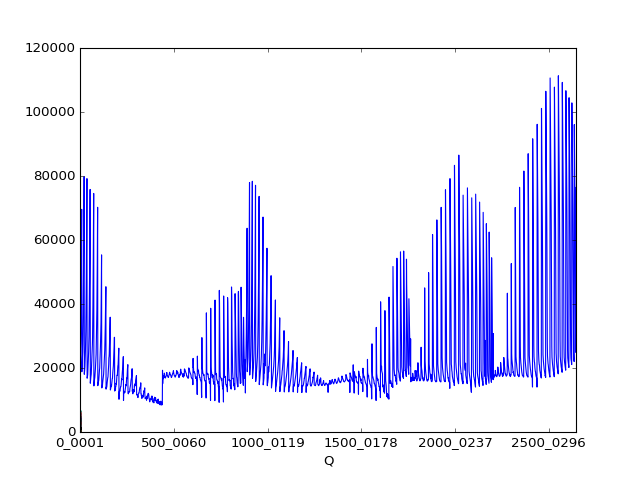

In [57]:
dfs = []
for i, the_file in enumerate(
    concatv(
        glob.glob(
            "/Users/tfast/Desktop/SLAC_MG_0716/Sample[1-6]/Processed/*_1D.csv"
        ),
        glob.glob(
            "/Users/tfast/Desktop/SLAC_MG_0716/Sample16*/Processed/*_1D.csv"
        ),
    )):
    s = pandas.read_csv(
        the_file, header=None, 
        names=['Q', str(i)+'_'+str(the_file.split('_')[-2])]
    ).set_index('Q').iloc[:1000]
    dfs.append(s)
    

signals = pandas.concat(dfs, axis=1)

signals.plot(legend=None)

In [35]:
from pandas import np
from sklearn import *

/Users/tfast/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/tfast/anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/tfast/anaconda/lib/python3.5/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [58]:
signals.shape

(1000, 2646)

> _hypothesis_ - The rolling _standard deviation_.  It will exentuate the crystalline patterns because they have larger information entropy.  The rolling deviations are then used to identify non-crystalline patterns, by some thresholding technique, that can be automated later.

In [59]:
roll = signals.rolling(31, center=True).std().fillna(0).sum(axis=0)

<IPython.core.display.Javascript object>


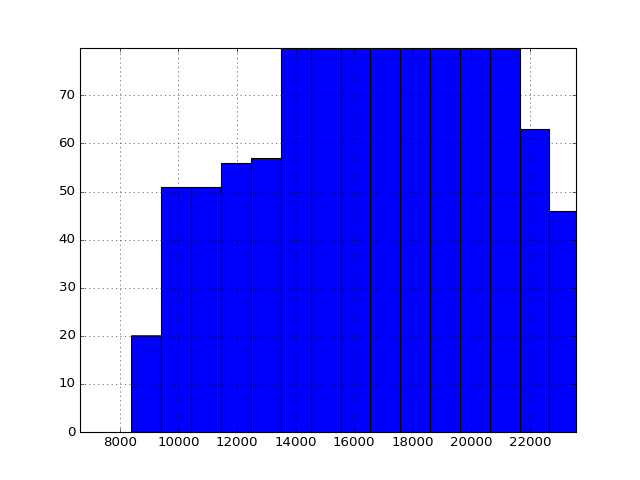

In [67]:
roll.transpose().hist(bins=101)

In [70]:
threshold = 13e3

In [66]:
%matplotlib notebook

> Identify non-crystalline states using the thresholding below.


> The threshold we using is `13000.0`.  This value was identified using the image below.

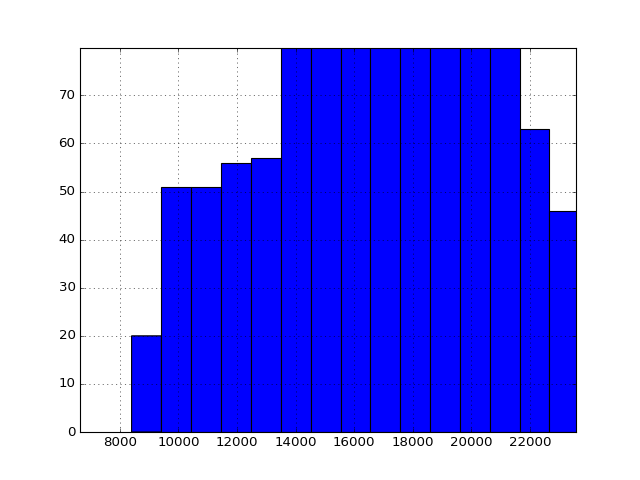

In [71]:
%%jinja2

> The threshold we using is `{{threshold}}`.  This value was identified using the image below.

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAAAABHNCSVQICAgIfAhkiAAAIABJREFUeJzt3X+Q3Pdd5/nn2z/CkDgj2UDQ2tFd4iWgM8S6HKxXLLfJsheiLAdo93w6VV3YhLtzrYrDROeBPXlmD3vZgOSJSSixwHo2i7duKSBT4OVkXTbqi/diJxc8lDg7IiYenFw2YDuebLA9Mza4o4r1uT+6R+pp/Zgf3fp+1O/X61E1pfR0q7/v54zT81b/miilYGZmZmY6rqg9gJmZmZk1ywugmZmZmRgvgGZmZmZivACamZmZifECaGZmZibGC6CZmZmZGC+AZmZmZmK8AJqZmZmJ8QJoZmZmJsYLoJmZmZkYL4BmZmZmYrwAmpmZmYnxAmhmZmYmxgugmZmZmRgvgGZmZmZivACamZmZifECaGZmZibGC6CZmZmZGC+AZmZmZmK8AJqZmZmJ8QJoZmZmJsYLoJmZmZkYL4BmZmZmYrwAmpmZmYnxAmhmZmYmxgugmZmZmRgvgGZmZmZivACamZmZifECaGZmZibGC6CZmZmZGC+AZmZmZmK8AJqZmZmJ8QJoZmZmJsYLoJmZmZkYL4BmZmZmYrwAmpmZmYnxAmhmZmYmxgugmZmZmRgvgGZmZmZivACamZmZifECaGZmZibGC6CZmZmZGC+AZmZmZmK8AJqZmZmJ8QJoZmZmJsYLoJmZmZmYq2oPMMoiIoDrgZdqz2JmZmYb8nrgK6WUUnuQGrwADuZ64JnaQ5iZmdmmvBF4tvYQNXgBHMxLAE8//TTj4+O1Zzmv3bt302q1ao9xyal0wmi1Li8vs337duBpYDP/H9kNbKb1WeCmAY67WZs97mY7BznmoGq0DnLcQW30uIN2bva4w7IMbF/Xz7dRuk1acfa2SfcRPC+AQzA+Pn7ZLoDf9V3fddnONkwqnTCqreNs7ofXd23y7y0PeNzN2uxxN9s5yDEHVaN1kOMOaqPHHbRzs8cdrvX8fBvN2yTzi0CSu+6662qP0AiVTtBqBZVWlU7QaVXpVLtNysMLYHK7d++uPUIjVDpBq7XzMJoClU7QaVXpVLtNysMLYHJbtmypPUIjVDpBqxVUWlU6QadVpVPtNikPL4DJnTx5svYIjVDpBK1WUGlV6QSdVpVOtdukPEL07W+GIiLGgaWlpSU/AdbsPJaXl7v3DizR7BPYnwG2ixxXqdXHbc4ysIWsP9/O3jaxpZSyvNblM/I9gGZmZmZivACamZmZifECmNzk5GTtERqh0glaraDSqtIJOq0qnWq3SXl4AUzuwIEDtUdohEonaLWCSqtKJ+i0qnSq3Sbl4QUwuW3bttUeoREqnaDVCiqtKp2g06rSqXablIcXQDMzMzMxXgCTG7Vf0L1ZKp2g1QoqrSqdoNOq0ql2m5SHF8DkFhcXa4/QCJVO0GoFlVaVTtBpVelUu03Kw28EPQC/EbTZxfmNoLMe08fNf1y/EXR2vgfQzMzMTIwXwOTa7XbtERqh0glaraDSqtIJOq0qnWq3SXl4AUxuamqq9giNUOkErVZQaVXpBJ1WlU6126Q8/BzAAYzCcwDb7TZjY2O1x7jkVDphtFoHfw5gG9hM66g9X2uznYMcc1A1Wgc57qA2etxBOzd73GFZ/3MAR+k2aYWfA+h7ANMbtf9TbpZKJ2i1DucH6ChQ6QSdVpVOtdukPLwAmpmZmYnxApjc7Oxs7REaodIJWq2g0qrSCTqtKp1qt0l5eAFMbuvWrbVHaIRKJ2i1gkqrSifotKp0qt0m5eEXgQxgFF4EYlaT3wg66zF93PzH9RtBZ+d7AM3MzMzEeAFMbmFhofYIjVDpBK1WUGlV6QSdVpVOtdukPLwAJnfkyJHaIzRCpRO0WkGlVaUTdFpVOtVuk/LwcwAH4OcAml2cnwOY9Zg+bv7j+jmA2fkeQDMzMzMxXgDNzMzMxHgBTG5mZqb2CI1Q6QStVlBpVekEnVaVTrXbpDy8ACa3c+fO2iM0QqUTtFpBpVWlE3RaVTrVbpPy8AKY3K5du2qP0AiVTtBqBZVWlU7QaVXpVLtNysMLoJmZmZkYL4DJzc/P1x6hESqdoNUKKq0qnaDTqtKpdpuUhxfA5I4ePVp7hEaodIJWK6i0qnSCTqtKp9ptUh5+I+gB+I2gzS7ObwSd9Zg+bv7j+o2gs/M9gGZmZmZivACamZmZifECmNz09HTtERqh0glaraDSqtIJOq0qnWq3SXnILYAR8URELPd8/GVEnI6IPd3zb46IRyLi5Yh4JiLurj3zIPbs2VN7hEaodIJWK6i0qnSCTqtKp9ptUh5yC2Ap5XtKKeMrH8CdwF8AH4+Ia4DjwKeB64B3A7dFxIF6Ew9mx44dtUdohEonaLWCSqtKJ+i0qnSq3SblIbcAnsdPAv+qlHIKuJXO1+SuUsqpUsoTwL3A7TUHNDMzMxsm6QUwIv4u8Bbgvu6ndgKPl1JO91zsBHBj997BkTM3N1d7hEaodIJWK6i0qnSCTqtKp9ptUh7SCyCde/+Ol1L+vHt6HFjsu8yLPeeNnJMnT9YeoREqnaDVCiqtKp2g06rSqXablIfsAhgRf43Os3R/refTy8DWvote23Peee3du5eJiQkmJiY4duwYExMTtNvtM+fPzs7SarXOnF5YWGBycnLVdczMzKz6V9T8/Pw5r6yanp5e9St35ubmmJmZWXWZyclJFhYWzpx+05vexOzs7JnT7Xb7spqv1WoNZb6V412u8w3z69f7hOvLcb7er99DDz3Eam1govvnmQmBVs/pBWBlvv0rE7L6HpV5zn2V5TTn/vqt+/tOT3avf0Wre/zNzreif76n1jHfXPfvwdnOzcz3YN9x1jPfer5+vfOt6J8P4IE15uv/+u0Z0nwn1jHfML+/j21wvp1Dmq/u9/eBB85+fy90+/KmN73p7HSX8c+PVqvF/v37ueWWW5iamkKd7G8CiYh/Cvx4KeU7ej73XuCDwPUrDwN3XwByeynlLee5Dv8mELOL8G8CyXpMHzf/cf2bQLKTvAcwIq4EbuPsc/9W/FvgVeDnI2IsIt4K/Azwqw2PaGZmZnbJSC6AdB6DuI6+x4dKKS8Du4F3AM/TuX/+I6WUI41POCTne6g0I5VO0Go996GurFQ6QadVpVPtNikP2YeAh2EUHgJeWFhg27Zttce45FQ6YbRaB38IeAHYTOuoPVy32c5BjjmoGq2DHHdQGz3uoJ2bPe6wrP8h4FG6TVrhh4B17wGUMWr/p9wslU7Qah3OD9BRoNIJOq0qnWq3SXl4ATQzMzMT4wUwud63/8hMpRO0Wle/PUdmKp2g06rSqXablIcXwOQWF/vf1zonlU7Qaj33fdmzUukEnVaVTrXbpDz8IpABjMKLQMxq8vsAZj2mj5v/uH4fwOx8D6CZmZmZGC+AyfX+SpzMVDpBq3X1r8TKTKUTdFpVOtVuk/LwApicyu87VOkErVZQaVXpBJ1WlU6126Q8/BzAAYzCcwDb7TZjY2O1x7jkVDphtFoHfw5gG9hM66g9X2uznYMcc1A1Wgc57qA2etxBOzd73GFZ/3MAR+k2aYWfA+h7ANMbtf9TbpZKJ2i1DucH6ChQ6QSdVpVOtdukPLwAmpmZmYnxApjc7Oxs7REaodIJWq2g0qrSCTqtKp1qt0l5eAFMbuvWrbVHaIRKJ2i1gkqrSifotKp0qt0m5eEXgQxgFF4EYlaT3wg66zF93PzH9RtBZ+d7AM3MzMzEeAFMbmFhofYIjVDpBK1WUGlV6QSdVpVOtdukPLwAJnfkyJHaIzRCpRO0WkGlVaUTdFpVOtVuk/LwcwAH4OcAml2cnwOY9Zg+bv7j+jmA2fkeQDMzMzMxXgDNzMzMxHgBTG5mZqb2CI1Q6QStVlBpVekEnVaVTrXbpDy8ACa3c+fO2iM0QqUTtFpBpVWlE3RaVTrVbpPy8AKY3K5du2qP0AiVTtBqBZVWlU7QaVXpVLtNysMLoJmZmZkYL4DJzc/P1x6hESqdoNUKKq0qnaDTqtKpdpuUhxfA5I4ePVp7hEaodIJWK6i0qnSCTqtKp9ptUh5+I+gB+I2gzS7ObwSd9Zg+bv7j+o2gs/M9gGZmZmZirqo9gJmZmV2elpebvXPsNa95DWNjY40eU5XvAUxuenq69giNUOkErVZQaVXpBJ3WUe9sA69h+/btbNmypbGPG254M+12u3a8BN8DmNyePXtqj9AIlU7QagWVVpVO0Gkd9c5T3Y+nWfu5h08B3zmEYy7zwgvbOXXqlO8FbIAXwOR27NhRe4RGqHSCViuotKp0gk5rls5x1l4Av6+JQWzI/BCwmZmZmRgvgMnNzc3VHqERKp2g1QoqrSqdoNOq0glarXl4AUzu5MmTtUdohEonaLWCSqtKJ+i0qnSCVmsefiPoAfiNoM0uzm8EnfWYPq6Peyk09+bTfiNo3wNoZmZmJscLoJmZmZkYyQUwIr4/Iv59RCxHxIsR8f/0nHdzRDwSES9HxDMRcXfNWQc1OTlZe4RGqHSCViuotKp0gk6rSidoteYhtwBGxPcD/w64H/g24FuAO7rnXQMcBz4NXAe8G7gtIg7UmXZwBw6M7OgbotIJWq2g0qrSCTqtKp2g1ZqH3AJI5/fz/KtSym+VUr5eSjldSjnRPe9WOl+Tu0opp0opTwD3ArfXGnZQ27Ztqz1CI1Q6QasVVFpVOkGnVaUTtFrzkFoAI+Kbgb8FnI6IP4yIv4iIExHx33QvshN4vJRyuuevnQBu7N47aGZmZjbypBZAOg/rXgG8F/hJ4A3AIeB3ImIXnde6L/b9nRe7f47k+7y0Wq3aIzRCpRO0WkGlVaUTdFpVOkGrNQ+1BfCl7p//upTyWPfh398HPknnN3cvA1v7/s613T8v+D5Be/fuZWJigomJCY4dO8bExATtdvvM+bOzs6t+aC8sLJzzRP6ZmZlVv+Fhfn6e6enpVZeZnp5mfn7+zOm5uTlmZmZWXWZycpKFhYUzpx955BFmZ2fPnG6325fVfK1Wayjz/d7v/d5lPd8wv35f/vKXL+v5er9+Dz30EKu1gYnun2cmZPUPkAXOPql85d9jM6z+bQPzdJ7NsWrC7ud73d93erJ7/Sta3eNvdr4V/fM9tY755rp/D852bma+B/uOs5751vP1651vRf98AA+sMV//1+/LQ5rvxDrmG+b397FK843C9/eRIc331NnpLsHtc6vVYv/+/dxyyy1MTU2hTu6NoCPiC8DvllKmej53HHgceBL4IHD9ysPA3ReA3F5Kect5rstvBG12EX4j6KzH9HF93EvBbwTdJLV7AAH+OfATEbEzOn4MeDudf+b8W+BV4OcjYiwi3gr8DPCr9cY1MzMzG66rag/QtFLKr3RfDHIM2AJ8AfjvSil/BBARu4Ffp3M/9xLwL0opR2rNO6h2u83Y2FjtMS45lU7Qau081KTQqtIJOq0qnaDVmofiPYCUUqZLKf9JKWVLKeX7Sin/Z895T5RS3l5KeV0p5fpSygdqzjoolec5qHSCViuotKp0gk6rSidoteYh9xzAYRqF5wCq3Fuk0gmj1Tr4cwA3e8/CqD1vapB7UJRaBznuoDZ63GHdKzYKvcNq9XMAmyR5D6CSUVkUBqXSCVqtOg8rqXSCTqtKJ2i15uEF0MzMzEyMF8Dket8jKTOVTtBqXf0eaZmpdIJOq0onaLXm4QUwua1b+9/XOieVTtBqPfd92bNS6QSdVpVO0GrNwwtgcrt37649QiNUOkGrFVRaVTpBp1WlE7Ra8/ACaGZmZibGC2Byvb83MTOVTtBqPff3kmal0gk6rSqdoNWahxfA5I4cGdlfYrIhKp2g1QoqrSqdoNOq0glarXn4jaAHMApvBG22ot1uc+rUqUaPuby8zPbtl/ub2I76cZVafdzcx/UbQTdJ7ncBmylqt9vccMObeeEFP1RjZmZeAM0knDp1qrv8PU2z9yI8C9zU4PHMzGw9/BzA5GZmZmqP0AiVThi0dbzhj9cPMCuAyvdVpRN0WlU6Qas1Dy+Aye3cubP2CI1Q6QStVlBpVekEnVaVTtBqzcMPASe3a9eu2iM0YpQ6B30xxk033cTy8saes7zRy18+Ruf7OhiVTtBpVekErdY8vACaNcgvxjAzs8uBHwJObn5+vvYIjRiVztUvxlja5MeJTfydzzfSN3yj8X0dnEon6LSqdIJWax5eAJM7evRo7REaMXqdg7yw4t9v4u8M+mKMWkbt+7pZKp2g06rSCVqtefiNoAfgN4K2jTr75qMKb+rq4+Y9po/r414KfiPoJvkeQDMzMzMxXgDNzMzMxHgBTG56err2CI1Q6exwaz4qnaDTqtIJWq15eAFMbs+ePbVHaIRKZ4db81HpBJ1WlU7Qas3DC2ByO3bsqD1CI1Q6O9yaj0on6LSqdIJWax5eAM3MzMzEeAFMbm5urvYIjVDp7HBrPiqdoNOq0glarXl4AUzu5MmTtUdohEpnh1vzUekEnVaVTtBqzcMLYHL79++vPUIjVDo73JqPSifotKp0glZrHl4AzczMzMR4ATQzMzMT4wUwucnJydojNEKls8Ot+ah0gk6rSidotebhBTC5AwcO1B6hESqdHW7NR6UTdFpVOkGrNQ8vgMlt27at9giNUOnscGs+Kp2g06rSCVqteXgBNDMzMxPjBTC5VqtVe4RGqHR2uDUflU7QaVXpBK3WPLwAJre4uFh7hEaodHa4NR+VTtBpVekErdY8vAAmt2/fvtojNEKls8Ot+ah0gk6rSidotebhBdDMzMxMzFW1B2haRNwN/BzwV0AABThWSnlP9/ybgX8OfC+d+7U/Ukr5+UrjDqzdbjM2NlZ7jItqt9ucOnVq4OvYaOfp06e54opm/w20vLw8hGtpA5f393R4VFpVOkGnVaUTtFrzkFsAu/6glPL2/k9GxDXAceB+4IeA7wQ+HhGLpZQjDc84FFNTU3z4wx+uPcYFtdttbrjhzbzwwkLjx474Jkr5euPHHdwUcPl+T4dLpVWlE3RaVTpBqzUP1QXwQm6l87D4XaWU08ATEXEv8NPASC6Ahw4dqj3CRZ06daq7/D0NjA9wTRv9F+izlHLTEI67Uc8CNw14HZf393S4VFpVOkGnVaUTtFrzUF0A3xYRX6XzMPAfAP+klPJlYCfweHf5W3ECuDEirimlvNz8qIO53B/+PWucwRaxjf7dlYdiBz3uRg3jIeBR+Z4Og0qrSifotKp0glZrHoovAvld4KZSyrcDf4vOcwA/ERGvpbMJ9L+e/cXun01uCWZmZmaXjNwCWEr5fCnl6e7/fg74H4E30lkGl4GtfX/l2u6fw7jrpnGzs7O1R2iISie4NSOVTtBpVekErdY85BbAiwjgs3QeHu79utwCfOliD//u3buXiYkJJiYmOHbsGBMTE7Tb7TPnz87OrvpNFQsLC0xOTq66jpmZGebm5s6cnp+fZ3p6etVlpqenmZ+fP3N6bm6OmZmZVZeZnJxkYeHsCyq++MUvrloC2+32ZTXfQw89xGptYKL755kJWf1O8wvA6vngM8Bcz+l5YLrvMtPdz/e6v+/0ZPf6V7RYfeO22flm+uZ7ah3zzXX/Xv98vc9QWO98D29wvvV8/S40X+/X7+G+8zf69Vv599hm5oPR+f6udG5mvgf7jtPk9xfggTXm6//6nR7SfCfWMd8wv7+PbXC+54Y03yh8f784pPmeOjvdOn5+tFqtDf18a7Va7N+/n1tuuYWpqSnURSml9gyNioi9wP9dSnk+Ir4duBf4L4G30lkC/5TOT41fBN4CfAz40PleBRwR48DS0tIS4+N+hHgzlpeX2bJlC7BEs4+yPwNs93F93ATHVWr1cXMfdxnYQhM/U8/+7GFLKWUkH+EblOI9gD8OfD4iXgb+CLgSeGcp5S+79/LtBt4BPE/nn2cfGdW3gDEzMzM7H7lXAZdS9qxx/hPAOe8ROKoWFhbYtm1b7TEasAAodIJbM1LpBJ1WlU7Qas1D8R5AKUeOqNx5qdIJbs1IpRN0WlU6Qas1Dy+AyR0+fLj2CA1R6QS3ZqTSCTqtKp2g1ZqHF0AzMzMzMV4AzczMzMR4AUyu/32U8lLpBLdmpNIJOq0qnaDVmocXwOR27txZe4SGqHSCWzNS6QSdVpVO0GrNwwtgcrt27ao9QkNUOsGtGal0gk6rSidotebhBdDMzMxMjBfA5Hp/N29uKp3g1oxUOkGnVaUTtFrz8AKY3NGjR2uP0BCVTnBrRiqdoNOq0glarXl4AUzu4MGDtUdoiEonuDUjlU7QaVXpBK3WPLwAmpmZmYnxAmhmZmYmxgtgctPT07VHaIhKJ7g1I5VO0GlV6QSt1jyuqj2AXVp79uypPUJDVDrBrRmpdIJOq0onDLt1eXl5qNdX6xiXOy+Aye3YsaP2CA1R6QS3ZqTSCTqtKp0wvNY28Bq2b98+pOuzi/ECaGZmZpeBU92Pp4HxS3ysZUB70fRzAJObm5urPUJDVDrBrRmpdIJOq0onDL91vKEPbV4Akzt58mTtERqi0gluzUilE3RaVTpBqzUPL4DJ7d+/v/YIDVHpBLdmpNIJOq0qnaDVmocXQDMzMzMxXgDNzMzMxHgBTG5ycrL2CA1R6QS3ZqTSCTqtKp2g1ZqHF8DkDhw4UHuEhqh0glszUukEnVaVTtBqzcMLYHLbtm2rPUJDVDrBrRmpdIJOq0onaLXm4QXQzMzMTIwXwORarVbtERqi0gluzUilE3RaVTpBqzUPL4DJLS4u1h6hISqd4NaMVDpBp1WlE7Ra8/ACmNy+fftqj9AQlU5wa0YqnaDTqtIJWq15eAE0MzMzE+MFMLl2u117hIaodIJbM1LpBJ1WlU7Qas3DC2ByU1NTtUdoiEonuDUjlU7QaVXpBK3WPLwAJnfo0KHaIzREpRPcmpFKJ+i0qnSCVmseXgCTGxsbqz1CQ1Q6wa0ZqXSCTqtKJ2i15uEF0MzMzEyMF8DkZmdna4/QEJVOcGtGKp2g06rSCVqteXgBTG7r1q21R2iISie4NSOVTtBpVekErdY8vAAmt3v37tojNESlE9yakUon6LSqdIJWax7SC2BE/H5EnI6Iv9vzuZsj4pGIeDkinomIu2vOaGZmZjZssgtgRLwX+Gag9HzuGuA48GngOuDdwG0RcaDKkEOwsLBQe4SGqHSCWzNS6QSdVpVO0GrNQ3IBjIg3Av8MuA2InrNupfM1uauUcqqU8gRwL3B781MOx5EjR2qP0BCVTnBrRiqdoNOq0glarXlILoDAbwAfKKU80/f5ncDjpZTTPZ87AdzYvXdw5Bw+fLj2CA1R6QS3ZqTSCTqtKp2g1ZqH3AIYEf8zQCnlN85z9jiw2Pe5F3vOMzMzMxt5V9UeoEkRcSPwvwF/8wIXWQZu6PvctT3nmZmZmY08tXsA/zadF3f8vxHxtYj4WvfzD0TEfcBngf8iInq/LrcAXyqlvHyhK927dy8TExNMTExw7NgxJiYmaLfbZ86fnZ2l1WqdOb2wsMDk5OSq65iZmWFubu7M6fn5eaanp1ddZnp6mvn5+TOn5+bmmJmZWXWZycnJVS/8eP/737/qzaDb7fZlNd9DDz3Eam1govvnmQmBVs/pBWD1fPAeYK7n9Dww3XeZ6e7ne93fd3qS1U9obrH6TU43O99M33xPrWO+ue7f65/vg5uY7+ENzreer9+F5uv9+j3cd/5Gv34zPX9m/v6u/LmZ+R7sO06T31+AB9aYr//r98EhzXdiHfMN8/v72AbnOzik+Ubh+/v+Ic33xQ3Ot9HvbwvYT+fH+hTySikyH3R+YeH1fR+ngb103snyGuBZ4APdy74V+HPgwAWubxwoS0tL5XL16KOP1h7hopaWlgpQYKlAGeDj0Q1e/ukhHXejH8M47kZbR7l3M62j2LvZTrXWUeodtHOUekexdeVnD+Ol1N9PanxIPQRcSmkDX+n9XEQU4PlSymL39G7g1+n8M2IJ+BellJF9idOuXbtqj9AQlU5wa0YqnaDTqtIJWq15SC2A51NKubLv9BPA2yuNY2ZmZnbJqT0HUE7vc/JyU+kEt2ak0gk6rSqdoNWahxfA5I4ePVp7hIaodIJbM1LpBJ1WlU7Qas3DC2ByBw8erD1CQ1Q6wa0ZqXSCTqtKJ2i15uEF0MzMzEyMF0AzMzMzMV4Ak+t/s+a8VDrBrRmpdIJOq0onaLXm4QUwuT179tQeoSEqneDWjFQ6QadVpRO0WvPwApjcjh07ao/QEJVOcGtGKp2g06rSCVqteXgBNDMzMxPjBTC5ubm5tS+UgkonuDUjlU7QaVXpBK3WPLwAJnfy5MnaIzREpRPcmpFKJ+i0qnSCVmseXgCT279/f+0RGqLSCW7NSKUTdFpVOkGrNQ8vgGZmZmZivACamZmZifECmNzk5GTtERqi0gluzUilE3RaVTpBqzUPL4DJHThwoPYIDVHpBLdmpNIJOq0qnaDVmocXwOS2bdtWe4SGqHSCWzNS6QSdVpVO0GrNwwugmZmZmRgvgMm1Wq3aIzREpRPcmpFKJ+i0qnSCVmseXgCTW1xcrD1CQ1Q6wa0ZqXSCTqtKJ2i15uEFMLl9+/bVHqEhKp3g1oxUOkGnVaUTtFrz8AJoZmZmJsYLYHLtdrv2CA1R6QS3ZqTSCTqtKp2g1ZqHF8Dkpqamao/QEJVOcGtGKp2g06rSCVqteXgBTO7QoUO1R2iISie4NSOVTtBpVekErdY8vAAmNzY2VnuEhqh0glszUukEnVaVTtBqzcMLoJmZmZkYL4DJzc7O1h6hISqd4NaMVDpBp1WlE7Ra8/ACmNzWrVtrj9AQlU5wa0YqnaDTqtIJWq15eAFMbvfu3bVHaIhKJ7g1I5VO0GlV6QSt1jy8AJqZmZmJ8QKY3MLCQu0RGqLSCW7NSKUTdFpVOkGrNQ8vgMkdOXKk9ggNUekEt2ak0gk6rSqdoNWahxfA5A4fPlx7hIaodIJbM1LpBJ1WlU7Qas3DC6CZmZmZGC+AZmZmZmK8ACYr+0ZSAAAa10lEQVQ3MzNTe4SGqHSCWzNS6QSdVpVO0GrNwwtgcjt37qw9QkNUOsGtGal0gk6rSidoteYhtwBGxF0R8cWIWIyI/xgRH4+InX2XuTkiHomIlyPimYi4u9a8g9q1a1ftERqi0gluzUilE3RaVTpBqzUPuQUQ+B3ge0spW4HrgU8ArYgIgIi4BjgOfBq4Dng3cFtEHKg0r5mZmdlQyS2ApZQvlFKWuievBE4D30Zn2QO4lc7X5a5SyqlSyhPAvcDtjQ87BPPz87VHaIhKJ7g1I5VO0GlV6QSt1jzkFkCAiPjhiHgReAX4JeDDpZTnu2fvBB4vpZzu+SsngBu79w6OlKNHj9YeoSEqneDWjFQ6QadVpRO0WvO4qvYANZRS/h1wbURsBd4HPNNz9jiw2PdXXuw57+VLP+HwHDx4sPYIDVHpBLdmpNIJOq0qnaDVmofkAriilLIYEb8CvBgRT5VSPgcsAzf0XfTa7p/LjQ5oZmZmdglIPgTc50rgauAt3dOfBd4WEb1fm1uAL5VSznvv3969e5mYmGBiYoJjx44xMTFBu90+c/7s7CytVuvM6YWFBSYnJ1ddx8zMDHNzc2dOz8/PMz09veoy09PTq57TNzc3d877/E1OTrKwcPYXc7daLWZnZ8+cbrfbl9V8Dz30EKu1gYnun2cmBFo9pxeA1fN13odqruf0PDDdd5lpzn2uyv19pydZ/YvNW93jD3u+p9Yx3xznvr/WZud7eIPzrefrt575Hu4739/fs4b1/X2w7zqa/P4CPLDGfJfq+3tiHfMN8/v72Abn8/d34/N9cYPzbfT72wL20/mRPoW8UorUB/B+4A3d//1twL8EXgC+vfu5a4BngQ8AY8BbgT8HDpznusaBsrS0VC5X99xzT+0RLmppaakABZYKlAE+7tng5Z8e0nE3+jGM4260dZR7N9M6ir2b7VRrHaXeQTtHqXcUW1d+9jBeSv3dpMaH4j2APwScjIiX6Nzb9wbgnaWUrwKUzr18u4F3AM/T+SfDR0opRyrNO5A9e/bUHqEhKp3g1oxUOkGnVaUTtFrzkHsOYCnlR9dxmSeAtzcwziW3Y8eO2iM0RKUT3JqRSifotKp0glZrHor3AJqZmZlJ8wKYXO8LN3JT6QS3ZqTSCTqtKp2g1ZqHF8DkTp48WXuEhqh0glszUukEnVaVTtBqzcMLYHL79++vPUJDVDrBrRmpdIJOq0onaLXm4QXQzMzMTIwXQDMzMzMxXgCT6/+NHnmpdIJbM1LpBJ1WlU7Qas3DC2ByBw4cqD1CQ1Q6wa0ZqXSCTqtKJ2i15uEFMLlt27bVHqEhKp3g1oxUOkGnVaUTtFrz8AJoZmZmJsYLYHKtVqv2CA1R6QS3ZqTSCTqtKp2g1ZqHF8DkFhcXa4/QEJVOcGtGKp2g06rSCVqteXgBTG7fvn21R2iISie4NSOVTtBpVekErdY8vACamZmZifECmFy73a49QkNUOsGtGal0gk6rSidotebhBTC5qamp2iM0RKUT3JqRSifotKp0glZrHl4Akzt06FDtERqi0gluzUilE3RaVTpBqzUPL4DJjY2N1R6hISqd4NaMVDpBp1WlE7Ra8/ACaGZmZibGC2Bys7OztUdoiEonuDUjlU7QaVXpBK3WPLwAJrd169baIzREpRPcmpFKJ+i0qnSCVmseXgCT2717d+0RGqLSCW7NSKUTdFpVOkGrNQ8vgGZmZmZivAAmt7CwUHuEhqh0glszUukEnVaVTtBqzcMLYHJHjhypPUJDVDrBrRmpdIJOq0onaLXm4QUwucOHD9ceoSEqneDWjFQ6QadVpRO0WvPwAmhmZmYmxgugmZmZmRgvgMnNzMzUHqEhKp3g1oxUOkGnVaUTtFrz8AKY3M6dO2uP0BCVTnBrRiqdoNOq0glarXl4AUxu165dtUdoiEonuDUjlU7QaVXpBK3WPLwAmpmZmYnxApjc/Px87REaotIJbs1IpRN0WlU6Qas1Dy+AyR09erT2CA1R6QS3ZqTSCTqtKp2g1ZqHF8DkDh48WHuEhqh0glszUukEnVaVTtBqzcMLoJmZmZkYL4BmZmZmYrwAJjc9PV17hIaodIJbM1LpBJ1WlU7Qas1DbgGMiMMR8ccRsRQRz0bEb0fEG/suc3NEPBIRL0fEMxFxd615B7Vnz57aIzREpRPcmpFKJ+i0qnSCVmsecgsgcBp4H/AtwH8GFODYypkRcQ1wHPg0cB3wbuC2iDjQ/KiD27FjR+0RGqLSCW7NSKUTdFpVOkGrNQ+5BbCU8k9KKY+XUr5RSlkGPgjcHBFbuhe5lc7X5a5SyqlSyhPAvcDtlUY2MzMzGyq5BfA8dgN/VkpZ6p7eCTxeSjndc5kTwI3dewdHytzcXO0RGqLSCW7NSKUTdFpVOkGrNQ/pBTAi3gn8HLC/59PjwGLfRV/sOW+knDx5svYIDVHpBLdmpNIJOq0qnaDVmsdVtQeoJSJ+BPhN4D2llE/0nLUM3NB38Wt7zhsp+/fvX/tCXT/1Uz/D449/7hJOc65vfOMbQ7qm9XeOPrfmo9IJOq0qnaDVmkgpRe4DeA+de/XeeZ7z3gssAFf0fO4A8IXzXHYcKO9617vKHXfcUe64447y4IMPljvuuKO88sorZcVHP/rRcvz48TOnn3vuuXLnnXeWXvfdd1959NFHz5x+8sknyz333LPqMvfcc0958sknz5x+9NFHy3333bfqMnfeeWd57rnnzpw+fvx4+ehHP3rm9CuvvHLB+a666psKHCrw4QI/XOA3ej7+YYGpntO/UODWvsvc2v38yump7t/rvcwPd6+/93opsFSgFHilwB3dP0v346MFjvecfq7AnT2nS4H7Cjzac/rJAvf0Xeae7udLgae7x/3lvsvc2b3+ldPHu8dfOT3ofCvHPbHGfKV7+fuGNN9v9nydh/H1W+98vcf19/fSfH9/re9r3NT3d6X1/iF+/dYz38pxHxrS12+98x3t+ToP6/8f/v6unu+TPa3DvP073nP5f1TgbxT4qe6xGK+9k9T6iFJKE3vmZSMibgf+GfCjpZTPnOf8a4A/Be4HfhF4C/Ax4EOllCN9lx0HlpaWlhgfH7lHh89x9dVjfOMbTwDf0eBRPwfcDCzR7CPszwDbfVwfN8FxlVp93NzHbfKYy8AWgC2l84JQOYrPAfwV4HXAxyNiOSJe6v75AwCllJfpvDDkHcDzQAv4SP/yNyomJydrj9AQlU5wa0YqnaDTqtIJWq15yD0HsJSy5tJbOm/98vYGxrnkDhwYybcv3ASVTnBrRiqdoNOq0glarXko3gMoZdu2bbVHaIhKJ7g1I5VO0GlV6QSt1jy8AJqZmZmJ8QKYXKvVqj1CQ1Q6wa0ZqXSCTqtKJ2i15uEFMLnFxf73tM5KpRPcmpFKJ+i0qnSCVmseXgCT27dvX+0RGqLSCW7NSKUTdFpVOkGrNQ8vgGZmZmZivAAm1263a4/QEJVOcGtGKp2g06rSCVqteXgBTG5qaqr2CA1R6QS3ZqTSCTqtKp2g1ZqHF8DkDh06VHuEhqh0glszUukEnVaVTtBqzcMLYHJjY2O1R2iISie4NSOVTtBpVekErdY8vACamZmZifECmNzs7GztERqi0gluzUilE3RaVTpBqzUPL4DJbd26tfYIDVHpBLdmpNIJOq0qnaDVmocXwOR2795de4SGqHSCWzNS6QSdVpVO0GrNwwugmZmZmRgvgMktLCzUHqEhKp3g1oxUOkGnVaUTtFrz8AKY3JEjR2qP0BCVTnBrRiqdoNOq0glarXl4AUzu8OHDtUdoiEonuDUjlU7QaVXpBK3WPLwAmpmZmYnxAmhmZmYmxgtgcjMzM7VHaIhKJ7g1I5VO0GlV6QSt1jy8ACa3c+fO2iM0RKUT3JqRSifotKp0glZrHl4Ak9u1a1ftERqi0gluzUilE3RaVTpBqzUPL4BmZmZmYrwAJjc/P197hIaodIJbM1LpBJ1WlU7Qas3DC2ByR48erT1CQ1Q6wa0ZqXSCTqtKJ2i15uEFMLmDBw/WHqEhKp3g1oxUOkGnVaUTtFrz8AJoZmZmJsYLoJmZmZkYL4DJTU9P1x6hISqd4NaMVDpBp1WlE7Ra8/ACmNyePXtqj9AQlU5wa0YqnaDTqtIJWq15eAFMbseOHbVHaIhKJ7g1I5VO0GlV6QSt1jy8AJqZmZmJ8QKY3NzcXO0RGqLSCW7NSKUTdFpVOkGrNQ8vgMmdPHmy9ggNUekEt2ak0gk6rSqdoNWahxfA5Pbv3197hIaodIJbM1LpBJ1WlU7Qas3DC6CZmZmZGC+AZmZmZmLkFsCI2BcRn4qIpYh4NSKu6Dv/5oh4JCJejohnIuLuWrMOw+TkZO0RGqLSCW7NSKUTdFpVOkGrNQ+5BRB4Afg14H/pPyMirgGOA58GrgPeDdwWEQcanXCIDhwY2dE3SKUT3JqRSifotKp0glZrHnILYCnlE6WUWeBL5zn7Vjpfk7tKKadKKU8A9wK3NznjMG3btq32CA1R6QS3ZqTSCTqtKp2g1ZqH3AK4hp3A46WU0z2fOwHc2L130MzMzGzkeQFcbRxY7Pvciz3njZxWq1V7hIaodIJbM1LpBJ1WlU7Qas3DC+Bqy8DWvs9d23PeyFlc7N9ns1LpBLdmpNIJOq0qnaDVmocXwNU+C7yt75XBtwBfKqW8fKG/tHfvXiYmJpiYmODYsWNMTEzQbrfPnD87O7vqnriFhYVzXp07MzOz6te2zc/PMz09veoy09PTzM/Pnzk9NzfHzMzMqstMTk6ysLBw5vTWrVuZnZ09c7rdbq85Hyxw7qu6Zlj9637mgem+y0x3P39mwu7fWzVh9/pXfKbv/DYw0f3zzISs/hfm+eZb3MR8APevMV+re/xB5+v/+j21jvku9PV7xybme3iD8w3r+/tw3/kb/frtG2A+GJ3v70rnZuZ7sO84TX5/AR5YY77+r987hjTfiXXMN8zv72MbnO8/HdJ8o/D97b3fZJD5vrjB+Tb6/W3RedPqW4Ap1EUppfYMjeoud1fTuRX6OPB64FXgFPA64E/p/NT4ReAtwMeAD5VSjpznusaBpaWlJcbHR/IR4lWuvnqMb3zjCeA7Gjzq54CbgSWafZT9GWC7j+vjJjiuUquPm/u4TR5zGdgCsKWUMpKP8A1K8R7Afwi8Qmf5A3gZ+Cvgb3fv5dtNZzl8ns4/Fz5yvuVvVPTe05ebSie4NSOVTtBpVekErdY85BbAUsr/Xkq5opRyZfdj5X9/qnv+E6WUt5dSXldKub6U8oHaMw9iakrlbm6VTnBrRiqdoNOq0glarXnILYBqDh06VHuEhqh0glszUukEnVaVTtBqzcMLYHJjY2O1R2iISie4NSOVTtBpVekErdY8vACamZmZifECmFzvW8DkptIJbs1IpRN0WlU6Qas1Dy+AyW3d2v++1lmpdIJbM1LpBJ1WlU7Qas3DC2Byu3fvrj1CQ1Q6wa0ZqXSCTqtKJ2i15uEF0MzMzEyMF8Dken8tXG4qneDWjFQ6QadVpRO0WvPwApjckSMj+0tMNkilE9yakUon6LSqdIJWax5eAJM7fPhw7REaotIJbs1IpRN0WlU6Qas1Dy+AZmZmZmK8AJqZmZmJ8QKY3MzMTO0RGqLSCW7NSKUTdFpVOkGrNQ8vgMnt3Lmz9ggNUekEt2ak0gk6rSqdoNWahxfA5Hbt2lV7hIaodIJbM1LpBJ1WlU7Qas3DC6CZmZmZGC+Ayc3Pz9ceoSEqneDWjFQ6QadVpRO0WvPwApjc0aNHa4/QEJVOcGtGKp2g06rSCVqteXgBTO7gwYO1R2iISie4NSOVTtBpVekErdY8vACamZmZifECaGZmZibGC2By09PTtUdoiEonuDUjlU7QaVXpBK3WPLwAJrdnz57aIzREpRPcmpFKJ+i0qnSCVmseXgCT27FjR+0RGqLSCW7NSKUTdFpVOkGrNQ8vgGZmZmZivAAmNzc3V3uEhqh0glszUukEnVaVTtBqzcMLYHInT56sPUJDVDrBrRmpdIJOq0onaLXm4QUwuf3799ceoSEqneDWjFQ6QadVpRO0WvPwAmhmZmYmxgugmZmZmRgvgMlNTk7WHqEhKp3g1oxUOkGnVaUTtFrz8AKY3IEDB2qP0BCVTnBrRiqdoNOq0glarXl4AUxu27ZttUdoiEonuDUjlU7QaVXpBK3WPLwAmpmZmYnxAphcq9WqPUJDVDrBrRmpdIJOq0onaLXm4QUwucXFxdojNESlE9yakUon6LSqdIJWax5eAJPbt29f7REaotIJbs1IpRN0WlU6Qas1Dy+AZmZmZmK8ACbXbrdrj9AQlU5wa0YqnaDTqtIJWq15eAG8gIj4+Yh4NiJeioiHI+K7a8+0GVNTU7VHaIhKJ7g1I5VO0GlV6QSt1jy8AJ5HRPxj4CeAHwK+FfgDoBURr60512b84A/+YO0RGqLSCW7NSKUTdFpVOkGrNQ8vgOf3k8C9pZTPl1K+DvwccDXwD+qOtXGf/OQna4/QEJVOcGtGKp2g06rSCVqteXgB7BMR48CbgBMrnyulvAp8FnhbpbHMzMzMhuaq2gNchsa7f/a/sdGLPeetsry8fEkHGsSf/MmfrHu+UgpwN7D1ks602l90/3wWGOTreBJ4ZgOXf25Ix92oYRx3o63DOu5mDHrczbQO47ibtdnjbrZzkGMOqkbrIMcd1EaPO2jnZo87LBs57ii2vnSJr//yF50f+raiew/gIvD9pZQ/7Pl8C/hcKeVnez53A8P5r97MzMya98ZSyrO1h6jB9wD2KaUsR8SXgb8B/CFARFxJ5+Hff9N38a8Ab8T/lDAzMxs1r6fzc1ySF8Dz+3XgZyPik8CXgLuArwO/33uh0rn7VPJfDmZmZiPu8n3+VgO8AJ5HKeWXIuIa4CE6/0L4I+DdpZS/qjuZmZmZ2eD8HEAzMzMzMX4bmBEQEW+IiN+OiIWIeCEiPhMRb+85/+aIeCQiXo6IZyLi7vNcx0V/s8l6ruMSdO2LiE9FxFJEvBoRV/Sd30jXpf6tLxfrjIhbIuLBiHguIhYj4mRE/MQodq7V2ne5742IUxHxqY3OeTm0ruO/3ddExKGI+HJ3zv8QET8+ap3rbH1PRPxx9/ynI+KXI+LqUWuNiMM9Hc9G5zb3jcOecxRaI9ntkl1AKcUfl/kH8ADwCHAdEMAEnecubAWuofMk1l8AXgN8D/A0cKDn7/9j4M+Am4BvAg7RefXya7vnr3kdl6jrh4B9wP8AvApc0XNeI11rXUcDnX8PeC/wrd3TfwdYAn5s1DrXau25zDcBfwz8X8Cn+s4bida1OoEHgRbw5u7pbwXeMmqd6/jv9+bu5/7b7untwOeBXxi1VuAX6bzY7yo6b/n1W8DjPednuk1aqzXV7ZI/LvDfQe0B/LGOb1LnTah/uuf064DTdF6p/F5goe9G+f3AF3pOfwm4vef0lcBXgfd0T79vreu4xH3v4NwfLGvONIyuta7jUnde4HK/D/zyqHau1Qr8EvBhOm862b8AjlTrBf7b/a+Av6T7w/MCf2+kOi/S+veB5/sudy/wsVFu7R5jZ7d3y7DmHJXWC1xm5G+X/LH6ww8Bj4Zp4B9ExLbuQyu3A1+gcy/Kf07nX26ney5/ArgxIq6J9f1mk50Xu45L1LSWi840jK51XkejujP9TeCxntNvIklndJ668F9znt8en6j1ncB/AO6MiK9ExJ9FxP0R8S2QqhM693J+ISL++4i4IiL+OvCjdB61GPXW3cCflVKWhjjnqLSukv12SZUXwNHwGaBN5+70vwTuAH6idH5P8cobV/d6sfvnOOv7zSZrXUcNTXRt+Le+XErd5X6WzkNov9X9dJrOiHgd8BvAbaWU9nkukqX1W+k8pHU1cCPwfXTeL/Q3u+dn6aSU8gqd7+mv0rmNegp4FPjX3YuMZGtEvJPO74Df3/PplLdJF2jtPT/17ZIyL4CXuYgIOr9p+zngWmAM+EfAxyPiZs4+F7DXtd0/lzn7Pkfnu8xyz+Uudh01NNG1nutoRER8M3CMztLwYz3/as7U+SE6Dw1+5gLnZ2ldpvMUjYOllHYp5Wt03kv0XRExts4ZR6GTiHgf8EHgR0sprwGup7MA/3b3IiPXGhE/AvwunYchP9FzVrrbpIu0rpyvcLskywvg5e9a4M3Ar5RSlkopp0spDwL/H5277T8LvC1WvzLvFuBLpZSXSynLwJfpPF8QWPWbTR7rfuqi13GJutZyybvWuI7Hh150ARGxlc57Tn4d+Hul5/0mM3XS+e/1vRHxtYj4GvC/Arsi4j9GxI2JWh8DSt/novu5SNQJ8L3AwytLfSnlq8C/BH6se3qkWiPiPXTuqd3bvZ3tleo2aY1WpdslXbWfhOiPtT+AJ+jcqL6ezg+SHwFeAX6QziutngU+QOfewbcCf87qV1r9LJ3/o3038M3AYTqvxup9tdZFr+MSdV1B55Vf76LzBOTXdk9HU11rXUcDnd9O57mcvwNceYG/PxKd62h9A517iFY+PgTMAX+N7hPFR6V1jc7X0nll44e7n/sW4DjwfyT8nu4F/oLO704H+DbgKPDIqLXSeW71C8APXOD8TLdJa7Wmul3yxwX+O6g9gD/W8U2Cv07nFVhfpfN8ic8B/1PP+d8DfIrO8wO/Avzcea7jn9J5GPll4GHgu/vOX/M6LkHX++g8VPZq92Plf7+9ya61ruNSdtJ5aPBVOr9P+iXOPjTysVHrXM/3tO+y57wKeFRa1/Hf7nfSeZubl+i8rcUMsHXUOtfZ+tPAk3Rum56j83yx7aPW2u36Omf/P7jy/8cfGOaco9BKstslf5z/w78JxMzMzEyMnwNoZmZmJsYLoJmZmZkYL4BmZmZmYrwAmpmZmYnxAmhmZmYmxgugmZmZmRgvgGZmZmZivACamZmZifECaGZmZibGC6CZmZmZGC+AZmZmZmK8AJqZmZmJ8QJoZmZmJsYLoJmZmZkYL4BmZmZmYrwAmpmZmYnxAmhmZmYmxgugmZmZmRgvgGZmZmZivACamZmZifECaGZmZibGC6CZmZmZGC+AZmZmZmK8AJqZmZmJ8QJoZmZmJsYLoJmZmZkYL4BmZmZmYrwAmpmZmYnxAmhmZmYmxgugmZmZmRgvgGZmZmZivACamZmZifECaGZmZibm/wfwtwrwdvc0PgAAAABJRU5ErkJggg=="/>

In [72]:
noncrystalline = signals[roll[roll < threshold].index].columns

<IPython.core.display.Javascript object>


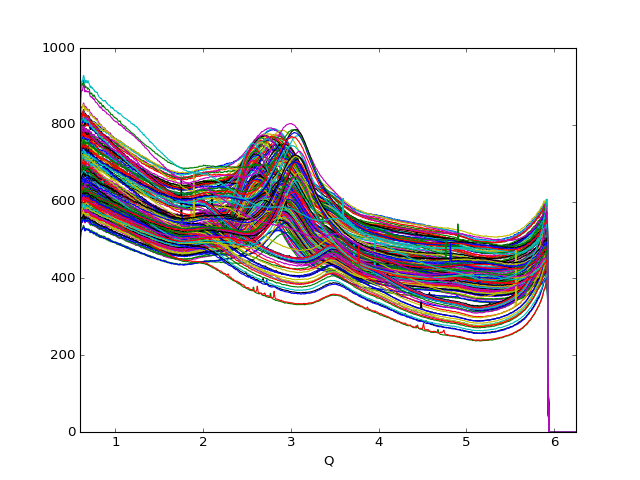

In [74]:
signals[noncrystalline].plot(legend=False)

In [22]:
%matplotlib notebook

<IPython.core.display.Javascript object>


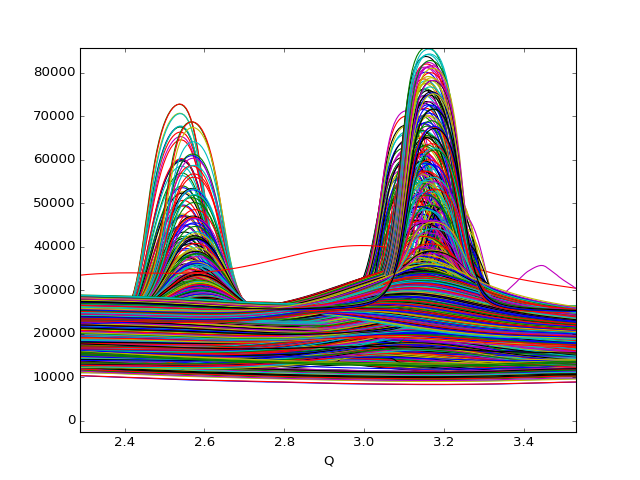

In [75]:
xtal = signals.rolling(25).sum()
xtal.plot(legend=False)

In [76]:
xtal_threshold=35e3


The rolling sum of the signals to find some crystalling examples.  35000.0

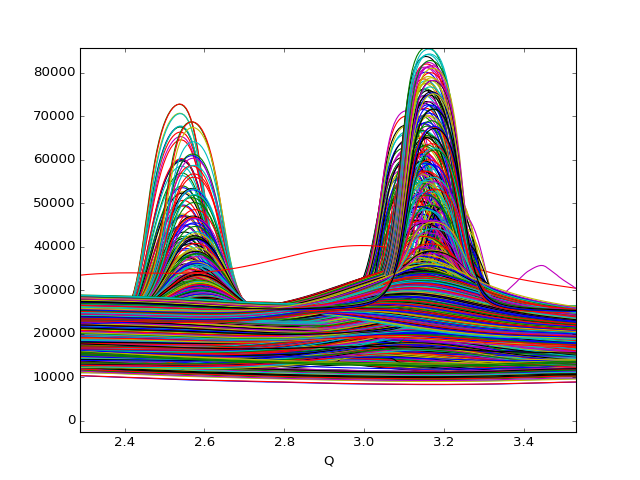

In [77]:
%%jinja2

The rolling sum of the signals to find some crystalling examples.  {{xtal_threshold}}

![](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAAAABHNCSVQICAgIfAhkiAAAIABJREFUeJzs3Xd0FdXax/HvnJbkpPdeIAmBJEBC70WUKiCiIghWQFHs2BBsXMCGimIHFVRAuCLSmyJFegsJoYQU0ntPTk6d9w+49/Xe660iQfJ81sqCzOzZ7HlYkN/ae84eRVVVhBBCCCFEy6Fp7gEIIYQQQogrSwKgEEIIIUQLIwFQCCGEEKKFkQAohBBCCNHCSAAUQgghhGhhJAAKIYQQQrQwEgCFEEIIIVoYCYBCCCGEEC2MBEAhhBBCiBZGAqAQQgghRAsjAVAIIYQQooWRACiEEEII0cJIABRCCCGEaGEkAAohhBBCtDASAIUQQgghWhgJgEIIIYQQLYwEQCGEEEKIFkYCoBBCCCFECyMBUAghhBCihZEAKIQQQgjRwkgAFEIIIYRoYSQACiGEEEK0MBIAhRBCCCFaGAmAQgghhBAtjARAIYQQQogWRgKgEEIIIUQLIwFQCCGEEKKFkQAohBBCCNHCSAAUQgghhGhhJAAKIYQQQrQwEgCFEEIIIVoYCYBCCCGEEC2MBEAhhBBCiBZGAqAQQgghRAsjAVAIIYQQooWRACiEEEII0cJIABRCCCGEaGEkAAohhBBCtDASAIUQQgghWhgJgEIIIYQQLYwEQCGEEEKIFkYCoBBCCCFECyMBUAghhBCihZEAKIQQQgjRwkgAFEIIIYRoYSQACiGEEEK0MLrmHsAfmaIoChAC1DX3WIQQQgjxX3EHClVVVZt7IM1BAuBvEwLkN/cghBBCCPE/CQMKmnsQzUEC4G9TB5CXl4eHh0dzj+U/NnPmTObNm9fcw/hDktr9NlK/3+Zar9+6s+uYun4qD3d7mKd7P81PNXXMzs7mbGMjSW5uBBgMVNtsnG1sxG6rp6FgA+8k9uHOxFv/o/6v9fr93q6l+tXW1hIeHg4teAVPAuBl4OHh8YcKgAaD4Q813quJ1O63kfr9Ntdy/Q7kH+CB7Q+wYsIK+kUP584zZ/i5poaXY2O5OygId93//7iyOhxsrazk+QxvHqkppfDcFuZ1ue3f/hnXcv2uBKnftUU+BCKEEKJZZVdlM2rFKOYPmk/f6OFcn5ICwLlu3Xg4LOxvwh+AXqPhRj8/jvcYyEPBAcyvcWfq0U3NMXQh/rAkALZAQ4YMae4h/GFJ7X4bqd9vcy3WT1VVJn03iVvjb+WOTg8wKCWFCGdnvk1IwM9g+JfXahSF9zpex1xfE59Ww4Ks9H/Z/lqs35Uk9bu2KC30wy+XhaIoHkBNTU2NTIsLIcT/4Ju0b3hi2xOcnX6WyRkXqLXb+T4xEb3m/+cnrA4HWyorSW1ooM5uR68o9PH0pJeHB26XZgeHrn+GHa6DWJ7YkdsCApvrdsQfRG1tLZ6engCeqqrWNvd4moMEwN9AAqAQQvzvTFYTbd9vy5yBc3APGcbks2c51bUrQU5OAOysqmJ6RgZnGxtxAHpFwU+vx1evp9pmo9Ri4dGwMJ6LiEDraCJ2xX3URk0lo2dfQi/1IcSvkQAoS8BCCCGayVv73yLANYDh7cYx7dw5FsbEEOTkRJbJROcjR7g+JYUKi4WXIiI40bkze5OTeaVVK8KdnKiwWhkXEMDhujpiDh5kZ52ZL/tOwV62h7vS05DJDSH+NQmAQgghrrgGSwOv73udN294kxdyLtDZ3Z07AgPZU11Nh4MHOV5Tg3HzZkoGDODF2FhGd+jAB48+SrfycjZ26MCupCTONjbSYLMxt1UrJqSnk+kcT9emQxyqLuOz4uLmvkUhrmoSAIUQQlxxq9NXE+EZQdvgHnxeXMxrrVvzeXo6Aw4dosFkYkhWFhtHjKC8pITs7Gw+++wznJyc6N69OzfddBOtrFZ+Skqijasrc3Nz+SQujpnZ2XTsOBPLmVeZcT6DWputuW9TiKuWPAP4G8gzgEII8b/p/VlvxiWMoyJgJAdra5mh0XBDTg5GrZY7wsP5pH37X72urKyM+++/n+PHj7NmzRqSkpJ4KjOTdRUVfNqmDSNSU0koW0W+90Aeiu7CzMjIK3xn4o9AngGUGUAhhBBXWHpZOseKjjE2cQIfFBZyo9nMsH378NNo6BkSwgcJCf/0Wj8/P75a+RVTp06lX79+HDx4kNeio2nj4sL83Fzei43lrP8tlJ9fwpt5udTJLKAQv0oCoBBCiCtq8bHFjG03lg01FoJ0Op5fuRKP8HDq3d35oE0bdJq//dHUYGngzX1vMnDpQHxe98F1vitvaN7A6xkvrn/hek6cOcbX8fFcMJvJbmpiXGAw+vBb8bTX80FhYTPdpRBXNwmAQgghrhizzcyylGVM6TSFd/Pzcdu9m7qhQ2kdEMCDISG0MRr/2lZVVT468hGt323NqrRVjG83nh/u/IHiJ4v54c4fmDdyHl7dvOi6oiuv//AiX8W14c28PB4KCcFgDKOp4gBv5uXRaLc34x0LcXWSdwELIYS4YnZd2IWL3gV/v86czz6MWlJCBzc3csxmtv/ieT27w87D6x/m25RvmZk2k6RNSagNKg3uDeRF5xE4MZBxE8cx4eUJ9Lq1F+873mdf8T5u7fgKz2VnM791DA80VRGFjbXl5UwIlM2hhfglmQEUQghxxWw9v5Wh0UP5trQUTWoqyvDhOPR6ZkVG4qXXA2CxWRj91ig27tzAkhXzuKXOQOe7j9Dz00o67Ywn7PEwKjZWcCDqAAVvF7DijRVY37diaDKwZ/e97CvLIdjZDV+tBkdTEUtlSxgh/oEEQCGEEFfM1sytDIkZwucZGSg6HX19fDhvMnF3UBAAqsPBY9MnkJ6dxuYvExmRsIXQyBTcalNweu0ZXAdEEbTvJZK+jaTjjx0p/LCQ2im1vPLgKxQsKqB7SBfcTz/PE+dSeTEskFw8+bGqigKzuZnvXIiriywBCyGEuCLya/M5U36GuOA+ZBedQt+2LX56PeMCAvDU6VALC/l67At8cd1Gdvm9RnzJg3DpXb/mQjMlX5VQ/nUOdZ9aUD8+hsZJg0cvb6yVVvqs6cMKdQXJF5KpDKzip2PPED5uA07nv8PPsw1fl5TwdEREM1dAiKuH7AP4G8g+gEII8Z/77PhnLD62mPYhs/msspI2MTEUWCxs7tCBnjYbKZ2fZtAta5nd/WkmeU7BUmrBVm2j/lg9JV+XoPPUoXXXovXQ4u5WhOuhlTD6JspLY6ndV4vd28596n0cPn+Y2E+SCIi+iyijO3v0SUS5enOqWzcURWnuMoirgOwDeJUtASuKEqAoynJFUYoVRalUFOVnRVH6/eJ8B0VRdimKUq8oSr6iKC/+Sh8vK4pSoChKnaIoPymKkvB3539zH0IIIf57W85vYUj0EL4pKMDbx4cENzfCnZ3podHQOPBO5rarIl6Jp/NDvTk75SwXXr3A+UfPU/x5MapFxd5kxyXGBd9hvtApkLxufSjYl0tIx3TarWyHrk7HwsqFrFu2jk9Gfsy5U+/Q2yccs72JHLOZo3V1zV0CIa4aV1UABD4EQoF4wBf4FtigKIqXoihuwBZgD+ADDAUmK4ry6F8uVhTlKeBu4AbAD9gHbFUUxXjp/G/uQwghxH/P7rCzI2sHAY7W1ERFUeniQk5TE1ODg+HeKewpGcK6zpt4KHM6MW/GoPXSYjplQtErRL4QScy7Mbh0t1DV6lVyO3WneEwPHHNepGnZs5wePYmM6mG02pePu8aI6xOujPK9njbhg/nk+CdoijbiplH5vqKiucsgxFXjaguA0cCfVVWtVC+uTX8MuAGxwM1cHO8LqqpaVFVNA94Apv/i+mnAG6qqpquqagZmA3pgzKXzYy9DH0IIIf5LhwsPA7AzpQwnq5Wu7u4cravjtrQ08tfpWJK8m376flw/5XrOTjtLY2ojTmFO9CrpRdRLUThGr8Q0+yY8JlSiWzIL43M/4BjxLdGpmSSfeRNlZxRZ2TNwWvcIPkH17O2yly+ue4eCshMkOvKpsNn5vry8masgxNXjaguArwFjFEUJUhRFz8VglgGcBJKA46qqOn7R/jDQWlEUt0vP40VdOgaAqqp24ASQfOlQx8vQhxBCiP/S7gu7GRA1gB+KijE4OZHg6kqS0YjvfQ9zVD+CDT028VTYU6SNTQMr6P30dDnRBa07nDs3lfz8d+jYcRud+m2l6+IHoNYN927u5M7Np+z8KLpVa/F6+BU41A3dJ9OxtduE7zwzYdHjKa7Lx70xg7SGBkotluYuhRBXhastAP4MNAGFQAPwOHD3pZk4D6D679pXXfrV49IX/6SNxy/a/dY+hBBC/JeOFB4hQhdBVVQUjRoNdXY7g1PSyCsZwJ8HbWRA0AAMjxjQeehAA0HvtWPXcQ0bN44lN/cQRuMBjMZeADiFOpG8JxlrmRW/m/0oX1fOhVYvkGh5CcNnE3D74S0M0z+iMG8pz5dOpqwmi5rML3DWKGyrrGzmSghxdbhqAqBy8aNZO4EiwBtwBqYCmxVF6QDUAl5/d5n3pV9rL33xT9rU/qLdb+1DCCHEf+lo0VHK0ipR2rQh0Wjkp6oqhiz6iFynW9jRZQeDvxyMW4IbNiucDvCnzQQf1q+fh9V6hjmv7GJOz5Ms93mIwtZ9cMTEoh87mOS2H2BeuoXwJ8MoXFpF5R3vkmB5FvNn7SleMA314QW0+24n3i7jcDdl0eRw8G1ZWXOXQoirwtW0D6A30Aq4WVXVmkvH1imKkgkM4eIy7ARFUTS/WMLtBmSpqloPoChKDtAVOHjpey0Xl26XXmr/W/pY9s8GPnPmTAwGAwBDhgxhyJAhv6EMQghxbakyVZFVlYV6NBqln5bOHh78OTefsNPt2JKUgdVipbdTb6oP1GNyaDh/cwxnnt5FUdGrJDsWcrN1KKpHNue7TeCj1Kmcrw9hXv98ompPkqh7BdP0d4h/eB7pS8LoFOhNuzFZWJYMx/6aAeXZl5i58n1mtP4Kz9oTbNd0xqGqaGQ7mBZn69atbN26FQCLPApwde0DqChKGhc/dfskUA+MAFYDw7n4XN5Z4DNgLhc/GLIRWKCq6sJL18/g4nODI4As4AVgIhCnqmrjpU8B/6Y+/m68sg+gEEL8Gz9k/cBda+6iaH939I88wh3+/lR+u4Hn3ktkweSlWNIs3H7oBXTlTUQ+EkLH1zw5fDieqJz+hExdD7NmwfTp4OaGqsLrr8OcObB4Mdw+2kRx//kEHH+T6k53kVM1muT6+zjZeT0nNqbS6k8bsLtl8Eh1HFmeZzB3XMiBTp3oIv9nt2iyD+BVtAR8yWjAHzjPxefu5gPTVVXdeWmGbgjQH6gAtgKf/iW4Aaiq+ibwBbADKAN6AkP/EtwuRx9CCCH+O0cKj+Br9sVv6FCsqsqp07kMPJRBbY2BLZottCu+Gfeyevz0Vjo+H0J+3gKMxXqCH94K27fDs8+iurrgcNhQFHjmGVi1CqZOhVXrXfD+7nmO6T/Co2wXUbl/olR3A22SDhCqCcU69y40rUp5pMKbxupT2FW7LAMLwVU2A/hHIzOAQgjx7922+jZO/XCKC2PfIcLDg4y6en6Yk81R1zpebfsaL7+7no6JGnx6uNHqXV8O7g2jw8uuuL6/jUKPHVRWbqeu7iB2ez06nQ8uLrEEBd3J8eMTuP12L3buBL8N2dRsziWh+EGqSsPx9TrDD70/wrzWStScUso7PsrMHZGc7j+JsJDrSOvWrbnLIpqRzABefTOAQgghrjFHi46Sl15Pg15P22IzYWVluNYnssl3C+Hpo4jTNGI5U0/YY2HkHX8az6NWbA9P5lDtSMrLv8ff/xaSk/eSlLSbgIDxOByNZGU9h5ubL199dSPPPLMLzR2hNObpqX5uOZ7qSeqq/Ol7SxNah5aKt6IxlfVgur8vmsL1nG1sxCGTH6KFkwAohBDid1NpqiSrKotGl1ZoAWNqDkl5NVSfbGBf2M8MaRiMW1sj3td5o/MvoKD6C3zO+3PWuIiYQ11J3j8BX1MHsrKeIyXleszmXIKDJxMT8zahodPx8fmR558fzKGUbgTMK+XCp1bMS9bibklDv+g90mPScVQ7MKqPE9LpEO7Fp7DZTZxuaGju0gjRrCQACiGE+N0cKzqGn9aPgIFDUYFqtZq2DYFktMnBjoYb0v2x1doISiqicFYSHukq+UNqST5+NwHnQinN+JjDZ3qj3Z9CvPM8goMn4+LSBj+fmwk2z6WD8RyuFTeDrYa8qIk0DJqPo1UMRcH3ou47TNBoO9jBZ1MkdZlJPOoSglK+V14LJ1q8q2kbGCGEENeYo4VHca11xdy7HWEmDWmxAYz83p8j3ttoV98NJ3c9lrwGvD+4i6wPTBjs3sQPPc6a3s7kFX1Jp+rPKCMOS5vz5JW8RPk3CTSsGk5okRmtw4BdsWHgHtx1EymJP03I+O2cPjOeqFc/xHL3FsbsW8cnioHk75NJ7XUfPTs+iteFH9lSeQszIyObuzxCNBsJgEIIIX43x4uPU3euDsswDzqfLGNXxyBCN1j5eFQKAyq742o6i5tbAzWPdcDqtZ2ShOXcdrKIro6dTLHMBo0Rd99b2JOTTMO0cwwqTOZM+HFcZ5YT2v8857M/oK6mFec3dkbZ5cSo1McxdTtI0ZzHKHafQdL+6Zz01ZJUlURQUw8c2dHcay5gce3fv/BJiJZFloCFEEL8bk4Vn6LyfDUNikJYXg6tq8xomlTOtDpJu51tsNTp8Xm6B+UN26m3tmZqvjsv+hVwv+V53IxtiYt+A/VEE+Gjq+hkDcZ5pZUjz3jwQvdAXLs+y9135zD8xi5MnLuFgav6s7DDFE4f8qD81kk4Zl6gSklmuns+FicLMWtNHMm7mYFhDdRUp1JrtTZ3eYRoNhIAhRBC/C5UVSWjMoPI2D6oKrjbi4gpcCYn4Bx6RaV9uSv1ljC02c9ROhDe83+KXXEGIgrGAxoaG9P5ZskzlNwZg1vretqs/wwlaCxzkt7jmYPvM/DIEXbWqcTFfUpIyDSCgh6g04jx5Dz4Cpuq91L+aifOJAwlOTeXdMMOOG5ibXgvjK5NtKvbxkZ5L7BowSQACiGE+F0U1hVidpgJ7zsSUMkPDiLikJbDsal0yQzB2D4Uj+5G7MU7qNd48rT7MYrTuqGqVozGBOyWx9G//AqBcXoiFn+IxZFLfPwKgiOnET9oL3/OvIO7Tu7jcF0dUVGziIp6mYEDl9IuMRH3kT+zuW4vDXkdqfROwFjzCapVpb3WHcu+ntzeeJo1siG0aMEkAAohhPhdnKs4h3OTM+boODzrzByLb0dCio30qL0kFAzApvWkKewHKnooaFyMaKu/BSAw8G7atz/A+nvstPaM5sYjd9Oj72kiI5/n7Nkp1NYeomuP04QG+vJZ1d1MSNlJpslEaOjDBAcPw2BoYuAjqbhd7+BAQxrHnacySalH41zNsHV6Uoq70jW4iEMVuc1cISGajwRAIYQQv4sz5WewldgoNbgRWl5JkauRqPN2Toek0zGvG/Wp9fgXLaaqs0KgRxx2eyUuLnG0bfsZcx6Yw7DiYfRY0wOtUcuphkbWOIbxjf9PPFuZxDMpS8jutonQLC3vNE3l0fSfUIG4uA8ICjJTXNyGwb2zyR55hoZSf7L8bsPNuAqf/U1sjuyFwepMYNWK5i6REM1GAqAQQojfxfHc49hKbJRrFYKrSggpUihzz8ah05IUkYxVb8a3KhucNNTU7EFR9MTGvsfhQ4cJ+SoE30m+nE3WMezkSboeO8bmykq0GhfaB9/Iaas30zKOM7LLKvZmD2BE3bN8mJ+NVmukU6dv8AvIwN5jGzMfnM47ujcprrwT97oTUG0nM9wNfryOUU37yDGZmrtMQjQL2QZGCCHE7yIlPwVfTQAVehXv+jrCz2rICkohpq4NTd5a9EEpVPXWouicUB1NODu3wtv7ej6afB+jDaOZMnwzJ49WEGs6yePuMD5wKO0DYwGwRYZx9Hh/DjndweLA8Zht5fTKnEu23yJaBbYjPX0abaJWUlX3HnfdOoyty7dxk/523MhmwoYIMixxdL1xPRvKS5geHtW8hRKiGcgMoBBCiN9FVk0WQVF9QVGwuXoTm+ugpMM5Wp1vzYWybPzMJ6m5zhuHowmt1pvtB31wHuNMp1OdWD7wAiec4wlbtYD4M/s5nbePrh915bbVt3Gm/Aw6nTvtE1aSVPMSm9vW0mfPWdYwiudOfg1AZORs0DfSEPwdt8y/i9Oh22k0dcPT9Tg9DmjZ5OeM1qontWhTM1dJiOYhAVAIIcRlZ7VbqXBU4BTaB73NzlnvCCLyVDLa1BLTFIvPGR0B5anU+pXhcNipqi1nfuVhep7oSWtdLGef7MqXBleiz9nY9Pwm1k5ci/klMxvv30hCzwSeWvgUBkNrYmM/ILv8Sd6vLeGxzN2sNwXzbXEuw4b5sHzFy9iteorzlzHJdShrlbWUN4TjWezgUDdXNEe64lK2vrlLJUSzkAAohBDissuqygIHmHyi8KupJdffndA8B+n2c3hqwnGuMuLoch4HUFarsLVKx+y2f2J4/gg23KSQ+MN6powZQ3BwMF9//TULFizAaDSSEJNAGGG8OeNNjG5GZs7cSVZWezLHm3hx+iJGKjuZfDaNasWM0fggVpszxTUf071dTzLj1lFvT8DdkYG/tQ0NpxPoaE5t7lIJ0SwkAAohhLjsTpedhgqo9HIlqjCfBg8N3oZKqtQqnBx+GLwzKbm+ARXwdFeZ2HMJ2cuL6agmc0j3PRf27OHIkSN8/fXX9O3bl3379mGxWEhNPY2BGxhwwzrsxg/5/PO23HdfMiPGpbJjVDde2X2BZPUAQ1KOcuvter7//hHs2jKcJpoZ63wD3yrfYVYUBv1oJKs+jEivQhrMsiG0aHkkAAohhLjsDmQcgEqod1PwqzfhUw413csJqQ6ldVMN7vZTVMdDrU1Bq/OlY/At6DY72BudS5SlhO3bt5OQkMD69etJTEwENCxaVEpoaCUwifhWe1j87p95+a2VPPNMCh07TmP8D4/w1Mu1TNAepMhUSnpMAdt2TENVVSpaf0dc6s1ktV2PWW1Ft8Mq6UEOzMX+7Cvc2NzlEuKKkwAohBDisjt24Ri+Nl9MLlocJici8lSyo7OJKYzGp8CAX0MKdh+waXyJCpnIq18tp5/aj8ZWOSxdvpwsu53Fn6zg9ttu5/lJr5Kf9QnvvpvLnDl9+PjjwURFvY2vhxdx3VtTFrmPwYOf45tvbifpeTfemzKcafWvMSsnk/aDPMk/0p/yyu/xCimiV4QLJ7UnCCuq5kBcE/pDPcjKX93c5RLiipMAKIQQ4rLLqMwgRNcOh0ahujGQ8DyF4+p+QuujUXIicSSfBCDIyYGf302sf3sLRozsfeJ67n1iH6tDP+Xh++8lXhnGU291JjRqNm8v6ERWWjZPPBrOc8+pjBmzCmvWTdT73Mya+l5MmaIjOnwXf3r9BQ5/MJz4xnwKx2ayYvXLoNrQ3nGc/lm3sMN5I2ZVQ53WD8uJZPwaDjRztYS48iQACiGEuOyKrcV4ePcEVaXCK4DwQkhtyKSNOQSNvpbi/tU4FGcUReHBrQX0OhtMepyJuVO03La9mjfMs/AMDCVVfY27n1jBPQ8vZUfBJ9xwfBvvXficAwsO0K1bN+6++24aVzRyqO4Qk556jAcfq8BvsYmHHnyNmK+PkG6oYou5PdT70TBgL5qzA3HtdwCbomX8pjgyTIF46ytoapLXwomWRQKgEEKIy8psM9Okb0JrbIOT1UpNuIawRgvF+hJam1VcNdnUJoKLwY9a4/V8s3YDAzXX0SPTj7gZEbzmMY8maxMhIat59JH13DnmY7on76CqTx+Gzayn8cMwml5p4uPYj/Hz8iMvJw/jl0a+LF9N/wGRzM7S4XpgNOPHfcqo77bhek8u+T/egMkpA63GRKK3G5vZStdDUBinoaEwhNpamQUULYsEQCGEEJdVbnUu2MHs6YlnXT1lIWBzTcG1yZVwFTyaslFCVBrtjbx2xEDCUTNudiNtv2jLsrplHD5ymHvv3YGTk5nhw2fSocNW/L268WlcHO/FxnJzeB71O6MxnzCzJH4J+Xn5DBkwhPx38gkd2oUj+SaKv9zJlvReTBzxFm0r97H8wMOoqhXnATsIOdmF1OCtuDdoqI63oU9NIKd8T3OXTYgrSgKgEEKIy+ro+aNQC5VhTrjVNgFw3jOF1iWt0RX7oHpngU5BY6vkdKYXAzLDMPZyIS8mj9mzZ3PrrY+yZk035s69i1atXsTDo9tf+54QGMhnbdtya815bKta4Zvny4P6B4luHc3wUcP57JW1PDAtlMdKirhp0PN8tzaCZ5Je4VB3LRqbF+r4nwk7fR0JQ3KoVarQlTqhO5VIcdGuZqqWEM1DAqAQQojL6kT2CZwanKjw0WGo1BNaAOfcKggy++IoisTWIxc7CpWmIMqNfnRRuhD3eBxjx44lJCQEP7+3mTXreby8fAgLexKHw4HVakVVVQDGBQQwr1Urbiw/Q8C6OPrU9eHkGydZtnAZzj7ObD2ox9VPIeO19/Hp78rZs4E8FD6H3MzBmKLO42KPo2+baHar+4jd4UlBuS9GzuJw2Jq5ckJcORIAhRBCXFZnis7g3uhOrVGPe7Ub4fkqpdQTgzsOky/mHlk04cGxc6747ztHhCOctVlryc/PZ/bsJezceZIOHT5kyZIAfHz8cNW6MtYwlnmu81gdtJqdMTsZ9Ewtz6xz5unyCyQuS+Re072seG8Fc9+fS+rRPOLaq7y6cR3ubW7jaGoZHVvvZ3NGFxw6E47wcqoq4sjy20f0GSMZOjewKzQ2nm7u0glxxUgAFEIIcVnlVOXg3RCMVa9DozMQWmKjkSLaWNzQa0qpj7PgbIcj7t3pftJBY3AT0198DK2/P9NWxHDrHQ+zbiv8WOHGO0NXsNVzK88lPEePcT24kHyB10te57uj39HrZwuTh1ezf10hShcF01wTk3tPxmuCFz/u1IBipmK3lTvGl/L5Fx09CmMOAAAgAElEQVQY2uljVIcR7bgvqN7kg1u/EzhZdVj8XWjIiaCu7lBzl06IK0YCoPjDc5SVUvTlh2Q+cQ81ny6C48fB4WjuYQnRYhU3FeOpxgHQ5KnFs6meaudCwhvccHPk0OTvgqJUk+LVj1bF/mzVpoJOR1y7UYRl1dOn2142LjUw5ZvOqN8U85TXW3wz4SeS3kxixuYZfJn9Jdl9shmaMpjUF8rJOFWNe6En0eZotj25jafueArXeCO+YQobFizijFtXdG4qGtXOkbMjcXQ/ie95D3pGGUjRHCWgyRtdWjtqayUAipZDAqD4wyrLTOXwgFgIDKT6yQdJ27Wa1DkPU9erM0Vd2qKeluUcIZpDtaMab782KA4Hlb5Qr6ugSW/Cr9QTnesF9BoT1Q16qg/nkqTvysnCzdDURNpPbZk8+VkM9iEsNWxh4OgbKH1lJKVBL7Jw/nUEBKXSt28Ozz/vR+fOi5k48UdeeGUuq8cc4fhYJ1w1rug/1XNv+3up7ddEWrZKVXUFx0+14aZb8vliaRwRfvtweNcSbA2np38i+5SfCT5twDWlE5WV+5u7dEJcMRIAxR/StpfvwpDQAYvZRNrB9cQUWRh9tJ7256rZsXsp690LMSclUv3em809VCFaFFVVMbuYUUOCcDZZKPVXKTRU41vni1IYitrxNKrDTmp9G/xPZBJpDSFFPYHNphAVNYy+fXfi8vZkLgT4csOeRL75zo/b+iczYkQnVJdO7N0bxpIlZh57TGXr1m7Y7Uc49OwtPHa2EsM7IRitRvJn5jO462ASBrpi1FrJ/aGUUO8cDp/WYmp0JetCe9w6N2HTd6Gp3QGC8lwpzw2mqekUdntjc5dQiCtCAqD4Q3GoDtY8NIie878k98NX6b0/nw5db0Sv1QPg6ezJmK6TuHVLHvNn9sMw4xka18p7PoW4UrKKskAPlYGeeFTYMTsr1OnLCK33xVERhb1zBhazQqpPX5IOm8kmm2q1mmHD3mX06OXoMntz+mBrFlhjWfmNwsqVsG8fpB/S88Y7TgSt2oF3bDJdu87Dw0MlOVnL/feX4tgayojXwlnnV0X1h9Xc6XYn9f3cKLeqnNi8nZ/r23PzDWF8vbItRtdauP4nzlRE0/a6Sko0RZTbnLA2uVNff7y5SyjEFSEBUPxhqKrKisnduf7zn6j5fhXt73nmn7b1dvFm1qxtLJjcDiZMwJFy4gqOVIiW6+DZgygmhRI/VwKLNHjUgMGRT2xDAKrVg/q2DWgNDtKa4mhdGc5J5SROTk44OU1hUL+vqP7qenb2iWP3rM347v6O7klNJHtmcfLHcp6814l9N/bH+uYb5FUtJyZmEvHxKmvWdGXwqO+pbXqXD2tHsx1Pwh4Mo9TWSO/B4K7XsWevN9fdksmeYyW4utRSFZtD/a5q+gUaOGY/hk2roSE3krq6o81dQiGuCAmA4g/jm7fu46avjmLZspGwIbf82/Z6rZ4H39jFRwPcqBoxCCyWKzBKIVq2E9knMNQaqPRyw69KS0CpisOaTfvqYJwppNrdAYpCzcFikkjihHqCm2++n8zMwxgN5ZzKS+KzXUHkzFjE4FcH8lz0at7NHolb6wAYNIiolBT+FOtN8ZT+bMlbyylTDxIGzeLIgVF4eu0ktN8iXlfbsabYj1lnZuPWyYUak4nTG3MJMO7H7jSSHbuuo1J1xf2cnfDqSPKc03GvdYFzkTQ0nGruEgpxRUgAFH8IO/ctZ9CLn1P+6gv49Rv6H1/na/Rl4CfbKbZWUfHW3N9xhEIIuLgHoEe1OyYnA85W8KlSqVSKaVvmibMuD7tTExUOP2rWbiWSSDJ0GYSEPMnIgUtp2N2X8LzVdGrYQ0LuJiwuXhyNn8T2d07hKC5hQ09fomf24pF+vbE88SFNhSqHfzzE3l2vU1maSG35cbIPzKJHn7l8YI9G8+cbyG4IomuUhuLTWeTka2jr2Y6N3zcQFpaBb3QFBmsv1LiThFZ7434ygYZ6CYCiZZAAKK56BVW5aCfdRd3A3kQ+9uJ/fX1yWBe2TB2I09xXobr6dxihEMKUbeLC/AucPnKa1g2RANgMCi71CsXGMvyqvNF6F2DwsJCpaU1CiSt11KEJMLByoRN9+6+mprAv0bs/I2pUR4YPV/jzn6FNG7htUi0+T97KmBVrqUhx5X3vGEo7JtHtk9WMuvspWrm34rt93+PZOQZ0jRxKX0Bn3ULmOuIZ/e0zdB/pQKfVsvJHP0YOPUaBvZKs7ARqRpzFo9VtBPYupF5Tj/1cLPV1aX9944gQ17KrJgAqipKmKErtL74aFEVxKIoy+tL5Doqi7FIUpV5RlHxFUf4hCSiK8rKiKAWKotQpivKToigJf3f+N/chrrwNM8fStt6J1iu2gKL8T32MfWIxhwNslM164jKPToiWzVphJf2OdA7FHaJmbw1VnlWEKOEA1LtpcWqooc6lHkONP2pYAc7OKmdNrQip9CVHdwGfkiRCkk6g12mY+OXTlJfD7t2weDHccANMnZGH7+Su1H+3Hwru5O03Cph2Ig3/9u3Zcf/95HTvjqeXN8c2HuH8yv0YIr/BGmvlZ2YQrX7LtxduxUXTFQ9nA8d+qCW+xw94eQ9i887OaGOyKHX2JTlAIU09SXWdC3a1FouluJmrKsTv76oJgKqqJqqq6vGXL+BZoBzYrCiKG7AF2AP4AEOByYqiPPqX6xVFeQq4G7gB8AP2AVsVRTFeOv+b+xBX3g8nvmPMV0fRv/0uuLn9ahtVVWlszKCs7Ftqaw9itVb9Q5so71Yceew2PD5ZCqWlv/ewhWgRKrdWcjjxMPY6Oz1yetBhYwfqXOrQe0YAUO6nQWPJxrvRA02NP3XhhThUKC0NIoYYztoy8LDfxPABKwgJvo26Oi3TpsGCBRAcDBWNFfSY34OCRbncPuZppk9bzEMPeTDxPifq31+K8frrWfHii3R6+GHeeustbLYS3psxBjLTUAZpOa5MolC7i7yv5zGmoxc1uZUYdYdwLhvNzi1p+PoXUJRzhESrB6lqCjabBltdgDwHKFqEqyYA/oppwGJVVS3AWC6O9QVVVS2qqqYBbwDT/679G6qqpquqagZmA3pgzKXzl6MPcQU12ZrImnEv5rgYvMff8w/nHQ4L53Ne47WfRzPm0FLap2voeCyDLj8v46Wjc6g3Ff5N+7vuXciBMCj+UPYGFOK3qthSQdrNabSa14rE7xNxCnHCarViMVpo9AvA2eSgNEBFb0klxOSN3RxASVQBGgVOrDpDDLFkc4ZSRtG5+w4Co0ezYAG0bg333HNxy6ebPh1HyfuV2Bqf4qedc0hNhY4dYcUK8PZRGF22mGo60n/pUvoMHMicOXOYcoeOwLaBqIdfRzNMQ43jNtaWudArOApFUfhpn5HAgBrMITWkpfWk0rwHfW4oDQFn8Gn0oikvlMZGCYDi2ndVBkBFUa4DYoGPLh3qCBxXVfWX7/c6DLRWFMVNURQPIOrSMQBUVbUDJ4Dky9iHuIK+XvMyk3bXEPzpin9Y+q2p2c+qQ0MZmRvCh8pjdAibxPIOA/iow3CmtBrE0sb2xB/cyZrstX+9JsA1gNSR3VCWLAF5xkeI/1n1nmpO3XKKuCVxBN8TjHLp3+f57PPgDpWBPniX26n2VtDYc4ir98OhGikNLcSsGig9eoLWtKJYp8c1vAA373L0+j4sWgQvvACNRWVc9+wU9n5wAB/XBFYsr2PnzhmsXLmO/fvt7NgBOh24umu5PvMrdu29hTGRCSxZsoSsrExefReono79YATaPgpNhjGs3vkCHl5erN2iJbnrD8R2vp6Dx2LRxZymsawNnp3OoqjAoSSZARQtwlUZALk4E7dFVdXcS997AH//9H7VL855XPr9r7Xx+EW739qHuEJMVhMuCxZSeuN16JI7/825ysptzD/xGvean2dkSA/O9RzAGzFxXOftzRAfH6ZHJpLRexQPBHkz8YITG/N+/Ou1bafOxKm8CtvePVf6loS4JpgLzaSNSiNmQQyBtwf+/wlV5diudeCACl93IvJVDGaVWqWGTuWB6KlEH6ShHD8iylwAlVLbIFp32o2HZx/eX6Dip62Bbycx8rF32HX+S5xzbHzYsQsRaTrqLmRw+vSd7N3rg5dXX5YuXURu7j42b4GD4Tex+KObGT/sDubOncuEjp7o+uXhKJvF3W53Q0gVWyoWMyJqLAWna+nQZQ/t9MPZvbOK4Nh0atwSieth44wuA5ejSTQ0pDdXeYW4YnTNPYC/pyhKMDAaGPWLw7VA6N819f7Fub8EWa9faZN/Gfv4VTNnzsRgMAAwZMgQhgwZ8q+ai//Aym1vMeFYE4bP3/2b4xUVG3k77UMWKU+woX0y13l7/+r1Oo2GmW2H48S3jMt0sNFwnP6ByQxsN5xlnY0MeucVIvruuBK3IsQ1Q1VVzk07h88IH0LuD7l40GKBt9+GDz7gtLYA/U06Kr1ciT6j4FsOldoG4ko8MTgV4uev4VSDP23wJ5Mc2tKT/r3mc2Krwtt/cnDvQ0/yekY/fvL5DNbYiLgrFscoHVb7Nhot59FldMY12YX6+oOEhJxh9mwH5eWhrNs+gzs6h7Fnx/PkWQbyxhtVDH7awaZd40k9uo2EofGkLl9LRtYrOKx26qqPYUxpS2FjOnl5cXj00JFkhM2WU8TnXUdD/SlUVf3rzKa4NmzdupWtW7cCYJF9Ya++AAjcD+SqqrrlF8dOABMURdH8Ygm3G5Clqmo9gKIoOUBX4OCl77VcXLpdehn6WPavBjxv3jw8PGSS8HKx2C2Y3nqNij6dCImP/+vx+vpUPklbwFvM5vvEjv80/P3Sk23HUmlewi2nLZz3jsPTYKThzvEEPPw51NaC/L0J8R8rW1VG7f5auqZ3vXhgzx6YMgUMBli0iIw9S/Eq30qtmxGDRYtnjYNS5xoCSrxQXQtxc7Jy4rCOaGI5xzkaNKNpk/ATR96Ziz6oBLvTCI5XGTGYT9CpSzeemqRBZ/6IFeWBTG6/DeMGf0qeKyFmSTCVbWfhcPzEmjVj8fF5iZmrfVh581Q22jbx6afLmHjPBH5MyuTg8f4sWzucO2+4m8Nb38XgHMyG9SUEmPIxJgdy5Hg0/TqeJLrIiVJjHo0NOgz2GiyWIpycQpq34OKy+uUETW1tLe+//34zj6h5XVVLwJcC12T+/9m/v1gD2IGXFUVxVhSlPfAksOgXbT4AZiiKkqAoigvwJ8AMrL0MfXx3Oe9T/Gsr933KxP0NBL70/x/WsNnq2Zz6EHOZyVfxidzg4/Mf9zen/V1EaMp5+tQ6AIaOfYbTPnZqv/mXuV4I8QvWSisZD2cQuygWg58BNmyAoUNh6lQ4dgxGjiS3Ip+2Ze6YDU7YtBr8y+sod6/AuTaAxuAstBoHR3+qp43ShnwsWNpko1cVVhd35qabylj0/mjcb5yBcgjunlhJpCsM7JWBT+B99F45mD2T99D287Zk3FWIX/pCwsLu5ZZbljBr1iYCvFsxftkTdItOZf58X4Z4eWF5tB6VuzhjrKZ7RCKKWyWBTkM5cVKDLvIU8Z3bs/+YC+5BP6I/74c2NAej3RVMofIcoLjmXVUBkItLvz7AZ788eGmGbgjQH6gAtgKfqqq68Bdt3gS+AHYAZUBPYKiqqo2Xqw/x+1NVlZKFf6IpOgptv/5/PXb63IPMsU1lckgEN/v7/1d9ajQ63o1pzRc13qRU5xHjE8PRrmGUrfrid7gDIa5N+e/m49rBFf9b/eG772DcOFi2DJ544uInMoCSukKCbWHobCr17uBXdx6rzorS6ENF4llUFS4cLiFajUGjDaVj5x9x6N05ld6DXVu6cMOjf6bi51zatTHQq1ciSUk/4WZsxSsDX2HzHZt5fOvjbIjaQMKqBM7efRaPc08QETGMRx4Zw64fPyTX+y6e/tMdeHvG8/qL6QzsaEDnkcryeg33pz2IdpBKfv0a6qtt+MUdol/7Gzhx4BBWm5bGxkA8ErJQ0GBOa09jozwHKK5tV1UAVFV1jaqqRlVVK3/lXJqqqv1UVXVVVTVEVdU5v9LmJVVVg1VVdVNVdYCqqqcudx/i93Uo/yA37SrF4+lZf/3kb0XFOhaWG7EaWjO/dfT/1G/vkEHc5pzGA+n7UFUVzY0jCfo5BazWyzl8Ia5JtnobBe8VEDkzEuXkSZg4EZYvh7Fj/6ZdFVW460JQgQpf8GzKwqvJHaslkIr29ZhxIqLaBSMuaO3J9O6zifQzvQnzdtBYYKU89D3MexqYMjmQdu2+QqMx/LXvzsGdebLnk0xdP5XO5zozbfY0+n7fl0XH9ORoPDE1TSM+dj5lmdF8/MYgFi/2YpAmANfhpeTU9ifoSCSBER6ovg40xGGxbie8qDOqXx7pp7qT4xVEVLKJPG0e9iMJMgMornlXVQAU4ocVcwk16XC+5XYAHA4z28+9wdfqbXwd3x4XrfZ/7vv1+BGcrKnh5ZWPo2zbzu5QG/v6t+bE5Btp2rcbHI5/34kQLVDR4iJcol3w6ukMd9wBM2bA6NH/0K7eyYTqEYhdp1Dmp+BsKSe2ygOL6o8aYaHa4kKgEkshhdRqo4iKPsKmTc9T2qhnfOAODm7cR1SEhnvu2YlWa6SmBjZuVHl88WrC34hl2bGVjG57E0X1RTw06CEe8HqAwh2FvHMhh8Xa79i67i0Wtp5P6Ok6Xn7xRlIXulI7yRWVcNYbiggoD0U3wI6qLSTtxAVqdqtokjuSkRlKY1w1bfzhnP0cSloUJlNGM1RaiCtHAqC4atSZ6wj88xYaxtwILi4A5OW9zYf225kcEkYnd/f/ue8qUxXvrnqZ1Y8+wMxJC+lVqMGiV6hQTBSc3It50AAqwv2w7th2uW5HiGuCw+Igf0E+Ec9FoMycCa6uMGvWP7QzmUzYXO1UBwTgVaVS4QdWWy29CwJQsOHmXUd5nQuhthBKKKMhvhDFATt/TKR9e4XiKX/GeEpl6uT7+fnnUPr1A59AE+PWjGVR1kN4HHydwlnpnJi5mq5nN/PBz8uY+vxUnj30LD817KKXxzjeLHoZU/1yyk4OI8Y3C1vdZ4TXeIHrBjbYfRmS04sBLp1RXeycPOlMecMZwtqFcuKUil/cKWJqIVubiT3XD5MpsxmqLcSVIwFQXDVWH1nGbWkq/g/OAMBsLmL9he84riYyOzLqf+53z4U9PDS9FTMf+5Z2nfoTu3IFrjuOkTeyP93yVIYfrOJk6g4W93XFcuMw6qbcdXFrCyEEpStL0bhq8As8D59+Cl99BXr9P7QrKCi4uAl0gDfheSpWA9TaTCQW+6HXF+Ph3MT5HAglgCaNBbeITKry2oFd5bmn6llVsgJTIbz19PMMvl7l5wP1MG4kVl0poy6cZuF9EyksUHjrLVByBnDu5e8Z99pq2n3ZjpLXSljU9WMe1d9IccF2bulRTPy7Fu69Zya+Kw24XZdHbn0fYi90IjQ4D3o00djkhs37GN1aB5Fy5CwarQ1tjZE6v1y0je6Yzfk4HOYrX3AhrhAJgOKqkbnsbex+vtCjBwAXLsxnseYxnoqIIsBg+DdX/7r9eftZ/uRgvljZhNvHnxO1YgehASUszNpDyM134VNYhZKVRd+Y63jky3PMfe9Wsjd9Tc3YG8Fmu5y3J8QfUvHSYkLuD0F58QV49FGIjf3VdtnZ2eAC5f5eBJaoODeplNFESIUPdudCXLRmzh81EE4kTY5AOnY8wMHT1xNMBfs+fxxSreh0w7Aq3rw0tYrk2SNoG1DD3O/exP1HC49Mc9Ct28VXgu/ereFPcx2sXzCCx5fWE/JgKLmzs4j0ep+F7c1YDTXc1dGJzJ9Uxvd9Ek2Prmg0FWzN8+CERxFBvt1BreJ8zSoGh0ej+GaRnt6DcnsYTlFZuKhGqPHFZMq+wtUW4sqRACiuCllVWfT9MQun+6aComCxlPNtURpFhPBEWNi/vf5sYyNv5uYy/8IF3sjNJa2+nuNFx5kzdzDvbnRg2LAZ5Y47UBQtU/y0fFFuo3fiSHZHqlT9+SsAXPQuzJuykk3vP07h0Z8wTbgN7Pbf+9aFuGqZi8zU7K4hoFUOHDwITz75D23KysqYMWMGU++chI8Zyr09ca9V8KyxUmqow6POj0qvYrSKg6yD3oQTSrmHH4kJKRw73pURTrVs6PYt5iNOJLe/n+XqAWoHz8fmX8PPc7bTflcNMQ8uYUDivUR0f4EbH93GvQ9W8cTUYCa+/iVffm7gucwoCnbXMzzMg73bp7AgsRUZgUb2n3WQEL+f2KxynI1b2Pd/7N13dFTlvvj/956aZDKTMimTSkgIIRAIIL1X6SqiKCqCXbEfLMfeEAviUVHxIFhREOkivUgJHUKAFNLrpEwyk2R63b8/4HLl4vmu9TtX4ejdr7WyZjFP2Q/PDovPeqo8ClVRV24LjITOIZw6XUgvRX/8XdIoLc6gNSKIpK6tmAUzQkFfXC5pGljy1yUFgJL/CJuPLGdsOQTPugeAurqPWSOfxd+SOxKq+Nfnle9qaiV9+1EyDx3hub37eH3XXt7Yf5Sehw8wY9EkflgZQPnBRzBy5MUyt6ZORSW2s7u1geI+HWjduvaSOp+9/l0+nX8Djfs243nl8rVOEsn/FaYfTYQNCUO96FV44gn41fmboijy7rvvkpraEaVyO316CaQ1KLGE6lB7BJJbbJi0zagc0TT1rgERaquiiCUWY2QK0dGnKS7qy/4ubRRXWJB5VOzZP4G66dV8cuYTBiYOJOvTLO7ecjeH0g4hzgoQCNqPYeQc8o68RGbECb579DG87RFsXO9jkn0g425VsWf3m8TYz5Dc7W5+yvSy4lAEM3t8giPsHEZfNr0rezI4rgnhGmhu8VKfH0ZI5yQKStSo0+rp2N1LqVCK/0wmTmf51et8ieQP9p94E4jk/6CW1d9g6ZRIVEoKfr+dPbWbKAws4L64uN/MHxBFZu8s4VuqoeZrouuqGRY9GJfXR3VNDWdKNvDZigArhl1L2vTpjP5VWY+7hvmy+YSUmjA8aKLGLdKaO5yIiNEkJj6OQhHGwpnLebB6IJ+9+R5cNxX69bsyHSGR/AdpWtGEYbAVlp6A1asvfu/xeHjggQc4fHg7mzb1Qaks5oXDESS0iZwWlfjlIinNbZzQtoA7GmtmM35RRmxAiR07LaEynE4tDU0dGfPYHEpWKbkXL157C892exZ1u5qzTWdZMmUJ49LGIZfJwWpl/4413L1oKD6Zk4H6NYzNvpHBkUF4Sm1kFurIt4/i09rnuPXWcsbcvZT3ajrxaFYpYzo002vgdeSuFlEUDubIlFfJKL6BItUqtub8QFK/ME6tryMovJV0P6wLnKPH2Z7SRhDJX5oUAEquurr2OrIOlRF009MA1NcvY61wCzMN8UT+xmJzn1+k44p91EY0kliynu23vUpmTOeL6TnVOSx+Zg3dmuVMGQzeU3ms6p7FOK2HoqLZtLcfIk4zjNest/NylIG+U+/G/eM4Glt3Ule3iJSUV4mPf4gXH/2ReTld+PuMmwg5UwQhIVesTySSq81Z4cR6wkr32GXwwANw4epFj8fDlClTsNvrWbZMg1arJSPjNI2+3qT441F4Azg0MpJa61CFBPD6oxFTLNi9SjoIMhpFC9FplRSd60OPHnaM2p3IKtXc0DGZ2YvH0ehvZPbp2bwz5h2i0qPON6a4mHcGb+R188O8OruSvsfNbNXBB6dDWOw6B14RMKKihhGWpdwqH8+WVe/RmjyCUYqBfBgRxYyBWyn+OZ2jzcmE08yU9rEUdVvJrrzldLt2OOea93PuXB+yNLnUB9XhqxmNyyWdCiD565KmgCVX3ca8VUwskxF6822Iosjp2m/Z6e/D47+x9s/rFUlduofaiFrmykxUPb78kuAvIAZ4bO29fLpHQ/THnzExZBDuU+/y9OmfOHqiPypVHAMGVDK02xJKSMMa2Z98L6gPqsjO3kVGxpdUVy+gqOguUsKSCHtxHkU043vxhSvZJRLJVdf0QxMRI0JRbl0Fd9118funn34ai6WBf/wjGJ2uO1lZ61GpomhWtBOkiEaUgVUrorQ10bNRg4dIdAYrljY18WIkbcjI7HKEoqI+9Oy1mMNFMgLOAL9My2KN9zS3Rd3KzPiZNH7ZeP6Bu3fzfs9veNf2EDlHVcSMOMqNNTew9sh3PHntgwTr9qB/oRORr0Qy+bqdFImPspWdqFsyKW/Ko27jHs40tyNPOkDX7mcpENPwl3diyujekKqjxFhIhtmOKtFHWWkWZmss3lgTyvYIaQRQ8pcmBYCSq65q3Zd4I8IhO5v29sOsdvdmeHg4mRrNJflEETIX7aEmpZVXNALvTXgYmXDpr/DawrXcscVIaId0mDmTHx79O4/p0lnIQ2zxTyIj40uUSj3BQQmMVBaz0VRGaWYMbTt/RhAEoqIm07v3IWy2XPLzp/HIgId45/YOiJ98DNXVV7JbJJKrqnldM9FxxdCzJ3TpAsCKFSv49ttvWLQoFoVCTWbmd5y/wh3aQhzIVJG4VQJtYeBztNOrIQYQCAu1UVSoIZFE2oMMdM44SUVFN1KHLcBR5MctupknX4PSBpuOrGcko+mRPJVJTw3j03E/8qr4Ipt2K1i8ZA5z587lm+XfcHjrYSZs6cWSlwbg+fwIloAN8ZYPsAW9xZz+5xgclk1r7Z20yf6BbtkK3i3SMWLsEewkEZo7Cn3/WgyOcQQEEc7V4M/oitEYhj8ENJ1qUQeCcdQ3I4rSAfGSvyYpAJRcVSa7ibT9Z5Fdfz0IAsb6L9guu445CUmX5b1zcT5l2V6eCnLx6ojbLk0sKUH8/HM+/OFJHt7rQPb66yCT4fW2cGvXdfxU2pl3rJNZ2tBwscj1kTo2t8mw9++D5ljexe/V6jh69tyLx9NEeenDPHLPEtZngvtlaRRQ8n+Dt9WL9biVyLNfwaxZAJSWlnL//fezYsVs/Am9jOwAACAASURBVP4CsrI2IJcHAeByOvGEenFERBNqFzBHCti9Vro0RyAoLGjlVs6eDCOJJEqDI0lOLqSuLonTLjPqMjlB1waBHOJjs0gd+Ayhd2wnutd8Hv5CzuPiB1jfzGPoo/1Zn7Of/UePMnnyZCLHRGK4y0D3zUXcNCkCw741bK/cxNC577L4UBQH1YdYOT4Epf9HPC2f0LxpHmRsJyRoL23nBlHOavqXDILOSsrKWghkZFJe5UWX0ETHtDbaaIPqWNxu41V8ExLJH0cKACVX1Y7SbUwtlhN68+34/XZ2NZ3BgYYJv9ptCLB1r5Pliflkt5eyYPiF4E8U4bvvICsLsrLYsnURww4ZUciVMG0a4kMPUnjyZrTaa3h03BYChe/zaOE5Wi7c/zsxcRhe0Y951I1EGS1gMl18nlIZQVbWWszmrXRSFbPhtmuQf78Czp27Yn0jkVwtbXvbCO4gR52/F249fy3jM888w+zZN6DRfEPnzp+iVJ5fE9jm8/Hwxk0QCuboKBJrRVr0Im2incS2cGzaNoJEN3UVkEwyJkML7e16unfPYW9NAEe1D2+qB0PUNTT1+5iBxW1sDg2j6KmPeN6+hKlTK1G+MRqZsRrTi/fQv6acz41GRFGk4xsdseXamDukhbYT4/HV9mR78JsExZ+hc7CbX0Y/yfeDtESxmcDJHJZtuI1x43ZR1ppObuNhejtjIMvHjoJSotPCKThXjiAPkNHDTTXVyKq6S0fBSP6ypABQclWV7PyBUJ8Mhg3DZFrLbtlkbomNRyX7719NiwWmnPgeFU5yJp8/JobaWpg8+fy5ZE89hdjUxPwJocwtjEC2dBnk5FCbfARHxV4yHI+S1SGBh8Nm4rHk83ZxJQBhodkMkeVRqdNzLgrce3df0ja1Op7MzO8pKXmce2+4j+W95HheeO5KdY1EctVYdlmIiKiA666DiAj27dvHjh07uOsuB+HhI4mKug6ArS0tdD16FOe+U8g0Csz6MJKqwREi0KywEtWux5x6ftRd0ahCgwZlh3IqK7tx06xPaaoAdECMBl3KDI5ccw0fG40MffllPrJchzVgoFfvjUSoNKRHxNFv42pkJf/g8aI8HiwuhjA5qe+k0v5aCS89KyD7aRlDkoYin/0gB2rUbPhqDvZnreyR+9CJazFviCWq937qxTRKaq1oh0agCAynzWknwdeMvf0E5RVZxMSoqKQSb0matA5Q8pclBYCSq0YURRR79tE+qA8olVTXf8OuwABmxsZekm/aB/vwZSey/pq+aJRBUFJy/rYQvR4KC2H2bE7YS4g9kEu4//zon6drIpVDysiwPYRy9PWwZQuL7pmNuvQgH9VV4fT7EQSB0TolRx0ix1ODMO1Yf1kbIyPHkJj4BKHti9l0cw/kGzZCVdUV6iGJ5Oqw7LYQ0bAZZswgEAgwd+5c3nzzVuz2naSnfwTAWpOJafn5PJ+cTHyxEb0sgCk8An0zhLUFMGmb0dijsfWoQRAgtDUcE20kphRRZ+xEkasGWZkAGVHIBIHvko/TPTQUbryR8q3FvO15gjsV23j9tZfZ+NNGPlv/GQ3N9fQ8bScs/2lW1+Yz4fRpdHdEozKomCarQ4OBsj3DEKKsaPu/S0tRNCcVvXDdkco2vxX877N61SiiYutoyh1MxIQk0kuHQZwa9YkCQpK9VJR0R7BHYZTV4TwXJ50FKPnLkgJAyVVT1FxE32IbERNvxONpZFubh0hlMAN1uot5TuT62ZNxlmu8LUxI6Hp+Cnb4cLj9dvj664tHU3yb9y2vno5E9tAcUKmorn6TsLBhRNz7MSxZAtOnI5SU8HjCVDwuI/+srgNgbExnCr1h1PXvjSzn4G+2s0OHF/B6TTx47Qi2ZsjxffbpH985EslV4m5w4yh0EN60A8aMYdWqVTQ0NDB0aC0JCQ+jVsezzmRiZmEh4yIjeaa8nKqaGhJcAazqSIJckFrvxBTWhMIRjb9LLR6fnDBPJI2Cnw4dCnEEAhwwawmUiQR31RNTpsJhWY/Fshvb/q95M/gZRg/dw6r4OST01zH5l4lMWj2JoMlB5MhyMJtLsOTczOHDf2Pa8S0kvZCM6eNaXn0xQPnGW5g/5m1aR76NP6SF3ILrMd6qphtwsz4RS/4K0rJ/oOnUUAwDlEwsHkQgw0HLiTKE9DTqyuMIIKM9rAHBGC1NAUv+sqQAUHLV7Dq3hWFVoBw7jubmDfyimM5MQzyCIADnl/hd/+VKiOnIuuFToKkJRo+G2bPh7bdBEBD9Ig2bG9i3+Wu6nmrkyPvZHOj+I7WVi4l1Xti0MWMG3Hcf3HEH826agrxsOy8XF+MXRTKiBpNAHfXDJqAvrv3N+3/l8mDS0t4lxPY9a0dH4lvyGbilS+Ilf02tu1sJTXCiHJoNWi0ffPABL710B1brLyQkPMYZm43bCwuJU6modrnY36sXfn8riRYZXlkIyESSm9qxqVvxe6JQJzZgc6qJQo9ZHUFKSgGxMXUcqfVCMwQMleir5LhckZzbNoaWJWdZ7p5Fi/IRCppNpIzx8UpGGx/Ep3NH+3BubroZ/zw/wwuH4dx3kG2bpzHZ8RSuGBeTRSdqUce2n9UMDOmLf8BC9nx5DwSVENDBstYqQjQ+jh88h6k+CyFwhDRfM0R0pLLKhD25CxU1ckL0rfji6wiyReCwSSOAkr8mKQCUXDU1O9bgDwmGbt2oNm0ix5/JjJiYi+lffN9G3Yh2poaIJKk1MHMmDBoEb74JgoCz0smpkadY/tpyphYF8PcbQdc9I9F+vJrg2kkUj/GRf3M+fqcf5s8Hlwvlm/O4XTkMq7+dDU3NqFSx9JFXUJ/QET/iv9zkER09naCgFEZOzcSk8sGaNVeqmySSK8qyy0KEKh/Gj+fEiROcPXuWAQMqiY29E5Qx3JSfjyiKTNTryendm95aLTWYMdj0yEQZXnWA8LYGEqzgIgZNhAljTTBxxFEpD8VgqCI5oQxbuQshVktng4EPn24h5JdGes0RWeCZiyZuJYf3FpOoDeHIyw7mTpdz/z2nWLr0cwKBU4waOZQTP58g+mA4wkI/xz/bwu2T7iPvn8cZP6OUH79I4PVJr+Hp+yn15TJqxS6U3BBNflQUHwf78Ng2YFM5qSjZgLFjIyrbIAIyAYUCiqrqUYc4MHQ3ggjOCtvVfiUSyR9CCgAlV4XX7yUs5zie4YPx+dvZaWknSa26ePZfIABzT36NTJvMl33Hnh/xKyuDzz8HQcC0xsTx7ONoumk4/rfjzK4NRXX/bagyrbSyjh63LGBA5QDc9W7yRufhscng++9h4UIWDewLxr28fOI0AEO0Ms76NOTFirQf3vub7RUEgU6d3idJdphPBjhxffT+FesrieRKat1lIaJ2I4wfz6effsr991+PxbKOpKSneLK0lAqXi7lJSXyUno76wmYtU5ANnT8OEHEECwRbm+nWrMSDHo2qlaqCUGKJxZPYQlubnhMKE0KdHG28g9GaKrp9l8qWRcE02OJYLL+X1ogXiHILGGxKgnHzYHA4C5/8G126jGDNmiJE8QS9e3fgtmm3MeDp/oQ5I2hYVMsdHWdyS6aFtopOONsyuaatF+LghazcNwvnaBV2m40JPhsR4V2xez/g2EEbdf30dKjugZCoRmepxmw+Tk1NZ7J6eDDRjL9Ci9/vuLovRSL5A0gBoOSqOFJ3hBHlImETptLSspmjivFcH2W4mL5qnZ22gQFmRAQRduYMzJsHq1ZBWBimdSYK7yyky1ddMHxgIPfYepJKmuDkSeo/nUxEpZ7gT9aitNeTvSMbVbyKvFF5+NMy4c470b3/Hj1a9BSoRGw+H2OiOnLOpyOvSxyWQ7v/ZZt1uv7otP2IvKMzslN5UFBwJbpKIrli3PVuXNUudOG1WBITWbFiBdOnB6PXT+SYO4rPjEYm6/W80bHjfxfy+WgNdaCWR+OTgTVUQHC00cMUiYhAiMxORdH5EUBlSgX1jSnkNLajrRGxxvupsT3GyQX7iTIYeEtxN8rk3cSaPASUKuL0ejbfs5eXU2/k8U8+YWv/oZQUl6JSRXPqVAFff7WI+VPmI9zYTOKTT2Lf6uKe5TcTPXIFL71l5vmUZxD6fsqBn8bhS2qim9/G2zfdxBKFEa9rD/tX90JxXWeGVvfGl+GE4lIE2TlKinsTZdBSRRXUdsTtrrl6L0Ui+YNIAaDkqthfuI1+1X5kY8bSZFrHwUBvpkSdv/dTFOHJrd9BZDfeyxoMjz4KTz4JvXtj3m6m8I5Cun7fleip0WzcuID7jgcQANFlpz6znHj3WNixA9LSkN8/m65fpCDXyCl/phyeew7WrOHllD6Izlq+rjLSOWoIidRyathIhNxT/892JyX9jb7RzWzrKiewcsUV6CmJ5MqxnrASEmlDMXEEX339Nb179wJ2YzDMYlZREQkqFT907XpxnS6AWFuLNdSJoApH7QFLhIDH2056sx53mAWl4MNUJaJHjy6lFI9HRU2bgN0YoHP3Dgy/YS433nILE40VfC/cyahuX2EyNXPHqFFsUKvpMKkL5d674dgx+OorUt6cz6b1hbzyykjcbh9/u38Or498jaCkoyg+/wLfmQAux7Mc2x1H//HXktSYjk21G4esI76+cCY4mImtzWii+1Neup+U3lF0b5eB3kBrQS3BSWE0lnYgODiICirwl6Xjckm3AEn+eqQAUHJVWPdsxREdhj8lnhxzOX5BzeALu3+3bPPSMKiawSofhtWrzx+78vzzOMuc5N+UT8aSDKKu08N777F59VtMLw+BhQtpeXsaoi6UyHu/gG3boLISqquRDR1M1/lBNHzdQEu+FmbOJO7oTgSXi6crShhXaEZEye5+E/A12s5HoP+CXj+ZELWeszfIcX739f8zr0TyZ2M9bkXrL4Lx4/nqq6945JHR+HwWNrizqXK7+bFbN5S/OqNTFEW+e+tdAqEy3KFhhNqg2eDF7rcR3x5Fe2o9oghiSzBu/Bg6FKFUOWhvCuAPCAwdOp3ShQsZXptHWaAPDk8cO7dtIC1NxoJvPkcoKSGsgw17vh1vfGc4eBCOHEGYcRtPPLaVxYsHU1RUyLnlRXht5UxM05L28j9x5lqhc3/WHhS5tXYKYs+l/HxqNrWD1AzIy+OH9O78PaoEf+AI9mOFEHQGbCOQq+QEIiIxV2kIVnlplBvxlCRKI4CSvyQpAJRccQExQPixM3gHD6St7QCHhGFM0kejuPAfy9Mrf4TkISxMy4ZnnoH33iOgCqbgtgIMsw3EzoiG2bPxf/wRZ1KCSTLaYMYMjMbPiI+/D5lMcf5BCQmwcycMG0bQHWPJeDOczS8VMnHWPUwcOYooMRKnTOCWmBiy1A5q1TF0/eIbZh8/jsnj+c22C4KMxMQn6TooCJnRCKdPX6luk0j+cLZDZrStR6hMTaWwsJCsrCYi9VN5oryGoWFhDAgLu5hXFEUefvgxtn+5CUETREusnkiLgEUv0ibYiGyPpj2tCQCFVUsjIh06FFKnrMFfDcTB2l1VrFi5gjmhPubFPIlevxSv18eiRam0+HbBwIGojm0nOD2Y9oPt5/9N790LeXkIr73Orbdu4u23NSz9fDFj2sZw6vjzGPt2ZM7AhVBcxBtfvMWMLtOQhVWxekdHXNfI6FdSwoejBvFUiRGFZgQ/zPuGxpgGwquzkMercAtBGI12QsMs2CMbEBpipBFAyV+SFABKrrii5iKuqfYSPnICFstODglDL07/VlRAQfcTJMsC9P98KaSlwS23UPlaJQFHgNR3U88HhQcOcHzDZ1xbHIAhg3GH+bBYtmMw3HPpw5RK+OgjGDaMbWXLuP9tH4ZKJaVr1rDml2NgLabZYue1ePAg56uX5tBqbqH3iRMcamv7zfYbDHeiU3rYMUGOuHLlH91dEskVIYoi1mPthCY5WLtvH6NGjaC9fQPrfMNw+P2s7Nr1kvyvvLKQzz9fg14xiiiVQFlCAnF1Ila1ilZtC0HWaNwZ5w+B1vkiaAgSiI+voNhnJtSkg3gR84c/0u/VWxiU7+F40xRMpoVoNBr8/uEYjZ/BhAmwZQthQ8Jo22+BQ4fg3XchMhLefBNll2u4e+8A1o0NsOvtb5E1OhmsaCRnYg86jetB/Zn5tKTK6Vs4gSbFTjzaAN38jZweMoTKyHj6xEH5mU1UdHKQUdUFd7KTgN1BqbkKn09JRHcjQfZwXO21V+WdSCR/JCkAlFxxB6sO0L9OQD5oMAUtJ6jwhTP+wt2/85edgYzuPJeYAh9+CK+8gjXXRu0/asn8PhP5px/Ct9/Ctm1ssRzl5vpIhLHX0ty8Hp1uIEFBiZc/UBD4eN48Hh43jtW7DnPXIw7CJt/K0PXfoa6p4LPSc3SJ7EMY7RQmhfLp1jXMTUxkTF4ePzY1XVadXB5CnGEGddcGcH//jTQNLPlL8Bg9eFohdEgc69evZ8aMrohigLfMyUzR64lXqy/mXbRoA/PmvcaECT+RHG8mQfTQpDMQ0RYgvFXArGtCcEUj61CPyyknFgOO5GZstjCKmtLxVHnQarVoI8JR7FrKz9oZ+L31iKoWJk6bxsqVZmpajrOiextP+TazVvU4iiV9cI0bQ2t5IeJ9951fF2w0EprYje7ntBR5PLzyUSPWPa9S2E3g/tT5EB/MjMU3MevIKOi2kr3HZ6PpEcBgtXK0zzQ+sexDFNM5YrcwoqUDRGsQ6msxu45RU51BYvc2fIIXZ6X1Kr4ZieSPIQWAkiuu8vBWVAEBb5d49jvU9NOGEKZQ4PPB8qa1yEISuGPzDkhNRRw1itInS0l8PJFQ+1l48UX4+Wfo1IltxVvoWWSB0aNpbl5PVNTU33zeF/X1vFxfz/a4OCYtep2YTjXUnkoHQWBQk5b6UDWK4Ey6cI7CwX3xnTjGE0lJrOrWjdlFRexrbb2szjjDLFI7ywi0muDEiT+6yySSP5z1hJWQEBPOnhkcPHiQHj2aqQ+ZiEOU8VZq6sV8Bw7U8thjM7nppq/YsOEaalqaSXC7cct1BHkDpDQ4EAUzNnk8wfpGaqoUGDAQSKmjxRxLRVUMrnoXcpuCOZ/dz7QzLj5030x42CJUWi3CbaNZLqznxoNenj79CSNL/Dz55S72xSQz7YNBxGVvJ9P1Hj/e1R/x1luguhrLml3sng+xMtgwr4AXc35hXVIoZA2lqeYc1VojqpZOrCmPpKqvnOFbt3KgTyJd2x1E6AdRm3+UrtgQPUMR2+yIQiXV1RkkJIbQLJhwVXiv4puRSP4YUgAoueIChw5h7ZGBxbqfM/IRjI48f/jz+p88uAa0MjJERuiCBfD88zRvaMFR5CD5sSiYNQtefRX69KHZ0Ywn9xgqUYa3Zxqtrb8QFXXDZc/Kt9t5rKSEVV27MqBnT3j4YVJly6j9qA7vzXfx5Jky8FvZ3mimh6qdmk5d0RWUAjBJr+eDTp244exZCu32S+rV6QahVEayZ6oMcf3ldwhLJH821qNtaN1n2WW306fPNTidv7DY1pO04OCL53M6HDB58t/IyLieVaumIQhQhZWEdhBRgxAg2WQj1OXAKYshJKiRqmIVcSQgT6jD4VWDcBq00D18Id+XfsV1VcGcsg8iIm4H6i4WVh2ehSotQP8Q+PE7O6lWke5zRJ6bYKGPahDGvxmZO3Auj299nEH9z1JxchdZVU38XNOZ6ndlPCYKPPb2PCafWMqozA6Q2YNPWj6kS+EYSn2ncfSWMSIvjzxsHE2OYWpcET6bkQK2o2jORh4dRJA+hJYaA5F6JXWBerzVMkRppF/yFyMFgJIrqsXRQseiBoKHjMJs3kmumMXI8HAA5q/bhJAwlCfLG0CnIzBhCmVPl9HxjY4o3noJ9HqYOxeAHWU7uL0pDtnwEbS0bkOj6UZwcMolz3L6/dySn8/jiYmMuTDFzHPPoSw+gaFDAQ2qG5i0+XuEpkIWnjpLn9AgqrQdCG+xg8kEwH3x8TwQH8/0ggI8gcDFugVBICn+bszDvDg2rfvjO04i+YNZ9zWiFYr54tgxZswYgtvbwmF/JnMTzy+rEEWYMmUbNtt2duxYcL6Q348xxE6UPQKZX4ZXCZHmZgztAqI3DI2yjapSObHEExxfg0yrwlZjRRYlI8+sZVC+SI5sIH7BSllpAe5Mke49HuLB6Kf46kMdmXKRwMIufDxOZE5HPWsrV9Ljsx5o1WGsvusUQam30f3lKTy6ew2hQ17Bq1Timd6DPnE+7tuylXtOWAhXP41NaCclvwF/0i7OWdLpIRqpEEVygvvxWONu5OpJbJLnEtmQAAYBQoJortKh1XmppRZPdRReb8tVfDsSye9PCgAlV9Th2sMMa1ARMnQkeeYztIpBDNTpMJkgN3YHQcpQxi14D+bOpX5ZI7IgGYasali6FL7+GuRyALaXb2dSjfpX07+Xj/69UFGBTqHg1ZSU//4yMhKefZYO9s+o/9mPkN0TQ7WL434bAyM7UE8kZxJ1iGfPXizyekoKMuDt6kt3AibEzSY+BRRVBefvKZZI/qREUcR6yoGmq5ztu3czZEgw52Q98Qpqbo+NBeD7793s3fsIr702j6QkA+WWcuYsnUpTqBONaABBxBEkI8hmokuzDpkAwQon9VUKIgglPKESeXgUGKFDpw6kz/iAu4os/MM9GlnUh8jUMpYUfMHzy+9i2rIybEYHFZ8OJixlEiPmaBgX0535fc1k9nqO2+qDGZmXhzJ2FJ0738Li/h35OiyUh5NXUXLXLEr02fztxpFMOLiZ2a0/oBnUjR3WtWBOYMPp3sR1cWLRaKhUDKOLRSQuMYsSMY/U2mT8SU483gD1laDVttIsa8JTlYjbLe0Elvy1SAGg5Io6fm4P6fUenL3jOOKJYaBOR5BczvK1LdBLxy0yEUVZGYGbbqHmvRo6vJCM7Pm/wxNPQHr6xXqOlO8n7awR/6jBmM1bLlv/V+F0sthoZEnnzpecWwbAY4+htDegqdiDdeg93HjciFOrI0iTTQJGNvTJwHwi52J2pUzGF1268HZ1Nfm/mgoOCUnHo0ih4Dr1+YOnJZI/KXetG69NRltnGZGRkfjkp9jrz2ZaVBRahQKnEx599CsMBjVPP3M/L+95maxPs0i2BGgJtSNTRuOXgTU8QMDWRnqrHmesCZkg4m2IxEkAQ0IpxyutYIIeqankWXLomeflMBORBf9Ex6gB7CjdR1/fIfqe3I5DXIbn2VEoF64jqMrJyY1yZnm+xFXu5tu9Sxn4y/3Yjs9hlrKCKXU/Yz54Pdfseo0Y61Fkb73Nd937cP0r7/BG8VYGnJqJW+9BsyeGYy4r1mzo5HbTt18YuZ1VjA7OxxNopaPDgiwiAn9LGxXGFhQKH7LEejDGS2cBSv5ypABQckVZc3Zjj42kVZXPWeVoRkfoAfg8ZyNCzAge3L4XbruN5q3n796MDj0OZ8+eP/rlgiZ7E1FnypBpdVji6lGpYtFoul/ynJcrK7klOpqs0NDLG6HRIMx5iA76zTQ09OLp7RvBWsrXFQJdOEfugGxsp45cUuQarZZHExK479y5S9YCxcXeTOUgN97Nm36vLpJIrjjbKRshqkYOy7yMHDkUa9teTtOHu+PiAFiwIIDDsZBXXn+SGetm8GPBjxy4+wBPxd6MTRvAHxJOkAssBi8ep5XENj22tHoCfhlKq54mrQ2dzsLqnJNggpbIX+hlUmDzGLAFslBZzEye9whHZFtI2PF3VjxwJ3GxL9L70Lv416fw6OOv8+ydM5j3ZiVLa8rY07iF0+5KKosO8/HON4nplE339iDylDnszFtJ4umpiK17ONQlmSceeZxldZ+Q1NOAt+os5si9VKWE0Lu4mIheAkcSs3igaQMIk2jgAAFvP/D6aPIepaE+hdDMOpQt0lmAkr8eKQCUXDGiKBJ2qhBv395YWnM44e/MyIgImpuhMPY4ITIZfT/+GPGee6h+t5rEJ+KQPf8cvPQS/OoA2oM1B5neGI1s1Ggsll1ERo675Gqq0zYbq00mXvv1faX/0z33oGk4TNtPlSQmGFDVGVleVUkPtZ2K9K7ICgsvK/JySgplTiebWv57LVB64iy0ncC7ezP8ao2gRPJn4sg1o3EXs7qmhrFjk3CKciqETgwPD8dohPnzfyJUa+PbwNcYrUYO3HWA7PBszrxyAH+oGpMhDrUbmmP8OBRm9FY99tRmAMLdsbQntGC1htEid0EADisCTMjX8qkwnsiE/TisDh4ccB1vRUZS5fFwx5dfsn3YAIamxDNr3S2s7z2Ab16ro0JTRR/5N1jHTuCdXnqOtPfm9OvN3LmigGPdF3FvcSiKFgU3xcsIdu8icGQmy4YmsmrUUD4uS8AvOKEM1jVm078kl30BL9ut19On2U6IoT8n2AmNfRHiQvCIBVRUZhGR0Y7KHYqzxXiV35JE8vuSAkDJFVPdVk12pQvt0DHktlbiRklfrZYVa9uhh4LJ7a3IUlNpbU/DVekiXrsPbDZ48MFL6smpzmFUnQqGD6e1dQ/h4SMvSX+hooKH4uPpEBT0rxuTkACTJhKv3Exz+l10K3ZQGSSnjyaEivBUdGV1lxXRyOX8PTmZVyorL44ChoR0wYmO1kwH5Ob+7ztJIrkK7AfrCNGZ+fnkSWI7WzlBb8ZE6lHJZLz1Fmi175E4PgZBIbBz5k7CZeGcveEstS21qIMV1MTHoXEImMPlWLUmlI5YvCmNCLIA0QEDzvgWzOZwsIMiBgKCwJAzPraFTKFv1iniogdRMW0+086eJd3vR+FyMWvjRsYNH06FTcP25Q+zqMNbfNvzWxarFvPD9A3cPuUQVTMrObv6b2j2HqR56Ye8f1hHeKiKkupIlgxIJ7DHAmee45k7NKhVMDbVj3BExS91wWQHV5Hb3k5ZaThnO0Afgw8r9WgqlQhxIFf6aKxJRp8swyVz4ij77YPhJZI/KykAlFwxuQ259DEpoW8XjrgjGKTTopLJWLL3JO1IVwAAIABJREFUZ+RRQ7lj4za4915qP6gj/sE4ZIvePz/1+6sDaAEOVefQqcyMp29n7PYzhIePuJhW6nCw3WzmmaSkf9mOgBhgX9U+lk3twLLeP7JAV8yw0zsIyP3EazvRLtNiVYZe3An8aw/Gx1Pv8bCh+fzohiAIKEKHUjRWgK1bf5+OkkiuMEehA9HgQafT4eAkhbK+3BAVRVsbLFt2hDbbcRoyGlh10ypC5CHk35iPv91Pk2gnQRGgOjIefbOIkyBaw1pwiwko4qswt4CBeMT4BuosDoRG8MVAJhn0arFR5RuHteIHnrQdZmzuO3hDtPSd8DjXZA1kdE4O826/nScqdvG3riU0hZdydImGHh94EP0iISHpZGR8jjtyGWdWvkWhuRilX2B5TjQbrLXI1OcIcciJ+6U3Ys1KJjyUxMOBdKgzUe0sw5DkoNzno4OslHMZau5wrUTkWtTGSgJxdgSVjNY6HVExAUxCE67K374eUiL5s/qPCwAFQRgoCMIuQRDaBUGwCIJw4FdpPQRB2CsIgk0QhFpBEF75jfKvCYJQJwiCVRCEXwRB6PY/0v/XdUj+PUXnDhJv9tLe0cU5eX+GhEdhNsNZ7S8I6nBG//AD7pE3Yd5mJjGrFKqr4c47L6nD5XNhPX0chV+kLaGZkJCuqFQxF9OX1NdzQ1QUhv8RNAK4fW7eOfAO6YvSmbZqGquEAkpiRHKF/azLPg2Hb2buntUY3GfYmd0JsaDgsjqC5XKeS07m1cpKAhdGAbt1uA93Dy+uHZt/5x6TSP54oijiqFdi1JoZMXIwYZ5ccgLZTIyM5MsvISjkE8RsHz/O/JHY0Fiq36nGUeTAb/fT7PYSJ7qxK6OINvsJMytwqJpxC7EEhdVRW6kkhiRU8XXU2c2IjUAsKA8XUkEGXrefvOKjZHgMAGS68ji17z0Km7ZzrNFO5vcRfFBxlDK9go0laURkDqBr/UO09r8P/H6io6cSFTWNrNDNLHxuOGdiAozJqSY+X8X750K4e1Ynmg4cQ572NqLpKHfdlcJNiWp8xVWc6xCKxulkQlojxYbO3FCdR7CsD15PIbKIUPxeH+ZKBZGRVowBIx5pCaDkL+Y/KgAUBGEgsBn4AogG9MCTF9JCga3AfiASGA/cKwjC478q/zQwGxgLRAEHgW2CIIT8XnVI/n3WYwdoN0TQ5j9NAZkM1OnYtNWJ0MfNkLZmggcPpvFnD+EjwlGt+OT81O+FA2j/ywnjCYY3BCFc04dW634iIv57+tfl9/NFfT0Pxsdf9uxCUyH9l/bnmxOrGGB9h25b62h6fwdndpWh/GEpD2/4EYX8CYpbm2g4+hRLB4At98hl9QDcHxdHg8fDDosFgMSYicjUMpyWo+CRRgkkfy7uOjd+r4L9rhJ6DY/HhhaDJp1ohZqPPnLRZl3FrJmzGNphKO3H26l6owqvyUvE6HBaAn4MPgeiGEKIO0C8yYPS04Zb0BOiMVFTISeaaHSJlTQF+eFCADjqFGwUhpLEKgKyICYEyim78VG6KYP5Me0YfR86xtAcD9klKzBrm3jzrR8o3beY8qbrOSp8herkDtzDp4LLRadOH+B21/DCoBGMm9KGNTyEPQe1FLQ6SenYiixKIOhgBR3db9PiPIhlal/kp2WspCM9jHVcm51MvnMcwR6RpPBgbOQieLojevzUVTej0dipD67AXRFMIOC72q9LIvnd/EcFgMA7wFJRFL8TRdEtimJAFMVjF9Kmcb69L4ui6BFF8SywAHjkV+UfAhaIolggiqIbeAlQAlN/xzok/yblmQI83btS0ZpHnT+Ufjod3+zfgyx6CLfvyUGcdhP1X9STMN4O27bBww9fVsfBmoNMsugR+vfHYrl0/d+a5mb0SiUjLhws/V82l2ymz5K+uPLHUfHiIezHbuLWm1W88Qa88ZKbUWxiXcsQ/K+8iWPfN4ztPJ0j6jwer/4nXv/lV0AFyeXcExfHZ8bzi8JlMiVmIYPGQSKcPPk795pE8sdynLURLNSztrwITbqfCqErk6Oi2LwZmlp+QtD4+ei+j/A7/BRML0BQCiQ9m0Snl6OoDfISb/cj8yuRBwIkNtkJtbsRvWGEBLVTU6kgkhD0CWWU+lRggUghltFNcJoRBFJyuF50IyCSeyCVWfKz7BgUwf6hsG/NLay89mOc5gF8MVjPQ/JeVFh9uEUDZxKWYz3SRmDseBQeGWlpC/E2f8izY17glvvC6GQyM+snOd+UNxF2jR/1zzto7wxRx75kZ9QxBvZOZH+xlwFNBfhSDZSVdOZoR4F+0YXI0OMvSoZwFQ3tBdjtWrzxlXiqDXg8l68Nlkj+rP5jAkBBEIKBQUBAEIQjgiA0C4JwTBCEGy9kyQZyRVH89VbLY0CqIAihgiDogJQL3wEgiqIfOAX0+h3rkPwbTHYTHava0PQfxFGrg4wgBVqZgoPWXwjoUpm8YiXtidfibfQSWfwdTJ8OvzGSl1OTQ88qD54BXXA4CgkPH34x7TOjkQfj4y/ZEXyg+gA3rpiOf+0X9Gt7h7JiFevXwwMPiIzNdjG4Uyh3RRSyVFzO7NRHCdREkfPQPwlVf8pBoZa7N979m1dA3RcXx88tLdS6XADooyZS31+Effv+gN6TSP44jgM1BFNNlVqNGFTJWTKYpNez6BM/bs2bTLxxAiGqEKreqsJtdBNzRwxhD4ex/K23qAp1Ee3QIPfL8MshwtSCoQ3UARlKpYf2qgjEICfhkSZKKjygAWtbI8OAXN04PMYNjA7R0yKORD0+kYeevY9/XnuacMGLarKHVG9vdKOmMXnKtzww7wHuskxkbVIa6k6h5PMatac6wb33EqW/juDgdCbF2DgTK3CgcxDvnXDjrJczeoIeS+VpLEofpp9vJLt1NEfHuagtqaKHooSDQWqMpQoquotc79uNn7EI1Q6IVWIWzmGs60RwsgkaEnC7pQBQ8tfxHxMAcn5KVgbcyflRuBhgPrBCEIQBgA5o/R9lLBc+dRd++Bd5dL/K97+tQ/JvyG3IpZ9Jha9fLPl0ZVB4NKdPg6tHAymOVgxZWdSvcxE7PQzZD9/DQw9dVocoiuSVHyKmvJHWrh40mu4olXoIBCj56SeOtrQw66abCEREIvbrz5m/3824LybDtoWsfWM633wDUcFeqt6u4lDCIQ53PEzJo6VUiPfQ3N6dWaU38lj8IaZOO0rrK3dw/4rrOFB9gBd3v3hZW1KCg7k2IoJlDQ0AZHeYDckB7AeljSCSPxf70SZkmmay+/Uj0neWUjLp4NGyc4edQPNZXn/0dbxmLzXv1KDpruHU0FN07NiR3I0badTaCA7EAiLOUD+q1hY6mXXII80E/AL+5kha4xtxOIOxG4FoGHYSWuRx1LQF0eCxMMxuxzl+NslFybx45y6QK3AenI2oVaH8yUZLYiKb95ro3W8LWxOGs6olln+YO9J5aQblttuo+ikUYcEC0tIW0GT8gKcHzGHOdA3tQWqW7dRxxt1CaIIG8cBhksebGbbiFQLKUKJ66vHG2jgsCGi85dRlhDO+pgod/ZG1lkKMG4/YQJ0xjZCOLlQtsbhc0lEwkr+O/6QA0Hrh80tRFE9emP5dB+wBrgfagfD/USbiwmf7hR/+RZ72X+X739Yh+TecrjpGeqOXtg42zsn7MlCnY+WWGsQkA5Pz8vFffzOmVSYSUk5CdDQMHHhZHfW2epJKmxCjo2hVXNj9u3s3YrdurFy/ifQzFu49+yx9Wndy5+m7GebYgn/f/WztrGbiWC+mdSYOpxzGvNlM5392ZphjGP2L+9NvSwyDFTdhSCtFY3Yy8xt4oP9hXq3/gjny1Sw+vphlJ5dd1p4H4+P53GjEFwgQG55Fm1OB1XZIOg9Q8qfiOOeiNdiEITuVRGqJ1PVlzVoPhC8iKSWR7B7ZFD9YjBgQ+bLjl8x5ZA5fffUVT99+Oy06D15NAgFBwBbpBVczqa16XImN+DwKgq3R2BKaqGsLBhPI9NClTsZKxc0kCT8TgRJ5uI+Qr6/FVe1icWkjoyu74/G24ZZ7KKs9R7eCAmJKKuj2QSTZQhHnwgZy25k7qFq5hE5Tqqh03Ez1y2cIO+4gMnIcYyJradXIOZzq5ZrTbSSf9aMe6UC9ZTeK4ZVUqNMYXZNFS8dGFrgiqbVY6ByWi0nRF6dCJJ0I/P4iCPchKMDcGENokhuFNxhXY+PVfl0Sye9GcbUb8F9EUWwXBKHs/5HlFHCbIAiyX03h9gPKRVG0AQiCUAn0BY5c+LOc81O3X/8OdXzzrxr2/PPPo1KpABg3bhzjxo37//E3/7+h+fhefMFqzPISCvxDGKDTseD0Dyh6DmDiTwuwPPg1Sr2Z4AOrYNYs+NU07n/Jrc9lsiUaWf8BtLcfIflUN/yPTuGl4Nd4p98g5KdO0N5rDwpXJevSFdhdiXQ+PpKofU9x9qcKLJ7RdPkyk+hp0ZdW3KcPglaDYLXw5W1Gfr6lB3//h5bR2l089fS1vLF2FU9sm8rIjiNJjUi9WGyCXo9cEPjZbOb6qChMijTaupZgyM+H7t2RSP7TiaKIvUFNvrYcTWYPTEICvSNS+OSrJlTqFdx9x904S5yYVps4nHqY41XHycvLIzExkUNfLseqkWGJTULlC9AS4ydSacTQGkVbl2a0AdC5YvAkNFLnDkALyKKgdyDAJncqBtYSJQuiPGE4u09/QLe37qTGUYu65BkCXgWxmwI87/Zy32OPURAairVTR9wjnURUpaM1J1O5o4SeYUuIQqTOfwMNM5aSfOZJTp0bz99HvM5Ldc/SVgKfb1My5iE/Ld+VYtacpcLXg/G70jn4oIuD8blMqKulS3QLVSWT2J+yk95VR8i1pxOwNSEGLLQ3BhPZy4tDYcVR3go9rvZbk/y7tm3bxrZt2wDwSBv2/qNGAAEWAbMFQcgWzrsOGAasAdYCfuA1QRCCBEHoDswFPv5V+U+BpwRB6HZhTeE8wA2sv5D+v6lj3b9q9Pz583n//fd5//33peDvXxBO5WHvms7p9npkgozEgIbikEME1GEMkctp/iVA7HgRYccOmDnzN+s4WX+S4Q1B+Af0wtZ+CuHdnQz8/9i77/Co6rTx/+9zpiZTkkwmk05CEkgooYTeOyICNkRU7O7a1r5iFyuuXday2FFXlCqCgjSldwgEAum9TZLpvZ7fH+zP3X3cZ5/v8yiyu9e8/p3z+czJfee65r4+NbyZ1/s4iBb4KCxfySUlWcy8fAae/FPknZxFQ+ByvtAupMtSjDH1bVIuTvppx6IIF1+C1nyQSXubKeubwNql39Nd4GCp/BBv3Tieywuu5eb1NxP9m+WjMkFgQWoqX/xlVCAhcRLmYQLs3n1OYhgT80sLdYUIB9Vssh5HnmankiKK0VN+IBnJXsucOXM4fc1pfAofK7Qr2Lx5M1lZWRxtO0rFkTNENEq6U9JQBaNYUqL4td0oglkEsrsR5SGSo1kIGe2YPXLohniPmuFKgXZGYaeMsVEXpVULePvF9Vxv2Yh3y2rKEg4xwVxETWeQnCQjI4sNDEtNJX/tSa6qdlEr2AkFZuJ5fRnZ0UZar3iCNHEb+q59KO74Eq12INNNIVqTZFRnSeijcYwojWLITsdRtp8z3TKKG6Zw/YEwQY0btf8gJRlaqqsKaMiTMVm1kSjToOXsRFBbg5PkFDcWoRt/s+88Zyzm57jgggt+/K1evHjx+X6d8+5fqgCUJOmPwBJgA2fX4T0JzJMk6chfRuguACYAFmAz8L4kSUv+pv0rwDJgG9AFjAJmSJLk/cvnP7uPmP89b8hLRm0n8hGDOBbQMlyn5fvvowglToq72ogfP5nur7tJk2+HceOgR49/2E9pRylF9S5c5r3IHAIlrZsoNy7CONTBAEGgbOcu3ljyBp85vqWo61Fq9i1i3327Ge038ru4FURqTnJ0wgL4B5s6ZAsuxyg7wG/KokCYBI2StxfaMJlqeS5YRsefnqfeVs+7R979u3ZXmkxssFjwRCL0z1lAJDOC/+CWcxHGmJhfnPe4DRVmqhIUZMQ1clIqZMcqM6JxOQk6Hb0NvXEdcbE2cS2bt2wmMTGR8s5yJn0yGblFj04t0mEwoQoI2HRy3DoLEXogprTi8kAK2SjTWrEFHWCHcKWf/KCCUgZgiW9Gl2DgodTf43YnIg0exKQBOgpdejZsKefaK19j7m1bKZuwC2nWKnLmf4JCm86wnZt5R/sOs/pYmD5TzsLgbZzM+Ah37hSUa9+n10epWMzvsiDjAmqGSOwfMYJH90FknBXhwAEMY510+TOwBVuIM8xgZ3oLY3pmUF2twV0cZrKvGh0joSWMYFDQ0tROQoIDs9hGsCV2DEzMf45/qQIQQJKkFyVJ6iFJUoIkSUMlSfrmbz47JUnSeEmSNJIkZUiS9Ow/aP+UJEnpkiRpJUmaKElS+X/5/Gf3EfO/U9FdwZBOGdLITCrEIYxKSGblrmMIxv7M3rUfe8pUxDgR9c6/TP/+N+pqj5BgtmPp2E1p5Ui6ZFdy/aWF9LrhRm7u3RtBEFj05VpcYQvbnnkQyzfdeN/2Mm7POOY/MoBL49LpsW8bex5//6edjxmDHCd5mixwNOMMamk05mHM+hM9hyuZubeJK9Xv8fD2h7F4/3oXcLFGQ7ZKxUaLhT6po7E4RWz2H85FGGNifnGeH+pQiy2Ixf3pRwXRuBK++NxPdtY2pk+bzuFrDuPHz93b7sZkMmH1Wbn4y4vJ3/M4gZBEhjyMXZWG1iUjElDjiLcQElJRGtpobxUwkYomvYXT7SGQwdCgQClDUMrqsXvdnHY7ECZOQXr2aSRBpLzuPW45KDE6cRfrvryd8NIClDtUsCOV+gOXsn17PUpdC5sD8xl37aPcdFMHP+wQKJ9SSHPGndQYFxH/znek/dnCleMmsr4wyqrWdjJ8IpOiXqLlp0gaX88BVTJV8Zdw03E1ZpWDQ8kCEWcb7gwjSQGJQfQAXxtSiowOWwuRiAKHqQpf00+XpsTE/Lv6lysAY/7zlJtPMcAM7rwI1UIfhun17GzdhiyphGnHSuk6k0L6RCdCZSVc+o+PW7T6rCRWNRMR4NveIzla2cCrL9zNs0uWsNvp5FKjkVA4ysuHn+aS5EcwKUUqb6mk97u90Q/V88QTT/Cbpy7gIdlwcv7wFPa2s5u/neEwdT4fZlHEXTwGweEgrs1GrVeLV6bF7nAyYEVf+iV46fh9H4aYRvLS3pd+fC9BEJhnMrGisxNBEGgTsnD1dEJbbLdgzL8+79EuQuoujCXZaHGQqCqm82R/4kOVjB0ylsieCI7RDoqLiwlHw8xfPZ/k1gkc3/gc7qiCDMlLQEgiyRpFY4uDiA2/kIJa3019nYhJ0KM3tdLWBvIkOdPkCZQxgIhuM/2BLdeOYv79t4NMxtjPPsWPm686txA3UYvii4Mo3jzBqJuPIJO/A64OiIo4g6k4hYup7nifqVNNyGRB7l1h5PhRSH5lLiekl8j+OEjPD95hkD+Jdlk5rhvHcP9eUPXS0+XdQpVST96psRQc2Abps3hKfQyT4gRByxBOpMJg6oAUUIdwRZsxm3OIZrbgafjpDUMxMf+uYgVgzDnXfOYA8YEoXZpO6iPJFEhaOkxnQKZiREYW3V9bSY3fD9Ong073D/s43nSISU0iNVIvUvocZPjQadx5551stFgYqNGQrVZz69urCcltXHTlLPbdV0FciRbTVX+9Jm7hgw9SOENGl0bD4888Q8nKlSTt2kXvAwdI27ePtFce5Y57+2F0q6khiUxaadQYkWtgyJo+LPDXk/vdM7x1+C3aXe0/9nulycS3VivucBhl0ni6holw+PA/+jNiYv6l+Gt9mIVW9EVy2oQcmo/ZUBkqqDxdhu+Ds+vdLll7CQBvHXqLOksjFUtbmNh7OmZE0iNehIgarS9MSlcElc9LOJKIUmentVZJQpIbhTKIrR10cj2TwrBfPow4+9f0V6mILLiTVV1daNwSWfY/k1DRj+37+vPymnZePlaM/LVCdj48l4jjJpj0Ko9+OI+Xll2O4ptdKJ46hVzbjcNZgULp49ZgCbe/YMLbP5ka5UOkLq3h6cAgKodI1Eyaw2AzjM2KYD+1jyaZin6V2ezItjG2I4+TkTOkZB/B0TiUI1kCheqNwCiIRgiLNpqbe6POtBPtMBAOu/5JRGNi/n3ECsCYc85fdgxnRjJlnm4SZFB7SI7QL8yQ5jr8+bOQwhJxxzfBZZf9t30c++QlRjTK+Do5jfQ0H7/5zWsAbLPZGKjVcsnhU3xc8yxK7Y1s+aED30oLs6+zMfvkSSrdbli9msjgwYimFCZ8/jpV+ZnMPVpF0+HDhF5/Hf/s2RxavJihtcdw9u6NU5OBUTBzqqAHNDWROC4R421ZjFktMsY4g+d3P//ju/XTaMhTq/nGYqEocy6hzCih0tiB0DH/+rydck55a9BnBqiScin7xkNO3hZ6FfSiz+k+KIcrUaeqaXe1s2jHInruug6P+ySfNW+jQRYhw+9HHpKjjEhkdnrROUPIwypkag/u5mRCaR3YXHFEuyHSLdAPF7ujxegUVbgLCzGpc1AcE7j4+w2s6QdN+5t47YulMDOdDz+Q4dtpIOm5CvR3fQM3XshSRxOjEreyfM1hZCOt5H3VhJAUxOXqQqly0Vkd4uKmeXxjv4DWiWOZ8ucDKCX4dn8ZZybLWNDpgoP7ceS5SfJFONFvIPdv2ImQOAx3SQcN9UXU5SkYKWwDRoDFANEoba0ZaLICyKwmgsHY6H7Mf4ZYARhzzikqqgn0y+eEX8YgrYav9pyCpCJm7NyH1T8A0xg/wvFSmD37H3dQWsrR6l1kdGoJj6okLq43SqUBfyTCmq4uPjebadxUgUxrxvLQo/z+jyJ9n8rjwKUj6RMMUjN9Ou0PPMAVTz/NB7/9LX8wJnPZQ1+Q99Y+0h9ciLB+Paq2NvpPm8aiTz+i/KZHUAR9nGAwX04dj1RZCcDA13Ix6SKUfPoIH5Z+SLOj+cdXnGcysbqriyFZk3HZwNIe2wgS869Nikr43XoqVd300VuwynrRvrc3prgTJPmSUApK+jzTB4CF2xYySjWL7V+9zKNiT+zXz6fR4CDFI0cREUERJKnTToodNErP2SuxO024UrvpCIhnt9yFrGglaIz2oSPUTveEibiv9yH2VRDqXkPf1H4UdP6Jx3//DjcczCXd7mRAUQS3S2B+Swvy3fuxFj/OSl8u08pXsmgRtCi9DFkXRUjZTyDoJzs1zOMX2XlSHMIL297BMk7D2pUipQ2bEa8azuUVEK+yoR94GBcKemhn46k7ikY7jvpCCw2NRlx9w/QLWEmgP3QGQYDWJtBkeVG7jPh9sQIw5j9DrACMOac8QQ/pTVYYk0Od0I8SXTI76ncj1w9grNWO9WCUVN3+s7t/jcafdiBJuO/4PbuMego9di68dzp6/XBaAwFGHDuGNxrl+NBh1DeuZUrKdXi/8xDqCpF1TxbZdXW8fNVV9EtJoeDjj9mfksLekhLuHDWK5isHcal3O2+/vuHs9+h08PDDBAZNJdnTyf7bb2eS/TDlmYUssnQiSRKiUiTvhTyG7Q0yIeEi3j361x3Bs5KT2WqzoVZoaPXE45ZV/cPdxjEx/yoCDR4kRBoLE8mjHlvQBF19qK36gcHNgxGVIkmTk9jduJt1Fevo+mOUZKEvz+x6heOuDjr1blDlAxKBRD8qVxu5Nh2KRCshrxy1Mx1/WjetgSB0wTBklFKIKJ5GLsC8VVoUBonEgIMKUzc6b4BbJ+QTje5AVB/kqZwGbupjJflIGuKYMUjVteCy8KZ+CdN+ewN7pgiMEbTURUKM/8yEJNvM8o448spa2Luui1WhXjxheZ60sIKhbZ2kjJ+PORmuTFMT8X/HCTGRbMto1hZKXH7UTkQpo0lxFG0eeBQwABMEvaAVMDc5SMxwIUpyvK0d5zt1MTG/iFgBGHNOVXRXUGyREe4XT63Yj/4qHQ3xpYTVekpSC3AdcaGr3/bfT/9u2YLzxBEM2ECpQGbsgrghjC8tJU4UmZCQQMUeP46MtfzhiptoXNxI9u+zETtbYepUwldcwS1PP80ogwGVIPBEQwOSJHHPkhf4Rsgjumglkb+5uUM2/2L8ERO1Scl8fPsrZHe1s9Rg5LnGRgD63p5CxKRm9LLbee/oewTCAQAGa7WoRZF9TidWXRHu/CDU1Z3z+MbE/F/59jagopOWAQWYpEZOVOlJzyujo72Vi7gI40VGRIXIUzuf4mbFZRxr2MDT990Fo0ZhP30aa5wMp7EnyIO4ksLIZC1kOVIJZHYiSQI6fyaR1C4arSEIwGWE2Zs0GX38TnrpFDzmfJK8GQcYengHp3V+Pnq+mi9OJZJBmPqGGVgndiPXtWGe0cC7ej3SxIlgCyDaj1GemkuiQkDtimIJhdgjl6F5sg1J2s2t5TkUFCaxPOcjvtx/HUtGvcDvD0L5GT+1kwUWdPrw1OzjtEqHoTSbTcPlXL9jN6RdgDTwK7TeXA5mwyRqQewL8SJdHZ0YUuy4FTa8DdbznbqYmF9ErACMOafKO0/RtwvsJhfV0TSo1iIU2ygwtxCKG0dCUQjx0F645JKfNo5EcN35IA8YFjC4VURRUoLTdZRHzImM0uvJUqmYajDw5KrPyRKHkFuVjq/GR/qVGpg5E+bM4dGbbqI9GOSr/v3ZPXgw67u7+bC9HZPJRPNVo7nZ8xXPvPbtj1+pmHshes7wXr9L2VYygA2PPMnbn77LS83NfGuxIAgCxW/nM+yogkxfDivLVwIgCgIzDAY2WiwkJI/H0Rekwwd/rTDHxPyv+Q61IIhmZL3jCaHkzO5MeuUcIpFEtGotqQtSOdp2lAPN+yl7vBadegi3v3IV9Y31GDsEXHFybMYsFISxpkSIqNtRhnviz+5GlEcwhHsgprVT1wSiQmQisC5lJqmhncjcg7hv+EPsGlrMlqqEI0JyAAAgAElEQVQNFBsHcvvIr+hyhnmHASwS02ne+QDhxt/z2ntvsvC9rdy7ejUJm7dzqXUN8e5S2jPCvLHfQNOoUejkchInj4OBX2LGzx/u9TPlmTRelI7x0ve3sjx+GrJFb8JsJWNbomS3lFGfGUVfGwZyCNSeQasbh1R0AkdLfw5mQYl8I0THgBjFautAJotgS6nB3+Q+z5mLifllxArAmHOqqeIQGl+EUwofMgSO7G5DMvZg8sFjWM09yOh5EgYMgKysn7SVvvgSW5ONVSktTHEnExhZQDBsJaQq4oPCQnbY7RR5Ezml/IB7J9xC4+JGsu7KRH7LNZCVxeqnnuK99na+6t8fnVxOtlrNx0VF3F9bS63Pxw1vv8oxwUj0uY1//dK8PCJxyVxxzMpv730Qa5KGMd/v471evbj2zBkafD76zE2g05TA5dse5K3Df71EZmZyMpusVvpkzCQigqfiu18jxDEx/ye+cjtOWsnJF6gjF/mBcXS1fcUI2QiIgGG6gZf3vczVFUZ2BE5x/8KnaP+gjTfufI4kp4ZwvJxOYxqyCFiSwa+zgJCDlGLGH4ySQjrq9BbaWgApSrooo8JVRDRwnDZxDlM9u4moBEz9HHStj7JnyyRWh+YxSLAzWdHG+IY6bti5nXtPLuOFLxbzyg8/YF+5ko/vO8mSp58hqfMwy8Qu0lUqlvbuTVCSWLDkTmABL27ScaLPRUyNW81dxu953P0JfY74MISL2FMA18aFcJuOou8K0yMwgK0mmH6oHrmQxT6rRFOmjIHiZmAkeFV4Ih1YrWk4U6oItITOc+ZiYn4ZsQIw5pzylR3FmWmgzAcDNCq+r9qDSj+EcR1mrLv9JAYPwz+6Pk+SsD/2As9F7iZt6EmGWZXs6SViFrL5sv9Qzni9BCWJTSurkBnruDbhIpz7nQTFj3EdO8DbD83gN1WneTEnld7x8T92O91g4LrUVK4/cwZdQgK1F47iWsc21uw6cfYBQSBUOIxpDS1EhCiPPXkVcT4/V73zDlebTMw7fZqIJJF+bzYD9mZQ01bD4dazR75MS0ritMdDavJAzGaw2ff8GiGOifk/8dT6aI82U5IRpCnag2hLKk01+xgUHYThAgONwUa+Or2GrnVZqFR9uLwmlYbn6tg9ZQURn4okNdji01EEZDiUcpzaLiJCBqKpDYsVTCSjS23B0gpiGHTRKG6LgVa66J3Vk529+6M4doJW0Yns2Es81vczTi3sT3tRb0oiAvmhKGsS8vikcCWq9MfpnZrK44A/LDGzJswnzz/JtR/Oxbx6NZcZjfTVaEjNNJEwcCgCy5g8L4Lx6nhmtKoozq7kIt0HZH3m59QYuMwlodTuIhCWMTZtJtt6w83bthLNnkKl2IwzX0FWqJN4WT9whfBHnbS398RnasLbEP0fYxsT8+8gVgDGnFOKymrco7KpJp8hOiNV0f0EdZkMkuUStoVQntzxjwvALVuItLbzZ6mVohE96dFgZ5fRTmbCUHRyOd/b7UxISGTtmVWMSJzDt4u/ZXfeFlL+8ByvX9uLV10BQq5q7vlsILd9cxt1tr+ux3sxPx9/dzdbli3jiuxEcqknbt4dsHgxlJYijB9Noq8JydZMQK/g9WsugZdf5tVAAFs4zLttbUxZmIRDpuLm0w+x7PgyAAwKBSP0evZ7wjSEdLjimyAS+XUCHRPzv+TtUtAc7yBX1kSd3URmbiO+sIdiTTEpc1N4Y9eLXFYlZ3vIxYSkeQROe4ms/IgTdg/uqIoseQA/BhQeBXg0BGRWgqIJhcFMYwOkJIRRqoJ4O2AQUKPsjS9ox0OYl1JuYcWwEiZUfIvBYUCQ92DmkMe59o+riQzu4odbxvPNuAcZ5L2erEqRe8zXcMdvv+VtpZH0SJT3U0SEUBCnMhXNLbcgXH45b+v1vN3WxnPv3EmIxYQ6AsyJvxyDcIxHB2yh2j+MzdtG0GMADOyWSLdupwENxYkjKesH/ctPE6cpwZ5UTmKuH49cIB85SDKQojQ2ZiKk2fE2Kc536mJifhGxAjDmnPEEPaQ2WZGGplMnG0CGT0+40EyS14UuVEJaSSeCywWjR/+krfWxF/lj9DYmzO3A01FHvNPLgKwAuYZhAOy02+nlTcCe9hUnnVsxbTWxQN9B4uwrmPf0D7QnjGT/hGs4fMsh3EE3g5YO4puqb8BsRvPggxy45BLyn3kGdTBIXXwy6WYn/gP7Yfx41Cv/iD5ahrHBgz+i5NsxQ5FmzEB16638MT+fx+rrsUZCBOZkMWTjcFadWkUocnZaaGZyMhutVmyG/riKIlBR8avGPCbm/4UkSQR9Bs5kRDFGqqhtyCPkXY1G0JDuTkd7gZbPjn3CyMahuAM13Jo1kh7ru/iq9mPGxfWkRVCRIXkQwjr0dhlxDg3ygINANAl5opXWGg3atC7sXiURC4yUy9nLBaSymUxNInknJar79sWRWI6j+loeE5bQ47swb991Df7IlYgmL/rbPsW66gUS7niYXikVaFcEWBX6gkcTX2O5aGKIATJb29nfuze2SIS+U6bwkNvN7gQnKakPIAWe4MCX/QimnUa7s4hLejzIQvF5+v4Qx4EsgRmdpZSqtERbEpCUKewQJUafbIVoJt6IjLJUGB49DbJCkEFjg4Aq3UukXY8U2+Ef8x8gVgDGnDMV3RUM7JYT6qWiOpqN94wIPbSMLivDac0iJaEUJk0CpfLvGx47Rlzpft6RVLz63JNoqxtpzkgjW6xDoxmIJEnsdzrZuOYgkq6Jjwx/Iik+ntSTq7jp9tsZfPQoKkHgvpoaNvj1vD1nGR/M+YAViy4nmJcDtbWIe/Zw5apVvPX00zifWkg2rdw68Abo7kZ46SVkBNj70hsYGjzUmnJw9y+Ejg4uXLmSCQkJPFpfz8xXU5G7lAypHM62um0AzDAY2G6zkZw8BV8WhMr2/vqBj4n5H4QabESJ5+AADclSO21HJ2Bt+4p+Uj80/TRsrV+JwRFkRV1fDLILmbm5hKrGBey2xjNZNpM6tUh6xInSr0LrjWCwiqjcfsSgFuIceOrTCaSaafMCDhhiSOJw/FhS2Eayx8aekkFkWCzsjhPpWV7CDN8mLnx4GQVVF6BMu4rqTy9Dfs1nND7zIl0mC4UfXs7Wm75j70NHqItr58Xu90gKDGaIYCfH4aG5pQWuuIInrrmGru+/545nriQgrcUU5+TJjEuRHMnMTT2NN6GDVRvvpTRPZLYvQFVuPY7jfjTOLLalCMw6uA8MI6i0ajmWITGJ/RAZBgroaPOiSfMisxgJh2M7gWP+/cUKwJhzprK7gn5dUJ8MbknJyaNnkOlKmFjdgL00gq5z3z+c/nU+8zofR68jc9whuuL99OmWoxrSD7+vBq12EDU+H9agn8ryo/TTj0e2sQcB2TZWzJ9HQmYmkiTxQWEhV5pMbLZayd27l8x39/DxN3JumCvni+fmI5aU8FxWFt9t2kT/7EwkAmQu2YoEcO21+NKH4hNTWHffYgaeaaS5qQb+9Cd49FHeMJn43GymK9lLbWE6F+2/hi9OfQHAIK0WAdCkjCdsE3A1b/9VYx4T8//Ct6MGORbUw/TYpQQ6dgwlQ+OhOL4Yw3QDn216kSvNuRxu28zVV19NY/f9WHw2jtuC6GtltMe5SQ/4UAZlxEX9pLX70NujxMmC+IJRouZUvGnd1JijEIF80c1RZxY+ypkrCmwZMZm+iggBMcLLHSuZ9NYfqPmohBW6Kka/OoxPH/qUjy9cht08mvBTnxH35A1cl72U4dOXsz76JtuXHGb6hVcQN/FyRiZrOaGws23TUp67QMXaRx6iVHoXkdsI+p5kV8Us5NHDJAWmI5v6EC9GH8YQSWKKFSTN94RrgiTbstjSS+Lqg4chdyzlPj8n02CU7AeQSkCIo7vThi7VhcptxO9tOd8pjIn52eTn+wVi/nO11h4nwRPmlEwkTyFR2noYUVdEsWABrxdZ2X644P2/b2SzodqwineEp3jvpet56swurrJriZudikJhQqVKY9GeZQhWJWLOdlTGy9BtczNUuYKJLxxge1cXN6anM9d09g7g32Rk0HL77UTXr+eJz79gXqGM5/90BTPrlzHz+32Mlclw9OiBNl7kSdcyIobPkE+fDr0K0B7t5ve338bGRx6mfGDfs8Xq4MHkvvMONy9YwOLGRq68oye6e9NZfGwb3lle4hXxjEtMxKpU0N4t4XAfxXAeYh8T88/4DrcSpZ0hRUrqpFzkFi+uqJl+cf2QDw7ybVUVWVsfIMzHLHy+F7W182gQLiBL2UbDtiY64h0MERKRRyOI8S5SLEESHZCosOHwylA5MgimdlPbGkZQQJFVS0c0kyBNDIlKzJ3Ql17b96CzDuSjN4dxUfNpZo/oZtbnDzJmzJfcMfwOnmh5gjEVV3Cd0MYbx/rgfWUGX7/QiLisJy8LiXCjFQKpCKGLuS4xEaPLxQRrOx/1qmDJk2/Skv02x5ufx1DwO9Z3pHPhyVQmZb1BfV4Z+449yjD9/UxzrybQcQl5vp7sKATbbg/JbVockpLTuQHSo7UgK4JQFKulm4QUGyICnuZ2dAkDz3caY2J+ltgIYMw54ztVii1TT0VIRb84Hc1x5YRUWnJ9fUnvXYWQmQkFBX/XJrhsOaVSMdaCwyQVD+T7thMMt8lx95ah1Q5iXcU6VrWcJqMzh2hqKRdUjCZJ34Lu7rm06XSs7Ozkvr89Uuatt8haswb1tm3s1uuJX/ge+/4U4mv7QTzbN7Gjqorh776LZ8PXRJG4Z9qjUFRE3IGvyPHsZduAHO577BYGHymDAwfg6afhjTd4UK/n6+5uel4N1YKemeVzzq4xBCYkJHDEG6IppMEd10xMzL8ax/EunLTQI9FKkyeDSGAD1pCVXq5ebKt6hoGWeDYHLPTuPZf29muRyxNYeSiHlj2TyA420qkGf0I+crWHQIIfTbSOFJ8JRVI30YiI1tcTIa2d5jbQA4lBG+1o6cKNcfQ4fLoM6qwVFEpp7Cwazrwh25my/RWGDXmehx++iCmmC7EpbeBvo/clM7jhuRAPPJdEcGcuk8wv8mVoBq85r2Lqjhd44t2T9LnwXjI/WU+Pskqen3QxF732Gnf3/xIdc/EoXuO90EykaIC51UOIznmbT723sN9oYI6jHJ9fTklef0gV2CHAqKNHkatG05oiopSCJCpyIBzA4e5AoQjjTqnH22A53ymMifnZYgVgzDkj1VTjGpZCg1BAiscIRXZ6mFsJd/fAqCmDqVNBEP6uje31d/mAOTy76CKea2wkJ9JBzzYPbpOLiCKX6766joys6bRUVGJQDmfeLpEU93dw//282dLCBQbDX4992bQJHn4Yvv4aU1wcO3/3O/RmM4s3fceym0p4wrqGi/5y/dyh4mK6ZBpad4hIixfDkcPI8LHv7ifpTtOyfvxIuPhi6NkThg2jx1tvcU1qKku6GukcnMbEgzNZUb4CgImJieyy2zEnFeHpEYTOzl817jEx/xNPnR+z0oJBaqS9I59c3RlyxBxSh5r41LyWyccmU+vdxty5JXi95TQ2PsuBjt0k2CaQ6/fRrZTjSO6JpPbjToogKFqJi/QilNb1l0OgM5CnN9PZDnmiwG7GIOMEycCfxlxGTo0NV3YpR2ePR+epxabuoHOEh0UDnfTocYxHF5qZ1XsWb11fRentDSi65Qx47SUOCPNJXlqMfWcJgzVxzOnswTd53/DZu8uoWvclPTvCNFx7LWMKCrjzrpvp/buJ+BpWotBpORFykeUaw2n9CgoSyzlovYmZ9gD1cV76FfWAQApHE2XMOXaQQMYo3GKUWr2SIlkHyFMJhJ1YrUacadX4mpznO4UxMT9brACMOSckSULb2E5wYDKNQhHe2jCYDIwqr8BeLkNjPQoTJvx9o2PH0LbUsFppZeycK1jT1UVKZz3xDi9uZRMfl+/m0uIbaArJkfzf8dCAK3AcCmK8IgNPcjJL29p4IDv7bF82G9x4I7z1FsTHw/DhyCZNwrhlC68plFw85hWWHl1KjbWK36Sns7S9nZYhg7nQUcfO0+UIxcUE4nL5vvdwPrlnCfv7F8KYMXDppfDEE/DGGzycmMiXnZ2k3qvD1K7nzL4zBMIBBmm1RAGvaQb+TAidiG0EifnXErLFUW/wYZTaaDo9gGxNF4XxhSgyWtmXHsKUeQuRaBcTJ75DNBrHXQ9dTNRwhrTgONJcStwqBZbkLAQxgi05SjjejEgukbQu/MEoRoxo0tqwd0B6SM9+cRipbKVYAFcwlUhlE6IYRW3sR4eYwJzIeyz4zd1kNNcTVd/Pmt05VGpv49TU6WS3R5CPLOLgQ3cjjPqOrbdczYf6F1hp+S268RLPL3sa6XOJW0vu56lVK5D1HcS7b77J8M5OIv0k4t58i8ypJ1guDEcwjyTZITJwyodsst6ONiTiMmwj0mlAbs9lT5bA/PJSpKRB2EKwOzfCiMhREAYBEhUVmbhS6gi0+M93CmNifrZYARhzTnS4O+jRFSLcK476aCq1p6pQxA9imDVKtMuJrPoEjB//d23sr33ACmkeoy+z8cf2di5NTkJbXUswOx2Ht4wjFjtNGdcjC8gQU79lUv0w4qQW4h64inXd3WSqVIxLSDjb2UMPwaBBMH06zJoFd90Fb75JgV7P+4WFPNXh5cqSu3hgywPckp7ONpuNxLtvYjbreP7NMgBCvYZiVeVz/z2/4akPliMNHAh+P+zbB4MG0euLL7jYaKRyaCf7xRRmHJ/JrsZdyEWRcQkJ+PRDwCrirtvya4c/JuafCgcNlPeUkyZ00nR8MBFvI/nRfE7aljOg3cjOQCMGwwgUigrWrr2TW184hMLWj4d/n0R8IJ5onByrPg0hIqdNH8Wr70QiCymlA7cH0nQKVHF+fJ3QI5pJt5CFRjxGb20OlYVRWizdEJ/PlG9bqO49mQzzWvZFC+h3/4NUvfQafHaIk3EiBtGJIe0YhXHbKN6ykv6PefjT0ifJ3VGOfP0Malc+Rk2hRPtpB5eUT+Ox6CO8vXso7nUnuTYqceu3B5la3UDZpRZOGnOoCKZyUWkBpSNWEhCUfKSdRbFsA96qJAzWXE7nhQmGIySVK9CpDawvCjMxvAvCo0EUqKgwEDKZ8dTHzveM+fcXKwBjzokqSxV9HQpqTWqiiFQ3HEbQ51HgzCK1dx1Cdjb8/6N1AMEg8lWf8xG9WPjIfXzc0cFV+gh9usA1MotQNMS0MZ9wyO1B1xohTqYh/s9WjKYqKCnhc7OZa1NTEQQBdu6E5cvhjTfOjthNmgSPP/7jV80zmZidnIwz8yr2N++nrPkHZicn8/mQIWgEN67VjrPnfI0YxsTKU3w47RKevOFGoi+/DM8+C889d3Y6eOlSbktP53NLB66xKYwum8g3lX9ZB5iYSJssBWunhMtx+NcOf0zMfyvS2k2IZOzjdQiChK1cSa2zijx/T9YbNzAlYRZ7D2ynf38lkUgEne4ejnTtJL5rAoOnurHI9KQow/jEVAgq8URVeNRdhMVURJOZ9jZISbXj9iuI2mAwSpqi2YSpIiPYg9MFaYjKQ0hZw9nS6yv6njmIO20W/R1/ZmpoDVFJRJJEnm54mTdPP88sz2LuUX7HCzNW8+TVryJaf8NtWwq5cEOU0d1nsE07zhu3hvnmsXgSxvUnHFBz1PsKRb/VsCvrSl556TN6HjmI+PYJNhoVXFg/krqQj3kD3mK59x7G+09gPxkmqzMNKQP2I1F8tBRRO5jj6TAquhvoDyhoaREQ0xx4G2M/nTH//mL/xTHnRFV3JT0tUU4pVRSoBKyJ5YSUGrJbemBMPP2T0b/o5q1YQjrOZFeyTaNjUmIikreJ0a4EjmS34Ygm845DTaE6Hmd9DRPTpmE7qsC4IA9zMMg2m42rU1PP3rxxxx1nN2u89hrI5fD++z9Za7i4Z082211cN3Yxi3Ys4rfp6XxksdBQ1J+Zlhb2VZ9BOXsMfTpLkUfcvHvZhbTkZMGiRWenltetA6uViaWlJMrlhH4XRefQULqzFEmSmJiYyAm/RIVLwClU/5qhj4n5p/x7axHwoxkM7ZF0+sQ76KCD/ilpbCoMMPXiW7FYfmD69ArKyi7jiScy2N28k6tGTaDmzTeoUuvJVDkRA4nI3Wpkbh2hoJUAyciSO2mv1qNOM1PbKUAAplHPKaEv1mgb+sFxiB4BKX0/kpBNKG8ByebXeMZzNZJxAvvEcRCN0uubz3i1poxrusp4+rgd8+f3c2bqalj0MPWj2/Ctu4aGD29BTYj+4n7mDZtPx+VxPPB8HEsWdPOs9Dw9pC+Z/1WAOtk7fPXqMRK6LGx8XCTROQp3KMz4mz7iaHgcBTY9tiZIc0tghAMCXHBqK+7ksZh1kBLtAkUviIYwm93EpXkIt2nOdxpjYn62WAEYc0601paiFCJUSglkBROgyE3PtkZCDQlo7T9d/9fx9heski7mjvv68H57O/dmZXG66zRFnRJVxnY644YxOTGRek8Ake+Z3z0CMeJD98ilrOjsZJReTw+1GlavBrf77PTv8uXw+eegUv3k/bLUau7PzuaweigV3ZWoXOVEAd/N85nNWt74+BTK6UORE8DY2UGi4OCbYYPPHlqtUkFjI4wejfDOO/w2PZ3S3A4OYqDXkV5UdFdQotUSjEocTxyKJ80JweCvFPmYmH/Ovq8O6MCk76LFk0VPdT0muQkxcoZ44jn4fRhRVFBS0s3YsXewdpOVQMJJHiuKp3rTeuq1ETJxEO+MI86mROPSIzg9REN6/EobrvoMAqmdnGkJI5OJZOKlNmrASoD2LBOhk51EZRIqrZGbdm1iacYxXpS9REMgBXU4nhs/gkd3w/heIokqJTdYR9BrnZFQvxM8MmQez3fNYfvG6ZxMHUH4tYdIcOoRww5+J73LB4WFdN00i12zDVQnJDDScxsfXq/EEr2XxQ+cJl4K8+xVxWQ7cihNtjNGsZ3vwvNRustQJHoglEBpIlxVc5BowmACMmhIUGAQ4kFU02XuRJvmQrQYiEbD5zuVMTE/S6wAjDknfGdO0j1QQ6NQBO0KMGQwsrKRQIMPeU3p348ABgLotn/NShIpuOxqtDIZU5KSONN9hswWByl9enI8kssTubnYCRFWbqDPV0qS880IyQb+bDazIDUVp8+O84mFrJtVgPmGK9hy3RjWB8p+vKbtv1qYnU2NP8CUoU+w5ODrzE1JYdX48RRTxelVdgSVCr+mgD5n7ChlIer0CfDxx2cPhF6wAE6dgvXruV6SOOhxUDEqiUlnLuCbqm+QiyLD9Xpa0qbgy4Tw6SO/UuRjYv45+7E2fIKZBLGVFnMBSmcFvWT5nEg/yIyCWaxZs4nMzGxAz9Ch41iybhcpFJF5z4OUJ8joVLlIjXpQ+WVovVEMNgUaZ4j4MHgjQaId6QTSuqhrjRJPAhXyYhSUkSrK+HLMhWA/gywhn/KBLcwatZGF3avoWekjyXKK5LY4rtB/jPPu5WxubOFa+81c9f6zdE/ayuFbP6NqhocpM0cwuk8Fs+45zpPR57DO2U2K24S7633mJIrcqU9Huv02rpmeQJxPRJ+wkc/1HfTxqnl/oZszo4MM8F/NYauGofmr+Fy4mgTNekwFBrD15Fi2QHbET0KLmniVnlV9RHrLWkCWi9NtQW+yo/IkEfSZz3cqY2J+llgBGHNOiDW1eAYm0SAU0FXXgiJ+EAOscRhTaxGSkyE//8dno5u3Ygkn0tGvnc9sNn6bkYEoCJyu2ovJGUFICDEmdQRNgQBySxSTPIVImQ7DvFyqvF5OuN2UnlzCLTel4O1sRd5tJaiSs2JqGndtuovs17N5duezPykEdXI5j+XkUKsfzbfVGxmjcPFZMEiNIZuhDV6cfhehgsGMOtlBQFJS0TMb0tLOridctw4kCYqKMC1fziVGI603B0jvSGH33t0AjNLr8esGIDpF3JUbf9X4x8T8d3z1fiwqG2mClZbGvnR3lJIXyGftkFpmj7yC8vLtDB4sIy3taiwWGcc69zMpkMDXKV4M3U6sggO9XIVa9KGVW0i3OElwiRhEBwGfgNxaQDjNTFsbZEUTKI8bRho/0EeK0JyfBXHHGZEIHeYPWa7/lEaNjGuyPqcx5SLu3niSzlnfssQcZcyJflz65sW8dKWG+6YP5D5pL9EPL2d1Y4RXZNUoH6/lsfJPedL/B9oVvYhEJEo/upPLRpm567UwbddM4dUr7+TpT//MZ1MmolI8R1y0itd/q+BMyUSq7Dr6zFlDfbQ3GqGDosS+qO09sWSLnEJGj+NOtEm92NwrzHDhGEiDCAQ9qNQBBJ0Ld2PsNpCYf2+xAjDmFxeOhtE1m/EUGWiKGmltOAX6XHpZUzGm/GX939+syTO/9QUruYR595Sw2+HgxrQ0olIUdXU9nSYtyUIrl2eNY0+Hm3BnOxfLx+ANpZH4u3E8Vf4DkvUgteZSlh7O51TJM0xZXcVjsg2c/MMnjD1ax62mT1lxahUTP5lIs+PswcyhUAibzcYsQaDB6WHygN+x5/QHyAQB6wXjmBI5xIffHUQYNYIJVaexkUR5Tg5UVcHChaBQwKhRYDbDF19wQ1oalXndHFfFof5BjSvgYqReT5csBZ9Zhrt7//lKR0zM3wlbFLQn+siSW7HX59Agq6WALA73aCLFPppI5AiXXVZNfv58Vq0CXcERxu88yo0XxpNj89EeBYUqGXm8E1HjItXbjFoykKA6ewi0xtsDWXozXe0wUApxwpVHHIeJN6YiqSXi4g4wVVvNlsh4vpWC/FFzJx9772H2Jj/9R6xnVZsfT3M6j29ZjHDrh0wc/BJifjo7nCfQdF2PbImR1kAf7jwiIMsp58XQ/bzifpJ6y1B8havoV6pgzx9SGbR1L88sKKG6MJ9LE9fyVcJ0erOQeq+SZx9TYEmZh268gxniBppck4la0kl1ZhLKjLCPKMOPlV5/8/kAACAASURBVBNKGkdpRoRJ0g8QHgGSQGurHk9WFd6GrvOdypiYnyVWAMb84upt9RRYBWpz0lAKEp2Rk4RUGjIb0tEHy2DcuL8+HAig+2E9K0kgPHYKlxiNmJRKvq74mqJOiTPDspEJKnTxPdnZ6kYuHWPmgSy0iRZeqX2TFR1NXBLfl76vP4pU142/1UJ3v4lc/tIIFi6E7EwZy5+djvn5A4jteRRdXcSoCaPQFhRgmDOH/AcfxLl8OTu+cfL+qhOMc3Szd9pkprCZjz5qRTF7NCPr9uNHTVNSOr6qqrMbS158ETZvBr0ezpxhamcnQVmErf2NTKqcwu6m3YzQ62mNyCh3qnFHqs5fQmJi/pY/iYZ8gTSxE01DLvXhejK0IUakDWHpWz8gl+spKDCg0w3nz59LhPWH2Ne3P/5oE1m2MGaFEr8+B0njJaT3o6YRtZiL3NCFIEYxREyoUztwdcCwRIlK8glSTVn/C6HWjy/cSR+dkiWRq7lRWI4QvYWylEwu/9zHhCcOUu/K4+F1D7Oxz/fsz/MwuPcOPg7fyo6hOxg/cyQefydp9X/AYVez6QPo8UoxKx5cy/G9oxGOZtFQMYcrjInop4yCTz5h/sKHubh2Ixv892EI+jDoPsDlVPPwxzOpiOZTaNrAOmk+nv2t5Np0YIIDSFx8eiO2xAnY4yBPcQAUOYCc8vI0PGl1eJvs5zuTMTE/S+wu4JhfXJWlir5OJRv0ieSKEqfzHWR2thGuzEIVPAGj3vjx2ei277GEE+gobmO51cryPn0AeGnfS1xli8M2PpFsrRZBECkPOgiHd9Nj98U0967jj6WfIvX/ExuuHcXexJvR3jSPWSveg61byR55tv+5c+Hxxz3ccMPLrHlyA8o5Mzl841Sk7EIMdg0KczwRv0S32gYmN6uisMZup0+2nuhuAdXqgSgDQZI9ZpxxSZxoqGYkwIwZ0L8/aDTQ1YVixQoumz+fg9eE6X1/L7ae3MLMXjPJU6vZo+7HeM3RXz8RMTH/ld9PWEqlZXgpYUlOQqsbFUosOQ4mFk5n2eJDpKZmkJ4+m8ZGgUNnGolOcXNssJKbC+4iw7Maa5oSW3IPwnFBrEIQvbUZRXdPIund+AMSafFxqLQe/N0CPaNWPqIQOx3I+44hxbuPiErJI7tuJW2yGTEs8Il5IuMrBVYkTaNv7gUUb1KR7E7hg988hL1Mx7dTLmPRs7249+bnqb26lD5rsrj2/WsoCvpo08lwKI9QxGGeWiHiUGgpaLcwILkfxXmDWeWOsvOUmQ1jx+COSny5P5Hx4kYu8L/KH2v3sv+z51GPfIHudUYCNT6M/WwgE6jQy5ngPE5yKIoTNY2mLjCnQyhARYWOXinN+Ju85zubMTE/S2wEMOYXV9VdSW53iGqZlkS3EtLiGVTXgdLZCNEQFBf/+Gzbh1+zgRlM+/1IlILA5KQkKrorONx2jCKLmrR+8Wg0/XGGwzi1QYze/4+9+45uq0oX/v896s2SLBe519ixHac7PaSQQEISEkIy9F5C7zCUoZcAM/RhaBk6SYBAEiCF9N574t57kWVZvUvn90cyAzPvvXN/d4YXmHf0WUtLWjr7bO19Hmvp8dln7+MjYM3nw4FbSbGtQN4Sx9EVXkY0fo1SFoWxY08//tKW2lrGjh1Dg+cAA1Z9R+jye4lsmIH6ETnXHx7CU9JBPKMpZeDRIgzPD4f7xhHtHcP5S97DcbmD7a01eLWF5LZa0OOk3Hnmv35BOH0WcMcOCIfhww+5OCmJ9sE2OuOidG3sAmCsXk+9eQLetBCiy/GzxiEm5u+FTtQTRo97UD+d/gzE7sMMIIcdQ2op0U7EYmlmyBA/SUkXs2wZFOZ9SWJYR6vjFEaLD5WQhFehoM+YThQZ7foQfm03opCJmGzBH4AUsw+nS4roESn1hajFTB9+bOkZ6IS9pLWPpfPsadx/YBtlN1zHrtQAN9eo6GkM87Y8hWu2XU3CQx6qo35aU3vxycZhirNTfvscbr5yLYtybPxZn8aG9N9ynJc45xoXbw3R4xoX4oOr5jF11QvU3hliTOdRlpQf5P0nb6YxNY2J+evYI06n2NFBEq1UKByc+10ynuwyzmEjbUiJhtsR/AYaMgWkhElvtiPRZLA3U4JBVAIq6usDhJP78DTHZvbH/HuLJYAxP7nu5nLk6ggtpONtDyFVD6K0V0ViRgNCWdnp6+cARBH5hm9ZSzyB4eO4ODkZiSDw8t6XSTQNoaQniDYtiFY7iD09bnAFmNysx08CvX3P05YgcNfoBIqPLoUhQxCXL6fvtjGUl8/n8OEyXnstjREjSkiaP5GKex6maZeZ+06NYmJXGtKxv8M2+m5uugluvhnefUmO5LVapHPLKLakIb2ljM78PGYerqGubALDKrtRSELUCtIfOjpmDJxzDhQXQ0cHU9vbkSpEVg4wknAkgT5vH2P1emzxwxCl4Kvc/MsEJCbmjJ6NJxFwY0py0mbLxxs4SS4F7M0+zrFvpQSDJ5kyxYtON5Sln7jJj1uGIt7IxYVnUbnnAN26dJSGCGExnWhIiUUlxaHuIiKkICT30G8DU4qVyiYZEolAmByi1GBQyQgVxWERuwmPMXOe8jgT5z/CW1c5GLbLgT8hysOSCvJ68vBlNHDOru8o02YQlzaLO7dauXHnSs4P7Gfms68w+N1lvLn8RS7880xu/IOBGZGreGyGij+NuohpI7/EqsllxcRZHPpEwScfv05lWGTb3XcxxnoMz7h0tshEnuRJqruHsXzuccauWsAo1QYqIiNwypoQ+/MIpkc5gZS8E31ITEPZnSUhO2wFWTYWiwO52YGn6ZeOZkzMvyaWAMb85II1ldgGaWkT8ultbUemySfXYiJeW3s6afqLigp0XjsnC32ssdu5zGzG4XewtPxzIm4vGTYPXkUnGs0gvqlwI3G2Mmm3Cbfejs86nNAwGxdnmhCXvIc7I4g71cUeyUq+/17KkiUpPPiglTEP/44dEy8lc6nIN1Ne4Mnf1rBxvYLi2g/5+PinbG/aAcBZBgMGuYKhY2YxbMF7zFi0lZH3awntyWDcfXNIcLgIoqAhOQGi0R/68MADpyeGRKPIlizhN+YkTs5SMKZxHDtadjDOYKBPnoLQJcfTsu1njkRMzN/q29dMWOghQ+qlpzsfi6SBDJmRgXklnDxSCTQyefJ0enuhukZN54h+ur2d6ILbUPcqqdeqSNfYkPgTEDxqogE9zkAvQZIImzqxNhlRmHuobg+hU0mokQwimW3oktNBH8TvbaJOP54h5S60ZHF0UjyObe9xf/0faLnQw9DmYfR0jeCC+EUcGPwxg/vKWHvv46hGqllgfIkrX9xB89w7WT/Xz0uH1yA79jXW1HyiI9/inaJRvHtwNndHn+L34u14ZAOxJq5jd/5oFpVIGF1VxUt1q/guLGeKsI5D0RR2mT/GJ1cSl5rBCbGMbkSk1hL8qRGOE2X4wVaCiZM4mhahlHoQSnE67WhSnIS71L90OGNi/iWxBDDmJydtbMI1xEibmIbFepJgXDIZtSa0rlN/MzxrX7qGLUyj+JZ8UhQKRuh0LD21lLScheQ1NxMwG/AFm9BqS9ltcRINHmFkw3AOMJCHlznQSaUUHVtDpL4C194KXrKbWLCgjs8+q+eDDzYQv/AOto44G9nTNmbpvyQtTcWRI6NwOD7mm49yUe17louX3YAv5EMiCFxhNiNLncWh+q/ZNMrIBmEu8W/pCH+cw8sXz8YmGqnMzoKOjh86O24clJRARgZ88QUXJyXRNd5FvCOBA3sPMESrJYqUancWbvvRnz8YMTE/4ql14pL3kaHoJ9g1gJZoM6pUOWb/BCyWDuLiksjLu4DXP+5gMKeoj+8lTRXlkLMAhTNMmy5IhrQftVuL3K5F4Ysn6nYj8cXjVFhx1qcRTOmhsStKtjyOOrEAjeQwfm0Jsv4eolE/4zV+3n/6A373x80UtUt4tfNxZm17GukXiawwpbPoY4G1Y5I550YPax99lUd8r3Hut9sY0RoiMeSmYsAiAtN3UTL+Vd6Zt577yh5ntWUhKlcFK6dfzNLue5nNDl51XcQw9WZmPLmfzyujfDV6LvuGFfOsEEYjekiimhFVk9lw5zYGtJ/FVI4ht0wjyZ5H2CxyhCgTKo4h6PIIyKAgYQuEx+AP+Igz25H0GX/pcMbE/EtiCWDMTyocDWNo76WlJJMwUkKGetR+H/oTIrKO6r9JAPuXfc0aBiIdN45Lk5MBePfIu0TN51DU7cU/KQepVIdSmU6NpBuJs45woIzfvJnFPrGPaboATYuvZpdEhqEnTOETz1BXV4fVauWaZ9/EctU85h0dxMbnTFRV1TB37nd0dT1KXd2d9Hj+wC2/vQhL1u0kb99Iwq6dvNHexqGgiubkheRJ+2kYVsK10bVcqFIQWZGB6ItQl5xBuPZHM3oFAe69F/x+sFqZ2N+PRCmyuSyKfZMduUTCYI2SnZJC3DT+3OGIifkbokVKt9FDurwL6YlkurFiKXQhNsVTVxciP1+G0TiNLR+0MzRvN46wl3Pzz0NR0YLS5cMmd5Iuuohzgs6mIM5jROMMYnApcEf9BNsLCaZ209UJOSoDNeJAIopaHHEjCburQZvP9aGvWDr+RQ6UJhBZZ2Bhx2j6B6jIVDj48t1uUlabOXR8D1+1zufTgQlY73mDKUMfpt0Y5orQW1xVcTsLkq/m6fcuQSaDjUvMjPzYxdP921AcvhSXJsT2yCiOKktoIo+M3GyKcopwHnPx8Yxz+Wj6bKTA73gBdfV8ZKZ32TYVLlc3YXTNI9uvBTWclMgYET5BdrQNlaBHad4FFCNGBaQKH0pRTsgfmwgS8+8rlgDG/KTane3k90FdehopYhCyIpQ0daCX1EJaGqSnny7Y10dm6zE2mkV2+ANcmpzMwY6DNAQitLstjHXq8Y1IQKst5UBLFeFkGHZCjihoKf1NHN/3thDc/Sxxm8Kkp2ajuPJKLrv5Zh544AFKx05gaeFQio5ksfLhRKZMmcymTZt48sknueHWl3mo+XFGNA3i1cB6CB/FXfkcnqN34Dy4CFnTEuRyLfXROC589CE0Y+qR5R1hxqenYLuBSCBCZXPz33b6wgtBrQapFNkbb3COwcS6wQYyTmbQ5epiYnwixzQD8RisP3s8YmJ+TOrV05gfwoyF6CEvBuI4kVmN3u7B7a5l4kQDG/qDNNdmE5mxHAFwiXru9g0jye6iP2LHoFATp7BhEu2kOMNo/CoSRAfBIEhtAyClE1snDA04qaEIm7SbaGEWknAlqdEkis+/k40nzNTmCTRtdXLP5Su4UFvNVxeLeNc/gVNfimLlPfxxXIS3b2ymNdhAc+F7HLvgGrx3F+K6owix+2V2HL+Oz9ZeQs45/cQfgrMeWMQQYxryxnu4RvyYoKDkKeFJhGArVyxqYgdfsmjNWh657w5WKBXMYTXuDi1NvTbWzG8lM2iixz2IDL8LgFqjHB1ecq09hHU5NKdaQGcCQlRXqxFTuvG0dPzD4x0T82sWSwBjflINtgZKnApqtUb07hCCbgCDO0USzfUIP7r+L/jdBk4xCMXVJgo1Goq0Wt478h55JXcxTGJjRL8Sb54ErXYQN365AqJhLjuoQ18IzZ5DVPkFmp46SZpSRaHFguzmm/n000/ZuXMntfMeQdqhYd/t2UjO/IULgkDiuWMILnuXvQY9xVUf8VL4NmqmLkB5IplzJOdiu3Uf1xSejdy6ncie+djt23jtsbms1ul4veh7NJ8qoFXJA7K/+9rIZHDHHaeXhPn6axZmJNA6IcrIxjL2NO1hlN5Ah6kUvzlC2NH9M0YjJuZHolGESBLdwx14IxqijnayySWQoSVJ70YqPcDUqZP57I9bcEYNnBhQSaYhizW1a0jdXE+m3YnFL0OliEeuc6BU95Hu6UYqTcIo7yUSFtD50pGndOPulTDG6aCKHJweB5KxieBupOz4aL4rHM8fpuYwcI+Mtf0R1Kd0JFXKWJf5BIMDHratyCPem8e4Keex8/MEdr8Nd6+9j4d67uLDt5aRsGseI2R1SBfOYamrmS92XkTDDWCU7WFcTRlHfX5K/d/wJE/SSSqLhacYOy6eqnoP7dIESuvauOnGK4kCr4gXE2xIZUDcGnZMDnIRXficIAnoCWVABTryKq1ETMM5mC6iU0oABfv36/GmN+BujH2fY/59xRLAmJ9UQ38DubYwDVITIYsXubqY/J44DJKqvxn+7fh0Hd8zgcRzRnJBYiKeoIfPq1bRrCwgK9JNfncQT6KbVq+Eqt4EcDUxvC0X7TQdDyx9GklTE6tnn498+HBIT6crO5s77riDmU9/TZPBxZZzijDoT99tRBRF7j64nAtqWkn1nmBK5+dU1nzN4lMqzvvqQrIH9rCm93X2NR9l8agr8Q38HXJFPKL7CLKD1yLqfMx+7lKunP0l/D6fTeYstvX3/23Hr7oKPB5ob2emIODO8tGbJKFqaxUjdTpc2mywS/BUrv05wxET81eh5mYCpOIr9NHuycbLKdLkZoL9BTQ0xBGN2tAPXYj68z5Gp+6k1uslz5iHKWpA54uS7fTREVUQVZuJ6j344pyYQu3I5Kmo4qwIAiTJdci0LoJ2keSokT4cSAQl4YFGRE8jsj1DeLU2C+05ndwet4bGax+jPVfGntIKBveruT1lLoO8NVRNnILkgweoPvwutaYr8UVKGP7V2bDgO5pO/Z7LCr/junUvcl59EdvSVzLFPpGOmbuZe+6XzEyBZQeHMLvqHObyDVvFsWxhHNdeWsD2fiVPffJnvDPns0cnRYOPB1cbGM16Prk0wETBjmDNQezPJZwR5igigw71EDFP5pQZzJJOkGRQWSnDn9KEr9X2S4c1Juaf9qtJAAVBeEIQhLAgCE5BEFxnnpf+aPsQQRB2CILgFgShXRCEJ/6LOp4SBKHjzP7bBUEY9Hfb/+U6Yv6xzuZy5HERWsnC0m5BjMsgu9GIuu/kDzOARRHN3k1skSuoUGqZl5jINzXfEJ85nyyVBq+lloRuJ25FB2+dWI+oLAVfJZpQGfuCf+DbtmLmZ+eQunfv6TX4Lr2Ux594ginnns/yBBkL+vIYPVBx5qNEpqx7mtddRiR1rzDQc5BpJVN5ePTDuD4Pck3mBObk9yMLJXD+lzO55PNZDA7VUlh0AyXpo7n/kIZI+9VIfQ2smj0WxVUnEd/J4aJjJ3GGwz90PDkZZs8GQSDhtdcoCOlZO0nAucdJoUaDDGjtL8DTsfPnD0pMDNCxfh9R1KiTXVj6cumgEa1Ji8ErUFFhIjHRxAqLhq6GfPLOsxCJRuj39pO1to/ajFQMkiR6JWrchkyCuiA9Wg9yaStyIQeSevH5FaSZQ3R1SSEq4mUgBtk+UA1E4u9HDPezvm82D/1mB1J5kJRvP+SWeTdz3too2/Pe58JDTq5Y+gaVt0u4pmYjctVaBsa9i9czmlRvEuqAmg5VO4o4C6okBUu0LRiyF/DKm+/i8ss5e2CEKocMf1TFTmk1Ve8P5A7ZalT4eSGyiKKLVFQ3VFPQ0o4hEODpyVORE2J2ZyM55V66/cc5NsRDmTMfsWsEwbQwR/Ey8lg9qFLRBmUkGQ6BpIiuriD+xB58re5fOqwxMf+0X00CeMZeURT1oijGnXm+HEAQBB3wPbALMAEzgRsEQbjrLzsKgvAAcA1wDpAI7AU2CIKg+anqiPmf+WvK6S9W0UoOTl8jYYWazKMeJO4+GDHidKG6Ogx+O1WzjOhlMkbodCw7tQxp+jxuSksjXF1BMFFDINxGRbeMaHaI1G47fl8SjyzbStK5M7k6Ph5aWuDkSeqGDeOzzz6j++xHkHnkLF1ogs5OghUnGfbppexUjeZs7y7qLnmPDVds4NFJj/Lslc+yaPoiVv/eydwkD3+acBvRkJxSUxlVhx6grXsf1s7NmFKn8/SfR9Nc8zsy67cTnKxD2VKLrULguabmv+389defXuNw2TLmpyawZ7AW00kTgbCfXHmY49Ei3O6TP3tMYmIA2rZVIWInVe/A1ZpDI124zT5mDWujrc1FYVESgdVr2ckk/GUtiIictJzkvFYNK3LNRA0FeNQy7LoBBKUSOgwRAuo2hGg2orkHv18kyWynpkFGgkJBI0Uo1KcQjflE/fXgykN1+c0czo1SKga45Ia5TF4rEpH2kj9az1WNhwlo+ll66RIUARWlzW9gfOcGRgTvQKbvJywNM+Kthxhauo71G+2o98bz5fwosin7+HzlfaiOX81dFWGOyGeTmT6VZ8YvQa++mzmsIZMmntc9gmlkE19PGsclO46wfcYcdLj5UHILc96GpKYOPrlexeiohMSeEsRkkWNEKOhrITnUiD6agD7xCIhluFxeMPfhafL/0mGNifmn/doSwP/OAk639XFRFIOiKJYDfwBu/1GZW4A/iKJYKYpiAHgMkAPzf8I6Yv4HQkMjbSPSsBOHaOwgraeHBE89DCw6fY0c4Fy5mT1MwLAgj7kJCfT5+tjQUU63oGeOQUlSixX3WVm4wxLav34eMuGcgyEc8g4mXz8Pi1zOpPXrT99RpKCAu99+m/OvfYyDuVbe2rgBZXI8zrx08peex8mUS7hh43K2bHKT51H8TVtffPFFRFFg5coxlJr+hME3hPrjKey44QhOv5UmawWf5km4zHYK7fZHaLL+CcHTSPD3Cng3jZdb2mnx/+gH4LzzQKmElhauSJTTPSxCUdcQDrUdYoROx2F5Hh5py88ZjpiYv/JV2vDLeklX9xCqTKWDPvqyXWRpHIhiBSlDMxj3fQNKZZSt7rdBBLFdpNDioMaooEebgTzeR0DIIBRS0q2R0SNphWgKJHfi94Uwplio64hQCFRTRMTTjiwvDWxNCJJCZs++jz1DYVfvh0RSL+Su3cl8X/YdeV/sQ+WF7dngeW4Vd+mlrCNCpTAEz6iLkVqTePnWe4kIUR4/nsGxgxIy4oZyXeCPpNz1BUfn9vHRyTKk6z/E1rIOpyKJ6oRdnGUxM53NNJBPodBA4Na72Roycf8XS4kWDmRrbik9ERNVqQLP7zlGVFVNh0HKnLaBCHKBSqmM5Eg/xeFagvpMSDkFkTICgSAKswNPU/R/PO4xMb9Wv7YEcLggCD2CIDQJgrBUEIScM+8PBY6Jovjjb9shIE8QBJ0gCHog58x7AIiiGAGOA8N/wjpi/gFRFNG1dFEzMJ8E0QeJUNzmwZTUjFA28q/luj9fwxaKsWXnMC8xka8qvyIl/wpmJSTSba+nzKGlrShCi1tBXvxsUEg4Z38c5co6pt3/FGVxcRi+/RaiUZrKytizcyentMPJPOznmsIQvXs2MvL3BbSPfYwFeh1LJl0MFgsUFsJvf3t6yRZAqVTywQcf8N57G+jry+HWkfF83/cnBulyGTXhHRKSRnEg+hmWZBvaw4P4as04OH4PIj5yF9US2aLj/pr6Hw6AXA5XXw3AoBUrUIXkVA5ScHzHcc5OzKBKl4/H6EAUxZ81LjExALIu6DW4yRDaEI9G0aDBkgCN9ROQy4/QkJSDvzyJ4mFunEE7RCDVlcpwMYopKKPRICNdbUPqMxF0aQiEE+iL9iLzpeAwtONuNyAz99DUFWZQKEQVRXijTYSGpSGztnDL9FHEH/VjTRIQFVMo2XUSdbWUL4dtZJoYonsAvLhPhfrbb7m+rpbnEBh91ShWtY5CJdtMWWEdj1z1MCqPhsX+Ooa8XMWc5L3cF36BpMk3kxDfytOtPQiff4q14QuKyeGi5R+DoCaTNhrIpCV+MFUmOYn2PkzHj/PG/IlMZxMvZk/j4iPHGLt/LVun+zi7Nw4RkaBBQQtGhnU24UweRJe5F5QJRKNhlCYboS7lLx3WmJh/2q8pAVwBlIiiaAbGAyKw6czwqx6w/135v1yFrz/z4L8po/9RuX+1jph/wOq1ktUbpCEllXifD0FdQGGPCr2sFkaeSQAjEVLKd7M1X4dPEJhiNPLZqaUEEs7i8uRkqqxVjOxXUxnfRmP1WDKmeMDTSnzPIKbeNYM9Xi9nK5Vw6BBUVPDCli0sUBZQPU3La+eV4XzoHs7aeyPNcWUkGXL5dNTU09fmff457NkDO3YQmD6VT3a9yZWrrmTBzgWEHgwx7/AB3mj8nqi+halvXMVUVRDzoIcw6NKYfo1AkfEo2cYyJgamwPE76CmRI60RWNVj5YDT+cNBWLQIBAHhk08oDcWzY3yEvu19TIxPos9QQCAOQs7mXyI8Mf/hVG4dbXkeTEI/dHaRJWSRlB6gvn4KgUALhZYoB3RnIy0sJ1WZSlSI4tvbxYAIJHTbsCo9ZEj70biVSB06VB4zEa8TldOAXWalv3bAX9cAHBAVqWYgfupgSApGZT0zsspYE78Fhb0D9BmUvFZJQ1YT49KzGV0J6kkj2SZTcqsoIomLo/Ghl5CGFaT0FHND4BvatgQ5lVLB8/fXUD/Rxa2Lk/nTU2big/3kZAURFj3LuGAqMyxtiCs+po5G1poPYlNdytV8TECSwmz/CmwLp/DtyAlcsGs3m8+eTpn8IF2N8zgyTs1lm3by3VUSEsJQ2jIUIUWgHA2lJ7rxp0ykKimC1BAABFq6vEhciv/xuMfE/Fr9ahLAM8OubWdedwHXARmcTgadwN8vux5/5tl55sF/U8b5o3L/ah3/pUceeYR7772Xe++9lw0bNvyjov9Pa+hvoNgup0GdADYPcnU+me161I6qHxLAY8eIRgTqF2Yww2Si29XOfrsNv0TNnIQEKnsrye3yEjKHkdrnU69sReKsRxMqZugVw9jW38/U2lrIysIvl/NJWxv7H/iQNIuRC0YYufzry7FEpYjZ17BiyGjU0h/u3RscMoiXfn8BuVOO88LKe8kVjbw16y12XboLzQca7k8ayUhjKkdsW3h19TSqK17D7bNyrq2E/Zc9z7dpei4qlyPXF6Ksfw/lzU4i3yXykkFHBwAAIABJREFUaM2PFnguLQW9Ho4fZ5ZJy7ESFaqjKgrUaiSCSKc1F0/txp85MjExoAgn0TfIiTOsx+Gtx6hJYHyunaNHlcjkMu4+uYeD0sk06ZbT09sDQZjk1iLm5JDWY8Mh9JKsCJPo86FzqDH44lC4QujdUtwRP/62wURTunB1CWQhpxEl4IOMRPo9jZxqOkVbegahoJrRTbVcmLWQ78ccZtGhDnxDTNRe1on05kUUiiJe4KG2o4ySnU/EEOHtgXJO7BIQQrexdUoyw+c9gV8lMHvnU1zmWM53nSOp1zjJTHuVB/wD0dQ4kR+5DafGialWxUR2I0S95Nv9FEgaeOGy87l6807CLjcrR53NiPYoGxYEKOv2c8GuLWxM1zP7wEIiWRHKCVB0uA80WajCEozmY0ASx45JUcb5ifgjv3BkY/7/2rBhw19/qx955JFfujm/uF9NAvgPCJwZhhUE4cftHQ00iqLoFkXRCTQDo/66kyBIOT10+5f7b/0rdRz7Rw1cvHgxr7zyCq+88gozZsz453r5/4AGWwO57ijNkgT6u/qI6lLJqAghcfXCsGEA9H2xiW1MQTkxi5kmE6uqVpGafxULk5JRSaXUdZaT2uMlLk7NrJlDaVZ3k9vgQaaT0p8jpS0QYOy6dWCzsSkU4ryF91FZ6uSl4dk8se0JDnUcxpl5IyOsqWx7PZ4//QlOnIAqSy3j3x/PJ5XLeefy5ZRHbuLpRzYxI2E04waO47HbH+Obd7w8OKibiLKPxQVb0KsTCYU91JtUTGmQ8njmUooba5Hk30rIsosspQNpko2tdjun3GdmAwoCzJwJosg1tuNYcyDTUkJdXy3JopNafzGezr2/XJBi/iN52tuJkIK/wEeXI5tmwYKQAIPiu2hu6SMuM4HcAw4a7fF067/FgwepRcr9E6bgHTOWLJudvkA/OqWWJGkXCaKLzEAAecRIotBHIACy/lwEcydeq4iCfCRUgToTIdCJ2qdm8b4/EokfiDRex5MZb5FSo+JQ5uecu6mPpovURKN+7PIKwno9VR4P9371JecbZ7Le/T2jbr2F4YtuQzI4nRGrrmG/7iRfyazYszso+W44X6fcSlOlEpU1iOSs7Tybase37k70jhJ+V/8cFl8W5pPr+FPLEG4KvU110UBSTXGod2znyymTGOk7Sa8xwuuDB/Do8o/YPDPCxLoxkAHl2Elq8qPxtmMOxKM3HQdJPhXlaiKpHbGlYP6NzJgx46+/1YsXL/6lm/OL+9UkgIIg/EYQhIQzr83An4EuTs/EXQlEgKcEQVAJgjAYuA9480dVvAXcLwjCIEEQ1MCzQABYfWb7v1LHqv8rnf5/THtrOUpDhHay6fN0EJEpKaqvhcKBoNMBYFu1jq2KbHp0Bs6Nj2dlzTc49CO43GwGwFl+BE8cmIxOkpMhkiFl6jERw1gj+51OSrVa9MuWEXW7+X0kQsvoG0hy6LC2HGHx9lexBEsRVMVc/dpOStb+Ade7y5h55ScMen0kRsck9l5ziLnFFyB59TUoKICLLoJQiDvuuIP29l76mkYyRJfOB1t3cv1ZL5BZfA8VqgpQevAERD7K6yAgM5CSdAUth+5GMj5M9JCexY2tPxyIO+4AUSR72ceorRrqirUc3nWYgUqBU5KBeNzlv0R4Yv6DVW7eih8zigwH/T051Au9+NMCRCxno5AfITVBx8Gk80nOtqMLhUANVMBoQcJOazaZdidt/VIUKhMygw2F0kZWoBupIgm9ykI4pMIQTsAvdRIMgZ8iJEIlZGSh9VSBzI1aPhWZL8ItYSWDOnYgG6dkRrMTt1LOrakXUt+VieWTdTTenkpGjoSGpAzyvVJWjl5Ljv9dPla9g6ThIdpzPbxR5WfNWX/gpaseY27xB7gPP8z7KhObh4cwFXzIEFcxY4yf4/n4G6z08caaJn6TupdQ2SiMO/sose3hketvZOLRQ2wZX8pZ8m20VJTx/tA55Hd1IR92ApcgZbhrOOVESbVZSfQ3IlVkoIyvBgbT1i7gT2vEcuTQ/3T4Y2J+lX41CSBwBVApCIIbOAxIgemiKHpEUXQDM4DJQB+wAVgiiuLrf9lZFMWXgI+AzUAvMA6YKYqi98z2f7mOmH/MW3OK3iI1HaSCvou0HhupuoYfJoCEw6Q2HWX3qDiKNBpUUTe7HU5UMhVTjEa8IS9JLVZqigxEo2bue3ol6NVMqU4lblw8+5xOxldXg8+HT6lEO2U2xzLsmA8m8+Dmq5jcqUZTOJfHtm7mtuRNXJR3mNKMx3GefzXv708h7c15jBiq5MQJQCqFZcuguxsefhiNRsNdd93FsmUh5uV0Uqv6iNGY8JjPQ6tLpsMgI86vZFWxA33nVjpzpnBR7lkUePdAqpsvey00+3yn+zl+/OkJIWvXMtBjYOeEEF1buxhtiKdcnYdHEpsJHPPzat1yDBEZ+sRufA3pdER7kBREaGmahVq9nym+CAfSFyJNP4Sj1gHAvJx5sOUo36fGoVOm0O7REVElEzR6cch7MQc7EVRmFEYLoqgmLTFCa4uEeAm0UkRYqIcB6UhsB3ALkKS9iKhSxtTbpJx8spwvbUu5ZbXIU11mdl+p4tpL7qO4dRPFiz+jwLqKkUNLufDuq7ANUtCtOo9H9w7jOavI4gwB9ysQ+NTC1xODLFwyjfuWXU9/V5TbR1UxT21l3W2Pcl+0kLC9EmH/tZTHCww3VKAVHdgmPMYd2iWsnjyB8SERmbOf46OzUG4fjSwlnyMpIg9+vpwdaVqmVk6lWqpAEwlQHGjAkzCQQGIjRMdht4cIJHfQs3/rLxzdmJh/zq8mARRFcZ4oimZRFHWiKGaKoni5KIqNP9peLoriJFEUtaIopomi+Mx/UceToiimnqljiiiKFX+3/V+uI+a/J9bVUV2Wh0QUwRBiYJsfvbL+r9f/iceOE4rKaZmXywyTie9qviMhaz4Lk81IBYG9rXsp6YWerFy02mw2NWeCr5vMniLiRsWxt6uL8cuWIWZksEEQCA97FFEdYVDrTIoDnewbUoAsaRD3PP88rF7N989dyyUTu/lk3odce871fGybw2rFb5gz0c6aNUBcHHz1Fbz1Fuzfz6233sqRI1Vk+YqRxreybUUDAWQ4RQX31o0gPuIjPqAlUP8mboWUB7JvoKP6TRTJXsQaFS+3tZ8+EIIAw4dDMMh8Xw8nS5WIR0WmJ+XQqsvBZbDHZgLH/Kx8RzsJS/tJ0bQTPSKiREl6WS9V1YUEwvXM6uxnX2A43cbVCEkChOH8ivEofR1UnKtBNBbQK9ETUBXiNQaxqD0IkiZk0kwkSb1EomA2u2lokpMHVFJCNFoHhRk4bdWkBtJoKjaScbCDh223onaqqbPJKI6oWKUtJ3HoBZw/UMrdpUe4+IkXkd91JeqEWjSf3oPv3bfgrsU8t/EjTtoe5njLGMTb4cK5xTTVyljTcQyVI5vbN/4WXosS2izyiaKK2666neG5byFu+iO+gIol1VEUezdzx1EnBkcXBT0VnJgzB+mu7Xw05XxK6mQMTqnn8ZFw4b6dVJX1M6FmAqJWRYNgYrytAVv6cLrMNpDkEQiECSX1EHBaCIdcv3SIY2L+1341CWDMvz9tSyf1A7JJCLmRqAaQ36lC7fphAoh15Q72MJ7I0ExmmEysqlmN31jG/MREAN458g6DLHLiRmspL29GOiwbmaOJqN2AYpCMo34/42w2/H4/30uUbNfIGbW9hm8HVzF88qUoi27nkbwBxMlkNPY3cunXl/Le+e+xYPQ18NBDCHV1lGR7OWWaxD0XdbB0KTBwIDz2GFx3HSatlptuuonVK5RMNStYfuIzphrjycr9DQfT1bz6VSLSoB5JxIe0YQnWLiePn/UgCf2rEBNCLGnrxBM5c0H4FVdANMrVtRuxJUtQ9KUzOj6FsFROu8pM0Nf2ywQp5j+StiNKv85FuthBpNaKWZpKUXIXJ8vj8bmtDHX52V9nJJq8G3WKGplDxliXHDE3j+b2NtxxGfhNAn5ZNjY5dGoEeiR1yEPZRM1dhMNBElKtNLaJFEbhJINBqIGcdBAcGE4OIqAC6Y6vWOh5nVqJkeleG+Wpw2jujmPTdwrebr+S1Vdt4mv5GhZMfIDfhN8g/64UeLOCuAGTQPYc3307nXef2QIHX2bkNC+ntuQQj4nP0k9wtm04H9w3ifNq4rE+Hcawz0jlJVthziw48BAbHRKuHX0I9dlTaDiazVTvUtaedRbSwyfYNn4Qxf4Ocgy72GQ2YI3TMzvwKf1qF+O0IzglahlT1YrPPAIBEbLaEMUwbo2VcHsajdvf+aVDHBPzvxZLAGN+Ep6gB3OXm4akVFQuF3J1PjlNIlJ37+mzYUDvtxvZacwmoFQxQi1jQ08rguT08G8kGmF97UaKuxRoivv4/nsL0SIVA+q9KNPllH/2RwyBAPnHjqGw9rFbsYjI+H6UCZ9z7ahFLLc1gyqN29LTCYQDXLTiIq4YfAWXDb7sh0ampMDq1RinlXFSN5Z9175L9+zrYMUKqK8Ho5EX1q7l5nWHuG1fEJ35I/KsRgTTGMrTXUwKVZG0/hHk4QiR7m/Z1HmMm8tuJtqzBpncTsgh8IXFcvqzrrwSgKxvl6Jq0tGTk05V7SnUQQtt/fl4Grf8zBGK+U8W79HTk+3EIDix2hzodXEM0CTS1uxHp1FhG3U1gXAQPOV4ZV7yOvLIX9CPMKoMZUMnXfEKVIkuJEEzdk8cnQoTrdIOtK4s3MY2wiE/ceYeWrui5AN1mEFshyQJiCLVQ4YiC0YoVqxEJ0tHkVXNJeJylPp5fPqHcp6p6iP3+XNpjpQTHvJnvneMYfVsCSdGDIaCQbjefQFxww3Yl/kJvPglQsE4Hn1hJwc2rMZNL111+/lysgX7q5eyLOBACWgDDTy75DmSMxqhYD0JsgFsbarFLOnDmnApM9OOML6ynKwhpegdHsJDvYS9jSCkIYZcXL17PbsyrUyOTKKcENnHvQhhP7kONcqsQ0Acbc4+Qj3J9DjfiZ3Vj/m3E0sAY34Sjf2NDLRLaFYm4LfaiOhSKajoQswZcHqoVRRJqT3InlFJTDEa2dm8GW3aTC5ISkYukbCxYSORQJCBTj92oYFgMJtwusiESin6wih7a2sZJ5USUag5CAgzxpLULnBctg+TJgF19mXclJ6JVirl/o33IwgCL5370v/Z0EgESkpQO3t5PXon327V0XX9o/DeexCNIn/wQWylpRRvUtD0ppNZd1yN2ONjf1wbakIEWnN5bfsAAN7v/QSNXMPvJj6E0bacqFTgtfozw8BGI5hMCM3N5NtUHBjlp2pzFSmCl8ZgAZ723T9fcGL+o4miSFw4EXuxnf6AiZqIA2miBKVrNnL5EYYqlRzOuoBo4lEy4tMhCpeefSny5pO06gvI7OmnV+EiXWNB4dUSdcQTDaXQH+xD6U6mV9GJsyUZqbkHa1eYJMz46ASVAQLHoR8042agqE5CIYHx6n7iJy1GJcq5+J0JPDi0j7rdj2PsOwqGF0CTjtjnIb8mhKnDxhvPP8Nrlvu5O/wKpccq0GTFI17jw/FWA4ffdaNbsAlXtJnlxx7A6E1kKtP5uKCQq5/SYh96gpf/vBgCYSx2O/t7/QxxfU75sGn4PFHK+o7ROHsO2YcOcmB0AYFDJUiEQk7FhwkjQzR0MsY2hkpcxLVIULlb0ZGKJvEUkEV9qw/RqSai7qK/7eAvHeqYmP+VWAIY85No6G8gNyTQKjFjc1mIyJQM7qpEKDu9/AvV1ajCfsrPL+Bck4nvatcgJk786/Dvnw9/RE63mlC8gEITonjYc5CgY2JNKnF137Fv7lxGdXTT64XjyKk+N504/15uLbuVt099hUNbws1paexr28cHxz/gi4VfoJT93Sr9u3efHvJdtgxWrkQ6aQJjMjqY8/58QpdfAwsXwu7dpL78MhOiCu54Bvp8jVRefTUPHDBwdEAmZaEOpp5MhMxL6Y40sLt1NzeOvBGlaw9E3VQEPJz4y5Iw48eDRMI8ay2nSmXY99sZqJJRLRuAxxW7J3DMz6OlpQUJKQTynfT259Ac6UGdG+F4RTYa/V6GOlx80R8H6cdJsiYhIDDzgpmIJ07xp4iGrB4bLrGXDJmd+JAPpS0Bnd+E1OVD44zDIdjprRxBOLULlwUEipAKJyE1DforkPel4jXIkHyTzFCFi4gkQqhDxfJps7isUs8i70GqpVX0D/oTmuZikp95mCcfdJIYUPBlUTZb9u3hrPZjXOBfx4U9j2O94QIeb78Vyb7tkOKm6+IgrFiB/8Lf8F7eFq6TXMeCtk5O+XPJ/+0GZJp4Rn9Rglh5AVJBSmvNbvZKIuzbF0dW8gEMXh89QTtrRk8gY086cskIdueL7Esfyrn2vbhVbgIUkmjxYHK3ENQPQBrfCEIJdbUCMhlI+jNpO/LxLx3qmJj/lVgCGPOTaG2rQGOI0EYOQVUvad12ktVNCEOHAuD4bicHGIOvOJWpBgNr2ivwSzScazLR7+vnm9rVlDicdA1RYbOBJW4WhF3kVKcR5z/O3rQ0Mj/dQbzopHnMzYhpfnpdr5GiS0GaPo+ZpgSylApuW3cbD098mLz4vB8aJ4rwxhswYwbcdx8cPgyzZsGXXzIkdJTLOv/Aiy8CTz8Ny5YxLS0Nnc6AVDqA66608LuXPuOaQ3bMfb1MUa7GKskjUz8TQR7PlauuRCVT8fCE36LqWUXULeXtto7Tnzt/PogiVx36HGuylECThlGGBGo0uXiIzQSO+XlsXbUKH6mQ3Yu7LZVOsZPk4T2cqM5BJtRQbDCw7aSIxHCKJk0TokxkoC4HsbGBBmMPud09WNw9JCtlmCXdJHgkJIclqPxqEnwBfCGRUOdAfPFdOD3gYyARsR6yE1H4bIhZl0AU/PufwHu4gr2lbs7bW4ElZwi1e/byQtOTTHfO4Z77hnB18GM8J09R5Erj5IgQE4YPxzWhEOfQKMXPSBg/x0/3SJicXofc8zSy3z4E1kpwgVC2kM3PTefUhET2+pax4IbFZD3wMCk+OfeFZ8GJcxBsxZxw9YK/moaOs8nOa+b2b7+hp2gQnckm4sMyDNoBrM8DjcfPnJo9lGfvIoPJCFGRImcDtpRSfKYuYBStbVIURg9RYy92yarYMHDMv5VYAhjzk3BXHaejWIcVE2h9FLYH0UYaYMgQALpXbmJn4gA0cjmipwFnXCkzTAlopFKWly9H5S6itE9KbaIHiSSVXa4GFPZW8Groe+UmeoNh5u//ghCw+vxb0LS4uG/MLXxyajn+pOnclp7OO4ffxuG3ckmWmtbWF2lre40+61rE394Pzz8PGzfCnXeC5MyffWIiwhefc7fjKb54to6Tnny49lokjz/OjTfeSPl6JVpliK29Rqa99w5OZYSLgxs4KiQyrK4JcdDTNNubee/Ie1wz7Brkjm9BFeLDrm78kQhMngyiSMHh71G0KHDEZTFGn4hFm0Kv3hf7sYj5WdRv3UaQJNTpbfiPSJEgIX+olZa6YiLeVlKHlxK0FpEW6cWebidOHoewvBafQonaUkeGM0CTVY5OaUCn6SEtaiNX2odclkaCrBO/z4jak0Kv34ZagFZJCQi1MCCPoNNJpDiLvD45H++4lTypj/TEr7GoA7wsnMPSQU8x6tR03j8KWbIDfPDmR5wz8VG6UiEYcbOko5Ubbkil5ZQG7TEF/uUCDbeBsgNEhRRjVxfy2+8me/UWxHQ/kt05vPCwwNu3SfDrvqN70lZ0c+wkk8yFkj4CH6zFKJcSLX8Sa/wcpIQ5q28PwYJCchps9A1Vk5Ji5aRMwrTWfRwsLCZeWk6ZZDh10ngm9tbRm1WGR+sHZR42m0AktQO5YzCiwo6tLXZpR8y/j1gCGPOTiNbVcmpEAZqoD4k8m/x2OQpHE5w5A6g/voddw8ycnZDAhvrv0aZMZ25iEgDvHfwIX+04RvTJsWWIFBTMo0XTSX6DB626l7XDJpJS60Ad9FMen0xtrh2/bRkTMidQRQIJCjVm6ys8tOlObs620tezhbq6Q5w4sY7+315K6P1XqXt/PMFRA/7Pho8Zg/T6a1mdejPXXycS/d1jsH49N4waxf59dYzQiLS2vU+rLoHzrk1EIYaZ4fySKYePo9AWMEQ/mIc2P4RGruHmEVchrd9BKATrbTbIywOdDonHjblWQvUgOdIaF3KflTpZDgF/7CxgzP992uo+REQSNe14K4Mky5MpMiXQXp+Lw23jiMEIISNZOjvIoSSphCNLtlOfkc4RswF1nJk2RzwSVSrheBdhaQsZEQtybQrauB5EtKTr5XR0COQKcFwYArIKyEwHrQUxKRdhv4HbT3koaJQy2rqMb0cNIVK6BDpzeOurdp7YO407Gp5FCD9KtmUKR8wKLFefz91D09Boq/jzykF06ozM+EwkqgBFv4IL3p+PaPFzdnQNvctfR/r0M0TOcRNYm8rB4WpeXDyNr0fuRvro2yTOT2RGlxRRGmGmbyy+oI2aEcc5cihK92gNww/uR+lzcXD0AEr6dhIOGfBKInw5YCaTLfVkRFOpCOcwra0BnyGVDLsMMroIBkM4kuoJnZoFERVtx2LDwDH/PmIJYMxPQtXcTn1uNgafA7k6j9wGL6I2DjIzoaOD5ICFo+cVMMVo5NvGHTgUKZxnMlHVW0WF9dT/x959PrlZ5Wu//97KrdRSq3POyaHbOWFjbIMHY2yiwQw2mGAyDGCCGRiCgSEPyWBgiAZsHDDgiHNObbdDZ3fOrVarW2q1snTfzwtO7arnnF3n7Br2Kc/m0ecvWKXrp6qr1tLSIivRQk6nF1OJBhhHMC3IhAoRw/QEPtnexTVVe3HJ5VSOvB7B5GdhkYb11euJzbiOmcHVrDz1NWnyYaxdUcGUKT+zePFrnL53FLFfCyy0fM7a0yL79uVy5MiTuN1udu3axaeffsrLL7/MK2YzBx3lZF94ju/2xsHixcR+8w1XXXUV2pZ0Aum/kBcwMpQ1haYEC51SKkt+3YnB6+ammNsZ8A3wUdlHPDDuAaShz5AUEh+1dv/2f4CTJ4MkMb/9LOVjRDr3d6IJdNPmyMXdeeRixxbxf4BUmwp3lItUqZNmqw+9Qc9gXwGhUAcqJL5skoGljj5TJya5iVRbKm1xjcgcDtrMZmSmLPqVegQhm0GTh27VADpfG5IuAbmpH5lMICXBS3OzkjwRasV8CDeCXEIhxaCURSPcMMRdTVo8SQMknpPz05QZBFrWk/TzS5RKFfzkP0FqciK7nrqGkl4fbWO+5dWfb2Li21+jiXJQfuYnxgeOskV7NUo1tH/4N7Z2b8V/rZeD5gSCgOz4EVj+LNLldqR98cgHtPxseZFOZzlJy4zkBXNQ562mbMMKkvwx9Fs/ZX9bPIGiQRbv20t7ipG9o0ZTeNoBiiSajDJaglkMs3XTpt9PH8PJrPcj83SR6dVB9llARau8ldDqNLDG41RuRJIibwNH/M8QKYARv1tIDGHpGqA5JhHBaSesT6aoruW33T9BwLP3OBUMxzUylTEaOOEVKY5Sk6RWs6ZyLerWq4jNLCe3X8KQruBC4zCINzCxMobmzHwCpnrGtbejDYfZMGwmNLVz18hb+bZ6Iz2qTEoGx/BFlQvnL38hJ30lD5TeyIue13im8112yW4jo/E8DWuL+Mc71/Hgg+9hMhm5447b2LRhHbbTJxk4e4bNCQkcdr3CktvjWdTdS8WaNdx55ZWc3+xDrvTirRwkJmkGR7Kj2aseg1yU8f67K+nxRTEueRzP7n2WZEMyc1LHQHsbewf7GQyFYMYM0GhYUv4D7WlKBs4FSJB7aQrn4W4/eLGji/g/QIo7GnuGHa3MQ5PDhz5JzrmGicTGHiBHIcfWNxJ5XCUNngZi9bFIZ6MxeprJdTpQDfoZMqfgiwvjV2TTIQvRpFFhC1ajCuQgxPURCvlJSLLT0g4ZaLBLPiAMkgt5VC4hJSQolNzercEwbCcSCo66NsPp2/iodDOhUSNxCt8wNPABr8eqyWiBuRnj2dBez9LsNyhXT+Sl1zbjUX/FttFXIbVl8ubAKsZP9OMZ6YH4l5Ewcj8PIK86Bs+sovnmAaL3x6PzKXhSeIcm498QtB7ucSpprJ9MaVCPHC3HEsCc3Mvis8fx6KOIcgXxyrJAkc+pZJhdcZy9o0ahit6OmiK0jXIUrjaU8gxUCeeBBFp8VjoSG5G9+AaSV8DeEfleR/zPECmAEb9bu7OdbLtEizoOt8tOWKmipK8S2ZjfbgD3/HSI4+YitAo5HdajGJMu55r4JCRJ4utTa5EqbkbsPEw4GkRhiB3nEkGQyK3PZtum87RkxzK57ARhuYLd0+LJVZWx9/xD6JOnE2eX8/h7zcQGjLwz4OO+LVezJOZJFiv245v3EFNWPs2oG0ZzrHEDx3f/yCUyCyfmQLWqm6379vDuL5t5fedW1te1UC+Lo1anZeqZTuaHQnzz9tv09boYoVTi6l7PgDqTsrQAE3SHaZBPZfrZs6QcOcK7f3oXp9/Ju8ff5cmpTyI4vkEUJTbZbDBpEggCpReOorWDFQuFGiV16lzcznMXObmIP7o2qxVzKAFHYT92TwLWYC+WXBetDcOJ0ZRj1ssJ+0YQl9SJPFOOOCRSVxTHqJpq1KEQWZ0D9Fl0qGOdhKQUHF4DzVHxdErtGJzZuMytBIMuTIlWerpE9OQhUA1xSchkZ/HH5SGI8PQ9Aey7e7H6etiSF4Ok7mFq6FHCW5r42u7h+tnX8Z4siLvVSl+skuIfi6nsbSRZauGsbBKt41LIdKzjzxM2cf5kMifsLm5YkMEwtRxf31Y0insxYiErajgy61ai32hhx31e5v6gQgq5eMpegEwdxaWdBZC7FRruIiz6CKgD/NCgpGsEJB05jM4Vpic7HpUwhl0FItd37ODHMdMpDDeTykiMPQJmZweDlmLk5hYgn8ZeBy7JhZjiTmbvAAAgAElEQVStgDefpPPMuosde0TEf0mkAEb8bo0DjWTLZLSTjEtmJ7lnkHhZ43/8/i9weD/HCpOZZYllR8NO/MYS5sTEcM56jm53J9eMuJwE2xC9Y7So1RnsbatB7ehECKqYmrqSxGCQzK4uKtLHIhpE7kg7wU8trQwq/4z/VxWKif/g6e2PMunOq7nEegml2d+gKkxCs3YFH7d/zL1bl7JogY/ayW7erbCiLRvOG6mPsTR2D+9GlfFL6AiH2MFJcR0drm/Jbf87a6SV3F83iZE+C849JkT9d4iigp25BiYO1XLCO4En71vKg+s2MNmmId+Sz8uHXmZc8jjMg7UQCvNuaxeMHQt+P4IYwngmTGeqhZFyPfW6DAal5oucXMQf3ertW1CRjKfQxqA1mU6pg9Sx/fQ3pKPxVOBRBJAFRqGNqSKoD9Lrt3GhOJms/n4qklPJ7rIzoBwiXd2L0msgNBiHU5WILdyHfiCeHk0rQ10xqJK7sPeEgEIk6iArA7nUhqDNYbJLQ8G0WILtIhPqj/FLdjt/jl3Mjw/HMFaQON6WwoIxTxN1iciIzgBlrlgONBn5a/hWZIgUaRRs6w7xd17BP+kYx04eJZNLeHb5MRJOX4Y06CEg3MUhDvGQ9Dh4vAweWULSP6NZd1M+MwZ3Uu0dwXfXyDG5Y9DnbqHs+J9RtEwBYxZruoI0XKrjkt17cMRqqByRhkWew9FESMTKZuMVlPY68NNBn1DCsN5mrGmj8Zn6QDaCtu4A0X0x7P7LMWjJxrHde7Fjj4j4L4kUwIjfrbWzGp1RpJ0MRI2fvI4QUZ763wpgIECmrYYTM7K5zGxmm7UJlVzJeKORNRVrUTTOIyn3E4r7QD4lC11UMS1Jg2Q1uXGJg1RNKWac282gJLE9fyqylh5y1AOc95jwx5qY7VtFfrCQB/Y+QPqydJR1p2D1alwffcTlV17B+h9WcuiKEH9d181g0mPcMcfJy9ZfmHRwPnO8PnqMg9gfaoYfJ+HYcCn70jt4yRjHK7KruKC6iVdCn7Fs531YNlowdcjpLroMZCJ1oUwk5Lxx882IS5bw3OTl+EI+vqv4jqVjF0HDYc56XdgUCigtRQBm1FRytlQkvVYgLAjU6zVIknix44v4Azu771e8pBDK7qL/nJ4wYbKHK+moLyTQ30C/z4zoysbm2kliKJEhtYtprX6QJD6dcSnZHd0MeTpIU3uI9XtQOWIxhuKQhtwYBwwMKK0MXhiFP7EduwP6ZSNAWQlZaQTD3cg12cz8uJsvtjiwp7aRbLVzMEPFgufnUL+0Eps0h8myJbhe9WDa5+GaTTBb30/zkJqSKgtnB5SMd3/CnW8Y8BS1QNQQu8/HYeQtUjwanBtGMFx8hpSgjuP8yGfeuRj0i5DkCmaeWIBUGc0a6xO88FeJL26EjaN1XGE14XRaGDPoQnLVIHjVrEl0seR8OQIhyvPzGW9vpdsrEARo0XAsOx9RtoUWYQJTuhvozhiBOiQDYypdXQIGtYy1x9dieqwZafUNuJo7LnLyERH/3yIFMOJ3c1aX0zgiFo8QhUxIIKdNRBYYgmHDkM6cxS3puDCtgEzRhl2TxxxLLDJgdfkPyKpv5kDVh5TaZPjyNQRrNYSyw5TWKsjjAOXzr6T46FEMgsBPk0ZSJOxh2eeXoNIvYnyFj2P5h3nq1qdQJ6hBFOGhh/A8/DCXLbkFtesUx2MECs9l88LiNhb+/BwL9lRwb4GN0RvzES/dzvRPr+Gzo7EkFX/KNdcLvPhDLrsDk6gxazlymYxF8nEEhUI+qVjJnKe3oDdP5niWiShNN6Ob6nnzpgUEXC4W7OpCJshYcXAF902+D1xfgiTxvdX620UQk4nbL2ymIU8GFRDlaKZBlo3PF9kFjPj/j6y+AQ/JRCW1010JsapYfOJkHI54ukMuWsQC0Nnw0k1KWwqCLJr7VncBsLcklUybmy57N3GaKBJUHcT5ZSSFlShD0cS5vDh8KkIdw7CpOhGAZlkpgrIaEnQgyAnrU1G1xaLIcJMi7edAmgZfWM1CzyLWdM8gwENsExdxjMvYeeNqktlAZsIWrok9gnHTeIYtXo/8+n8w9qSAubkY1fzNbAj9wLu08xYHeIQx/E2azofCabZzkpc5xzLbEmYF72JrZzGLPnLiNGrYkZKA7PMsvlrm55LmWajydyB1vYpcMuMXJ7DJHiImO0zBgZNoPQFiBBv4zHRrYFJlDT9On0Ga7ASD4kimtzchyWRkDURBopuBAYgyBmna3YT+lskw4QQ1S09d3OAjIv4LIgUw4ncLXailoiQXU9CBUpNJXv0AUlYeaDQ4th/juG4sahm0Wo+hTbiUqyxxlHWVYfcMcHXxaM60tzNqUIM7doiOLUFI1DO6PJqo7DBHlUqm795NUKGmYlIylvJYemIPYUwYx7isAH6tn+uKrvttIV9+iWizMfXntaQpa/hlQIvbPJ/ppkqcO8K8LTtHyctpTKkcQ+J1icxf8w7+YxO4+7ZnefDBWHp7f4KJE5FPmchD8lVMuWoa63Mu5728dF6RJ3NT90j+dovIiSQjRcY9ZNschJQKDi1dinLFKzwcN48+Tx+nuk+R49PDwACfdPTA+PGg0XBp7UGQoNOqQh7ooNWVg9tWdnHDi/hDy+4JAVosmg7a28KYzFpq6seSHH8OOxKahEloEuswZBoIybSgTWOOcy+CTEabLIBWH0NTvxKVxoJJ14FFtFEg60WlTCFW247bE0t0MI4ep4dUGdSJw5BCDRATQtBmEdsv59cRevIawqTJt7C5cIiFlSK74pN4WxAYIwh8ocnmvuhcZpS3EsRAR1UO6p5kokJWYt2taO1alKKEEN1Pdeoufs69gMWyAU/RURIvqUc5Yz/lM47z2cjDnE45Qpa8nptj57KW+8jvkzHt5Vh+WerjzumrifVIHLo5iqi0bdTVD0PfOw3REqBApWTVdDAc3U1YpmAw3gCqRCosMq6v382mKdMYGbYSJcWR06NE5WolNRgN2bWIIgxo29FX6PmlvgxuX4vnmAr7DvvFjj8i4v+V4mIvIOJ/PlVzG/Xjp6Jx9+HWpzKsefd/PAHXt/0AxzKzmKjXsb3lCENxdzHLbObtA+8gb5hPfOw/MMogsyzAKUU7B1quA7WO4bVqnN8vwB0KcEl1NQfSRyG0eTi7/3KkO77DGWem3voBS0cvRSVXgcuF9MwzrEiKJpYG1tkTOV90F/POvMAzMU2UhnoZvruE6CnRAHR0wP79Sg5aN3Nu+yGa24oYO9bD5ZcPMiLnA2aeuIOF7y3j3KWj2DL0Cvemz+KWvbfy+eA6TEdfpET5Kr2d6QQVKjYnJXD5woU8tfEC708N8+qhV3l42j08Ur2FmpjFDI0di95mQyGGSGxy060yY1H5aQrn4m4/SGz6zRczvog/qMHBQfLtejwaN8myLnr6LMRkSTgbkklS78QpCChN4wgGq/FGe2mPE8gIZqCx7UHMzsYjhiE+jY5uGEUyMqMNr2OIjFAIlyEedXQvSEaSLWHaWhTkhsPsQweBATC5iPblktgg59wcOxnrw8TL7Wjz4IUTPjSBLnqlGHbPepUOfz6jToO2BvqAECJB/ATJQYaMMA6So3aiGLkX4yX9pJfYsOuDyAbA4xTQmKIp6UtiirEfYvsQQ0qqG0exq2KApP1X8deaucxapuLQX8zcsKWRlfdkMP2rBA761YxzOzkYOkvCgIrv4oPMrTlJUCWjckQWnM7jQHYNj3QeprVvOTVxRjS9e1E0jCDgbUKpyUBIOQ+ChSZ1HSOSR/Dl6i+ZPmcig4u+ofmZeGJmxyAIwsUehYiI/1RkBzDid5EkiegOG63mJEIeOyGVmlL7eYRRvxVAQ8Vxjo9LY3ZiEvsdDnJUMhJUKtac3YSi/lqOHFlDnlmLaAoTwsMvGeNRO3vRh8KcmZhFcX8/gXCIbaXTkM77GD/tVXLT7mCyUcO+hi0sHbP0t4WsXEmTTGRtXz0/+5KpzVvM5cde5PWiVkb19zLqYClR46J5910oLYWMDHjySaio0pCYnM1VV37OQH8sTuc+drUXMNZ9AFuLm0eHXiJl2xG6W15h/n3LWchi8HXQ5Xoee0cpBq+bw3IBXn4Z85HTXN0fS7WtmlG5o8C+A5BYYzSCVgtKJSPLG2nPMFAUVFGnzcXtOHvxwov4Qzt15gxpbjMDOTaUQpAeh5O4Yj/uhiTi3IdQCgIeRyZD/n34NX4ccQJzsnMQfD4ab78dhSuIz5xBf1QU8nAOVrWDFiBqqA65JhF5jB1BJpKS2k9Tk5wUUgjTAKYYBLENmTwLe0jGFRfCWOR7sEdJlOcZqPxiJwc1r9PAWvLPZjOlVc6QzMOXxg3czhLe4HVERDaykZuNc/j5/htoWfc+p2+uY98FHe3PTsRz/TxuuwHq7pT4vFGk0mPk+oUtfDt7N8F7PsF8cByW2AwK3nqbwLprSBizkUeXp6Ou6uX67/zUXj6TxNKfSPDeiUwRT63DQKEBXCUB0mvcXMhMIzlUzIF8iWS6kFUr2T5qDAr24h0YRUx/D30JoxEszUhSOs1iG7fMuImq7VUkZD8A8zfh63Bh3xLZBYz49xUpgBG/i81jI9MeokWZgDvcT5LVRVzw/7oA0t1NvLeHsj8VExdoJWgcydy4ZKpt1Vg9nVyRk8eZs90kD4RwTrCgbYfmND8ZLS6MYw0cGxyk8NRxtAjs+1Mxl9vaqE+tR8yajMZxinkF80gxpoDbje/VV1g20Me21EIOe0cx/uBz3Bi3h5iTF9hydzezH3Sh10s89hg4nXDTTb891VtYCA5XDmvWPwWSnMOHxvDU059jfXctT2k/4LNfEhgTOsEc7S1UaX/kzgcf527uoZNa1K7JlFZ30mi2QEICwmOP8dZeJbFRFr44+wV57lTo62ZVZzeMH4+QmMg11Qc4PyLEiAYt1qhYusI9FzvCiD+ojWeOYQnHM1Dci9MRT5vUjmVCNG0NBUQNVjOkEPBbc9Hq6jB5U1EFrUwvbwFgy8grSO9x4bGYCcRJ+GXpNKjDNCst9PtqMXrzEON6keQu4lKsdLSK6ChEECogOxPJ3Yg3MQ/XmCEWrz6HzLKXffk6Jhz8C97F0CzWENS8xmCfl80dP7Ek7gncgpMbC5/lCeEp3I98yLxldtb+oCS9WMeaLbD7RIh3Wgy8U93CPMdWcinASjaGVg+xKbW4VSJfiKM40G+mceMixrz6NJuuu5Uv/ukmaeIexLU3M3FWLXesE5CLKrxT6tm/bwopwYl0JGq5OV3g2CQYWXYKZTBMnhBPlQ4EILHWzo6ps8igkX5KKe1opzVrHKLaA6ps6h02ZmaNhwHY1HoKwirk1x+g5cWWyJOPEf+2IgUw4ndp7G8kUynQTipeeZD8tiCqoVYoKSF87CTVygKGLNH0WI+jsEzkipgYNtX+hKp9Nsao9ymZoiSnJ4A/W0bAkYuY42VULRhnpXDM6eCyI8fwKjRUadK5zR9Nrz5EQ1DJmcoPuWvUXYTDUHb3G1S7h5gzzEj4rJ2bu79kYbCRmy4o+MxdwJsvzefoTgtRSUdZ/M1THD7Xyfffw8qV8OWXcOAAtHQ18djf5uP1Kpgx43aeOjeH25TfMT20h9lThni/8jXOrV7GwbwN3HbbSzzGfdhp5MF3YvAqDTg8Hli2jJR2ByPPdLG2ci1/Hj8Xen7hrHuI0IQJEBPD3KoDdKcoMNQbMbltVOpMiGLoYscY8Qd0oO40KpJxF3XTWRVLgACylJF0dubSI/aQUFgCnjiSYgLILUVI/k6GbysDQeDtrS3kdPThjfKij3Gi8FmwBi106eJpltqJ7s+gz9iIJA5iSOihpzuMXxiBoKmA1AQIOgjEZJA4YENyFqEJ1hPyTEGljmLrOzZOuY4T8D3GquIj7HlSx5zPvuZB553M7Mzh1QkhYuf9inrMAV6sDfKPU3lkxIEiUUJ7pY/W5WpKtSOYSiEbCLL5Iy3P3r2EtIyTgIfPfaNZG05BkktcF7yJ7J2PcuG1hfzj5TVYrz1C+Os7+fCbMgxpE3F5dJR0liCp29E4DKSJ4LKuIaBUICUo8DhlDClgUmUtR8aMQS0EEZBx2YVuepNSMQ9qwRRPm81DqMND1sQsvvvhO1QDowjM/if+dj/92/ov9ihERPynIgUw4ndp6a4hKkZGN0nIsJDT6kcyxEBSEn3bT1IWP4yssI9t7afxKwxMM5lYe+YnQhXXcOTIRkZfOYwJTgMe8wDHuuchJOkorYtDHK+lyu3hqooq9meOIbHJQe2drRQU3EmhSkQeGiTGOYspE21krF/BoVQZS8p93CsdZUySgpvkLj5R5NI9PBWlSsbjuT2s7Qgy7S9jmb/sWh7b8RgrDqzgki8uwfSaiaQPhvGS7wCDjycRfiyZ9eobySi6lwlJewnkFHFYNo1w7wIqP/iO5rkqLpvwPe8zFZl9iAc/DFNRVwdGI/Jnn+OdAxpS9Mlok6KgZx8iIt9PmgRuN/GDA1hsHmwBC2p7A41k4/M1XuwYI/6AZO3deEiF7FbaqlTEaEwMdeRhNvTQLPnRJo8HbSvBVB/9SRn4gy4ya7rxGePoklWQ3dKN09VErrobY9hLYDAdmTyejrAdw4CZTnkb3rY0xPhObA6RXkYhaiohUYNaikcpqFgYHMLkCpPhGCQ8azp7b9xF+bL3WcDzJN7RzwP7ltF0yWRS3x9EksHqmf08+NRCRI+WC8tfZtoPr7P4+3kML5LTcTYJ4bNWlPqHOO05S94M+Eq2jOXSlRidv+DpncPEcY/iECy8dPkqZMMr8X96H8WaLGJc0VzZYeLeL7ezkltRP/MC79Wsp3TuAdS1eRCVxMZmBddr4HxOIyarn8aCBPCYaNTCbPdhgp1R7ElMwcRextXFofa5SXfrIAl6bCKDjU7mzp/Lmb1nMKtuQIruJPWxZFr/HnnzO+LfU6QARvwuA1WnqRqZgoCESplMfoMVacRIEASc+w5RVpzKn5ISOekJM1qrpn+oixrHWSbGZNDaaidx5BhGWmEoI8zpMylI+jgKzkVzPneAWEc3xgEnv04dz0MZWWzu2EwoZhKq/hOkO25l6rwmrg8XYxMlbu9N4IOxP1Adk80N7jbOY0K4LoW2PgWHj8l440IqU3suoX6qHLlbzgdHP+CDYx9wfdH1HFxyENsTNpzLmlg/Qc2UI38lHT2pV3zLi4v/wSrrg8ivjOOTosUo/Tp2/vU+8h5ZT1AbZKs/xMxdUL+h87cP5L77SBmScXldiM/Pfk5iXyr0tbHKYoGGBkSFmuKaVnoMMQR8zbS6cyIvgkT8t/N4PGTYXQzJUjFY2uluBItFAw2xFOpPYxVFHKEUUFTQm9lHii6WJFk0mrDAMddwBEsPWT0+2nubSY8SSdC2oBtIJlY0IA3KifWKdAeCuBtH0qFoQylAs1QC/lqwhDAok0BQEvdGBir1IdoS1Xyt3k7D8w086XmCYXzA6DeuZFi0gfRWDfM2S1QWn+eqBY+jViqQNtzIPxcOY+KJUsoNv5CYIHLq6A5MOg/BVe+B2UzN/PlUiy5GspBfzFksGFxEedlm9LprkR0aTW22SHn6w2zMfRyHx0tJS5CC42526C/n+dWrkU0+zIrJf2OgJxmFdgIVPpEJI8BpFkk+VUdXogVBncaxJJglHoTz8WwfPRw9xzFbhxHlaCVRioPMFnw+iR5rHffffD9+p58uWQEAsjmHGCofYqhi6CJPRETE/1OkAEb8LoEL1VQWZ2H09yHqkyhpq0Y2vhQkifjWc5RNzSJD6EYeM4F58Sn8XPczur6pWLSfMWWKmg5/gDTbEO4UqNRFoRpykqhXs2doJ3nna1AD+8eP4Jq50VTam6kNaThb8SlNp7OZecl9XH2+D1laMh0p43i2aj4zZTaSXC58D+Zz4KDAkSMwejS4/C4eO34/K8ffTt6EKbz+4WZWrPwHXxz8ArVcTaw2FqMui9LcB3noz19T8+kG3iw1sP7kXCS5m9KRh+hKqcGQswBB6OWtl3/kyZduYxPXcVg4RuIHUfi7/aDREHzwPhZua8PmsTGtqAB6tnDK54fUVMLJqUwrP0t9npKEoEAjObg7Dl3sGCP+YCoqKiiyBhFEA3GqdnraJGIyVfTXWSj070cEeu1x6LTn8Ms9jDUaybNLSAgcNoxH1MnQRJu40KtEr4nGpOsiNSSRp+onSkgmXuxjwJWI0JtL55CDHBk0YwZPLwpDH86EUUysVZJfG4XMsIu6ZBVl75fxj+i3aZbvJymvASwWfm2y8eIK6MisJfXx9xjwj0YteDnZn0Tr8H5enipDHH6egDUNyRdL+uznkC6ZDM8+xxdxFu7/fgY3b1YwfdVytn5xKflv/UDwrknce+V2jkkC21wTGV3p5UnhKbpx8FyvFe2GOOx3WfE+v5w+g5Inl93J2MbxDOh9KA1wSTMEBjcDkBZbyt4CSKcN4YKMX2fMIp42BEcuPn8dKn0mpFchl+toFxvJspjRDdPx2e4vwRFDr/0b4hbE0fVJ10Wdh4iI/0ykAEb8LorGZhpT0pF7+giq1YyynUEoKYGmJrQhL+fHFeLoO41kKuHymBjWnfuZodPzOXt2G/PmXUpPzWnCiRIhv4aaDB1p7UNox0gccwWZeaYCj0pDtyqLHfWbKcheBP0BNE45c0LHmXa+iWQJ8nsGuFuzGrM6zM39jbgW5fL2J0p27ICsLDjddZqSVSU0DjRSeX8l3z78Ftcfv5xA/3CefOdlrll5DS2OFgDS058madgFrs7dzqoPHmD6jUaq9jaiWLeV1wpVeHN7CS6YSVCh4IOVb/DIDQ/zufduqiwdXLjnAgCmR5czpkfGza5MhEQReo4RlEQOzZ+PMi2Rq6qPUF0sMarFRIMuE2d/5CZwxH+vY6dPUmTT4DMOEqey0t3nIarESEtTMQpPOXqTHmzFxCY1IWkzSfJZyW1x4ZGiEBYUgEqLPD6B9sEE9GIOiqgu9O4WshUd6A2J6HVWxLCJOK2StjYZuSE9bjoQos0IYjtBUx7XrwrTrxsi3VPPynIf96c9gNvlIi5mC2LxGADc99dTn9xK4qOf0tOVwYlzR1BIYT7K+w57/Q2ciL+B+FnDeE25FNf3deyYMgMpN5f4znJ0vyQwZ9tx1rz0NEu+2sfVn8Zz06l1zHMOg/Hj+H5xBuXmALteeJ3AhHG8aXqVhLDIPd/LaBRzuTCjky/LFzPkTuDFUSsxq+QcvqDhTqAt4SBC0IM2YSxnM0BAIr6tlZaSElqQow4PorN10p0yDsztSCTRoWjlzKE5XHrVKHZu3omyfxTu4GmS703GutpK2B2+uEMREfF/EymAEb+Lob2XFmMygZCDRKsbi6sOSkrwHizjvL6IKL+PPdZ6ZDIlBWqBo10HGKbIp7PTwbz596CqrsNeqCLUYEDK9TKySYE7czeVoWLmV1VxIG80VyXEsaFqE639MxGchynqjebKthEUXGhGkRDPFxM+5XS9kSctzRhGaLnr+3g2bfrtIvLupt1c9vVlLB2zlF2LdpEenQ5ARr6caytH0OPJZfnHrzL3n3PpdfeiUsWSlHwXNz3+Brv3XsevigtkqTuZ2ixi/PoUBvc45LJBNPd+y/n+8TQ7h5OtO8vBVgnnESd9v/T9djx13VRu3NLMtuZt6JoTYLCT9y67DEGtZkxTLSElxHcnIZNEasKei5xixB/NluYzZLlNDAzrwOvV0Rxuxzg8jebm4fSI9ci1CugdhurSAWJjirE1niCvD9T4OZqRh8wDoimZ/igj6mAerXIHVvcgOlctKmMSCpOdKL1ASrKLlgYFFgoQhPNI2RkEQ90olTl4PSmke+yYvD5uevxDZnbM5C31W4xz+2jZEsO6GRtIPQ09S99AaXByvHEKC52FyBpy+fLhjZD9OsK0v/Lz5NfoDnoI1T4Eb/2F9K8+5hpPHJ4tZmaXrWJWWSXtR73knlJT1JDFqs+e4KsVYWb/+QdY9iTmcAjh4Yc598/lrLrOxVhdFwtf1fLOuFksWZPGkqxnCLdl8HFmDDt6FZRmg9mhxlD/K460JJoASYCx3VXgEdkSE4+FI8w/GkV9zmhkQSWiJpFWmlE3Z/HA5f24+h3YeiYhKhyoS31oMjX0ru292GMREfG/iRTAiH/ZUGCIlAEvrcokPPjIa/cjC/ugqIjebScoS89njE6g3CsyXh/F/uY9aLzZZEb/woQJCvy6fEZ0h7HmWvA3WSAlihGVRqrzThMOy8lvbmH7ZeO4rVjL0Y6j+DIMBJ1bWb51OTuTX2euBB6HkoeO3cLU1CFKOrtZ3pPP/Q8M0N+/kYUrFjLnmzlcKV5JSnMK1h7r/7Z+X4KPwUMG3r83nsG4t0g7eoS848e5ceAmPs+7jNxF+/lo4xMMLRjOKwkfMm+aQHDtLygaRuPve4KoJz7jxz33M/XP69kn3cCpuGrqH64n7AmT+OzrTKwcYJLXQkFaNHTvZq85Bi5cQC4J5DV3MahIIbm/nWqNGVEMXKQUI/6Iyvu7iZeScAzroqM+Di9ezP4sVDI/Vf5OfBoTBEz0Z/YwOXkM9Z0VlPZICHIZO5vayWrpxxcfTSgpQFjKol4Zpl5uxDNYRxTZSEYniqh+klL66GiTkBiBRlkGySZQ6ChoiePHVjVK9X5qU/Qkb8jlp9k/0SF0k6Vzs/vh9YTOSex8ooyrMprxvL6Cz958jqh0CXO5m/2dPkgsQmho4BsWMWXDcFa/uYx0ZzslI918/uUK3LJHeUmjZRA1251PsmrmNxjPTKXCeB9TPE9xp+JyZnYWsf+tl5n6yN0Yv/6M3dMC3PmdiMEQxhgWCSnUJHdX8kTX34kb0nFDloKBkVB6SoHUvYe++GjEfhm9GjmzPGegTsOeYeOIppxpVbEMGvWYBw1gNtPo7iVx0zCilT4WPSxxqMUJgM26huR7kyPHwBH/diIFMPCuXVwAACAASURBVOJf1jTQRIYGOqQ0wlI0eS0uxMx8UKvxHjlEWUk640whBNMo5san8nPNVnwVc6ir28ScOWOoqjzI5DYBf6qbc+4ZSMZk8ivU/BweQVZNLVGiyKG80by2cj9q/oSoClBSISPxHzbyD9gQ9AbuitmEQiXj7/mNHDZGUems5L33klm+ajnrQ+uZ6ZiJolrBhx9+SGpqKqWjR/PIxo2MLiujuKyMMmGA0ZOSuPYrPdetbWCEczd/y8ojS2tGcWMnRx+JZvqs6+nJtHHgdBTfG+4n+N1BcOfRL7zLC9GL+Oz717iy8GM+qpuELFZG66utpBZPYN9oMw+VK5GnuMG2lwEB2v1+PLHpTKisoScuBoW9iUYxB6+3/mLHGfEHEQgEkLk8CKQSKGyjtVKNOcqA1KRhmP4cdlUUweh8FKp27J56bkwbT71qiPS+KOyxiYi6UxReaCEkBNDH2SAcR08ollZDMm2hVgyOHBzaTpDsWBJ66e4JYWc8AVUNxMsRdLlMLHczyvQlWtURdAmjGVT2cGD4bm6dcRlC3wCnzvwJf7yXK6a8yeGPn0PelEnPlz30jejhzpnPs7Gjg6QPX+dPvxxEv2UGYX0iFq2MBfW3krvre5YYj/Cn6VpSO2V8wmLisKNJ2kWXsQ+/WMjTxoVMd73Aw64bGV84m2qbm0L7bsIP3clj28/x1c0yBAm+XBxiyoF6qq4NsPHHFZTq5TgMcsb2OBhSXCAU7keuGkaVWeIK/1E4m8KBy6aioZ/sbgumfjvJ/mhIlNPS58Z2spfS4h+5caZAy9CPMGChp/UHEm5JYOj8EO5a98Uej4iI/xApgBH/suaeWoQELf1CDGohgcKmjt+egAuHSbNWUzatEK/zPFL0SKabTGyu2Ya5bxTNzb1cd91dVB7aQGGfGnn2IDvVRSgCQZIUreyyX8llVecYUkXhkhVysHsLUVm5aHtquLnoet5Z+yz3y+V0Ssn83DmW5dcdxb7Dxrt9GTzzTC2Hag7QN6uPj+d9zPZ3t/Pdd99x4sQJdra2Yv/731kpk9Hx+eesDzr4OrGaJ7Lf54oHVnD35E+43v13jBemcp/mAO/r72Hu8534ylK48+kncC87Tuu1s7nV+A7Sqs1gvIw3795OsXk/7aYifGj52VNFx9sd+Np9dN16DdP3NVNrK4faaPD18c4990B+PjPPlVFbKCCz2WjxZ+MeqrjYcUb8QVRVVVFk92JT5qFIaaejWklMghFHeypFwnmGQkFERSHRKQ0Q6GPcT7twq8CoTOBkoBBJ28uwOhu2gVpGyzowyweRnFkMGpNpDbqIdZhpVzXhao8lHN2BwyPRxhjCYiNyoxdBn0d/jY3hoplsTzPOypvYsuB9rLVNBAZ+pirGwg1Hb2Ho1Z/pcSSSUnsFiTOMHP3qJI9Ev4i5IYnPbx/g21+e5YGe52HHNDJ7fTgyy/GEggS9eRSISi6vu46nA08wllt4nwaW7rmVZEcsfr2TtMRsqiUVCtWnLKu4m9EKA0OOMCrUqFY7GfMPHcn1cg7N0hEUxxPV6GVtUT7tK+9BqxCYMhnSO4qRWfdiyb2SfSkiBdQjXJAzOLKATkGLxT2IsbeDBGUcZHYx4AxzihJ0p+2ccI5hwTWd+NqK8ATPITfKsVxpwbbedrHHIyLiP0QKYMS/rL/6NJXD0ogKDyHqEyjprEQ2bhTU1oIEdSkpnLA1IZcpkLkbGfQPUhh1njFjIDvrBmobT5Is+AjGwGmNirS2QazmQSh0cHVVFYcLS+j+KQnyt6CRTcXj3suYSRLhbf3oRbjKt4mYmAZ0a0+zXZ3Ka5/Gcv9fruXWbbdy79h7uXvM3QCERJGXW1qY19TEvYWFdExL5J9zjqOVruHkyUcQxTAlE+dTuesZoj9+io/P94AqB7lcz6MvL+bx9Of4se5OZllPce8tBYy9/DwqQy2Kjc+jVCXjmHs35+omUpS9ly9qrkB3hYHWl1opve5+mo0iz3blEaMFug7z0/jx6DNimV59hpYsgYT+aBrk2bi7j1/cMCP+MMrLyynqchAU04g2tNPdKCe6yEBzUwnKwdOExBDCwHDk4y5g0qdR+90PpDhlqDR2dsTMQqYSSBLVtFjbSY5SY9G1YhxMIVptIjykJ9njo8kr4K4dS6uiGYsCmogHj5VwTC+CLp99p15lrEtCkslwTehlf/RZHBdgglmgI+EmhKu2Umz6iZBDQ+5fbqVuwSs8ssLA+K1xLF/djzutgaXqBTj//gI7pjxKzt1P8EHGVtbL2ziqVvFU/jn+uuCfLJz/Oderi3nxxncYlJkQBAg5zExsKGWVdjaTB09SnbmTB6LfwOEQ0MTr2TF4GOuoJTSsLGD5q7BuSRY6mRvH+CFen+JF/GEBuhvljO5KQtG1h1BmCcdyQUROjLUOzDp2RSmwcIr0ejsKUwFk1yAICto0fdjX7yU1+25sDhlOzQCSzIvP10Tcgjhs6yIFMOLfR6QARvzLfDUVVBZkofP14tdqGN1RBiUlDOwsozxmOIkBJ2e8IuP1GrbXb0PZfjn9tg1ccUUhijMXcAZCOHMFcCcSyAow4oLIJttU/PFaxtXU8sv0iUwa9zMyMRpriplLdEo+eut13jDqaJPSqAzlMyvxQ4ZRQk1pDkuWyHhw+4NkRGfwyIRHONx2mM31u7js9BG+6u7iwLA45g0+Ql3lTMLheDZsuIJFi4YYP/4LZs/+kC9qV/HSnpP4X5vBY1sryc//CI0mjeObbqI/XcZdI1/g2nVlrLj1z0TdU0bodCY+39v4VS4Md9zNcfu1xNLLF1W1WL+1UjhUxLeXGFh4sJ+oVAfYt9Gq1+G395FoHyB2wEXKYBa9mjg67NUXO86IP4j95UcZ0RNGJsmJ17TT3O8gtthIY30pzcFjyBQypL5iBnLrKRHjqdSK5PWDOGjC9aciRIMe0uOo79WjVaaj1/eQGBqiKGoAnTqBBPcQdr8JWW8BHZ5+ciQDLnog2gxCG8ZuA8WmIrSqIzjD4yh8ey6Xxvn57gWBrAVGNPVXEVr0I1ViMUd/vRHHd0v5i/o+JlTamJT4OHseeZLKx1ay/EM7UTFVjBkWJs7XwfEjCnrFOZy//VrUI9cSUzkcqt7HFfsVJ/MOkDro5IdJP/DGlK0MGPu423sd22If57amTRiiQ1xlvJkOaweHpSNc2pSPNfk8PX746woRf5ICMTZI3fBRHDidhuhKYG5JPUF/M059iPMpoCRMcegcdAVYl5uBmXLyakW6M8aBZgiZMha3ppKvN+qYnH4J7/4qYMmpBcBu/xXLXAveBi/umsgxcMS/h0gBjPiXCY1NNCWmIYYcJFg9WBxNUFJCz9YjnMrJYpRuEMlUytXxafxYsQ1/5XTq6lq5+upb8K5ZTYLHjzsfXMHJkKxl5Dkz1kk24js7iRsc5KBpHI3Kv1PgvxWNr5OZJiMntjjJH3Bzh/gpw4ad5OHYO/hRSuWdfyp55/hbrKtaR7WtmsS3E7lx0x0suNDKiZ5K0s/PpPf0MDZv28YNN3h54KndHGjdSco8L5l/9mCYWYNlaiWGa2ro9Vaw76l9jJ3yBD/+aCe30MOiWxuIOabhnqufZ1XPG6SmRMP7O7Cv+ROfbdDj0G9Bfsk6TOlWVjfOQX+tmZa/teBbcD2xnQNkdHZDgxop7GOdWs2gIYXRdRcIaFJJctmoCEeeg4v473HQ3kyB04QjpxvEEC2BLiwaAz6/jibaEcwyhKERYKplyqFWBsxWCuwi0YM2glO0IKoJJKXQKcagDQ4nLLUQHrBSRDO66Fh0UXbCkoFUs0Bbs4zY8DBk8nOQHg/IcFbXc2nOLMyyMtwjkqlyTSRdC+u2jMO09CZcc3ahjO6lpqKfmSei+dtNhcTYz7H0+8UseOMcLzzeyuP3+rnzbrjmNpHFj8KM25y02ms5kPQcO3+OYd0Pl6HY/DCcL0BhOYrqZyX6oYlcyD7HIVc+oRWPERJEHGoDNaxC9J/l2oZFJBUmIcgkvOeD5MaV8233MIbVyHjsnWaEkAC6DFZN/xbx5b+RcVkrE4ZyCA8cwi5PwCNXMMN7Dmp17B83HTluZp+Dmqw85C4zYU0svUIbn9qupaBfTk+Mhi3b1EiiQG/HTygMCmLmxESOgSP+bUQKYMS/TN/WTYsuGb/oIb/NTTg6HuLjkZUfo2xcNrHyHqToEYzVyjnXd4IiRZDMTInhxQsp3/MTo7tkuEfqqWouRIpOJbdGhXK0gwkVFbg0WrwmBeJQGHHEePx9B6nf/CsrY4wMYmC/bAabPxyB97ADxS0mnqu6lid2PcG45HF8Mf8LKu9owDhiFcPlSXzp/oBHU3y89abEir0h+hdB9E0ZjBp/AzOTH2K86g7crblc6FdSNdzK6fsamPiqQPw0Kz/9pOC9NW+jCazmYO1sRjxmol+KYpXuUXKiz8Gz1byl/JA7e3JxTHiWk46RZNLA5xUN2Dfbma2+ng1jNDxbn4jcF0awn+frSy/FlVvK1PNn6UyNJqWvnWqFhXDYd7EjjfgfLhgM0qYKkSSl0VfSSVOtCUkQMXst5Gmr6JIHCcfGI4X1aMNVyFvzqIlVUuSOR06Y+qFGYrvd+MxJDBrUqP05tMv6aA6oiB6oxKhJRWbuR2MOkJ7WT2ujAhmjEfRnIEWPoM5iZJWW7N4wid42rPcO8L/Ye+/oqI4tb/s5nVutbkmtnAMoB5LIJmcwGRzAYHAEZxtHHHC+xvZ1wtgYG4PB4EAwOZmcQRISKOecY0vqHM77h+59x99dM+v9Zu7MxR7rWavWOadqd61q7ZLWT7tq17n3isCeXIFJAytpsd2OZdmXHM7QM/vFdZyYq0bi1sC+1buJGyuiXf88R7dFEuOrZvHoBzh6QMJfv5Xw5hrY8gCcHdZKWeAZ4iUfUOKM4ax8KPe5t/JkbhJWSTfXg64jRJ3il2I4lXoMvNpxrHoRTdUoTCoDb5e9jZtWycGm86xSOzBV+vLTfBuD0pJJ2mgCrYuWgcvJ7nMV19FRrIy2QfMpZPrpVGtlTO/OgOvhWPsNoFuuJqWxDakDPIxaRE8d1Y46zDJfLqy7yYiRI9jynQ2XS6DLdAkAvzv8aPq59ziYXn4f9ArAXv5LOFwO/Do7qZEFYXW6EVPejpiYDDYbER1FpA1JoLCjBplESmPDJdyMCeiEA4wc6Y06q4FtqihG1LowJUo5WKVFbnXgaBcoj1EzLTePi4nJBGQfosm9ldJAPSlCCwd3NjGpycTHkqdZvlxC1Yc1nJT4sjlkENfrrzM5bDKTayfz2IwnSdq+k5aKHJaUzkFw5bNyEzT5xvFy2Zu8+d3b+H8VzukPz7N+7Xo2fbqZgv0V1O3opvEtI+KbAtfXSLlx0YZ5bDuT7zJjVLzIk6ftiI2NbHvidVRn/flE+Q5JoWc5cn8Kg9ODET1j8Vm+hG6tmu05o9Av9if0h1C+SrYx/moz3t4tiE1HuJoQjyI5nrE5WeQluFDXtFHu6oPZXHir3drLH5y8vDw0UjVKwjEmV1OWpcHbU4+hMZEgVyZeWi8QkpD4N9JlqSagXk+Zr4hXUwQdfjHkFaSTkF+LQiUDfyOiM4hihUiFKgCLIQ93WyQuj3bkqiYCQ+qpqnTRyWCc8hvgJyJ6xTFnfDoDajoxqzy5ozqPVWEa5iWI5OydQsPtP+EnlTL35a8oHlXGwanBvHcwnvoRC6i5A4rCd/FoQzSlrRZmP/0tMjcXXx6bynuvr+KDL2bgmjgd53sBbPzcybQX5Pw09jpLqjN5ixsEWd5kYLUTse8xdumaqJv1I3GFgzmmcHBdfQQ914gwR/C4/hnaaKNJSMNNYeOwMQSDp4S7y/KgRg0hY/h4WguyzY8Q4N/OKHUFCp++pPs5GWzPhyI5xIRQrHLh7brJwPQWAgUPCBIp6WrmrgHpbNytZ1TUKNzCfSlKD0YUjJjNFehn6LGUWTDm9S4D93Lr6RWAvfyXqDJUEayCajEUucufhIpypMMH4szKxiRVU6PSkGmyM9BNwdGi45iyJ5Gff5WpUyfCzp3kBDiJsoBF00GmQkdYhQlNmJFKrYqRubnsGzKCgSVuJIUsxO6yEVhyhblOCW44WSdZxRNLjVgPN/DL4F95ftxyGjoaOL3qNJcuXSLq00/oMyyeVe2rcNc6WHe4D+sUe3hQu4INpg2sMazhbPMVmqytuBQ+aDzvRuOxFrlyBzJhM1rpetSWe5EVJlO3SWDrF+CTasIpGOlngzt8/sqBtG8w/ChnrfpFBiaf4vVhz6H3u48m/WUaw3PwoZXtJdW0/dJGVMxCOgI8mV7RBjX1GBUK2gMEBhQVY3QHWaucMkcURmPurXZrL39w0tLSiG800aiMQRJeQXWOGu9wd0qL+uMyZWERLWBMxNXvBu5WKdNasqjwcOCs9KV79CAslkaSclowG/JJUdegVtiotwXQ5BFImbkKX6MPrboKnFYT6oBq6locNNAfuvJA14JS4outUY+nkEbtAIHPRzWwsdrMm9kSZl+ZQeTMfQhf38uuOUbefX0Ez53R4VcrQzOnHq12KFZrOYnFZwhyD8dN46LJAt+UJiPhGgbjVIpPLGRF+QEqs7/k/pRAhj7q4omX3Eh9WKA6tITjP8KWAzYCTk4mpm8dzumHGPPxu/wl9jmGdX/Btb57mVg+kbsld/LZlTOkyGroPtCXLfeKpJTHoD7gDxaBysSV5M7Kwr5lEY9GSXBIKjgfYseGDA9jPthhT3AkXmSSct2Et1sQRNZS124m0fMGuxtGkiIMxhxhZs9eHQB1dV8ic5fhNdGL1oOtt3im9NJLrwDs5b9IaUM+lhAfrCgR3fT0r72BMLA/9fuvke6fSB+xAot7NNP9QjhUeAzPlkjsdisTxi2n9sfzqFU5iOHgcvpgCXeSmKdAuiQMmdVKQlUV11XJZA28ji5mMs6WS9z8uYFVJh2XZaMYN8eNH5/byXWJlhUr3Hnz4JuEl4WTdSGLBZ99zmWZi8lHFhEe5qBs05MsOPc8zx56kbe+fxulKwBEORLJA6iUv6DyeBX7JDlL3gsmI+NOtu0YjV1xkklTnyGes0jpQsX7VF/yxMpZJG6BrG7Yx7clDmb+LGNDvpo3dS+jmlqNpt4Xeeh9yOY9hlEjsvFMMvo5vsy9OI9dQ915ssADWiRgrGKj1h0LnsRVVKN0BVMmj8DQnHGr3drLH5yL5y4SV9OKWQzHS1dGTTl4xUJp0QAauUGnsRO5PRXvgEvo20NweTRhk4iEK+WUjBqERKckwKWgpD6baJUVb48KXK1JKDy1FJrlBFtdFFKNuSyaOmk5KgEqUYLdCB71JIiemLPj8BYyqBzbyguFwRR223nuwDA0Iy5jk6s4VH8v3yyPIFWnZcIOO6ZCEyTk4+s7F4/Al+jIs6EZUYObBIKOzCF30SkcrjTkHObYnhkEfAs7C6exYell8r59k/di23hhuoTnl9uIfQxUdsjPOMLQoy4yBx7FzaQjIgI2sILRto0U+RexXLyfkdYJxNp/AKOCAm8LZpWCZceMoJQiKd/Jy0sG4Dg9G3m3hinSo1yI80KKiyhVBpQ6+SExGQEXI7Ircfn0g4hqHC6R9rxmhrjfpGiTD4ZAA5dzynGJUF//LaIoop+up+1I262eKr308vsVgIIg/CIIgksQhPG/qUsRBOGsIAjdgiDUCIKw5t/53BuCINQKgtAlCMIZQRAS/6H9n+6jF2jMvUpefCjujlYs7mr6V1yDfv1oPnaW9LhIYtwMSD37EyXpps3aTKzbDVJTpfgUKfilcwweGDAM8aC+wQ8hQEu/XA1fSNron5dPt0pNXF4I1/XXKUaPV+t1pOUQ6+zkcx6nPv4ZBqf3obR/Ey9ufpRg/2B23n+ao+9X8UhFIeMOP8600WYqL31MmoeLFxuewOUXRbvZQmVDPyYKF/hh9hM0Z43ji7UahIyf2NS4nMMdH3DXXVF8/fVcTmeMZuFDnfxIFndKJ+AhLULCFzR0tSFTQn37AtZJkig+bOEH20w+ElbhijdhCZ9PuL8vhhFbcMPKKcGE/pCedd4Gkks6iRYboOEMByIjaQweyIjcbFzqQKQuF3kt5bfarb38wTlXnUVSbTcKuxv+7uWUdrQR5ivSZAjBw0OG6BDBMRC95DT+VUHk9utDSKeUJE0N6SEhOAMCEEL05DTI0Cn90brXoLf7EeNmRLR64Gu2ktvkDWXJlFsaiJEGYKUIQgJBIZJ8cjAxDQq0zkaWSWRMiZrNy+dF7syZjuvOfcivLeKDBQosUgePtkZhq7IhkUuwKLLQagfzXk0gV9Nh6RQHEgkEpVk5+PIUVMgxc4Rm0Y+aa0MI2CNjqdsa7jyQw7nHv0Bvc2fjaBinh8Vz4I67YdhRWLijHpeqjKWFnXwifYp+NXZOxn2EKHGxnOU47AUgN2G87MfO+VKmGRuRFqtxWVUoLBV8sqodx9fLWexbTXHyKCS4GGnPgCItlXF9caJiQHUl1eEp4NQgU+potrczfep5dh/Vk5yUDFKBkhsaHI5Wurqu4T3NG8MFAw5Db+JXL7eW36UAFARhKaAGxN/UuQNHgfOAHpgKPCAIwpO/sXkOWAZMAnyAS8AxQRDc/rv66KUHY24WeX0ikdvb8Gs24WXqgthY3PMzSBseg8HejChRUVd7BnXjGNqbjjF+fAqSXb9Q42klvgWMA9TkFMfi8gghtgHOmeuZlJvL5aQEkvsXEuTTjwZRjTbjIu+porAj52xkFJFpoRhdck52PYtigpIFN56m6p4rfHxHHeHnN/Po1AoS4nZzvuAYJbmHiY2ZQmVFDmPH72JP/kck/iAn01rH5ZQ0BuaM5My3Z/DZpWHDztXsO7WBxdOnM2niRE6XryBHqWdkYhFfDNjK/ZpRIFbRZhuPKNh5zZLFkCwXPzV7UdAUxzuWV1FZbNw98BWcIz6hW9fGp7/o8BrrxazS+6i9LYV7Sg3QcpGywACaBo1hVPYNqiLc6NNaS7bDdavd2ssfGKvVSpm/hPh2d7oj67BZ7TTYWwmVxhKoLCXKNwA8wN4ZSZe2kklN7VSEKNC36PFtyed8RwdIPbAHBVBpDkbjSMZJGTqjgSRZGXpPPTrRgMHqg07wpLzChZ89GdzTIVgLmj4QvJORNSZu+im4e9AgZm9OZ8U1Hwz91Yj+TRiGPgsDDKS2BfDaVDsupRSvOwSs1irc3Qey7+AHSFwwLBrkbeDRnsZJs4R+ge5cXRvCUHkUsWygEX8yhobh6zCTUt/B3m/GoCyBuwfCFwOgKhFil0FWczf9LStIzr+BS/M438mjeDi/iOsRWWQJmSxiESNZRcehOPbNkYCbhYmb3CFsPOS+T/oQd/KsM7HZVUzTN9CiVjPLcAPSo3DFJ2HVdRNgz8EhBiHr0CNqfKhTVGKN+J6MplCSVTPxS/Dj5iV/EEWqqj5AFa5CHaOm/UT7rZ4yvfzJ+d0JQEEQQoA3gQcA4TdN8+kZ72uiKNpEUcwBPgAe+43NSuADURTzRFG0Aq8CcmDuf2MfvQBCURGlviE4XEaiK7twhsWB1UqUsYz0Pn24YTQRrxQ4lHcU443bKCqq5vbpd3Hzp3y89YcY1+iGIaiDE639kducSPFFlqDgttxcDsaMpTg1k7CIBdCZR/3+LmYYGtgrnw23bWXEieGc1lWQsHQwkeV9iCWBrZ+doaXZwuvJewkIfIa77/4LnZ12urr8KSxs4qWXvmbI4DN88shcDry8gANnb+eIawpNHycRNXYkVTktlH7qYPaElaDXs+34cV4/d5rksNXEpzvYPPlLFs34nE2yYtSa9bjEz3Eh8lOdC9eNC7yvexJZLTwrfsz37Rqm9knFPPldmqwB1A/yZMLlCRxK9WN5rgJqBESniesjIxiel0dxtEhAnYF8qR9Op+lWu7aXPyg3b95E4h9MmBhK6+Ayim54oZaraO0agI+YTpGtCNQhYJXSrG1mXl0xN+0dxHWFIlgtZBRdx63GiNTDh06dJ0pLNNXWGjqa7Xh25OCj90Wua0fh4yQ0qJuyQhkig0GZCT5OpO596Co2oyeDmqEOnrvqYNDBK3wfvBwW7CTgrDera+wgE/llTjhrH+zGZhW5qKhGrY7hVNFZnDeqGBEDukoFTgXsnZjMcn7mDez02d3BzrAmNgubOCidzJizWRQFtpJkKCCkvIvvn4SsMvB2h3WDwNshZ/6j8F2CkkG8wAtyHX+x6BneBJcavmOwOJhNbOIl20wizV345jq4OLqNBVnd4OZDu8vJ8sqP+PhpCZW/LmSxVxZF/lLGdhdAsQIC/bkRrMOTbMaebUVr0+L01lDhrGb/8RuMk59CenESzlAnucUSsLvR2rofm60J/TQ9rUd69wH2cmv53QlAYBPwliiKNf9Q3w/IFEXxt2GSNCBKEAR3QRB0QMTf6gAQRdEJZAED/hv76AXQVtRS6RaE3a4gtrwJBvbDfDmLZqU3RjpoVQQxyduPi7VniHQ5iYqCRHMCv7an0hRUS3KHiE1rId9TR3SxlR86Jdh9PBmel0tr4FiOVh0l16hF1XSF+8QQpMB38pkMyPYkyuEiYJicE+afWDb8eVT3fMQut+k80/UWESH9mblgL60aP66k19FicMOpaOajLfezv7iYaXFxnNPruWmz8UbqIJQP3scbqct4UDqH+OA4pAJ4RUu49vZr6B56CLfygwzjPrZ/IuKI28qAJ0vY1t1Cn0gNiIdwCArET3NolqhQbZPSz36TaMUplo7diDPxF2QBV3nr2xYUPgouVnrgZ5EwuKkFofU6R/yceNWb0XUboVVBiSsGkyn/Vru2l98LLhfY7eB0gij+P82vXb2Gu0mCUhqFJbmcsgwdPkHuFGcPRkUpJcoSpLJBuEekIwoOYpVhVMobGaUOwRIXQ3tzBakXC1BLXCiDO5C6gsiRy6iUeGJpy8NLEoWo7cQnsJmQkCYqc2AyagAAIABJREFUKly0ygaDNRt5YBd+En+0nR54CRkMiozBf30hswa6kWpPgNQ0rPVqbiZVoRfkhKhU+DUZUElcFDgLKL0Rzv1bFxBbAEv8JER9KWHEnbDkq8ssoojwrhDMRd5YJlrZKVnARf0Q0gPDqfCoQiMWM7XoNJ/ZBFY8D6NWQ+hu+CzBRbgWXlhoYmfYNFa07mEiD7HZw5u7xHyKKMYLL35W/Mw73EB2Rs3OuXqCHVaST8tReU5BIj9NWLmJK/IlGG0OsueCKAhoFNlQY+GHmP44BCUzzufgp/CGMAclpnoabybTf/ARbvwaTb2+nqyyBlwOFwpFIPX1m/Ce7k3bkTbE/x9+7aWX/yl+VwJQEIRHAERR3PTvNOuAjn+oa/9Nm+5v9/+eje43dv9sH396rA4rgaZuaoQQBIcPSVXFSEcOpGbvVdJC44iSV6DQp+LvbEJq98LLeYLbbvNFdvAiatFISbgXcr0Zm0WFOVyk/001VePziS4pwSWRMvB2De2Wblo9IxAuX+W+VjlmQUHNADuJWWMpUKtI897BuKiJjArZyYN1kxmcu4kxie0sWNVMvVsIZeeqcdl0JI8u5b73NKz5II6tjfk89P02tkVH89yJEzScOMHorzbwwvnP6Vr3Ah91fsnmB7bTpRAY8cRTvFxZyeeTJzMn7k4MprEMXWsl6uiDtHvns748kKj+aTjFy2CXI6x8iEbvGL45upoVfMWGumzuihlG94S/crUuCe2iKMZcnEjzlNHcXdWO2HSUS956KjxSGFKQj0P0okTsQ3d3bybwHx5RhPZ2yM+H06fhxx/h00/h9dfhqadg+XKYNw8mTIDUVIiNhfBwCAwEvR7c3UEuB6kUFAqQyUAi6SkyGSiVoFaDlxeEhkJ8PAwZwtg33uTg3nN4CWncdvo4I89186jcSGxOA7M19YR0duArSUIdepWIdk8c/W+jzNvKaD9vrvX3BRUMymmhuS2LZLci1FoTlc4wqj2DKOtsxdvpT6usEZW0FjfvWho7nJRLY6C7CrtnM251eqbmB6EQbPhvKuPg07OZXPkikoW78S0OYs3Qx5C3CIzQNCCKTjqvdqKOVbNo5gmayk/y+Fl3jtXDwitKzGFWMt4LQS+cZIoSqlUv8LEtlmtFy9koW8kPllV8OOUkl8VpbBUXc2dgJto3F3HPAmgOAd/zMOZBJxlb4bU8eOSuw3wbM58NPEp20Bjmm2CPz1fMZz5nbMepJIslxzRUh6mp1MqYt01Gd8Bk0rpg4ckD/DpZxsnc6XhMcGITpISrM6FYwrmwZGxSNwZU5OIR0Beiq6np7CIAPburviK3xheVNgGrw0FlowVEOXV1G9CNdMfZ6cR4s/c4mF5uHbJbPYC/IwhCFPAKMPQ/MOkEgv+hzus3bX8Xs57/jk3Nb+z+2T7+9JS1l+GnldNAAEqVnf7VWQj959G24SPSUyLRqszYZZ401p3BVTKBkuKdPPvMLC49X85M53nOW7tpShUoLu2PJDyIhGwZh+YXsCi7gWux8Zg5h9w1CBxdBJyuIQo3fuJOmm7+wljHsxTHt3I+4Qi7gldyz8UcxP5BPBF5ju/267FXKXHUWFGplFy7tpnkpDhc6z5FeHA1xjn9KXsjBS/pDa6qykhJF3k6JJTV4eFsfmgwK/RZ3LEimK/v2Mx9o5dSUVRB8aViRFFkk2wfCQMGMipkBcuLH+MU9/N9TgKzh/5M89Uz0DSaV4sKWBzhwd59K7lr3lsU9/8CoXAi7sEn+eZSKHPbw7gWMoC7j59gVW0jxiQFV8fMYVROBgcTUjBI5ZQ3XSQw8FZ7uJf/kL+Lu6oqqKzsuf72vq4OGhvBZusRaYGB4O/fU7y8wNMTIiLAw6OneHqCVgsqVY/YUyp7rn+/l0p7IoF/L07nv12tVuju/r9l0zOPMLRLwFdIRK4tRGUQmSwXGW3eSry1jMdcIh68g61agiFdxCU/yZth0Nd+ijMRbjjjI9BrTVytKyM20o7eowZZ+0icAW4Ulrgz2eki29GBocKHJv9y9HIVbbaWnu+hdaBpbia1SYpLKce+ZCofFlXzmmkeTHkH54ZkDq1IJMAgp4/tBJkZn2OtWUPQLAe249dY+qUMo9WTS5JpBNumYbusQTzswSEsCI7jyOxmZrsepOO0nHe8rtHot5OTBilDmmayRxhEamAZpfajjGpX0vy0lUVPwOffCoTsgCfTRJ44IPLB8J/Y3zmFD/P3kymR8IhHOV2tLSwRb+cH3udNxyAWbJKTMb+GhVv88bNGcN3oxSO6s4zaM4tLgx9ltuIYlsF2UpvSySscTvGIvqgdBgId2YjaVeDaglQqY6RuPOtqLxAvfRpH1RMIye9z41IdkZEVKBQBdHQfx2tiOK2HW3Hv536rZ3Uvf1J+NwIQGEVPYkaGIAi/3fu3WxCEn+hJxlgsCILkN0u4Q4AyURS7AQRBqAAGA1f/9iylZ+n2u7/ZZwGL/ot9bP2PBr569WoUCgUAU6ZMYcqUKf/Vn8EfgrLKLDR9ApGIDsxaFf1LM6FfP3wrb5B27wpKrMVEyp0cv3kMsWQaLpeNSSHj+a6uGF9vI3HVFjrniqRXJuJI8sezQYnJP4TxB45yut9Udl3ZisVjOtLmq6yoiUEhlPGjJJA59gfolNmp+Mtxxtb143zBBgoTvmW5azMyg53939gxm8ejVqdTW5uGaBDpnHYn6sxLNG06RsDCUaRIIbLrOsMq32W6pYSL9dP5S10FM9yaWBlRS9OuLsLbHOwU/MgefZPoh2/n0/cvsP7GQrZd2M6ObVqmzhhM33sP4+E4y4b6O1gcfxJL/j7aimdSLzWwP/kSYw37qRN2MCM6lf3jPuL7HbuZsKCIxqtBuEmVjCnu5sxtZZycnsLKr7axbqaESEM918VmRtxqB/cCBgMUF0NR0b9d/35vMPSIubCwnhIeDoMHw/z5EBwMAQE9gs/dHf4/f8r+5zAajXw8wJuvD9dRL9yN45Gt3LVfzkPTprB7xwfM7PcxG69txDukBL+BS3i79CqK1mCKvOshs5YucwTiDH/EaCu5pWam9g1HpakhuHkQjkALdpeG4G4TZ+1apNXJlI/ZQrikH22KTIQwHaLWD2VRKb604/AykbPqIe5NqUWYfwCFPIUP4iahOuuJcZKJ+fFr6Dr8Kh2qKmL3f4mPU0WB5AEqZMNB6qAdOYJHC3UOJe22YrTeZaQGd6DKdWen6R782q+h8fHntb2voLVqWawo51prAbGFo3AMz0GfVkJru4wXf47h7SfyaLkEdqmDZesDcLccZr9SyR1WC0NKjazzu0hy00S+HVXFBxc/46U9q1j9Vzciv/dg9k8Gtk+7jbq+J0j4q46sSTY2Ncwk8s5fuP3d62zN7IN1eRsWrR1tVyGB9X4IliAk7jZwy4P2Fylyvof+3HcEjFeSneXG3LsceHqOo7Hxe7wmfkjL3hbCXwr/l8yRXuDYsWMcO3YMAJvNdotHc+v5PQnAn4Bf/6GuBnjob/UO4C/AG4IgvANEA6uAv/7G/gvgWUEQTgNlwGuAFdj7t/Y9/0Qfv/xHA3/33XfR6f48K8RtWZcpSQjHzdGCokuPVtbz3aMsVWR6etKAJ/d6eLCtI4M4aQL+qaA71YBO6OLSlCHcdv0UXaESrtSF4t1goiGxAFtoDKOys7m45EVKat9G1W8Y4qH1LHVW0iF64tAHkNIswfdxDzZmfcmrgXJW580lKKiexV6neeIJB3L565hMHzFixDUmJBrZXD+FVokf96szqV3qi2QZJCSILF3azpAhVvqIuUQ58iiQDObTrmEsC3+YYdE+rD1ZwrRvqjHM+Ipa7yP89a9q6uuNHNq3mMRj82lavp20135k+OtvMa3qK9ZMnMDqDm/EhrXsLngeYdEF3n51Cx9/Npkt0R8hLXgaV8glmqMSidnjTtf8edxVtIMzDSfJCA4joaCSJl8ZsaUGbrorb61z/2xYLD1LtdnZPSUnp+daWwve3hAT01MSEmDOHIiOhqgo+J39vqelpSENiyTJJqFpQCWNZSpEwYHBPohASQkXfM+DUkJHUzi2uAJ0zkFco5WdI7145Uobz46ejrRVxBgcQl2FCY0tGYP5IkJzHxKjO6n19cLTaKFDIyPSFkR5nQ21bRjoryH6O9CIfZiQ7YmH+DU5r/pxYUMuMa4InPN34RTeYeeYOFRfZDP8WiFlmQnEtIxlIq/QJXXng4hnyfOx06Y4h0Nhxqmy4KboQmKXou/2ILTbh5uNQwgWI5iHjVKNGzWaIhLtuymRz+PAbAV986r5eNcTyM414HQ/zELhEJ+cqeTHOA8WDezC2eSi8FU117+J476KAqx2BVKXDWPKTiQnJjDeNpntsle54HyMhT9puOojY9lx2HXneLJtBxhoVjB3bw275t5La8J+xuoLoFIJLgnnBkUx/GIb805f51iCHruHiQpXMaK4mdiQr8mteRak3tQVd4NJg0IRQF3dekLGfEzpcwZcVhcS5e9qN9b/Wn4boOns7GT9+vW3eES3lt+NABRF0QLU/bZOEAQRaBVFseNvz1PoEWjPAAbgS1EUP/1NHx/+7aiXE4AWSAemiqJo+lt79z/bRy9gzbtJ7rAoBKeBmEoJrrhkWo+l0+kegkRailw/iABnMypTDNaW04xdGs/5bbXMcu1j3dgJTD/jIM9DoMJXxfBcKce1xYRXuyF1ubhRvxW1sy9mhTdjTpfRKeg5wFRSrOOIE+o5kvom8TUKPt3rhrhiEe+53uL4cTvNzZ/Q3v4qfn7bGB+lYEXWKKpThnFyyrfco5Tj4QEREefQap9GFCvYt28eUulapk5to5/se7SOo/xS0YIlMJWnJwzimapYFrw2gMUP38GMnDGsHNOf5NS1RMdvoa1VYMCdedz5+nYyhdE8deIoxof28s7WfWCZBWsfozQ2g4rqexkYupmayEGcG/0xG7es59GwShSK8SzI38FjjWlU9n2IEmk8cZVVCB1uFMhCcDi6kcl6l4X+22logPR0yMz8N8FXXAwaDSQn95SZM+GllyAxsUcA/kE4f/I8UlGNnxBN7tByCq944u9nofTmYCKdcMhUAp5JOLtb6XJrxyLejtXnDfo5pUis0NxVQP8r3rgF9cflXYLa2JdKy15q2+UMa76J0z0YidOExt9MH2MHPxfIcEpGgmMN+FpQ21TMLnJic/PA1TeFsBfDkIw7i8GqZlmxhpimat4/GIpUDMZNUUx/nqeQSXy2upUA3TE8tQ+z+6lfmCM8Rmd8I3kdSVRU9cWlrcU7/gSa0TvRBZUT4m4ittuP5KZIykOjUFqusNBUzpHhdfxFOYJXb/8ay4fTmGVagkz4le+/ymPcxhv0ra2lNb4U75FhLI4fxD0Z1Swva+SJM+18IMtmwvVYtnstZkPLJ2y//gJ5w9owXZCTUpDMZS8d4/teZOBhA4emjeJL51zembsTty03MBWZOdI3iZiM6wwruI5Xoo6GIDMVRQ24c5nixrvRSa/SdKYZmdFCXYOAd2Q5anU0Ru9jSHV96bzWieeof9x11Esv//P8rv/tEEVRKoriqd8854iiOFoURY0oikGiKL7173zmdVEUA0VRdBdFcawoirn/0P5P9/FnR15STqlnGE6bhLiKOqTDB1Cz7xJpfaLxV7VhVwZRX30SS+4IyssrmTNoIpklWlQqgaKOG0hCoakhDDFQS3KOnCo/D8ZnZ3Mpph9nC3cTkTIL2m7wbJGSYFcDjZKJaBwSugd18kXFIYJcZhqi7mCiIw9f2VW2bn2I5uZdxMbey/jogdzz9WgOO6fyTvR3dBjltLe34uZ2L1rtVGprHYDI1Kk/MXTodrKyLpKXFwpVrSQU7aLoyjtcODmJFYNmYFr3Ka+0TOSg/RBWhrDv0BR2PDcKYxt01Kxh1gP7OCiZQLUigZe/ljNu8QJEPsFl9MJiX8kbL71NsqSEoOiREH6em0IbDWNFOs7qcSiVTL7ehWjvZPfUBYzMzcFq96DEFY3JlHerXfzHp6kJjhyBt96C2bMhJASCguC556CgAAYOhA8/hLIy6OiACxfgyy/hkUdg9Og/lPgDOHvsLH0r26nTDMAeW0p5lpo+AXbyS1IZrNFgsdhR6sYjCciiT7vApdy+5PpLSGh3oywoBbubiQHXG1CaS4nxLkXpJiVHpaRCG4StJY8AIRBRZcbLu56IiBoqKlzUSROgsxgC2rHZKwgz1dKUbKfohXgsVhXKhfs4lz0JR3AUz37shyiVcnbKYUZYVlLPAnJGziRp4AUWTPYnSbIckb08YHOx5t6HGDniAHfd8RBvP5vC5pde5Ntlp3mibwv9TEqM5jouS4+wKeQztkZ9wtU+R4jxz2Lpyql0J5+na/0rqJ+eT/jsAraoFtPy2vN0DdPw3TaInVfHUxVTeXSWnMcivNA4RBbIv8bf7km0cyEd4il2BXcxO9fJUdGfGfugVD0S+4CjFHXruONHO0e191AzXkGC7zkoVHM+NBGZtJsQ002CfaMgppbSzhYShmzH7ljBGLdUqKvDP8iXvKpuOtou4O+/mKam7XiN86Lj1D/mHPbSy7+G300EsJc/Dl4NjVQqwpAYtKRUpiO9ZwrGZ74kbXI0nTInAVI7p/OOoG2ehH9fCZEFOryFarqmLUCS9SU1A5WUlyfiTI0ioKaF9sl+jNtzngPhQxGir1CvCkOecZ6BdhPVhKNaNpaBm/O5OPwbQlUuDn7vhfDX25lcOJe9OX60tcUglZ5CY3uedSVTUd8zjXu2fsY9goDBcIns7NtxucwIgg69Po6sLD/Kyy9TUJBJdraU9nYHEokElUqG09WMzepCqYSoPhfplwTvJEnYemkha9ee597BD2J99naktx/goYfe4BqzmLA9g3z7XPb8sJvE8XOoPXUccvrhCjtBQ+1fmBu4hkz/aRTftpbs2ucZ1NRK6/hl3F20kcOtaZyeNokndh3nyoyx1Ev01HXkoNMNudVu/uNgs0FGRo+Iu3y5J8pXXd2zXJuaCmPGwKpVMGBAT8LF/zJcLhdXWtKZ3R1IuyQerc9uCqstDLlNz/ksb7omHIRcUCun4R16npR2FfaqWgrmOXm0tB/nwyNw9DHie8FMUd1FknXtaL3qaO4cQVtfNfllTmb6ibRIasHYjehZQqdJgYtW8HAHPw0j06XohTT+IlvK4OszcIw+jsSzgwu+i1iwz4iyRc6exy6x7qt1uFBQyRJ2hX7IfRonr6ZfJzhLJD4BVNHfY0oyMT/8Nfbs8WLnThfvr+2ksxPACm7tuIn+WM2JqBBQ6nNoV7eBBZRdMiw2Bxqpgj4+DsJiD1J730FSvL1xHJvKg6MqCPsmi9pnP+He197lq8XPsOBLgfFtDYg8zf3qF3hRNodtlXsYHrEUtaSbfjlSIh2TKOnzHvXKlUTZmvBq9uSgdDZ3jt5Jet5Uim6LJ8DYgRIDg9r6keH/I0a7DUlEJuI1b2pUVqSm92hqWkV2uooJ41vw8BhNefnLRE600rrNSsSaiFs8i3r5M/K7jgD28vujy9pFgNxOlRiGU6mjX2VPAkhEUy7X+kRSIapJdVNQYy4m0HaD4cPVXN1hYRb76XggmZRqFy0xGk61RyMIctxrjVhjohmVnc3u7mvotUF0uMcz8UwZDfhyQT+fmnONyNyMbPH6FUO+DMm4OxlQ+DNx4Sb279+BzfYaqx7fSHrg3fgMj0GzeT0IAkVFj5GZeRsOh4z8/Ls4eVLKO+/s55VXTvHrvnCcuc8wuGMbryRksmZELTG2Roan5BHRLx2p4gweXisoqfHlrZddXN1sY8t3oxl+fwDDuu+gpV7HC68JhI+6RumbNj5zn47JNIIzJQXoAr8C8T0aa5fz3lsz0SkDmJAswxV3hIPXFZxOOks3s5hT5ELRcJLiUCeD8gsp6aPE39RMRl3RrXbz7xuDAY4ehVdegbFje7JQZ82CS5dg2DD47rueqF5REezYAc880xPV+18o/gCKioqw9A9mYFU9aqMXXl5FlHS0oPZPJVhRxln5DmiRYKxNwiP4PH7WOMaoj1OqhcgMKWf6ekFoNGJfb67V2vBWRKDxqsa9O5kAPydlZg3BZhvXrF1YcvtR4igjXJECiotIIjyQqaJYdDkGQTTSbVJiVBsImHyeIyUzKOzrxqM/XiIz2cLLO9dj9vSkOeIeBASK+5xBJ4HXryuRiyLPvQC/Jm3l5VdF5s6Vsf2HLnKyh9DZKcPXdwwK93IS7/alOraMEgSW8wmd9iy8bTeIuu8jhn/oQvEszI4fxrzGxSjPz+DYhxqWvNjKkj17+T4nk6PRXsjaRO6av5fEsruZu1iKQwJ9qWBZzWaC5Q/jcPzE7lFm5rZ1kKHTMP5iChm+FtTOADzlV1j5lZot+kXEjytBkh2FOSQEg7uWRmUgI/IaEdojkWvcaW/qRu77ITdaxuIhXwBKDZeuupCY/bBYyvHwGIVj4HE6L3fiNDtv9TTq5U9IbwSwl/8UxS2FWMIDcCFg1KlJrKrGqVATYGumQNmB4JFCoKsFVdsgakuvMf2x28jZamewUs4e22HG1As4oru50elBn1I7V0La8Wt1R+5wEjSwC2fgYJrMjbxzoYx4LFxdmkT0pzZujCrEKTfTckQHm2dwf8Nd7Np1Dw0Nb3Pv0gdZ2/k9OB2wYwd2sZOstHF0d98kP38ynZ03+P67nykrcTJfMo9XEucSNqgvub65/Gq7wNbOT+j2rMY62oDLJYIASkFFuhiCqmIecuNkkkOe5+CBQozG43RPu8JTjod5ruEDPtkQwEtzYMlnD7Ln+beY31zLrrDPmNJ4EpcjnuLilagcH3M7MziqXUDFsHUUqZPpOqCgQePJjEtl/NIPqlwhyJ12gg0GMhVmFt9qR/+eqK3tie5duADnz/fs3YuIgFGj4J57YMOGnrP0/kUZt783Lpy+gDwukZRfrDgi6mlssOJCoL1pCJF2I9c1jdDpwinxxai7QeH1e3nEcyN2iYC+vo4MZyB0xeLyD6G0uC/THbGYHDfx6IonSF5DoZsH3l120qwehNfGU+h7CG/nECrdLyMJcIFUQWJzNzd9vbk9ayadcTdx9cvicOlbpF7NJsnwCYGlejIHRTOpsZaa5CewNzRx15BBuAmVdE2vRn4MVt8HJjuMnqJliN+z3Gx/nTi3gfh1eRHbuhwf9xuM3P4ceehxKDyYZ2thqrUOiUNK+4dDsapOs1zspiriGPkTK5mfHYJ/4w5Ok0Y5P+O4UMHLhw1oPVxMmXaGpW4zWO108MEEePpXETV5/Gxaw3i3MLIvnSU7YRrOG0qmHYH7Rg1jFnaUJa2YxTZUbQJHddMY2X8v52t0nBgRR3h6M8MKspCHeeP07MC/TgUTz1D4wxpS1Ps577OI5uIvaKiQEBh9CV/fhTQ27kDhN5rOS514TfD6fzu7l17+G+mNAPbyn6Im9zL5sRG4O5rQt5vx8Ayh9sB18n0iUaurcGqiqC47hTkvHkGwM86ZgAcGuibP43LFCeJdAi6pQGeAigGZSk4Oa2fy9eucDkmmw6eFWiECddE1nK4oCmUJXCgwMpgO9g15n+6bUpizkMF1JwnxNrN792i8vIr4bGAkHDyIuPMnqpq/4OJFfzo7c8nN6cevR87x+iutDJINZOPau5Ht7OaZFS+TGjmEe93vY5vXl9RFZtOt1eG0jGF48By8y2YR1BRBUKcBS59v6JgzmyP9K6mbOJzBs904fqWTV+o+4YmVMoorcnnxlRH4FVjw+fhTTocvY2CTmtVx84DtOJ3HeOM1E2iGMXdQC65+u7hxZQjNvs3URC1nyc12MJaxY8xchubnIetUkCPo/rxvCHC5IC8PNm6EpUshMrLnqJX33+85CPnll3uWd0tLYcsWeOABiIv704o/gLMHzmJzqQmVxNE0uoD8y96EeMvJzxzBkLBWupUuUHjhktqo8eigvmwGtRoz4eZg3IUKqtvLiD1XgV7mhs1Xg5spmsrOEjqbHQS3ZhEcqEMut2B2kxDmb6cgW4ZJOgqXLR1HYBM+jTKi7GloOu7G4d2K29zDXMt6gOJIF+9YKzCixaWHLZMnsWxMGwW/FlHuVUaKRwPXi2pZ+YyZz9bBXNUi9rzowdzIqTzv72SPfCcfmmbwTPAUhiTX4H3bUaRLD2KddAlxzDmyhmxhw+BXUUw8gtvrr3IkXMFhSxKGsmUsvjICmWksEnQMZzhL277kgeHL2P6UD497jeXmgTBe2XaAcUUCvwyDCm8FdoykUM56ZNQX72TDSieDhXacLoGUstm4Rm+nuSSSXyfDndtt/CC7i5nz10O+yImkeDrVFsI7M9HYNTiDBUwdBqr6ZoIijWZbA67Wp5DJBNZvbcFguISPz2w6Oy+jm+ak/XTve4F7+dfTKwB7+U9huHGNm1FRSJxdJJS1QP9+1Bw4y7XEGKRaBTrByeWSffgbTaSmOsnb7cE08QgeK4ciqzBhjBMoLOoHvtEkZdswJAQzOSOdXxPiaDQ10Ok1hEnn8pHI5OSkhCI9OYHGoAayNLXYTygRbp/HXc5v+PXXR3E6X+WLVY+iXb2a1i+Xc6GiPyUlz2G1yigpUPPu60VcOhuD4sEf+P6FOSwRr7Il6xgVLVWoZGoGR97G/NQ53DnmcabM/BjlqDWcSngQ9xXPUuP4hbHm53muYj9bN+xgdNtEHAGZHAkxIX3ED02snedfcDB6hpES1x5uvh9Ed04Q2jVvU6B8lZdLDEz0fglRXMOZMw8Q7v4ukyUnifSZRWXESXb2OYnKNovppQ5Utac4PzmRYXl5uMwqCiR9sFqrbrWr/zXYbD379j74oGcZ19e3Z9/ejz/2RPm++qrn4OWMjJ63aSxc2JPM0cv/5ULOBUKKW2nW9ceRlE9ZhpaYcMitHoLZ8y/QCIJ8OprQa+jMMmb7niEvwZchub4Y1QqMwUqGXqzE3J3gpalOAAAgAElEQVRNrH8RSg+BdImaCqUX5roc+qh8ccktBPapJyKsgaJiJzWSELA0QaiKO8/6o6WUNtcI8mb8jHTMGT4LG4df90mi1u3HCwN/fe55Ul2wY20TPhYt6mfXsfObYp58yklikpS9W3XMnCnD9sU3+H13D05PO5cmbmD/4sVoJ67mdGodmqE/4ON/GK/xnyMs20K/93bw9OpMHLN34zHqFJLPthCoa+IrVwwfd/cn1Pk4c+fM4c05b1KgL0O2/w60a79nmGIG3zjuYaP4JUKdjptrYeUAE4VaKe3Ec6epioddLVjT0jiZIKdTUDDjbBxZA86QJ0umJqaL6Sd88GwyUBLdl4jmTi6GJhFsbkdOB1NMPhDbQqmhhTCFlJBBayk0pSB0hBMQGcrFdCuFhZnIZB7odIORTLpCx+neRJBe/vX0CsBe/lM4CnIp9glHtCpILitHNnoQ3LhMWko0tYKaJKWTbnsbisY0xtwWSuYZC1q5hXMcJ7wQGlK0ZHSEY9V5497aji06mjFZWUhmqPHSRYBcy9tHS0l2XCctZQFTXA2cHPsN9mwQ5iwgvvEKCWFWvvvOytBBCcz/5gtqlmm4pv4Ks8mE0ykn7YqDJ562YpkwH9Pmp/EIfBVl0Yt4thYT3apk2b7JzH5jPSmbF7LsSDhPbIhg1cOl7Hu8ioMzZbw/xcjXJyoYeDUBZa2NIwsCeanwNQ58doiIvEm0OM1cTBYIekLC8d0i/UboWCkaCNlgoiY/kdZPN5AxYBjfm/fiR19Ax4qHf8bmPoElSVUw9Guud6diLhbJ1cQw+VoG9UFS+hcX0+ynpIow6joybrWr/2f4+/69l1/uSc747f69MWPg8OEem1On4M03YfLk392Ze78n2traqAjoZMTNApplyegC88ivNuEb3h+1YCZNfxlq1cidE/EOPIhfYxiz/a6Q6+nBbXYP9g0dgiuuL0FqFTm1WQyUVuLu00CpeRLNfRXkNMoI1cppEdrw11Ug6kqxWN3otNQhBHiBdzT3XVViEPr9H/beO0qKct33/1Tnnp7Uk3MeJsMwZIacJSmSRVBUREVFBEQUMCGgIAoigqJklJyT5JyGiUzOOffk6dx9/5jlb59z7++e61ln7+0O81nrWW91rZ6aqlVP9frW+z4B07P3iJaLuVY2k3onBTNuX8RdW8jjAWMo9amg9zAZZ/bvomDjHFZvz+DuHXj9xZHEPTmAZM5Jnux9ja1CIDPozZyEF/js5M98u6eS/rub+Gnnpyz8LIu3r/3K1l+/IGnOYZYeV9LzHfAqLkfWIPBa209MONqHi+vdCX32GlMUV/A4EcKgsocsnz+PhCGvgbSJFo0dGidv/I2hLM86wnzXSVTXwVhBywm/K1QwgQ200+PofnbPBd8mM3GJAhl2kdTKAxiffJdbPQoZcqaKXy0zGOd3nYKAcLo0GClThjK9VAouKhr17QzWuGMdeguTNR4f2xTMtuNxdhI4+IuM5uZHuLg8g973Mi2PWjrjADv5u9MpADv5b6HML6RI4YfV7EBcYQqinrGEN2Tw2E6C0TYcT3M9orLelBcXM9mrF0pDM5pBE3lcc4aBxVKaw0XckfkSUGjgSmwJgRUVtMpU3Kg7it6mNzYlSZQRRZpdNHd/G4WLqJX9ATfhnhzrxFnMMW3nyJE56HS7WGtfRYttBSdCu2AxmxGLzVw6B59+KUG2+F1sXLJoTZxLhSYbrcGE9Y4M9VFXwsrdeMFs5LmrXZBv6UXONSnWoUWoV6eg2vAW5wepOCKLxnVcIFUGF+KvWZFcb8PGXcH24+/xyqm3kSe+RLYYzO9Avr4Wew8T2xtTWL9mD6UiM/opRrKj5exWzwV2c+vWFrxEixkgvk+AfxxlRhFFfUsos5/JvJuFWM1tVEucKfZ2wE1Xz72Kf5HKQ+XlHbN5b74JsbEdvW7ffLNj/5w5kJzcUbLl+PGOTN0+fTr64Hbyh7hz8w7yXnEMKCxBoXXE1imf3IZaTMQTKS0n1d+MSKPCyd4PpesdmsqG0F1XT5pYT29bBftVtqD0RIh042GNI07SSGSqUtx0fXH1gFyDGi+ziVutBnT5bhQbCvCTxyOV3gZfkJsc8DM+ok46ENJ9sU44xw73kcw07WHV2SeUTIFTE2yp3RPH0X0NlJpfZ/GHtaidfHgvfj4TDr1GvFCHzcZ36Hq5PwsO9mTfYT92bAtn8+d+fLvHjadmLSZ06Ba0Iz7Hxr2QJxVD+YhYkra0EKdJ4aObX/Fo2wL8vhcTM1eGz402pg7dzM5fu/Pi566EKwYguworB5aybdG7NOttsdoY0XbbCr7FPFv+FusrtzFmcBiftll5xfMoq4O6s6PxCSJpImdsXGlX6YlJnICHFWKSi7g4CsaeD8ejugZ9HzMKazupIUEkudrQq/gJQl0oMntbJIk+aBQtOPl9B4Z6mlpGYtQLXLxkIC/vIi4uk2jSX0Pia6DlYcuf7U6d/JvRKQA7+cMYzUY8DE0U44deaU9cXhrtYltszVoK7MvBPpLi3KtY893p0kVC49UujOYislejKDS206cZpD4NVKod6Z4k46p3PaMfP+ZWTDyFjcU0OfVh9KM03AwV3Ow1nZFVdST2OYuhyIgw5F3CWu4RF9TM+fP1jOsqo8eNbL7rMwtfvywUCi1nz4r5aq8K86D+2Gp+pMEpFSeRkjgbb87r3uC0+FvW1m8nzDSeEx6PmKF4jp8jvsS/din231wj/eYNfEeNYtbHsyn3KOTnRG96zO3Ne8pwXjhiZOvTRtr9ZMzIHMqPF0fg9NNBTE0eNI2FtkHt3FRDV9Eybu+JpTG0jraJXelqauUN2TrgaV59dQNNir7MCdVg6rOdXTaZ2DcNZESBgKzmASe7DyOktAzPhhYeNTb92bf7v8/v8Xvbt8Ps2X+J31u/vqOn7YoVUFYGeXkd8Xsvv/xvnbzx1+DS4UtYnb3oY/ZA6lNCbraATALlWfH0Et9H527AUm2CNjeavfJwtemC/Ekm2R71+LS0kqqpxSmtHbN7MBUyX1TGIdS3ZqKu09JHVoSXWo6Htp2HehmG5MFk19WjNA/GKr+P1bOZpxKCsOcJFZ7+WPs+4JJ2Ik1iFQN+yqeixY+hCck8OD+B9158Axen9SxbZmVw/ERelX1G4MlJXH0pi0lTs1lq8zbvNH3LG9bvWCTZxC7v5eT2e5omTz+ennqeDYtXcX7p10yas4KPXp/PooVDWTtgKbPmrUGvtGfFlbV0u1XF4orvOX/qA1Lf0vPx82Kiswuwe6uAvQvsWdMQzD37IrYN/Z4yURvitpGINVYsC7/EtjqIl89tZq3iY1w91GyrTmKjyJUDH63ml0k6bFrljL/sj033C+gy3UjqH4BJYuSlvXc5KExnRP0ZzgyMJdU7G09tKs6VjpjdlBQWNRJvoyR00iYq9cG0lw2ksRmigpRs334YG5suKJUhKKan0nircxm4k78vnQKwkz9Mbn0Ogpc7JiQYZGJCm8wUnksn2TcEsdqKQmQlteQYbm3l9O5tJeGCBA9RDXeEqxSkOSMPMVJe7YfFuQuRBXqIjWB4YiKn+go4SR1BHcX0E3VEW9L5rmkCQ6jmp4gz8EiOZPpg5hoOsHv3M9TWnmB1hp6fu02m67hzKBVaHjyGzftsGRPmi0PcY1p8FGjlIjQhz2Ev2k3b3qlkVATw03vFXHnvDH3frGPf2jEETfBnpruWVd4WYn5OpmrkVeyNwaxf/yklJbk8fNjC/IEqJKs8uDDBwvSfLGxeUIFasOVguSPPbvkFeWk8TZGgnQnXVSfIv/Q0yy2LkUfncG6VA19YTuDPbBIT72AsnkC89AG+3e14WOqPyEVKkmow/ZNuc39ACP0yM7Ctt5KM+h8/EUSv71i6/fLL/xy/d/BgR7u0H37oKMfye/zelCng6flnn/W/FFeuX0FWrcNJGkvNwCyeXHcm2l8gLW8AbS67QQtoG2kyuFLlouHtIGcKbWW0y/TIsoqpd2gj/kI+jhYr3h51OOgCyW2roLoCPGrTCfZ0QGLWIfZsxUelJDtTRLMlHpMuGfwVfHC7iRbCaDcGoB17le0OMxl3O5FZJ7J4R7GR1W/O5P0PZnPqtxY2fgNf6r/mncuLiBDJUR/6lGz1YVq3bGXDfH/eO/IbL9w+R/Qr71D91W6yK4tJb/HhtngA2xWv8YMwjxxZfzSeAlGD0ujz0TcMGnycZW/NY4Z3OHtVr2Mrb+IDyyLepYB03Sk2Hviciyv68OPuLwmOq+VACIR0v8O7Yz8G5zqMVkdMhfbw8jdILQYq7eCN5J18ETaNzeIGrjVXM691C6ed1dhoregDtdzXDiK0pIiL/bLwTQlE3GBA5SbjalQ0XjodLRJPJpfqMQVqKamtxzZ7AFkuJZjEasQmKR5efekWIeXgwQKam5txcZmEtfdNmm79E770dfJPTacA7OQPk59xh/wuAdia6wkqa0IW3pXy81d51DWUFqUDXcR6zEYRjVmJTIqKQtzcQG3vMYhld/AvbqSwuwN3CiNpU7th0pbS7utHj+xsrokPYlD1RVmXh7XZhStew4lKdKDGo5B8cT52vdfj3ZpInF8xN248ZpLKCZ1dKH4fnMNqklJeq2f1FwpUK17n/NgyRMoADJYGlvApN755lpVb9Li88hNdtjzFy4Ne46noo9h0v0tNt0v0HX6FjRud6PeKFx9PfpEvHKby/eRh7Pt0DCNG5LN3rxgnJy3uCldiDmkQCQJXp/kz89vH5NnlMd9gYcPB1Tg/WIDODbQvQIZ8KZbcHBKvTSc4Rsep8bBb+hpW6zI+XP4TlUIEL/ob0UVeJn9AFVU8zYILSTSrFXQpKaFVrCBTCPnHSwTRaODsWfjgg454PUfHjv649+931OM7f/4v8XuffAIjR/7L1t77R6C+vp4MUS69UorIdByKNSKDtFQIDA+kTW/PrZ7FUKpGIolD65GLrN2eCbXVPPTxJtYulMayMvTR3gRpLTTXXyNWlYncrZWH1i4UetvSWFpIuL0DxlYFPgFlhAeXkZsrocJsAYUAfkEElxVRJRpE6Xt7OSGZiLFCxZdrd/PDwGDe3fgC/sYCvt+t4OgBK0sHrSOGrhT4QtaqL2hWplNe0sSLUx0Rr1qGy8zL9BlwjvnbDKx8sYLpZNGrNZG44kTeadnGJNMBukvSkfsXobIXgdiKRWbGrIRZO8tx/f5X3lj4DoOmLkbKB1iUsVw1TeYn6VT6Xj7HrHkZXEoex5wIKWv7Gvji2Y+whhQiOz2P1vhrKCIvElsSwrr4j4lJGsdh560clHtTf3YXSeZGJCbo+aAfKYo4pt2+x2+jxLjW9yPq1yeclY/HEgp9K8TkOEYwq6YdArTk6+tIu+GPQhAxfNZ0bMVliG2fol3UjJ8fbN26BheXCWjVN2m6r8FisvzZbtXJvxGdArCTP0xDwi2SQgMRmbRE55chHtIbx4LHPPJyRqvqgquhGnNeV6RiMy55gxjKNfQv+VCqFdG3zEhbDzM3RSH4lJk5rkwhJr+APCd/jBYTrW4DGJrwgJ7tjzjl/AzPyAo4HH0aEmywTgtknv4Ee/YMpKaimPXNrbSuz6O2LBSJTTXvrbbD/4OlGFs2My4wHpMknx0eMxm7MRTckvG4eIGIxRPp0z+NIUO19HUqpv7rKxyYfYG5k4uYMaOU7zdvpTxrMlpJGOXR7hRq3Ei7LsfZqZWVK93IznYh4ccJ+JxSEie3xxLQi7e2t3BdfouwdiPbL0+m68XPMTqC/pUmNNuO8HXfodRenInDq1KCHSuYSSulpa1UPIxkgPwhXkNK2VRTjUN7JGMypEiaC2lUqMgJdKEGV/I0iX/ezbZaOwop79wJ8+ZBZCS4uHQUVa6s/Ev8XnU1HDvWsb937874vb8jVy9cxa5fd+KzstEZw7HzTOdJZT0SVTwxQj759tVQ5ofEMhJXz4s4aLsjv3yL9N4uxLW484O3H0JgFKIoV26UFhIgUWPjVoq2fTzaOAtpdfb42WmppRWVvg6zYwZWcxyIr0GInIE5/jiSTOmCPJy8U9krn8LiLd+DfxXhK55g+tWX7ZdMXDuv45fnrzDkUhwiuzoGvJRCaGMqUn0THz9TxLBYAVWhDsoUXN4cw0szYPpzItaviOadNVtY9csU3s1vZWtWGycXjaVo3jI+yrbl2/apfCas4kveI7W4DyatnJqRAm++vocjx46wZsk8psd9j0oTyAoOMsp8hbXrf+X4vg8wFIxiaQ8Ld5asxOJcg/Dudqo/OoytqYkx5c9y2fMYQXVP+M78I03Kkajanibd/wmR2Wpkjlp6pWZRHhFJtlcWL9wtRaIR4SRrQmfvzV13Fb0a80EfgwELz7UdI6Q8mLaY2+iM9jS0xJOZBVPHuvPjj7uwte2BIBZDeCZtKW1/tlt18m9EZyHoTv4wlrRUsqZPQKRXEJd/D/ELU4j+/FOS7AIROcZQlL0bm2oZvXqZSTzjwutCHodlSo4kdmVz3WPqPVupaXaib4qIK7GOvP3wATvCJEhRYHTrSf/TpTiL6kjJGsNkSzaXu1ymv/s3FLbn0cM7iQ2nfVkoyGiaZyalMp6IuMus+kzOok0b+DL1XcaH9ON8/nm+qBqJ/6cz8f1CQeCbyxEEAaPGSOaOdLYeu8iJ1O6YRXYM7nee5cFZdDHVUoQTaTJ3XBtakbZp8PUqxzc0D2mXHAwNLpw9NY/S1mc58U0P8neaGTIrgJu96lj/vRab+YX0VLmy9n5/dtd+y6Hn36JpYhVNpw9x1HkAr+ZEcm1dCpvmbeCU6Ru++WoNn+32Yrq/Pd+QibxvHMkpY+n65Aa3QvshNxpQmxu4W1lI9N+r4olW27FUe+dOx7Lu3bvQ0gK9ekH//rBuHfTr17HM28k/BBd+uYC1dwT9D+chV1op1ZehN0F93gBC7W+T6GlAdM6NMBd3ar3PEq3ui7JuF1kxIYRlijijVGJTZoPMzZ7k3HCGmoMxCVl4NMZhH9NGpcUGb4OWw5ZW9A/jyQi+iJf4LQoVv4FfK58eE1Mvi+JgxTBqZVoCcgt5P/0Qt36AU6fcaCrK4Ua+lMPGVdhurcKzzwrq5+ZQ7QOKRAWNBV6kl/hgcPKg2mzBdCMSG1sZ88d2RdTWhgEjrbV38ZZWUZjrQaKihlBNAOl2zTzZuAzD64tZE32YuoIeHA0Zwnt8gmdlLd6XP2VhLzGR3c8R0fUCL5il3HnsT87ZycgejWbriWXMfZDN0bm/MbePgZqfX0A9by+iH17C8toeora/zS/dU3GtvEmmTMzL5je4JQ7nx8qv+ZJtjHbS0JbviiCx5VqvDOZc6olhlzd3Fw/g6sgcsnLuI0430TfbjgRnG1yqTaQdV9L+uoHo3tdIfjiNrDoFvec7sbmhgOvXb+LhMYrmp1NovDUBux6ds+ad/H3oFICd/GHsCorIVwZhNtgSV5BKecNsHMQiSv1AIojJqz6OS6U7wyc4YLlcT2W3gajd7lB3Lxh3Py0ZFV4YnCLxzKyB13ozZuVKnhufi0neC0VrLT4FOq44j6d/UyPXQ6+jyxWRNsyZt2t3s/N4D8zNqSwIMHHIYxThUWc4fkLM3GWbWZq6iJFerpzJ+41NBR8S9dsYbHbZcrryBiVTjhNYLSZJEcKhB1MJ8NAxPvo4Qlk0hTfGs/H8LCrMCgTAHiOCyIJBZqXNIAOLGB9FEVGBuXQNTuGFWeN5eZqUjec+4faD8Qg7Z2AY95AVazM4+V0tRpmZWfldidnzCSvmfATG42RWGXmYs5Kei2eQNNPExv2/sEBjz5PfZIydcJudo5tJyZ2E36OnmHvlU95d9jyjEx5R7+bMI5tWXv1b3EirFYqK4NEjePCgQ+w9ftyRoRsf39E2bfnyjt65cvnf4gw6+Stw7d412mOHEyTtRsqQJ6TdUxHmoyU1eyhu8SvAIoXaGlCE0OSZz7isYcip4TE2DClxJyvYQp+z+biFhSB3k2JvDqVQc4z2qin0bsjkibcMG41AqthI/9YIkjP0WMwDoO1rCHGg16lE1ouXEDt7L4ttPifx27kUz4H4d+Fn91rSyp3ZoltLm7NA65aFlDuZOdEyn5PiUbTHOyCKasBcWYNdWxs+cnvsQzU8eqhDpjPgqVbh7NOOnUVFvqMVk/I5/GihYVA2bi1a3q6zxc+pK801hYza95i4bo+Z1/sHTniO49cZX/JOKyxap8VvyGeoe+UTFKSh55LPec26gRNXX+XgkSWEXHiHhWcieHXpfEbsnoPskw/A4k2w/RZmJqzk6+BLfJz/HRMdG1ikGohPtT9rbFayPGc1500jicjN4OJYF+afDMQvpYh6g44bYyLolnmGYvtBTC/WcN/XzI6aATxT84CLLSq6T1lMasIEJOKBlOYXM368im3btrF583gau26kaWcTvu/4/tmu1cm/CZ0CsJM/hMFswEXQUowfVnsREbU6ss8mIQ4NRWevJkBoIb/VnbrcEnpop6PmDvWzg2lsdCGmNo/SPjKuV8bQ0sOVwtqLiMUDca/S0CjVYfCMp19COuMMZ1je9h1PU8mKnmeZGL+GW+Za4n0f8c1xN9YIWhKmRBLY7QK1NQJd+qzl/bR3GeVq4GxJCZ+lrsPrejRvSN6k+YVmVnWfjmukkdW338ZRYmScqJy0gi7szOuNmygPqewi+j7F2MWAtYsbOl8PTHa2mBQdj4XYZKW5XkRShZSH5YP4autsulVVMOWZjbw99QNO1Gxi72ehWK7OYPbUexy9XMIlpYbuBSNYd8jI+1NXk9Z2hpqosexbvwTLe+uYcuUu31Z9ys8/rCe8vzOTQt34+NJ19lkHMeOGiIXvG/GrqaFa7UEKzlitVoT/aZZsZWWH2EtI6BgfPeqI1YuJ6Vi2feONjlm+oKDOjNx/EioqKih0KCcyoYQi50Ho+iTy5KgdQVFOZJ7zo87+EtRHIhKeUGEMp82lhF576mmNjqSoKR2fYgnGadGEb22mwvUi3d3KkTkP4Ga7miInMT0KH9DdI5z2GjEq/2bCZPUcOC1CK1jAVsozlV2QkcrQ8Xt5XT6f+eevoFaVs3If3HID14pwvjSuhcGJaBbtZWfDRBIvOSLPLMHV/DHKukyyym0QNbcQ4AkBsVaCS8VMC5bh523Gxc5Ai1FBs0ENSqhpV2DEFpnJCZ26GZlajFEqoVIWwm8faVBTj724hTnCr8yyHKTOyZWkZT3Jq47H/pf+2Edn4BtZQ+UdM7PDtjBh33auXptB+Rk/Cp4s52vfNSz56HOEHfOomNBGw6kdxFbPoEiczfyGSl5TLmRb1IfMT53PT5bteIvfZvK9HXwxZRy3Im4xpd6VnefcuPtMP16pdyDJN5RpWcdYFK+lNDUDD9MBmu7OIm1KLXbKJmQ2Q8mo+IbRT9fz0ksn2bBhJQbbNBqTi7Bao/7nz/w/KGadGavBithO/C97jf9MdArATv4QObVZtAYHILPqkbWJ8fQKIvnuDfK7+qBVBaNqKcOUE0RkeA0ZF2NYwFH227Vx9t5ghhcepGGilDtNvoTkWUiONDD6UQInA10wWyrBqx9dvk9HL7ahTNuPevvr5FgLyHWwZX7NYX64FI2zOZXRQ+U8jq/GRWniYfI49qs+YrCriCs1CqbfnIzysh17hu/hC48VmJ2PsCk9ijt7n6WrVUOy0ZkiavBw3sWAZ0zUDw0jx9MPJ4s3jmVlVGRloWysIMjbB0OlnsraEtq0GlQid/x1vri4hpD4yhOSvUQ8SXwH2+9XMS/mC/ZsXctbOwah2bmO2b1z+f5xMed9ahiUMZbPzmlZOfYrap4s5FrjdnrXBXF9XQG/vvgVsboobp7I5rmXb/JLHx1m42Ay7o4lKP8B9Spbcn09MAputLXnYKsK++M3SqPpmM37Xeg9egQVFR3t0nr1gnHj4OOPoVs3UCj+Zv7Syd+Wi0cuYj+oP8NPP6ZB+joOgftJLWmiv98Muto9IVFdhzh7FhKhhlqPKlQmZ0Ldq0gdFoZYXEJWfjVin+nYhJfzW1Eug0PasXEpJ6/kOZq7WXh805YXwi2Ymoz4+eQgNRnQ6SMwWu5AsJkllyw0Sf049ZonDToPlu5eQGSTgCzInmE1fXlFuwjjSzvZHlBG8nofhMQL9PdQovZrwLNrNV26gL2HAQc7GVLBTA5dSDNHcqNGQsNjKdV5jjQWOWCst8XQ5IDFpMBikSBYZZgFAYtIQG6nR5BaMTiJMbpKEPmCfTcL/p7l9JU9pJs4hQCHMmxn1+MlVKCrE+HQx4TeAGf3L0Du1sD2Dc9w785YqjSxvNeaxpcv/Izl6ij6uT3iSHM32pUTmFazhIDWYD4af4uPbbsx7c4UTll3MuFREqvnzOZuXBqLDs7ls29H4fPMYa6+OAnFaSPPpGuJaQ8hzZhLPaB+cJLHQ0YyYsQ+7lwbSUbdhzzr6kh8fBD7959h5IhYWrvcR5szDJswmz/bxf4qWPQWNBc01B6ppSWhhfacdrAAYlCGKPGc64nHix7I3GV/9qn+W9IpADv5QxSn3CQ1IhilWUN4gQnJ4N4EbtnFr/b+iNWxlDzZimNdC/3idJj2a6gI7YGHXzIFD8NYoxEo9dFRawpjwH091wZFMe7wYbb2qMIkxCIzmnjqUSI3lCOZJKRzuvcpBvV4ngcKgcE+19hzzsrXUhPXJ8fiYkrk6g13TjlfJNbRmwdlOqLuhzLq8Sgid0USe7qdjLjNfLJmL5YGO4xmPeniNoYMTKBxrppE3zjKBLACFhFUiyTgH4DYPwCD2URWXR22KhPdomLQF7STFtxOpZ0dmI2EpdYx+Jo3WudKrr9ezXr9S7gcVbJsyFJSvIZx6NoxXrRzY11VJtepZeCjZ3nftom1A3fwhWkVv727kaZd02if3MrzR/3ZfyiRgSMdGBer5EheHTN0w5h27Vv2jn8eo0SE1QiPah8y9P9PAI1ZnUcAACAASURBVFosHf1wU1I6kjF+H8vKOlqo/R67t3AhxMV1dtP4F+P8wfMYJ4QxcvdD5HZSmuT5VDdbqc0fgynyDLjDiKpmcqV9qfG5QnRxOGpJOsf9o+la68tB13ocHxux9Qgks6KBCfRCa0wnsG0EBnUpeWZXvEV6zhnbkeV6kWPOwUvyKkWyU0h9rPRKTGf/Qm+2S+azZf05dvWLR1xRysv5IxlhGo1owafYB6bwhqcV8eJ2RHJAAB1yZIJANmFcaImi7IZA9ml/6nJi0bd1A8IAKxJJBVJpFVJFFXJFLSKbVmzNekRSA1KZDqlUjMHgQFuzA601DmiT1Rh0njRa/WhEIEVSCQ41ENCAXbdWhDgZkT4JxCRsZWSYiKdf/BqTTsWt+8NxdK6iX3gmfiW+vJdYxtoB9yhSh2HZtBW5+WseKpbyZcs+eh+5z41pDgyQtjD52kSOZ9cgM2i5NSyIN47p6G+upLG8kP3dJjLj9EoK7eKZlVnGSrUN4cKXWDRfUXloB27z36X9+Ps8ybTBWqlmypQgvvpqB9OmTUc/JonGW43/9ALQUG2gbFMZFdsqkDhIcJvhhttMN1QxKsR2YkwNJloetVD5YyVFnxQR9GUQ3gu8O2cF/850CsBO/hCNCbdJ6hKCWCfQPT8T4/ARRDevICEoCEEko67xMsosMcNi4vGxPqJoij31Gi8U7fkowo0UFQfR4hqNNSeDxpmxxGXkkNG3CgJmEfiwiKctp5liuspbplZu+d6i2WEVs4uusveKK96WEpwnRtEmJNHYCA/da5HjzcOHbTgYHfio5CN8ZrlSlfoh14LVrFtyGbGlCYuNEa8371I62paLgh0y2lGipQkHIoRC+snrGW71wftxGCWXzZS06Cgd78tFp0LuOrai6ipjzBUHmkNKeHDuFtkKPfn9+2OJiqZ3gpVAIY2TY8JYJnxKj9IiVj3Xh/UZp3nzSF9WCKnstArMvz2NF23r2dX9OB8Vb+attGHUv3qVjTcPcaRuCMcP3OWV9x/ygoOSpyTTmXNWzNrXPBiQmoZFKeK6rYahiirIzOywtLQOsZeaCkYjREV1zOaNGNHRSaNr145Yvk7+ZTGbzfyW/BvWnpPoKo0grVcqj67aE+bbQmrBMNqH/QwtzjjKfsFet4LawDsM1EchzvuRw3JvBuY38Us/F8aezMZhUCSB3rWojYPJbryCqaCF3sGZKPz02NRZuSUYic/qR7IkFb1xOBi+4lWND1qlmS0TX2XILR0VzmXszM5ndcUCQtWuCB+/Dn4VtFnEmPU2WMwSpFjI0YdzoSqa1B2ulD7oh8k0EAEPnESPGW17lZEeh+nllYbSv5xKXymNSneskXXYObeiUlmoqRYoL5RDmxSRpoXLqVAjE+MZLiayuyvBHuW4uoq5lRpNUlo0bYkOpGf2oyUxAn6O5r5oIPc9n+HHcD0brOvp9vpv9O1+gRadB4IAUW7NxHhJ2ZljYV5wAX3fc2X3qc+Y/uBrAqyXmWmoZ21hd64N+xCTtZ2nrr9O/qeHuL18HKd6neXpBBveO+RDwDsNVD8Tyf3WAGYkP2B5jIWc8nR+4Tl6FF/h+JE3UKnqqaoaQENOLd3HF9LQ0EBurg82Edtp3N+A1yv/nP2uDbUGij8vpnJ7JY7DHYk+Ho3DIIf/Q9hJHaUoA5W4TXOj8WYjmc9n0nCxgbCfw5C5ds4G/r3oFICd/DGePCGnzysIzSp65aSS4T0cfxtbKn2c8bQ0UF4RgsySR+39kUznM3Z5BpJ4bwzRTTso7a/gZGNXLB4yUpUFdM23I9VOhd4sxuI1kJhvyyiVBhAutnI19Ar+fgFkurgwwu4Y8y61s91RTtWoYgJ8zRwvlJPWpqDlWg023W3YdHYTClEjFTGvsffEQvaeew2zyIpsaj3KF1KpllnBokdkNmIyG5HlniSy4iy+6lZsfay0OVowRgs4dItgvOQ1pDuGMfMXP/KHFvOh5RceDh+FJrAb9vM8sOy9hnnRGrw87Mh4ahpPnh2Kb5UBmaSa5P6+pFX9wnv9V/Jj4Nus/mIAL1sTedfYh++vtJPtWMrtMbcZ981qFJtvYH0f1i1u5O3LJiZONTJkcBvtt3PQp7vx0Y4t9M8uxlPTgH9dJbR+DP7+EBEB0dEdMXuxsR1dNDrLrvzbcfv6bYzBCvrefcITl/G090/k4TEZwTFdKamQY7C7hotxMIXJd9Bae2Lw2sQkUT/avbwo0RejeFyH6JXhBCTpKKw+Q09VIXKX8VwxdKfc1Up0fhr9/H1pKxXjEplPkNWTo1fsaLZowFXCyqRmvvz8KSq0IXz40698a8phg2Yd9t3zKXpzASlaHeoKiPMw0ySHM5rxXN4cQsONHmAYB7IqCD0K3V7CGnSPelk7p4BTRpC0CdjYyHCuVuNXbKTn4za6V4GTUUSkygNLcA3GCB2KQbBoMlRUm0nICaXgVhXfXAepk4WYyRq6PVdFn/k38bb8gOmxF8WP9OwqHcu92u5wLZQllp/hlhGX4CSmP7uH6pxoAr3SGTjiBPNiNdQ1y3HxNTNltAP7bXbz/NUlrGl/neMZ3/GoKpLBr+6mRCtm4YMZ1B1IIbFrBrNv2OB+tzsu71zmWtQM/IPu8WyCkRBHMznpbfjQzlXLU/RNvk1X5zsUMJzM7P04jcpg2rS5HD+ezKwZJhpLHwJRf7KX/few6C2UbiylZG0JDoMciLsfh2032z/0t46DHOmZ0pOcV3NI6JpA+J5wnEZ2vsT+PegUgJ38IWwrisiTBGO0VdKtspX0szeoiApBZxuIRFOAUOhIn94W9Fe1VHhH4BOax5k7EmYVm9DNF5FZEkBsspX8YX5Mu3+fw4M1WCRxyAxmFiQd5pDj0wxtbuXDrmdJd5rHzLybHLgkp7uxFY/3AsmxZpFeLmdXjQXOaRFGC3x+5HNU0jz0n6xk3fJDXMkehtXJiOP7R/HwbiVPEY6tVsChzcqbP5Ux+XoCjjSilHVBYq3BYm5GZ25FLzVhcctC4vY2bQFS3JaOwiP1LXb89ibflHxDln47vQZ+wtl5ozENi6X9+/102VVB8q8z8X9pCXdH96JLex0VLXJWd13EQEMKdWvLOLBsGtGUslA/gG2HP+KtF1/mWP9VfL69N54+94n3TiSq3ImgNxtYYD6HxXwBg9WHZ26LeBQVzvGBA8mK8OT81GnInQL/bBfo5B+Eo1uPoho6iHHbTtPk+AmqkD08ztcw0n0uMtdK2gINzPap4PutOgS1ByZlA6H6Fo4GeUJLMsVldthZvRF1M3MyuYSZYVHI3YrR5U9DN0jL49NqFvY0YS6T0cU7F4dGOVrtcLDdR7CbkQJ82dhtDgvfy+O0xshy7VfUz9nBgZhjDBHDOH+4XRXAyqujSNveBxqfRqAZueQEMsfhmC1J6PLNWLKsIAaUgB3gJMbkYKXZS09zoytCgI6bejNCuA8idSVmUQV+LRJ6ZUGvK2BuhTpfOd6hWfSZA6+8K5BdISIhuZTjC0r51TMI78kv0TPCwlT3I3zmsxtZ6X4eFPVjlWQk+kta6h658d3aTxDEzrgHPqEhM4JGuYxpc1eDRw1Kp0Ym+9XxJD8WVcFiFtWsZL3Pi1TlyZm8eAe5HypYfegpVk+uJSHoPuPypnOiTI2Ldz2Z/QUyT0TxYkk9HxpKmB4/mGN37hLW6x2yEr5GiRf5De8z+1sLM3rZM2ndj8x7aSitPrfRlz+H3PufIwNfc0lD7pu5iJQiYk7H4DjY8b99DKlaSuShSKp+riL92XS8FngRuDoQkaSzVPHfkk4B2Mn/k2Z9MxK1inarDQqLhVAnT8qyH3Crny0Spx5UPtmAbVUJw2J86GZOImuiDbV1PuQaK+krhSeChCZVD8Jvl5PyQgwj9+1nw6QKREGz8LzXxADrbX5o/ho3dQJ6PzGSoECG1X3EG5ea2BfnyemqbPqHCCxNsyK7LsdutB0Tr00kzKUa03vrWfjSdTLq45D1KGZWxHUeKwPJcxaQmU18eOU6b/70LXKZAkt8HObQGPRyL9q1TrTkQEuSFrNIS7EukeTs0/STmfBMOotz/lm6erjyU/UYdoqd2XDoFVad/IBdX/mS+8UixPdSsN84j5wTM+l2NhDXyYsxdmtkyPFEZPYwqOQJXQftQHHTGV9rIcG6fLK3taBRQKnsMcYwgfo+VtzO6nnVIGLWZzK2+g3j+dcmEdeawhuLxiO2WFAZtKRp0+hJpwDspIOzV87StGw0wwyONLSbyW4tRBAJlOaOpcHrJxDL6KGWILF40+qbQoQokuQzh7kwpg8TXNM5O78PfU9lM1jqwg6FKw76HrRqT+NZORyf7q3kiZV4i+rZK9Yjv92DHIfHOIrnUKtfxJs6J6Z8s4LR+5OwT7QwOKo3La+9gzqwjGcbArlcNITl28NoudUfzL1wk6YxwjmdHhITCn04LYZXaTbX0WStRSNUU2eqpbWtmXatltbKNrRCOwbBgJli6iwmlFYbjJI6xHIpnjbedBVKKRijpqhLA3lyaHLXE14Dg/aCQzOI3a1ED1Pw3E4DhSUN3Lq2j8tb1Oys+RRn9RgmjvuZmZO/4pxwk1LncNa8v4DipN3oD2dQldaXHQXPo1CIuHr9GUZM2s78F77AzqeJqO8/oG3XHF46MYSfyo4gFjcj3xRNwKbvOPWxjBVHR7M39mcmi/uz52YjzwzK4UD0JM4NdeK1y5/ysauMW843SHDowdslaSzw+g1DyVQSquwQCVriN23HpamFpHVJhD1lS9PRHNzejvmzXe2/RFemI//dfDQXNQSuDsTrda//kWATBAHPlz2xj7cnY2oGzXebifw1ErnXP4cQ/mekUwB28v8kpeAe1SHB2JsbCMtrRToknp4P1vB5QCwWsQ36hjT0mY1IFMsYxkb2hPqR9Xg4TvZHaI8TuF4cTn2YF0WtV3BuUaDXtmDUSbB6DGTkuizuOXZnsKGQsz1Pk61+gek5Nzl0Rs8oK6QPqGTECFibqcKcCn0G9qatoI0pNg5Y39jInDkJVDaGExuRwNJwgYWzA2kWLIxMeMT2AwfwVqmgdy+wWBDkJoSGNFQuGmSeAaTYqThlX0rSkzQKq3Op1rVhumMEQAXYV9biwV4iEbEUMVbtB3wxL4L2GFdE1ibcgg7gmmeDn+kGjl9dx4JAtdqJakcHSu18qHBT4zione9uvkeyPJABDpcIUql4Z/YSxjyKpt/0NIZHaan+rCcbf8nm+c3l3IwqJSKpD7atDQTWNOCkb+Wal5We3n+uD3Tyj0F2ZjbF0jLcMxqxOg2hemgyD6/Y0b2bkbsP+0PsdLzN3lRdD8KXUIp9b1OisMHQu5FicTvjv3Zjs+Y3fBvMbIyPo4d/AwrHwdxoqaRE18bUwnuow/S0ptiTalvPqNJY7hTcQmO1Ryo3c3zBh/Q7V8KcmkKUP19A7FuFJnUEh3+dxuGr4VjKRyAVGYiTp+Jo9zE11mSu6ss41lKJzqBBJJIiltogUsgRiSUIggiRVYTIIiA2C0jMMmQWOVKRGKlEQCyIEAkizJjRGXTcMzmjO6BDaxJhpqNtWrYtFDhLkPlLaFHriErWEXEGHJzN9BvswAuzq8jOXcaFK8s5WPgaSXM+Yeb7vxAXmsN3ooVUhPnx7fr5FN+XYp/3Frnn7NE3zOLQ3k+5cGY+nyx/gW4x99HO3kfJdCXfH5Jw7a4TcydO4vymbCas+I7NGyTMuzmXclkpgy6FcnpiIL1MDzj6ih9zLskIVjfRlmTPj8OUbD3xkOWvv0Xz98+Qnr2GrOd/oWqdltm7+nDqxm8sDs5C8+xW3LZcgaee6rDBg0Gp/JO97y9U/1pNzrwcXJ5xoXd2b+Qefz2RpgpXEfcgjpw3ckjonkDkgUjUw9V/teN38heEf/iG8//ACIJgDzQ1NTVh/9fOsjQYOjox/EdrawOdrsO02v88/u/79PqOTNHfzWr9z+P/bVsQQCzuMIkExGKKCpOoEpvIt/UlsLyecHsfHB5c5IchoaAOoSUjAae6BiIa+hAje0L1lFaSHw/Euf0aAT3knBAiaZQPQNdaRlxTA3WmeyS6+WD2H8+mb3bxq3UevUUyto04SkOfKcyt+5oft7WzqJeI6mgLeic5BzItTLafwknzaZbkjsF27AVWb9mCvsmJOSEVuI0s4HtXBRKTifmnTxNbl0d1NxUGRzMSuR6pVY+hyoOaLGcaqhpoNlRhgxUPsR3OEglOmFBZjchMBqQWIwIdz4UJKTrkNApSyqxG8mmjDoEaOx8qXeVoZs1GVOJCT8clrNsmYYPvMo5Ni+X2EFA8UqPpauCFi485vvUNmqwSfuixihuOhRzodZARMjmLeutxWSmib5KIb7db+dY0la/fmsVv0xO4188ZMQIukQ2cGLbir+tfnfxT8vmCz9nUfJMJ1zIYIl6D7M1dfPrtA8Ijh3Ps+j54w5H1Q3px79U6cnWv4zfiZ565V8e4yhrcBWizg9sRkBk8mBtZjtioSxkcPZjlZQqaXIMZk7iTgQN9CLrrzo8jzjKpKIqF+wowK4OJic1hxSQPXCPvYm61oSYnkGW/Pk9Zfk/Q9gbFNdB9B5yjo9aHAMgRI0eEGEFqxCS0IXIUYe9ij9LRFrGdDKOjGZ2dHr2NHpNCj1HRjlX0X/fEFcwiBL0I9FaEFhBaBCwtAtYWE9YGK3ITWGxB5guRgozu9mEMGpyGs7fAjTsSztyyZ80iDXZiaHrgiqpvA5ViDw7qnkOb7ESz6C4Juw1QNBbMLxMenMK8+R8SpM5ErVfS6lvMb0Y/Bn06hqiBu0gf4cbWtaNZ+nASJVh454yFNbeW88HoL3jrg7245J5gZasFYZGYnG/tWNvbxPc5m6F8Ml9NnEvPxSfw8UknPDyck78E4HjiRfpNiYILFzp6bNfUdPTbfuopGDMGQkL+lJqdFpOFwuWFVO6oJGJfBM7jnP9m/8tqtVL1cxW5C3PxW+aH/4f+CKK/3jU3Nzfj4OAA4GC1Wpv/agf+J6JTAP4P+C8FoNEI9fUdddl+t//9s0YDjY3Q2vp/ij2DoeM4IhHY2oKdHahUHW+BSmVHDbffx/+4/fsol3eIOJGo44fiP47/t21B6BCCZnOHmUxgNpN4aBOJ4WHUm9wY/TABQeSHqyaJX/qFYmsSsKTlEiVtx7fYHUlwEwYPM+mlrgyuL0Tfw0piczccNBKa3QTicnJIcW5GrPTHtlFBbGUelUIQKJqpcZTgLDJi1tQg04FgBw4OUNEO7iZ36oQaXHR2yBzaKK0NxGyW4W3fjlbaQoWTE2KLGTdTPQrbdgSpGaPSET2etFWq0ZRpyDeV0CwyYOPqi6ebLa6WFoIqa1BrWtGqJDS6yTHI5VgcA6DUHWOdmWp1Ie72bXiVNqLQG2gSBZFr9uWkUMVXlhxMUjnMeQ//YeHEN23l6EepfC57kbq4gWxaoEL1REltlJmnLxZy7tvnMVtaOdHjO5Z230ORqICRXU284yywYVYQpeEaJm7qivW5pxlqNTLzh1C0ciXu4iryhk9HLP7HmQHo5M+ht09v0t7tz97FP6CwPYnxh2eZ8nwr/YOPcEdZgnjMu6yrGIXH+QeMrW/CVgCDGC77wfVwcO2potXTliPpoeRSyars4TiFZbCjeCXWngUU7bvHD8/XUfXEnuTwi4TUyyhuCufomZusWqIgSNOLOvdaln03D03ZDBBMCI6HsGrWYyvUoBZEKLDSZrFiVDnj7eWEwktGo7tAjVsDDU6ViExyZHWhWBv90TcHYG3yQ2j2RtnmgMIoRapVIzLYYNU6glWJSGJGEExYrAJmwYxRokMv09Eu14OiAaVdKTK7EiR2hVjti9A6FqBzKccqM0IjUAdCIwhi8BXZ0D3Wh9k9cqmvAlOaI+EjG7hQ3hWlVkSfoDzqbB25UDiZXv6X+eH6M2SevAkZTyEVLaBLWArPD9hF38QmapacROGkJOxHFfX9TNwJCeLMmxKWF6/kZN8KHKNvUTXRzCnL0zyZNgtfsxH7qQ7M1Ycx78oTIodMhtPfEOF6m+9+nUCv3lmMGPEiT41QMUgvI/6Dk0gdpR2/yVlZHULw/Hm4ebMj03/AgA6Lj+9ICpP8bRf0zDozGdMz0OZpiT4RjU3o36dUTWtKK+lT0lEEKojYG/FXqxnYKQA7BeD/iP9PAC5Zgn19fUfHhYqKjrG2tuNLtrYdD+vv5uz8l221GhwdO8Tdf7TfBZ+dHdjY/OndGU7EO/Da6m00GF2598lmUivlaIJLWbZ0KeaMDUi/TOZ9r5f54PEODmzwI69yAOd1ZzhZVMepaX4scfmJ0B03qHk+lm0fvcukMXUIo4/y/at70JR4E8swlkzaTtErL7EmawbL323nzSEQ/47ApkIrA5JXckw4RkiLJ6+PzWTyh/fRVnpxyn4Sh+eHs2f0aHpa8lktWYS7egDYjufGbT/MWwUKE66wR7wXpULGjIBgnhJZ6JuTgkYh56ynJzcsIu62t1JeXwdtrf/5wkUixEpbZHI7PENVjA8rwl8ZS+wdG/pkPwajkquCJ+9aiyhwUiN/YwZuXVzRrFrNMt0sPN2HsnSZDaJmG+r8rTx1voIL307DxeEWG90Tmffsh9iUG/hihITQq0ZG7Jbw9VYLB3LeZPWm0Uw5bEEkMhJQVcm+ZyMIdxvyJ9z9Tv5RKCkuISA6CIeZz/NwfzbZXWdwv/9yjv2io3vLTKaJTzKi6X+xd97RUZX7wn72nj6TSWbSey+0QOi9SC8KCiIKIorYsWI7dhF7AzsKHgVERMAC0nsPnZAGaaSXSZtMb3t/f8R7z7nnfPe79x71eD4vz1rv2nsmb97sZP1W8uQtv58DP53nKnaGCxzuI6MbB7ZogV1lkRT4Ogg4wzDWDiBMLua2+KmQtprVH7zL+JEHOFxay6JoN9vj6piS1kp0ai2nfujCy8sv82rSPJ5rvoHW9iFgPIwQuoGUys9QI9IuqDFFxGFODqM1SaI2rhq7qQ5lczqBugEIDb0IbkokxBKBsUONllaMiiZCRAtmmjHLDkIlB1EBG3HYCcaJAzdOtQ2XJNPmj2QnmeQzj3LjQOTueegzG9AYbCiafZgLZPSVBnBE4yUBKxE0Gm2I4UUYw3PxxxzGFXseX2QDuIF2MKk1TMv0MCkOnA4lJ8KHsKr4dpb4VpKec44mMQKH3cSltiSW12Tj//hH1M3XolDeS2rMZSbVbOLoF0d51l+OUV+NW6NjZ2MchQ9nc6/tDtbPaqevvJD373qF9O9rqF3zMud9Mqab9TR+6mbQ3BDOftmEKHp496UbmDIrmy1bYvj2289ZsqieHupCwqeE/30guFydVX0OH+5sR450/rM+aFCnDA4b1nlv/PVqCvs7/ORPy0fySmT/lN0ppv9E/B1+Lt11ifb97XTf0J2QoSG/eMwrAnhFAH8R/y6A8+YRnJQEsbEQE/OXa0QEqP//zmnk8Do4PiWesU9/h87tpWntTsp+2sLTMyLYetMLyFvnY/68iQddT3Knejl537Sz9t0XiPY/ybTJRhbrruJs6INoL59lckM1p+zvcSF7CsqQ22i7bSYL1d+RHVHJ/Qs93GK8TNGHH5LdIhO5QCC4u8zRA1MwFZk52Gs/76YFcdtr27E3xLOL0bz2zjR25fRmjrCOuZpifmwKoXZHCBP33UhLeRHvCe/gV8tMHzSUOyvy6Hq5ko16E585WslTiKQblOD3Ue3y0+yXSRAF4gWBaBl0AgiiTIdCpEFSUitJNPp9SIBSqyAuOIWuMSZeaFPQt+oMx4R0FiqqyeuRhnzrbZjee5yFjlvoE7iOB16y0GFMoiNUZOiOFo4su5YZoz+hV2MjL163hFh7gD9PgC9nB3MqTmD428MYc91szo1r5cdrdKRaGhg9Uc9DOQ//3uFwhd+R5xc8z2etxxh/spjxwh10mD4jodzCCIebNiAWOGwWODFcJjABygywv0FDucuHti4Hz6VpaAzZzIquJ8e8iy69z6GKrOPdM/dzsCKN6y0rGT65lYSoemwBUG+dhPzT9TyqX0dqw35O2E5gCNlLbdp36IpOkWlMw5Bppj7eRVVCEV6VB6qGIlYNw9DUFVq743dG4nKEIMtKBDGAXm/FoO9Aq3Wgkb2YpTZMfishgQ7UvgCyV0Thl1BJPhSShFfW4UeJiBcDDow40WNDwkY7AmVkckkxgJpeTZgGuKCbhkZ1PabD59Edzyfkchwm/3DU9KOVZEqUWqSoc+jit+BJ2oE7qQA0PoIDMCkZUgUln73xJoMedDLJs4WE3vm0eCLA7uRP7gU05IPq468IUt6Ey/kYkeYipHmw5fiLOO/chTtGZluplsa7ZzBDnoUl/hBtrxzhyfDneOS+O3i3tgY/El/Fh9NuaueBlu/RNLURaxrImk0zSUzcRmJiIl+vUtK9bANdn5nyXweGJEFh4V+E8PBhqK7uzBE6cOBfWrdunatC/0O8zV4uTLqAMkxJj409UBj+52P8GsiyTN1HdZQ9XkaXz7sQOSvyF413RQCvCOAv4jfdA/gvQu6lfRR+/BQPTXmM7kUWVreHkPL8bKKXzsCTfh32z17lGms7s/cNQn/9OdqmCiw+1Ie1+zdi+0ji3ovvEnYpiuLRWj59/U2uH30Eoe97TP5KYOH332JVPchHo7dw5v7reObsDF591sfwQSJ3Pyfx7P44Zqy+hyW3vMTrQk8Wr1hLW2MKW8VJvLBxPrmmSG4PfEHuhU30KRpOvxP3EF4U4NWgZRTYTnLN6FG8cuocJmszb0o+tkXKZIYIlNcKXLRJDAH6B+npbgqiT5CPqBAbLaHJuEzh+KOtqEz1qIR2NJUGtJVK5HNhtHbUcFQKsFEUOer14QWSYlN5UhXNgspT7FNGcbvQSM30KSRd2MJ1llmMss7hvacqOd49C7tepNtuB4XvTuT1eYs53HKKnZm7uDNawQTRO2eQywAAIABJREFUxfTHFby8TMn5Lc8wOzeWW1cYiW5rJy6lia1jnvqdo+EKvxeyLNMrJIV+iQpuLKthgNtLNQJpQEmQzLGxIo6rZQqVMjubVNQ5JczVw3CemY25cgQD0k4woecF0nvsxZl0jiPbE8nbK1LvbePeF+IJi2/EJDbhrE6kcfk1xOdO49CEdj4aq8D/2PXMTunJ0KaH+CZ1E1XpLkpTz+JRu5Crh6KsGImiahhGezJJoXXEGetRIqD2eIn31pAsFhEmlBPiryfc00qkw06Ew43e27nPz6YRsOoE7JrO5WqPArxKgYAIogzKgIBSElAHBHReCHHJGN0BdIHOz28SzTQSSasUShMRlCoSKM6MoGloGqfGhuKorUK3ZzsdeYcIq9HTjRsIYypNpJNPKB3hpeiSv8aV/h3+tEsY1BK9DaBsuR2VKZbRkYfplXQch8vIquYUtvpeRbFzPeLmbwkzPUZ984P01Fp4y/8I5gVHab+uDndzKDs+z2TQjvtRhjbywcMFFMcOp+X2WwnoVKidPl5WwDujbqZ+z2CCtTN58LFHWLx4NWPGjKFnag03hE1k8GvL/rGAqa2F3Ny/tFOnOleS+vX7ixAOGABx/+/TZe4aN3nj8zD0MNB1TVdE9e+flqVlawuFNxYS/3A8yc8lIyj+sRWyKwJ4RQB/Ef8bBHDDykXspI3NkeOZufMIOZYejNr/HGnv3YXO6Ub48HNuD1zHa2e/4tu3k7hc3591np/YXd7KTzfE8ljwl0RvzaVjQhdeXnIHD0wy4Bj9Z4pnzeeTjtfoHwRzn7Zym+4sR9/4jC5uges/lPm+WUnfZ1/lg5uWMlYRzq41X1Hf3IUvYh/hjdWDKBCi6FO/mFE1RiJ3zaTHkQQ2RB9hteUduqam8HFrE13ra1ksyJTmGHE3ihytttJDoWBQQgKJmZm4IyII9nox+30Ish+hzkdmSS292oopZgitytupyQjCPPAkhsgzMPQYsiThP5gJbTZidndQX9fMElnmsCwTYjTxJ2U8D7Rd5G1dEIvDNWSaGhhRPZvJjll8/GAju4en41YoiNnup+HDESyd9CyvZPwZq62Fr8fI7HhJ5oBKQ98Xr+G2GQu489MA5Skq+lUVcnD2DWg1Ub93SFzhn4i9rY11t88nfOdOhjqclADpiHhVEnuGq2iYCYVaP3ssSupdEubWwWgOzcGfP51rtCUMGb6ZpD65lMceZv/+II4eDlBVa+PaIUbm3CljTrQjySKe8jhKnnyCLi3d2BkUxsYlLTiDT3PNg6vZ6clDmNON6oSLYOmGomQi+oqrUNf3JuA2Iii9DIzezSDTFroLJ0i11RDf4iTSKtGqg6JwKA0Fi0nEEqyhyainRRuCSwxCEQhC49Ghd2kw+pSE+CU0gpeA1okvyIEU7ASjmw69QLtSxiUG8CncuEU3br8bscOPthVC2iCpQyC9XUVKs4Yki4JUqxO95KNWEU1xZBanBqRwJiuOoroyinJPoyypJJZYRnEPXkZRSgpnFTqU8XuQsj6BnP1Ieg8qUw79K6PpPcrL5KD9VFmDeOPgJi4Naidz1VNU7GrHEL0MZ/V0ZvItI2evI/G2H1HbQ6h0iEjvz8BQNo5XboGa7S9AWk9aW7eRcbSDBp2Iw72SmCgnsjCeCxecbNp0gveXLmbZ7REMv/sECt2vMOMWCEBBAZw48RcpLCjoXKn661nCvn07tyAB7ko350adwzzWTOYnmf+waP0W2PPsFMwsQBOroetXXf+hVDFXBPCKAP4i/jcI4Fd3Dmbp9OnUOtJY8uUG2kuDCA8+xO1L3sSf9zTKF/N5QlrMQmEp57+188n7TxIrL2bOGB2vawdzIPYpImpLuPbCGb7QLKet13ximyaw++lH2R30Mvv7nmbHY1dx797r+PI9mal3Qc8xUPj0Q1RnFVGeVIBvzTeUWfrz4ujv+ewZB5UkMN32A9esiidwtj8qm5c/xX5Ec8kelqaGM6+gkk8VcKxPLNbiVvZ1uJmhEHhAlukpQFWoSLVZhcNoQDKaURnDEY1RuGQ9XouF1Lo6skvK0fs82DHRLgygOKYPYRk+rCoV8pDjMPQoASXkFScTtCGBSYcP8pbfzwoZlIZglrk1jJWc3KxwUxMPk5vnMMM+lUdeVXChZzA+WYHxWwPi96nc1/0V3hi9lG5WgZeG+rhproJFrxvRffIyulAj7z6oYuDFQhbM68H45Bt+75C4wm9Me1sbqx64n5AfNzOio4NyIBqRZEFiV281xXPV5Ic42d8s0OCGIKkfIQfmoj98HcN8DkbmbCFi2D7OR+7h0EmZo0ckHFYvE8w6Zs0KJXqyBUHnQZbgwjcTED9fSGogmM0Y+WliEQ2LzIwvOYPmka9p9BRSOsCA7H8JS81VaJUKBsYeZkzQNrLdp8hsaCSlNoAsQ14kFEaLVJt1OBVaJL8StVsg1O4jxuUhxuEh0hnA5JEwecHg7/x+ZaBdp8WqVeNSKfEpFMgKJQpZxODzEuTxovV6Ufr8uGUVbrUav05BINiFS2XEEhxGc5yahmgfpZEBLhtdOLUWLJITe51AXKPM4DotOdV6smtlMuzttOlCOJuRxjm9xJmmGvZUOPHICq5nDnomU0ovjhCBJyIPRc5biP334lS3k0gMvdKDuC38EkdPLuCjhFmYPMcI/vRVKgtiiJM/odozhOwBX/PwvUuQKvtg6v0d3kYzuq/v5AW5jeJLm+lYuYIn/nQ1zVUBVrToMJlikAI7ePSxUyxcOIHo6Cg+Xy4zMbmCsFHxv02g2e2dM4O5uX8Rw7o6yMjAnTWMc0dmEjpYScaKHgjR0b/NM/wC/HY/JfeV0Lq1lS5fdiFs8v/sRPIVAbwigL+I/w0CuHGYmXkvrcIT0HN62Te0nzrLe1M0fD/7OQLr7mLQGYEHTg8k5NoTtFyn5E+FRr7beAHbxz4eLPgYVbWRwvHhfPv4ImaMKyZw1Tcsfe0rmo8Op78yg1mLW5iv28w3z2wgIxie/TOsXDOE3hcH8croj8hau5yCyzcwZdwxzjxZRqWQwtsVl/GsjCPnlIZvBtfyZdULjPC18WVzK00eWJ8cRFONnfU+mC0KXBMej6Tsh0vdDSEiC9kg4ta4aRQbqVJUUWgo5ELSeTRBLroKKZiDomkJC8bbVMvo00WYW0Qia4Pp39BIiJCBPV1DQ+N8fFedRZz1DQ7Ry8ofriW1ycwDP6zlM4+bt0WRWI2ZP7vaOatU8FaQxCzvPMa7p/HwewYupgsEZAXaT6JJLgzQJf1p9nfdx5OhLi7v9bC/QUn/e+cx9+EZ3LWygy51l0kf4ue94U//3iFxhd+AxsZGvnz+OTTrNzKhzUoNflQoGEyA4ylqcheYuRjfxgGLnwoHBOmzCTo0n/jtU8n2BhibcJSQUds5FrWVA6ds5OaCRlBwVSCOawfGkXxTCXJWIwEJXO3B7HjwCQbWDkGLiu+FdnIH7qXxnjRsUVGEl7zD4wfLGfatlWGiixdinycy5wcyW4rIKPEQ2wKF4XAxWqA5CHyyTGibQBeLgrSOACF+mQalyMnIcPIiIykNC6cqNIL6iAjaw0JxBgfjCQrCZzQSCArqzG6g/JtDBYFA5+nXvznZKni9qOw2tHYbBocNs81OXHMLGU0WetXW0bO2loiWNkRBxhUHtlglJfpQ8qMkyhJaadQ1crlZJq5GZnB1MAMqjAxsdJJgt3ImKpxj7TYOuQKcRMMkbkbDCCoZxCHCsIZWoB/6Bpquu2kxtJBj0jEpwsep+ifY32sQA3M/5PJH2/E39yTR8wyn1eO5fsoKYmIqSZTXkjLKitQawvX3Wej76CfUppVTcc9rpPa8nsb8vfj9yZjNn1NX14sbbphKpPEAjwx5h2733f7PC8SGBjx7z3HuQRmTsYJMxTKE0ksQHQ29e3eeNv63a1paZ/aI35mGVQ2U3FdCzF0xpCxJQaH9782YXhHAKwL4i/ijC6Db72b7zHSuf+DPmNvdHNpcSuqqx4lfegOO2JHIny7mhrqJfHhhHRveSeFybS+2tG1lU2M7P86J4rHgtcSfvEBwjIaMjffx48ThBBIep+7GWXxmfovLaXV883wvrlk7ndwf4KHPoKglhCEfP8U9k18h7cg8Co+9SlLOabxvFlEhpnPP+lZydoWh9sk8ed1ZLCue5RWzl3trAqzTCzicMs8D/UUd92U8gmrSYKpTayiJKqFZ1UyLuwWn10HAW4XX14rF5aDG6cUrQaQGTEowKEAlCKhR4hcFnAEvrX6od4EkQ6ZXQb/GAIPqwkg/9RCKuScJTNpCaamRlwvf5KbWwyxau4ZFssR6UcFMWc99soeFaonxwjz6G2by2pNqzvUCSRZRv5XEgLZ8agc8gC9g4/1Rzdxyu8C8F2IZ8eqbrJofzu5xEpMvH2DDXUsQhN//l+4Vfjn19fWseON1AqvXMqXNhldy04KS4fixhCnYdVsUhb2sHG9xcs4KQfpklOfnkfHdjWQ5VEwxnSVk1G5yk7/ncEEjh46I6DRaRsn9mWoaQsqN+5BHnURSBghIMts/n4S0/h7GSSGUI7Al/CDF/Y9RNSUEOXM2EdY87vJ9gPHLIUw5uIlHFKGcCrXRVO2hKAIqQ8GPSGSbTPcWGb0fLioFdkfFcDA9g6KMFOqT4ulITECKSgC1Bpyt4LR0NkcTuFoQ3HYEtw3Rbeu89zkQZCey7CegkJHUMrJGBDWgEkEhguwDnwoCIYhSFII3FMkbgiwbQR/SmU3BHAqRkRAWhuDzYW62kFZZS87lKkaUFtGttoJIZQPVxjBKTcEUZHq4mF5NideLo0ZmVIWGkWWhDK5xk97WxnlEdiJyGCPJzMTAGEoYyE7C8EfmoZvwHo7M3WiENvqagqiIvB9fcBoDNr/IgeXVJMj9cEQto6G9K+NMn7D/Dg+jTlior/2M7t1FYkbNZtj76zkWJPLyicVI0muAn6ee2k2PHgU88/g9rH5gIkMeW/dPi0mvxcu5Uecw9jXS5YsunXn3bDbIy4OzZ+Hcuc5rfn7nAcfu3SE7+z+28P/LyeXfGOdFJ4VzCpEcEpmfZWIa9l+Xo7sigFcE8BfxRxfAw0U7OPXVWywZcSfDj19k1CE11517jZTlTyE3n4EX1vGo7RUWCW9wfoOTV9ffxOiSLxk2S8+7XMtpwzyMgToWbNvC41kbEHKWMndzE4PWeEkWxzBniZ07lW+x9E+5TJoJU28SUD/3LB9024EFgfp1u9DGl2H+9ARlqnRuWCdxy2qRfSP9fJKwAeMXn7FGFEj3SFwEXgcKBSUTh41m97giGmggzhiHWqnG5bVjlJoQA35KvJ2il6UzEKpMxK3Podo0kIshXfEr/uOpbaPDQWR7GyntlfRuP4+ey7TRQb2xkjMeNxVO6GNXc9WZMaRfU0pS1zJWHxjPHsP9vLbxWQadPcMMhYI6WWS5FGCTKGJW3cLAiNl8Pl/g8DABSRbRLUljiLiOQ8OeZmyHmoRWO/tOCYy/9lGGrR7GM693MOxCHi8+eSOJ5j6/Szxc4ZdjsVj4cvlyaj7+hKkWGyG+DkpR0Qc/oTqZzTNjOD/WzZmOdo62gl4Tjr/8RjLX3U4Pq4Ep2iLChhzhVNa3HK6sYP8hEYVCzSDNCKa5RhAz7yQhV+1FDOnA54Oiwhi2Pvc0Y+x9ycHDfm0N23t+z/mhR5DiuqNIuRO9TuT55tcZ82MBmrNO9L4ILtVIjFe1sCg+mEcrO4jww1lR5MeUFA50S6ewRwYtmenIMemgVENHBYK1Auz1CE4JwaVB7TOiVISDOgxZa0TS65B0aiSVEkktImtEJI0Ain9Lu05n7mhJRvBK4A6A24fs9IDHDZILAjbACkoHojqApHaBuxKhLR/ZWwMdeqiOBWckaIydabciYyE+BTE5GVmlIqaugb6XSxmTd56BJYUYbB1UmaI4nxPgQt9Szrp82BoCTCo1Mu6ilrGlLQh+mV1APon4GIPEXI6TzlEhHEW3begnfIwnZA9qjQFn1FTSNRF0XbSaLfUt9IyZh11xB5WWnmh0TxKWtB/bxTJWvZWGMq2coD1qZm3+AK/jNuprRiII59iz53umTB7H+8+HcNuj9f+Umri+Fh/nRp9D31XfeeDj//U1fb7O3IQXLnS2/PzOa2UlREX9vRR269aZ0uw3RPJL1Lxbw+UXLhN9azSpr6aiDP7PcyNeEcArAviL+KML4Np35/NDRBAHjSN4eP02hDMC5pBD3PnK+8gHHidrjZWnyocTdl0urdMEnrrg5MDWBsqXSdx/6Vvk2mbKr0rmncdv5vmrg2kb8TFV19/IWs2L1CZ0sOWlaFLfmk9DIbz5FRR+OoPKRjNf9vsO/2dnkJUQu/wwZaExzF0lM/07eO0RL025D5O+5yJfeGWagR9FBa9KAZISdKgXZRFlNNHQWk2+o4LBHgMavZ/juAhRCqSZ02iMuQ6xNYsMexVxYjVJpgriQ2owayyoRQcyfmT539IvCp25sSUFnoCWDsnMRWVXTgs5hJZBd1sulpDD7LcHKOqAwW1x5MTJjEiz8vLppWgj7bz/7LPss9t5VlBwoyyTiUSedhaj4hewY4LID9MEJElE81QWPeMfpjJ1L89HNfPsqxJTH0rhplc/4fklLuKdZxg5LYKFvRf+voFxhf8R7e3trF2zhtPvLOXq+nbS3K2cR0EiMgMVAbaOjyT3eoF8n4X9zSCIemiZQuJX99OnIZxxYiXxvU9zvufXHGgp4MAh8AVU9AwbxjDbCGJnnyN1yBGCIyz4fNDWruSjF+eTVnQTk1AhiQ62J+5jy1WbaI6pQeu7GcPAoXiDjNx3eA2Pf/4jeouPqiBQGEIIbukgLT4Tp62ea1LSOTUom9oe2UjxXREQCLI0ENzgR9+qIuDX49IZ6IjV44oRkYwyuESERjUai4C+zUdQu4cgq4ugDjcGuxOD24Xe7UTr9qFxB1D5JURZRpRE/LIal0JDh06DVa+jTReMVRtChzYIh9qAy6BBMklg9oDZBqEuiJFBL4LNi+B0Ias6EALNCG2lSO2nwHUBqiIRq7TIsgY5KBQikhAyuiF2646gVtHj8iVG5+cz8EIRydW1tBgNnB9o42TPyxxvVZB0OcC0gmDG5jvIsfs5AeSRioUptLKA7YRRpDQROuQDVIPW0KQvQg7uRq/SIMTvLVyoq+C12Bm8ZYqgoXkOIe1DmBvbleAJ9zDGvBmu2k9ZtYZVqwwcPTwftfpDhg/rR0TYPpYtOkt4/16/aYx66j3kjc9Dl6mj27puiKp/UDg7Ov4ig/92vXAB2togORm6dv37Zv51y7w5S51cuuMSrjIXmZ9k/qd7A68I4BUB/EX80QVw1bR0Xl64iFp/Cj+s+Ald7mFevjaYHVMfRbF8IdOLJrK86Gs2vZNKcUMaFy/vZ0mEla/6pPJG4nJ6FFwiq7WO3fbFtOU8yJBLqdz9ygUihZnMe8PPXY47eP2lOl78CITWFMI2zuGecW8ifLMRqXYYiW8fpTxLy33vQ2a5j/cX1uB550GuveTgVUnmlE7B864AxVol2bdk0BTWRIGyjYS6rozw6inoms95n4tu4eHodZOIagpnkPIQ3eMKUIa78LhBrwUEqLdBmQOqvNDkBbsfvH4ICKAUwSBCtAbitZAcBHF6MCjBHdBQJHajti2JxJZTHBdq2FonYHaZmJ0pYXJ3ZWn4Q9y1cgWzdu5mukKJIyDxJBLH1JMZmngPp/vpWTFfQPYpUD2UReTokcQEBIZpi9nwA8wf+QKaikF8+GAHM2r38d5DH/3eoXGF/wKbzcamTZvY9tbbTCi30N/ZwjkkVCiZiIeCfiHsuC2YAm0DB5oC2ANK1K4RmL9+mKHliYymnpT0Uor6rmav5zQHjvhxuhRkxg8gS9WT9PEN9B14FHNIC5IYwO4Q+GZdP2rWP85EKZX+tHPSfImfBm3ieO+DKKpH0TM+CVePDCrNWTy6fj33HNyAL9xFWCH47AYud5NJLYdBYd0oaD0FTz6JoccQQurcCHY1DnUQHdFqpOgAuEW0NTIhNS4ia9tIrqkjq/4yvRov0sN6iSjJSlDAjVbyoSLw7z+XACJeQY1fUCEgo5ADiPxbk1D81d8jvwguJThVnVefCMgg+Q143FG0+BO5qE6kUJ/EBWM6xeYULGGxBGKUENMMSTZIkTsLezu9CM56hNZSJOcZcOSjuKRErvMjCXowpUBSd7TZPXAnJJJRX8GEk2cYfeo80VVWyrooODeyhB1aL5YGPzPydVx7ysfIZj8XEckjAyuzOcMsNothtOjdGMe+jzV7C7KyhKzqXgy9cJHTE+8kb3EfjNmP0y+/kaxu9/Pd/BHc/20z/VOO4pu5Hrtbzfc/9uLQoZN4HF72LH2O7Ft+u1KQrnIX58edJ2RYCFkrs3792UZZ7iyOUFT0H1txcef7UVHQpcvfi2Fc3D9cBEGWZepX1FP2WBlhU8JIX5qOOuI/ru5cEcArAviL+CMLYEAKsKevgSnv/IjoE9ixMp+hGx8j/KPbsAclweIXeKDmFf6keJnzG1w8sq8Lj24vJO55kdcLn6fUmE1LioJ3X36WJ4ZV0DrmG/Y//CjHW+ZjidNw7Nk22p58mtAEuHuhitCP7+eujA00XpxJYP8SEp45TeUIL4+8BU6jn0vXbCT/vhU8Yw0wV4B9Ki13+zyYEtRUXR9A6UmgT9lY+hhKOTA4lwKnk+yIZLLaopiuzsfUw0GbDUQNGA1wth0KG9UozqWTfSSV7vUi8TYbwX4rerkdNQ6UOBEIICMgiQq8ghKPQkGLTuRShJfdvdqp6yHTpQsMCAO9UqBMTsfdrqSwvYhvqkWMQhB3pDj5OuwttKUSXy56grV+H8sQeBCZVnEYPdMe4nKmmXceEqBDhfYFFdI1o5jnNrFtXQP9p6dwz8creOWlSvpU5/KnNxYRFpTxe4fIFf4Gp9PJ5s2bWffuu4woqGOUo41y2U4jOsbhQkzV8e2d0VyIauBos5sal4BR6oNi08OMye/CaMlCWmQj5QO/YrfiCAdznbRZRZLTs0k0d6Pv4A6GDD2ITvCi0LlxOBWcOmVmzduPMtQ+nsmCDVHZwdbu2/hpxEZaO7IYJBlISxI5nj4Viyma+bt/ZI7jW9TmDoq3q1gV0YOCQaNYVFDKzAMHWXWVkkW1Gqj2wQebINyPulogrNRBSmkDA0sKubriMFc15+JGSxXxVAnRVAlRlOkN1BoEGvUSbo0SlCoUKFGiRIUSjaxEI6tQySqUkhKVrEQpKVHIKhSyAmSRAJ2+oEBCLQfQyn70vgDmgBOzsp4gRRVBgQqM/mrCXE6iHDKiDB0/5xDUyuBxhnNO1ZUD2u4c8XehMKgbLckZyKkyZFogyw0xAfD4obkGbCfBnYv6Uhu+Mg+y0w+h3SCjN9r+ffFGRpNTUczE42cYdLYYtd9O8bAafkpv43yjwJQiBdNPwOhGHw2yiiK6YOEONjKBPYp4PFHFmEcvRY7Yhl9nRbN2CC3Sbcg1t1Ikq5gbsYOzj6hJ9Xdwxwfl9MxsoH3aTsw9TnI8VyZamcTtT5Qiir9+qTd7vp288XlE3BBB+jvpv2qt3f8W7e2dIvi3clhR0blk/H8Tw9RUUP33KpF46jyU3FeC9bCV9KXpRM6ORPhZKq8I4L+QAAqC8BxwCxAOeIHTwJOyLJ//qz49gfeBvnRWefxMluUX/2acF4EFQPDPY9wny3LBrznGX/X7wwrgherTFD9zO7fdsoTeBRUM/9bKgotv0fXL9/GWrCFl2SWeLh9N9IxjtFwt8dZRG9tKGzi8UMf9vh9JqClDCJLwnryb/MFzSXON5bWHdxDELdz5PswqnsrKlV4+XweqnZP5pFzB9uh6+HIfEfeWUj+1jfveh+IcN6n6JWx54igrZeithC8D8CwgjxUQTDO4uTGBWHMe3w0/Q6mzjf7GcG51C2R0t9DsELApFMSG+clrVdB6tDd9NwymV30DEf48gijFQSiXld0oUnelREimNJBIc8BMqz8Ev6xGCQTjIJZmYmkgXSglXa4gjUIiKcMjajgXZeCnIa0ExgQYkg4KhZpGTxTnLNWsuiwSp5folzmQLcJjvLboKbJKLjFTEOkrS6TRlYR+S2kIF3l3kQIatBjW7EXX7T1uDbSyco2fxwa9Qb26N9aMnQy5JoY7h1+pCvKvgNvtZufOnXy57AO6ny5jos2KTWrhLHr64aZvuMDaO5I53aWFU63tFHQImMUMPDsfYNzxHMb52skyuqjpt56dxt0cPNdGQ6NIYvcMYqK7MjzHy7ChBxB9Aiq9E19AoKpK5MO3byT80gLGinr6yR2cjj3P5qEbOWFwMcAdxtViEfUhI9k0ahpar4e7jm+gf88dFPtDWdU4glMZE/BFJ6LtcPH1a2+SU1XMhZibuMmwBceZcroMWMCzLVWMLzuCzaejURNERYSCilgP7SFeZNGE7I1CcMajdkaic5oJtYURbgsj1B6GUlLi0Dpw6Jy4NG7cWi8ujQevOoBfIRFQBAgIAQJigAB+fIIP2S+Dj86pv4ACpV+N1q9BH1CjD6gw+DSEuIIwOTo3+Ft1NmxaBx5NBz5NEz51NTqhnGRnJdmttcQ43djVICtA54YSMZlNqr5s9fenUOxDe2Y36O6DvhbIckKQBM3tCPYTyPbjCIX1yKUWcCohtA/qvn1R9OuHUqFg/MnTTDx2krgaC5ZelWzu2cTeDgUTLiqYlutnQq2EX1ZTruxPoX8+H2oHc9qXzpIeabw5yIBt5ecIiWMZYvPzrcvHstmzWep8GOccO+krWpj9o5WhEWpqJ32EeWIukTFRRMfcRkzMfHS61F8ldq3HrVyYcoH4h+JJeibp38XoXwK3G0pK/l4ML17sLHuXnAyZmZCR8R9bUtLfVTuRZRnLRgslC0sw9jWStTILTbTmigDyryWAGUCTLMtWQRCUwAPciDAcAAAgAElEQVTA40CMLMuyIAhBwCXgc2AxkAlsA96SZXnZz2M8BiwEJgFlwPN0SmWmLMvOX2OMv3nmP6wAblj5KHt8zfwYM5nZO3OJPNiOEHmEx575CMVXdzHt0ERWXlrNd2+ncNBmIO7AMcZO1bBSnMVPUTdh9lu465u1vNblINZR69n4whJqL99AcUYo3gUbWf/gD9x4N4xNTabgvfm8OO1NDCuOob5aoHVuIzd+LVM7rIKRG5/m682NbKFzr/kDAdijAbHrTSxWxuOJKmHT+HzyW0sZFaJnoehDle7jYpWeyGgvGo2fqqPZ5Hw6mrSGCsI4ioyHvarhfM9Edvqm0hAsowq9hGguA1M1YnA9KpMXZaiIw6/B6VNCYSjq0klEOpOIMMkoWySabWE0omQkh7me7YxmFwkUUhxm4rtJViKnBUgJFWgKhLOnxsKaahgRraVK8y59D5zgT198wQIEWmSJq4khJmcl1QkqPnxAiVCiR3v2EQZKDizHzpGYHcP9P6zhjReLmVi3nyeWrv+9Q+R/LR6Ph127drHq0xXEHCpkqt2B0l/PXrQk4+MavcSum5M4ONTJhY4mclvBqIjGm3sHo/YMZbLTQZZKwJKzlR0Rmzl4sYGqKoH4nonEJXbjqmyJoYMPEHBrUKpcKDQ+GhtFvl7dm9odjzNSzGC00IxN18r2vlvYHVdEQsDIPNtZ9N5Ufhp6DZuHDGFo0XlGOH5C29/BHttgTgujaA82g1WJrIasxgrWv7gYjU9DZdBcvh/6ER8X1aGtSGDZ2MsUGSJoc2SiaknC3BxLdGsMCa2JRHSE49R4qIm2URPjoTlCpiNMiTVcTXu4ktYwmdZQGZdOBAFkBGRBQBJEpJ+vsiAgShIKWUIMdO4BRP6578/9vUolXrUaMRAgyG7H0G5FbWlFXdeKoRJUjUaCHHqCXRCBh9iATKzdSFxbLEGeINr1rTSZKrEGl2AKlDG4qZwu1kp8Kh+CDEo/7FRlsMY/giPyMGpiRiBlGWBwE0K2FTnKh9BiQXYehqYiOFsOVTUgpUNmf0JGDMSWnEl2WRlXH8slp6AERWQR23s3s14WGFGu5MHjfrIbdCidWs5kJVFm7079YCtv7TTjD03HXfscnydCig9+fAYKz85kf9/b8eiCiXvby5y8Wq6STNhH7iTlsVLs+l2EhAwhKuoWIiKmo1T+YzVxW3e3UjC9gJRXUohf+BvlGfwtCASgpgYuXeoUxL9u5eWdS8apqZ0y+DeC6NNHUXJ/Ge0H2jv3OeaIVwTwX0UA/xpBEDTAPcDbQKQsyy2CIMyj86BnrCzL0s/9HgDul2U54+fX5cA7six/8PNrBVAHPCLL8le/xhh/85x/WAFcObMny26/nQZ3Mm9+e5zuB79n4W1dOJkzCeHl+5hfuIyXtU9w/ls392wzs2tXG5felHmo/CfU7nrqk4LJ2XgjO0dMJVExnbfv/wm9dDOPrmkl9fObKauBV19W47jjU2679WH0294mkD4c573VjDwgE5WzhYQH3uN4XYAfBChSwEwBWoKSeD92Ov6YMj6d4aO8dQfJGoHHzAEMRiV5NSbSMlvQSyqc60bTc4OJFO9+fKKbTaoJfOO5lRPmEKLMR+muOcpwdz1R9hhUni5ofBlofBFo/Hp8og+n2km7sR1XnJvGIDvVYhXt+lo6RJkOhQlHhh+1pYyp26+nyTKWE0TTjIO7WcUtfIlJqGdvbwWW2XYS+0CrT8PyEh8n2iVSddfRoR/HR48/zlabnc+BOQSRlbaagr56Pl+gRjinQWibyK1tJtZ+UcWL/V+kIaI70ar1zPv0RaKCu/zeYfK/Bq/X2yl9X3yBdk8eM51+Qj017ACUCMwUPVRPT2DbZIECby2HLBJKjFA8i2FbxzGlLUAXUUtbl6PsjFvPwaoqSstkErJjSMzMYnS2yJABh3A5ghADPvRmB62tSvbuDmPPnx+lj28EE1TtREgB9vXYy47UoyDI3GkvpEe1lkN9x7FqwgQ69DqGXtxLSEozpeHdOclAJL8Cv18N2gCmEi8h1Xlck/cFb28toV66lvPhk/DG1HNjl9cIbHRyZ8ojjGkeSKQ1lCaznYoEB1WJAtVJBqqSNVSlKGgLFVDZbUQ11BHTUEdMUx3hba2YbTZCO1yE2ryYHF6Mbg8Gnxd1wN950EMGkZ+bUkZUyPjUAgENBLQisk5A0ou49Wpseh2WIDO1hiiqg2OoDI2hPCqWqogoZEFAKUn4f85DF2S1YWzoQF0Bvgot7hoFcbZmuoutJHll4hzBJFuS0Hl1NJhqaQ8pwSQXM6ixmHh3CZLKg8YHRxXRfBYYxj7NBKojR0O6Hga3QI9WiPIjtpYhdRyBi6Vw7gw0aiGqL8EjB+HtPQCTw8XUI8e56vRZTKp89uVYWGGAvhUabjqlZXJ9gPAOO7f0TWP92YOoYnIIV6rYYvdQF9bGjFkS2UaBsrbraR5wJ1wOwvhxIhMvHme6UklckoDxsVy8PX7CHSgmLGwqUVFzCA2diCj+9+rOWzZZKJpbRNanWUTN+QNVFvL74fLlvxfDkpLO99Vq5NQ06lTTKSscgXlsPT233QJXBPBfA0EQJgNfASGABLwry/JjP3/sHaCrLMuT/qr/YODwz/1FOpd0B8uynPtXfXYAF2RZfvTXGONvnvcPK4DfDTBww+vfIclK3ns5l7v3PY1x3Wu4rOdJWFzIyzU9CJl1gfrxDk78UMtdffysCx/Oh6lP072qlLG5R/ksbAP2YWv54p33cRZN5+jAeGL73cU7r9SzfCUY33qbe/p/iaOpF37bK/j/VErWRYk5ipc49NAxorwePhZgDXAvIlOiJnJdJrw9O4dW+wf4fB0sjIRUrYqzVZHk9KzF4NWj+GQovXZClHyAk4reLA08wp7Y7gg9LKSkddCvRsGAPDXJVUqsRg/V0fU49BUopQZ0Xg96l4DSGUbAE4UgGVFIOkRZQKX0o1Kp8AZUyH4tEc5gvCoPFZGXaTeWk9HuRtU8kRO+FHLRAVUs5FOuZhOXo/ScXNBG9GiocQk8ky8gYKI5/TWefOE9MvPzuROYjIrR5i/YP83M1zfp4XQ7mrb5DDlnxe1S8+T5n/h+wR7GpDuZc+87v3OU/LHxer3s2bOHrcuXE7fnJFd5BXReC9uQsKFiIi4Yl8DW67UUKyo52OTH4VehrZ9I/+8mM61BQxYGbGnF7E1cxb6mcoqLAyT0CCWlRzpXZYsM6XcCa0cYeGSCw1pxuUVOn9aw6aO7iG6ewWiti75uOJd0jp1Z+6lXN7LAUcaoEg8nskeyesJ4crt2I7v8HCH6NppjoygUu2P023EodGjqYOTRQq7P28uZ2CqOhpby5bd6UlrhvGohTmkInpQinrrmKc6vlYhWT2XolHmUZumoj2wh0nKO3oXlZJc00rWmjcRWGxEOByFeG3rJhoyABxNeQvFhQsKAHz1+9PgE/b/fS4IKEJAQkAWRzqlBAUEWUco+lHgQcaPAAzgJKO1ISjsKsQ0tVgwBK3q/HXXAhwx4gpVYI9Q0BwdTZk4gPy6Nc8np5KWlUxYbS+DnZcCgNgfmGh++okjqz+lIsV+kp+IyiTiJcxjJaMggxBlCfWgFPn0xWR3F9LAWoBEqEWWZ3UTzsTieI+braTUMgh5eGGyB3m0IohvZegyqi+B0LlxsQNDnoB4yBOXgYcgaPeNPnuaa40dJcOVxvEcdy4wqnt8nkdEWz7SK6zGGdqeldT6vhN7IFEsB5cEhvP9wFefVVbj8ejyaOQSyZyBe8iKv7k6/027mhtTSw6HCOK0F9c0HcUT+QECyERk5i6ioOQQHD/5Pc4XWf15PyQMldPu6G+HX/PPz9f1ueL2dM4Q/C6HtaDOntmUy2nkbXBHAfy0EQTAB84AaWZY3/vzeCsAgy/JNf9WvC1AAJNApb1V0Ct7Fv+qzDuiQZfnOX2OMv3nOP6QAVrVd5vDD07nr5hfJKqtj+CeXubbjc676dDWKLU8z8ZtpfFP/Mmvf6cafXdUsW2fF+raPF05+h9vQTmlqKAM23MTOQROIM8zilQd3opOu5evl2zm56EPGTobrvLfxeksHZ+LLCJzaDC+XEt3q5r1tC1i0uom78bEAuF8B38l6Xo1NY9ODc2k0/0hF3WGmRcDVRi27SqPo37OKVJUa9XtXkbmnmUgpnz8L8/goai6XpocwSFfPqGPt9D8XjCj76DBeROVrocORwGVvd0qIp0xlpCoarMm1uOPLwdiOoLciKuwgOJHlAJKsBb8OrBFoWyOIrk6kf5VId1sz4ZoWTKKXCEckLo0TpwjBdjOHBAX7hWAmS5t4iGW0hCopua8ZYSRsb1TwYZmELvpWRux38cjaddwMZCAyW/U+W+9I5rtpBsg7TmrxWurW5rFo6M0olBNJ065k7qY9/1r7dv4A+Hw+9u7dy7YVKwjbfoTpHj9mXzNLCcdDgIm0Ejo8gR9mGbmoq+Jki4N6l0BwxyB6b5rKdRWhdCEER1w9B9I+Y0/bJfILfcR1CSajdzJj+0D/nvk0W6PBrsQY2oRS7aW4WGDj8hlQeCfD9AqGeXw0htSzu9teivQlzHYVc/XFDi6m9mPtuHH8MHQoUS11BMs2OqKCqVYkECvV4Q8oCT0jMf34DuLb9nM6GnJjzCRXmHj2gI/e1tPUMZUSxWyEgImmQbtZ330Hm8ouwKFQNod3oZe1kXBPAzq5DT96XMTiJhYXcdiFaOyqMKzaUFp1Zlq0RhwaAacmgF0dwKYOYFMF8CAhISMJMihkUEggBlAgofELqCUFWlmDBg1aWYM2oCLYoSDEKhBilQm2gcYrICHjUUm4NX68Kg+i5MTodWD2OAmSLChUlWhVVQQpatDLTWhdNpDBGqKlIjKaM8kZ5HbvwYkuXbiUkIBboyGow42+UqD1SAb6M3Z6CqdJC7pEKD4S2uLpWtMVn9JDmymPZHce2e3/h73zjpLkru79p3J17sk57czszOactLtaaZUlEBKSCSIHYyOyCbbBYDAIY4JNFME8IQkjJGGUs7SrXa20OYfZnd3JOc90rq70e3/0LgYMx+89meSn7zn33N9M99TpqfpV9adu3Xt/hVxhC59/o40fFr2e4/EbcaP1sGoWef0ofrMDqT6YPAQnj8KBvUhWC9Kyi4ht2kiyvoF1J05z00s7KZka4LLDx7hoyzrGn/4x0bKL8EKjDHZrSL7JiFrO68u/y9qPfJRzgZPsnA3jlbwG0XATjGXhx1HiO7dwjXac1wYsSh2J4vcPI12zjYT6MLIcpKzsZsrL/+xXYHDwnwfp+1wfSx5ZQnzLf90o+X+65ibnKCovglcA8I9PUuGbbRbYLIQ48cccAXzf+96HrhfC71dddRVXXXXVf+eu+L3r5/d+nm0zvTxadRWv236ctTsO8sj6HPfc+AGkT9/Cnx/7Bn9b/DlO/9s0/3qHymdrXB5uWcfnmr/A8p6zXHzgJb5b/jjehru580u3Yx5/F/d80EJ0vJnjZwRfe/dyHvrJq7j7qu/Aky8if2mCcmeG2z/6Tt7VneAOAU3ATaqMqcVY9brX8NANiyjq/BSuZPP+eoW9ZxpYML+PLWUSwds3UvFoiiqvk29J7+Nrm95MyYo+rj45xpUvVSNjARMM5Bt5ngUcKgrStcBGXvoiomEnvtYBVh84Y4ADtgF5CfKiUI7kSIUFSxUBGhCQIeCDkQffAKUSWZqPn15DpHsj1+2v4OKJcep9CVlI+OEsc4kgDwuZZo7wcb5KrsRl4BNzTK2Az55S6bbrKXdu4Luf+Tof830c4FY+y+MfX80Tl4eg4y6WvLSP5L5O/iXxMEObfsxlf3MDCze/8bcfyFf0fyTLsnj22Wd55q67KHl6LzflHUqdSb5JGVMoXM4YjRtqeOL1MTqiQxycTjKUlSjOLmHZw9dwQ2cNbaIYqzTDrrbv81zmFMdOWlS1hGhbU8tV6xxWtPcznqpCzAQJxcaIxFMMDcGj/7aRsR1/xSq9iEsdC9tIs33hdo6HT3Nj9hiv6UpxtmU1/75lCw9s3oTiOUScLKlYgJwSpJlu1CTU7cyweGgbXeF+jpQFqO0vZXnvEjb0NLNhajc1PMS0vJynm66nfDyEnm5j5xu/w0Csh7utk/h3GXxZ38JrvTjTZgOT4UomosUkggqyPEfYmibiTUI8y2yVzGyFSrpIIxU1mQubJIIBkmaAlBEgrZs4ioIrKziSiiMpOLKKKyl4yCj4yP75vD9PgO+D66G6eTQ7i+Tk8GwLN+8hWQqKGyeWj1OZClE3adI4qFI34FM5CtGsTNq0SYTTuJKD6UhUZnIUOaOYgVNEgmcI+YMEU9MorstYPMqReS3sXraMHStWcKS5GVvTCY95ZA9VE9keYlHyEDVle4joWZomG1kysBjZl0jGTtCYO05z5jhxOjmF4F+iV/NE5buZtC+GeQ7yRSP4a2bAdGH2AHQdR967jflHNM6s20ho45VYS5uZNzxAeW8nB740jC7fStrbyPqV7Xz7TJjFicPowueMsZLHFqxGvfkUM/MO8EBPMR1lG6HmZvBUIrsT+Pevoaq3jhvNDi7DIVipUHRrF+KiHSTEY8hygLKym/Ae28zUP1aw7KnlRFZG/tCn3B9MTz/9NE8//TRQiPB/5zvfgVcA8I9P5wtBEsBbhBAPSJL0VuDL/Gr+3oeA9/8X+XujwIeFEPe8zG185P+XHMBv3riAH/zFexn0WvjMnYd51xNfpP1f3st40KP902f5Rp/D6BsdntpwjE/cnmHmGy6fO/YgQh6lo6WK+qdu4fiyt7DUXcX7P3+OdOxiBt78Pm7/4gDf+Uqcqa9/nr+95eOI536O+nchGpw+Xve2T/Hj5DBPAKeBd0qwunEex/7pi7QO/SPH0se4sQryMxVosSne1SgReHQJpf9Lotbq5Fv6rXznmktY7R7hzS/WUpKsxBUZXmIe/x6oomM1KBufxat5Aub2g9NXALshBXrzkAuCWYOsV6BG46jRCEYkiggGyZgBHEUrJBhbORgcguFRmB0HeRz0BAQdqJehFpBUUFqRnCtYvudVvOGgxtKshTAs/KzKo2QppotPchtj7SpTfzPHtrDMl87IeBW3cvvH7+a+uTmOAB/gPTz3969mx8YQnLqNiruOcXllkGXpz7A4/kOueXTPH3Su/KkqkUjw+OOP89xdd1O38ww3+Q5FzijfpZhZZC5lisbVVTz1xmJOFg1xZGaO3oxEqbWA1Y9czqtON9Dml5COu7zY8kO2O8c51pGlrM5g0fpqrtmYZ/H8ScasKtyRIiLRIYrLZxgfh2cfWsDpxz/CIuZxmZcjLAQ7F+zkYOQ4V2cPcHNfijOtq/nZli08tHkjCIEhHNIhE1VyaRdnKB7PUvvSMFnrBIeLZSoG4yzvWcjy/lU0TFSRie+j1Xqc1twBZqXFJOR5+F4xo7wGSRqk+9rj7Lrs5/x4ZBzn63EaYpfx/lUjuDVhUjURpipijJeUMh4tYcooZlIpJSHFkYVHiZihxJ8h6qWJeGkifoaIlyF83ge9HIZw0ISD7rtonovmumieh+z7+L6CKxRcX8NHxZVUbEklrQaY0yMkjDAp0yAb0LF1hYwcYsorYZpSZuUifEnBsFNoVgrF9TCzOvGpKI0jBm2dEssP+TQMy1iGw3Q0gS/nidkypSmfqOgiGj9ARJwmkhpBdfIMFhdzpK2NbatWsXPZMk7XNxCYgvzhcmqeDdOWeBG9aSchxaJ9pJ2l/UsJ2Aa5yFEarEM05w7h0sdPzVa+X/9eTudvwjNjyOsn8Db3Q5MMqR4qunZj/UynsrOD9g9vxZcl9ox1kPzhx2gu/S5n0j/i4w23UmNFCIW/zFuPCtKKTsT1OFvTzMAlEt4NPfzozBK269XMNq2H4rWYw50U7wwwd99qlmcquCbQzTrXIVCvUPTebtLxx8mVP4MWC1NedTNlZTcTi11E4avt/1+9UgX8RwSA54sx7hVCTEiSVAbcBtxMIWI3fr6Ct5NCBe9tQCvwOPC1X6rg/RiFCt7rgB7gM8CbgbZfqgJ+Wdv4tc/8Pw4AXd/l2eURXv2NR9Bsn7d/5gB/f/oL1Nx/L/KL3+TK776eh2bex4+/38q2587xV60ST9VczOfmfZLF/d1sOPIC3614Hm39Hdzx0R9Reu5d3Hf7vTzxd3fwZzfLbNj+dd7x6n/EPv1h1L9cx+LZE1gf+wdKxif5dwoVOj+QZUre9edoG8qRxr6Ir3pcHQ/wwlyez9RGqUiYGJ9bwLKxPdxhvIXvrFzBm6Z72NC1FeHDPqr4UWkFXZdaSBsfQ9gPQ3IviBycBWVIo8xtokJaSFCZT5m3jFK/nKijEnIlIrYgbvnEs6A7hdWpQCAJcFVIxCRmY5CM+czGZAbroKfBoidzgvTxHZDYB+pcoddYI5AvQZEuZcved/K2PUGqbA8hUrwkzVIj9vI26UcMXgO977L51JDCcTbz7jsnsI50cC/wHq7hpX+6lf0rAkgHbkP98j6+1/IeKtzjbL7vn4m2/W5XCfiforGxMR5++GF233kXi4+Ocb2XQXMm+FeKyQGXMkPFxjqefm2c08XDHJ2ZpSsNZdZ8Lnr4cq4+00CrX8JcWZ5djT/i+dwpTpzJUt2ks2htOVduyrGwJcVoph63v5RwcQ9l1ZNMT8PzTzRz4qEPUm+3c6lkUWcZ7J6/m/3xw2zOvMQN43mOLVzLw5s28tiG9SBAlVwyZoASpmn3Oqnsn0E/1cUxJUl8tITl55pY3r+GholqBqpzWOFulo8/woLkacL+NAkWYRGlN7IRJ7OeoaI+9ogqLqpMcfeHPsML3SPkv1WBYrcTfuIvmNPLCIkM1f4o1WKUanmQCnmc0nyCkpRFScomkvAhG8TNhnAzQXJJg2xWIZP3yeclXEfBc1V8V8H3FITs4is2suah6z6m4RE2HIIBh2Akhxm1CBbnkKJpRCiNFE5BOAeehDwbRJ42URI6fk7DyhtMekWc1euYjkUQxTZ2icdsJM6IVE2/W8OYXIOjmJhOimDOIz5t0NgTYNlhlw17JCJpn5loAtQ0EV+iOCkR9XqIRvcQzZ8inB3DVWSOtjSzfeVKdixfzoG2duxEGP9gOYuekCk3HyQ7/3mqUyWs6FnJsv6lOGoKVT9MS/Yg1e4hjio2X6t7C89NvhU3Wkx+cQjz4k6yq3xEXmX18UNc2fEk606c5a0T80nPPIJWswSrfJDNV3yNV+8Osyb3EdrPJBkJQUdc5aKBAA1WhpH2KHNXZdhd3codM4s4WlOJPW89KBFC3SeJ7igi8eAmVjjFXKt2scb1MBsVit/fi792OwnpcSRJoqTkVZSUXE9R0RWoavgPfXr+3vUKAP5xAeCjwGogDCSBA8A/CCEO/9J7FgO3U+jhlwC+K4T4/K9t57PAXwAR4CD/uQ/gy97GL73vfxwAvnTiaYa+8nf8+Zs/w/pj3Vz64AkyFYe47b1fgE++hQ8e+ixvm/8tvvfXPXzw2wrjX/L49PHHqMgc4ej8eVj730O65ZNcOinxhm9VcezPMrx04n24rsSnIn/NW1qeJ+HOQ3nte2gZPcLZv/0Eb59y+bSAN0sSp4qLsD//D1w+9QWeYYzrKyWOzwreadSztnkU7R9Xs3DPafYqq/hh6yLeMFpD2dwqxjG4J1TBo1sNuOIlRPpOSO8Cz4JOmeBAG/7ZN6G5r2LdPJUV6hzNCYeGMYHsQ1+9YCQuMavDjCIz5ctMZ1WsvIbvKghHQvgKii8Rk11iiiAGFHuCOjdPUzpPeVIwWQrnmuHoMsHBxkEGen+CN7ET4jbUC8iVUJ6+iXc99Sa29nnklFlOehOs4CE2mTsZ+IDF/avhm13FtHav5fI7nuJbwKtZzLFv3MapBQbqkz+i7amH+Ujsi7RVPMSmh3b+gWfNH6+6u7t58IEHOH7HnWzsd7nGmSDjJvk+pag4XCbPoV87j6evMegKDHJ8OkVvRqIi18R1D1zOJd3N1PlVTFXNsLP+TnakznCq06J+vsnidSVcuzlFY73N8Ewb2kCQQFU3JVWTzM3BzqcaOf3wB6lJLmWTnKPO0jk07xBH4kdZY21na0qwd/lGHtq0kR3LVxC0c6D5pNUQjfQy3+qmqr+f3uEhkhMhlp2pYXXvRbQNNTFakcMNpahO7KEx8wLluRxhBrAopyu2hscvXw5SFSueqSVXlOEHr+mlP7acW16Y48c3f5DJgVms70XJp5r52KerqG3IExzPkh7PMZLymcz5TOQ9pi2HpGWTzeSwklmspIWTc3AtF9cqLJkIIMmgaHIhJ1U6v4CDfOHWCfBBuCA8ge/5iP9Y/RcJGY0oKnFUYuhShIhuUBbwqY351JQIqst8Kmp9yppShOYNI1XMgqMgj0WwR+KMz5UzaVUhPIN0+SyJhhzZshiTwXrOOU30SvNIqsUEnByxlE91r8nyQz4X71KIzlhkY1MEFYtYLkh0Oks0tIeo2E8o30/Iy9BVU8OO5cvZvmIFLy5YwlSyhugLJazeOUZ66R34sW4WDy9kec8q5o+2kgn2E+cQbZmDOMoJTpgNPClfzbHstexctAp93QgNGw9y76c+wAfXrGPfY5dTpm9mwrkU6RqN+A3fJlndyNW7j/D3P/0OS7t72D0PPrcBLjuj87qzBvNSaSYX6Uxd6nGffCX3BpoYaC4mX7cSXIfA2VOYT0awd17GqnwFlxu9rBU2Rkyi+F1DyJfsJRN7FivfR1HRZZSWXk9x8XWY5p9QW5iXoVcA8I8IAP8UdQEA3/ngJ4hGgwRklaCiElA0DFVHV36zabL2W1/7T+9VNOTfUtH1u9BXb72W/eta2B25mNc/3cVbn/oWr/urmzhbGmTFX/vcM/wwD/5lBSMDu7jlcoWncu/iR42XYwVULn3qa9zfksNc/EW+/57tCGMDuy57E488kOP2q1/LRzyfocoZ1Cs+TUen19wAACAASURBVKj/JVIf+hxftX0WAbcoCnObN/OajUGOhJ5E1gQLw1A02sRblswReqaEyrtsco7JfVVruHjiEmS3mWPE+Fp7BSNvHsQP34nU/yAiPAFdOtKRi6mcfgPrq9pYTJ55c1A3JDNUIzheKTghaZxNBRkcL8afrUYSMiF1lBJziJLACGXhYSKhFAHDxtDzKLINQpCxoqStGHOZGHPZIiaydUxbrWhehHnqBG2BKVaqWZal8+QCcGQV7F5nsV95nEz33YjyJJgSweQyXnfoo9xysJZZeYZx7xw3yV9HbZnjxEctPpyRSUxv4T23Pc/3gVZKGfnqv9C5tAjlh8/xDvunXHn6Il677dsoNdW/tznyxyzf9zl06BBPPfQQA3fcx5VJg025fk6IPA9RTDEWlwRyZG5q4dmLPXoZ4OB0njlbpmlyIa99YBNrRpsopYahxrPsqPw5L86e48zZPPMWBVi6rphrt8xRVSkY7V+GOesQqO8hXjrD1JTEzqca6X3iA9QllrIJm1JXZn/LPjojR9iU3MUSKcbOVRt4cPMmjra2ErXSeAak5TALOU1jshdz8AxdfRnmdZSxpmcdy/qW4GiQjc9RnzhHbe4RitxJPMkgIgawidJZtYhdN9YzXN5E3fYFtO0p5fAKiWevT/JCUx8tj66hNn6IfU1/R8VgiOmf+sxM13FppcIB6RTWbBbX8pAVCc2QUNXzECcEvidwHHDs/9jPslxYjEHXwTBA1UBVQfiFlD7fL7RsuzC2bcjl+A9glEAPSOimghpQUQIqslpYHcSwA6jpACIVJG+r5HyXDAlyjCPIIhMiIpVRY4Zoipk0lunU1ElUt89QtWIUvTaBmAmR7qtmdqiOVC7KTHiQdMUsdlUcp7yWXrmFk2IhQ0oDqu9TNuvS2KGydj+sPKSgulMYgVkiwiQ4ahLVDhDmRYJuF6XeLL2VlTy7ahXPr1jB7ualTI820PKcSc30NvqX3kVNLs7y7lWs6l5FaaoEO3iSWvsApnaQHDO8XvsSrd4cb1lwB9cdPsP8DeuY3v8d2uL7OD7zAUI3R3lnx6dILV7O9k0pjGCK27/+DbYcP8pgtcnPFmf5SQPceELjzV0azZNZZhaqjG+S+Zl8NXfHljDcaGI3LABJwxg4QeSQgnX/BppnFrFF7WOLlqbIlYi/IYH26oPk67eRyu0jGGyjuPgqiouvIha7GEUJ/EHO5d+1XgHAVwDwZekCAPLYYxAK/eqLv9iv4td+JyjcDgsk4QMeQvggPPDdC7fJBe87IBzwXWThIgsHWbgowkUVLioumnDRcDGEiy55mAgMSRCQBaYkEZQhIEFQUTAVFeO3gKahGpiqyb5PvpufvO2DZCnmkvtH+LsDt3PJ176KcvCnbPjhe7jTeR+3/pXEN3Y4dH40wF+mHmJTx4tMxkPsmPoyRUtv5xN37mPl81fzzN9/iG9//jT/9KYV/GD8IjpW7kdd/3nc09tp+Ouv8l3PZxfwFVWl4ebrWL1wGw+R5rpKyAxW8RelZVSKHkJfqKZ6aoonwpfRkL4Bl2p2qnG+tzXK5I2H4Oy3QNoDnkf4ZDPr+67kUrOFsFlOdV8Vui2xe57gkFA5NhRheqadoJKgvewAixqP07bgGLFVfeTaPaZFKRPJSqbsCqZFKVkRwhEajqThKCpCkjDdPEE3R5AMQTVDsTpJeXCUqJxC7jfJHqqk89gqOnrWEJxpYrUyyUZ1mirPZe9qiecvy7Jf+xHWyKNQbqGPlXN954d590sbmJSn0dwnuUG5i9GbXf75CrhnpIF3f3mYbWmXLDrZL9xG35r5SF/cz7cbdrG6y2ftS7t+H1P+j1Jzc3M888wz7Ln3XoJPn+BVvk2jNcxDGJwiwHwSrGyI0nFzDXsWphiwh9g/7eF7OstOreY1z6xh+VwtplnGibZt7AxtZ//QCCMjPi1LAqxeH+JVW2fQjXLyp9ohMEmosZ9QJMPwMOx8dCXjz7yXJreGi1xBWAj2zN/NYOAw6/PHCFa0sXPFGp5ct5bZSISQlyVvqHgoLPI6qJrtId3fibJfY1XXCtb0rCOeCZMomqUy20NjZjvl7CAtVyIkQZE3Qlaq5FT9Ip65ejG7mtey5IVyLt3pkw+6vHhRiv1FIxgdT7DHbKM6+Q4mb/ksueyjbO1cwb5HukmklnCNEeLJ/JMEghCKSQRjEIgLlBBIJvgmuPp5UwrpD56sgh8BJwauieQZaL6OgY7pa5iSQlCSiGgOQcMlHHIJRV0iEZdIyEWVAE+QdwWWcMk6kLNs8pksVsomN2djJWyyKY+ZWYnxSYmZKR/fg2BEIxoOEfSjqMkS3Fw5GWQSUhZbTCDoQ5CjWCphXrCYeeVhGhplmhbOUH/RGMGKPHZfJXPnmuj3YTQwhCWlCdaU4ja0cE5p54RYzIhSh+m61A76rNgjs3G3RsnMFBFjiqBkYAzGiSoHCYnniUjdlNrTdNXW8NzKlexYtpw9NcvJ9TSyZOcUTtG/Uo4AT2blwBJW9axAlmzQj3KHMFhn7qS5Yh9G2uONznzSkztoK/oSp7JfhT832CTdxl/8WzOW7PCVdS9S1ipz6+GD3LzrBQbKy5mokNhbM8yjJbBmUOKt5wwWDluk62Wm1kk8G9nA94o2cK4xRKahBcwS1JEThDst/CcWEz+ygU3SLFvNSZosH3OtS/SNZxHL9pM2nse2x4nHL6a4+CqKiq4iFFr0P6bzwCsA+AoAvixdAMBVt2xCNUyEpCJkFaGo+IqKp6i4moqraTiaiqMVOtu7uoana3iahqsa+KqG0AyEoiNUHf+8F4oOig6KWigs+PUT7zediL98i/2b9BuP93kwFaJwC/+LsfdbgNQGzwY/D75VGDtp8B0U3yE6k8c3pkmMj1NuOmQyRWRiIxBfDCMDtO49ziVZi6cdGDFCXLzE4FjVNIYCCzWDNWOrWLDwIEU/qGDpsXGOi0sIWm/HE9U8Eivmnje4zFT9O3T+BOr60RI6Vx4s5x25+Ryu/HOWHa/AyMOuGsHuaZmjk0vRNJc1TTtYue55Sq84xVRRlJ7phfSKJnpKa0kEQ9ROTlE/MUHdxDg1U1NUzcwSytqIvCDv+MiOjeQ7uKaOFQjgBXScgM5USRF9lZX0VFbRX1mJpWvUT4yzYOYc8+QuZGD2hVaGt11B00QZW5VRiiSP5zbLPHpNJz3Tn0eoA+hDIW7q/CBv238lU1IPy9WvUVd8lpc+7PN+WWbVHSHypxPsRUL9+EcYuWwzwc8e4I6mXl7z/o9jXrTi/3ku/ylJCEFHRwdPPvII5+68h7XDLpdZo8x5SX5KMQ4+66VZSi5v5Pmrg5yOj9OVnOZUEkqcIq55bgNbjy6jyaomXSmxv+kBdvmHOdQ5h+tJLFgbZcMa2LohgTO8AnU6iFc9SKR2FEly6e5S2PPAtbi738oiEWVlXiIRmmVv8z7Sygnao1PMNC3j2dVrONQ2n5LsLJLuMafFCJGmLd9JaKoTb98QrUdbWduziXmjNaQjSYrdPuqzu6jicXJKiKwWJGonMPw8k9pS9rcv4+6rtpAOFnPxnjyL94WQHdhZcoxn3Wc5PvMiyDbG2o041t8TftWDJKW7aTNc1j5wPfcffgzLfi23BJJ0Beew7UpyToyMGyPnlZMXpTiU4FGMRxxBGAgCAcCgUAYPhWuGxy9uaPF/bSz9FlN+aRs+kpJD1VIYgSSh+DQlJROURKYpDqYxijOYlXMEi2bAGAe/Hz81Rn4yRWo8R/+QwsCgxNSYi6LIlASLiNj1+FYDs5JBUnhIjCNzCpsZyuQ482LFtNQFaV2cpPmiSarm5/CGKhkfDXPczzGVzRNTbYz2RmYqF3JULKdDWkSeANVTeRYfUFi7T6NudIJKJgn6JtpAnCiHCYgdxLReSq0JTjfUs23lSnYsXcHeotWEj1RxbuwnVDV9ny0DDZRPr6F9aDXzR9pRpLOUFn+EO2tr+GZHK3g/p1F/P+e8++BtHvH5H2bt5JW8518lMlqWf216kHN6J7dqOu84fgJZ+Oxvb8c3HLLaaZ6OpdAseEuXwUV9DpIqmN4gOFbfzDcjV7O3rphkTRl+SRtkpwkODmAcjKA8sIHlcxVcpPWxRrIJylD0uiT6NUexG3eTsnehqnGKii4nHr+EeHwLptn0JwuErwDgKwD4snQBAH/29usxFQPXU/A8Cc9TcH3pvIHjgyPAFgLHF+Qln7zwsaRCv6yc5JKTHDI4ZBSHrJbHUZyCqQXvyi5CEkhICHyAws++hIKC6hUWWFd9FcVXUYSKjIosVCTpPEDKBUD1FQ1fKYDpBUC1DQ1b17BMDVcz8DUdTzMKY1VHaAa+WjCh6qAaIGvnr+vShR3yf7cDfzlKKi5ERs9HQi/ApmeBlyuYmwMnBflZcGdQMtMUJXJAJTVTJg2DKkkhMTIXoSe1kCI9y5LW49Su68YxI/TmF3OmYjHpcAmrz/WyprOT+MAA1tAQyYEBxrNZplyfOc8n6fsk8ckgcP6LfyOEShkyNdjEJJlwaSnavHbs1jYSrQ10zm9mqKyMJb3dLJ04jZTQsJ7cSMPJFi5lit4ShUevT7B93tfJ57Zjjhi85fCHufHkViT5QS4VP2Dseo+/3Sro2Bljw88S/Bgw3v06Zl77Rqq/cozPm6d55xP3/t/t/z8hTU5Osn3bNo7fcw/m9m4uF2kqsqNsQ+IUIerIsLJMY+y1tWxfadMnRjg6Y5N0JJYMtHPjU+tZPjqPuFnEubYO9sae48BsHyc68pRUaixeG2XrhixLa8J4XW3IoTn8+iEixXMkkzKH9hfT88hbiJ+9gtWSQq2tcLL2FIfrDxIIjhKvjHK2ZRnPr1wJkqDEmSEfURiVK6kWo1SmulC7Oql+zmVd98Us61uAkB1CUj811m5qeAxbs0npYcK2RdjJkGQB58qW8uzKVRxe0EDRcI5F+2UWDpQzygh7xG726oc50ZDCX7OS1n6NxtkSti9YjLR8P658HyWuwZvCJh1fbWL7+G58/x95e2AH9+buxKKIX9z8cSHNxEHCRpIsJLJISgZJTiMpWSTFQtZsJN0B00cJKiimiqQWrjuqA6oHuiOh2z5q3kXKgpuXcV0Fx9ew0bGEgS1C2IRwiOATpgCGDpAF8oUomewhyxLIOr4bw/cCmGaCivJBiitHCFVMEyifIlQ2RCRwhqh7BGdiiL4Bia5uhaE+D8+DUrMKPbeAJBWk/CAKM0Q5SYJuVGSaI+W01JgsXJaifesM1VUSiaEydqcFQxMCMzNHWXsJfvsSzqiLOCpWMCpXUZq0WHJYYt0enXlD49QyQSAXRB2IEZX2E5BepEjvpSg3ydHmFravXMELixZxqDTCFfvu4gPPHuPT825AszQ+cTrMfO7irW3ree5EM6r0Ha7U3sFjzkOIP9NQtE2sGvwsFysO6w8KcgF4dFM/Txo/44oj57gl43LN0DB9VZXsXrQIW1OIOWc4LXfTZQquGtB4VZ+geNZldqnE+FKTh4Mb+UlVG73lReSqmyFYhzLTS7A3Cy80Uf7cKtZYs2wyJml3QKnyKHrTANL6o9gVB8g4B9H1SuLxLcRiW4jHtxAItPzJAOErAPgKAL4sXQDApxf+DSFDBdVFaC7oDkK/4B0wHIRhF0pKTbswNu1CHzkzD4YNmlNYnFJzQD5/Zy3On0i+XDBXh7wBtl4wRwNbR9gaOCrC0RDnve8q+I6K56j4nozrqjiejOvJuL6E40nYfgFK874gLwQWHjk8snhYio2l5bF0C0uzyOk5bNXGUR1s1S6MFQeBwJcLSd1CKswl1VfRPA3dNVB9Hc3XUYSGLHSQNYSk42kajq6RNzVyQYN8wCRvmjiBAI4RxDOCeGYYzwiBFgQ1UEg8Kuz4Xz0Qvx71vPCo/cKjdeGej1pa4GULZifBSkBmCik1SSA1RSg5h5lMYySz6KksSs5DWAIv5yFZoFqgWgLNAt2CqCcTlRTCkkIQhRAKYRQUfGa9HMdw2IlAAZorKoisWEd+5Sp6Vy4iEwxx0ckTVHY4xLavY+VAhBLF4sFNgocu/y4J+9+JdIf4yJ5PsW6okgXG5ykN9fLU++CTjswNX3T4ngfKdRtIvO9vWfiDc7wnfZIPPXvH73jW/36UyWTYtWsX+++/n+wjL3GpZbMkO8ZBYbOHCGEcVgVtnOvqeX6DTFdkmr7ULB0pKM8Vcd229Ww+uYRGp4zE/Dn2l21nn3OKI2eTJFPQsjTEihUqV6ywqZhejoJNtnacQNU4kuQxOKhw5NEtWDvfRHOmlmWuRM7IsK9tN72VY6i1HnNN89m3aCl5XaNpdgglZDMWKWZKKqPO7iM81UnRjn42HlrI2nOriGaDaOog1XYB+Dx1lowZIGLl0T2HFK2MG8vYvXA5+5vr8WazzDvps2SsGh+PoxzlqHSM/VUDDF+5CGnLJUixGi75rmAkNULnuh5E9U6w9lCdb+f14Vl6tm3ghV1Pk/Ib8Nwv8snQZzkoPkbMTFNujFKsTxPUMwRUC1XL40gaaVknIWuk0cjJAlvxcGWBB/hCwvNlPB8k30MijxAOPnl818PLuThZF9/O4pHH1jxyAUiWhhifV0u+qhLNMIhIEiVWnpqRBDXDaUpTCp5TzKRbx1S2mkQqQDqrkbEDJImSIY5LBYV2rXPI8iyKlkUxPBQphGOVY+cjxEvGiFaNEKgepbhmkMr4MUp5EWf2FJ3dOr1dMD5mYyoBQiwk7bZhUUQp44Q5yQhd6LJCe0kZC+cL2tbP0b4+jW4VsWdKoW9YRU3OUdEUQF62lG5zIQf9NQzIDcSyeRYfhdV7DVqHh5nnTGPMRtBGQkTYTcQ4TFTuJGbNsL+9nV1LFpJXDeYOB/nZwCj3R55g6bTPFW2XcODMAmS+wtXG53g68y8UrTSYuNpCjK7l4sc+zxVaiFbbIp4QvLgRtq2Z5KT6BNc+d4Cbhma5dnKKqaI4zy9fTiIcImZNIeWOcthMU5yTuG5EZ8mAjW9IzK4WDMyP8cPYBp4ur2WspBynbAEEKlGnRzC6bJTnmmnZ08bK3Dhr9DmaHYFc6VB0yxDy+hM4VQdIOwfQtNLzQLiZaHQDodBiZFn9A19NfrNeAcBXAPBl6QIAfmzVFoJSENXTUTwd2TNQPQ3FM1A8A80xC79zTRTHQPMMVM9AFSqq0FCEhuIXTBYqiqch8Z97NPmyg5BdUOzz3gXFAcVFuuBVB0l1kTQPSXOQNRd0FzS3AKMXoNS0z4Np/hdjdPs/IFRxQT7/WEfyCmPpPFhJABL4MsIxkBz9V6BU2AUQ9W0N4Sl4jorrKnjnAdT2wfbBEj55fLJ45CSHtGyTlB3mJIuEniURSJI1s+S0AnwWloovNGXWPQPDNdA9E0UYSOj4mkHeMMgFTXKhAFYwgB0I4Zhh3EAEzwyDHimYFiyULv4mmPxlkBT+ebsQlbTPRyOz4KbBSiDlppFSk8jJGcTsNN7sDHIyQ3EyQ0PSot5RKLd1wjmFkazF9pyLV9VE+fpLmLt4C1O1Vaw7eoZFz0Ro37WANjvPM/Ml7r/hhwyb91DdUcVnnv8MS629rLLvYugawQc2+yz8AtyXgMSyRpL/8HVW/2ycN8508lePf+13Ou9/F7Isi/1793L8Z/cz8eB2VqR8luXG6PFSvEShce1iOUV0ay3btpp0lMwxkJ3mdFIQcE2u2L+Myw6sYn6iFhptjtccYq+6n8ODE3R3C6rnGSxaEWTLMpulUhuGrePWjkL1BLqZY3ZW5sSLzUw/9zpKz25muaeiSR7H609yrG2AVLUg2VbGyfaluLLC4uEuAsE006VhThttaMIlnuoh1NHFhm0SW0+soW6iGlkZo9bbRgXbQRvF0RSiuRxZNU7KX8KsvIijTW2cLq2CmSzVA9CarSFFilPSaU5G+jjSnKL7qtX45kaYiMJMGO1YGKQunK1PQ+1+cHagijgbR9ZxZXCEvUMlHHrkOLMiTS7/z0SVPH9T9SVum/96MpoN5hwEplFCU0jBaYQ5i28kEapVOCACDBeCeZ2QraF7Kr4kIZAKXgKBjC8kBDKeJGHLElnNwVfcwrVKcUD5pcoR10DKR1DzYbS8iZbX0PIqSlbHt01sI0ImHkOJGpTgU5O2qU2PEbIDJNxVCH09elrG7p0mM+wxmQ0wQZQ5yrBpAIqBGRRtEiOYwtQl8EuYm61FNfJE6/ooaRygruEMVYHdmLmX6B2YpvO0wvCgha6Ekf2lZP1WgkAdPWQ4xzBjVBhRFtaFaF+Wo33zHA1VBsemTbr7DMTsLMU1QfRVSxgJtXJArKFbaiFouSw+4bNyn0Hb2DBtqRmUyVLMMYWQuotA4DAl3hki+Qz94Uq+7YW5KX6WleM+1zZuZE9fOYi7uTb8c/alPkHACJK+KYFWLBFPFzGZaOWG52/l4lycUt/Dk+H5LT4vbhScjh/hou2Pc82xfq6cnqUlleJAWxuddbWAhOmNM+2cocewaE1oXDUs0ziSJ1WpkVjrcW5+iB9FFrMj2sh4vA63ZBGE6lESU+h9Duruelp217N8dIK1WoIWW0IqdYi/bhB1wymcmsPk5MMI4RONriEaXf8L0/U/jvWHXwHAVwDwZekCAN7+g0riMR9VdQumuGiqi6J4aKr3G//W86Tzj4zPR+U86fzjYwnXLVTQea6E7573hVoQPFvCc6SCtxU8W8HPK3h5BT+v4TtqITLoaAhbBUdHdnUU94I3Ct4zUF0DxTVRXRPVMVDcAJpjoroGmigAqiI0NN84D7M6iv+rC477Sh6h5hFaHrQ8kmb/wmQ9j6yfj3zqdiHSaeYRZgE6RSiHCGUhnIVIBqIpCOQgmC28Hx/hapALQC6AlAsWxpaJnzPw8wZe3sC1NZy8iu3K5F2ZrCfICI80HnPYzEh5JpQsM4Eks6FZskaWnJ5DIFB8mYATwPBMdM9ExsBTTWzTIBcIYgVC5ANhnGAUNxDBD0QRZhT0KGgRkI3/iExe0K9D5IVopO+dz6HM/wIiJTuFsJIFmJQcJMmlfDRDdZdO44TOrNA5umA3c+ZBWjpa+NC+G1kt30UNYzzxZoljTwiOHIET1XEyX72dVc85/NloJ3/9xG3/7fP9v1OJRIJ9zz5L770/xn7+BCtzNg3WJMeFwxFC6Pgs0C3MS2vYucngeGmKgfwUp5Memm1yyZGlXHJwJYvmKjGbUxyrPs1h+TDHxyfoOO0TCCu0rQizsU1jY7iRuGEg6odwKicxQ1lSKYWug3UMP3MtoROXsciOUeTBqdpejiwdZLBZZXhJKX2NLcRTaVZ1nyFmzDJdEeJI6UJmpGJi1jihvj6WvTjNq1+Yz/zhWqJ0USl2UMRBZHUC1XcRyIwHG7GcpWTdRXRUzWfUCKLN5qiZCxHzI/TQS0ewl5NVSU4tWMloZA1MlsCEARMBGDchnEDf+nO89t140SPgnkCWKlgwsYS3989jpu0Yz+3V6dx3DFlRyIkPks9fw+v1D7G5bT/jRimxrE48JxHL+8Rtj5jjEnEdTM/D8D0CnovhuwSE+/90XH0k8qpOTjewDJ2sruEoMnlVJq9JWLpM0lSYCmiMGxpjuk6/qdNjyvQFXdKBNH5wEkKTIAnkXAQ1F0XOFeF7xaiEKdOgXPaYcRbiBS+jKhqmZtym9MAwqd4sw8kgfSLMmFSGJZqBWiRpHN0cIxDKEtB1rHwFszPVaKE05S1dNDafpC62Hc19if7BUc6dlhkbT2MopTjuWgTVtDJOkD566SUtZWktjrOw3WfBRSnaFgkmnCCdvSb5iTnCVWECqxYzHW3gkFjDGdpRXVhyymHpAZ3moWGUHouyVIz5SZtSdiKC++j2J7Crkmwdtnlf1RLun4wgi7tpCswR1T/GgYld1LbUkrw8SUgJsvnMahDQE59iw763sn54PsXnLz0n58OOy30OLrNRR55l686X2NQ7yebZOVrmZuloaOBcbQ2eLAET9PvdZGWPhbMmm4Z9ymdtZmpMkssEw4s87onN4+lwE4OhGpx4G0QWgGyijWbQDhXRurOGRd0ZllkzLEQQFD7a1jEiV/Yj2juw40fJOacxzcbzMLiOcHgl4fAyVPX330btFQB8BQBfln5RBUyYX6n2LbwKyIXcOwomSQqSpCJRyMuT5QteQVE0JElFVRUURUFRLoxVNE1BVRV0XUbXJTQNTFNC130Mw8MwXEzTxTCcgjddTNPGDDgETIdA0ME08+i6g67ZaJqNpjnnvYsi+7/yyX1fwnEV8rZG3lbI2wq2LZPPS+Tz4Fjg5sHJgWuBm5NwsypeVsPNaviWgWSZCMtAsgKoTgDFDqA5ITQ7hO4EMbwgAQIERICACGL4AQwvgOYF0Nwg0vmcJF92EGoOoWWRNAtJy6HoFrKRQw7kkcw8ImAhgnlEOFeAykgWEclALA3xJETSBahUXISrQDaElA1BJoRIhxC5AH42iJczcC0D29LI2ypZVybtClK+zyx5ZuQ843qSmfAsc6E5MkaGvJZHIFB9hYAbQPNNZGHiqwZ5I0DeDGEFw9ihCE4ghhuM4QdiBYDUo4Vo5IVHJL/8KPu3QaTwCpFIPw+eheRmkdwkcjqBm50BUyeQEtRMTrBRS1Cay1Ni2ZRaDjEHwq5E2JYI+SphySAsG4Rlk5BkoKp6oZfHBVOUgtd1CAYLle6/zSIRiMchGv1PQCyEYHBggBM/v4/hn99L+OgUq9wUjj3HLkyG0Sklz8IimLummhdWQF8owaA1x5mUwLB0rtu3ms3HVtBqFyG1zHCs/Awn5OMcH53iVIfADCm0Lgmztj7MxeUVlJfIiIZh/NJpVN0mk1LoP9TEzAuXEz5yOfOTxciyx+naUU4tmqJroU7H2krmimIs7e1mTedpAqEUQ7XFHKhbzIBRi+rmCY32s/DACG97PMCqfomo30cRR4hyDpUEjqIwFK1nTl6EklxERrQyFKvC8VyiKYWwy9cmsAAAIABJREFUZzIgDXI2NMzZWpnOhiV0hVuxpmMwEoChINgyVKYx5u3AaN1JvqyHfKgHRCegEfCXsm6skTeMhxgu7ubZoTTde8eZSQxTV7yMidxfks1dQr15G1/WfkxZkUfWgNkAzBkwp0NCk5jTYE6VSCuCHJADLAVyioSlSIWxLGGp4EkyIKEgIysysiwhyYVWf7JcCKbreISER0g4BF1ByIZ4JkA8E6AkY1KaUymyZWIORGyIWj5FOYeqdJqSfBoZga2bWGGFRERnPGQyEojQZ8Y4q4Y4ZRqciPpMF81AvBeCM0j5EHK2HNWOE/Yi+Fot6br1lFQ0M787wPIjIwQPjzMwadDlhuiVgsyIGjwWAHEUbZBwZIJIyCXrlDE3VY+i2/xv9t4s1rIsPdD61lp7PvO58xRzZGRkRs6V5aqu8kC77KaxDQ0ttUC0hFq0xBvQEhK0EMKAEELiEfEAL4DEJAHulo2aNnapbddg51AZlTFkxjzcuFPc4cx7XAMP+9yISA8tdbkf85d+/Wufc+6NE3efs/e3/nH10n3OX/yM9eT3ydLrPHr4jPt3CvJCo8Q1Kvsel0hZY5cDnvKAbTphxJvnAl7/MOONDwq8VsK97YjJ7pB4fYHk3SuMOpt85t7ntruGsR5v3i25eN2SZ/+Yf/e3PWb6df7nhf+UX0wsf3P3iH/U6vAfVOfIJ/8+2L/JX2/8Fjfkf8bD2Q7ND5YJ3poxXpzwV+58m2/f+RbtPODzzfusHp7lyoPvci5rEjiYJfD5VceffMfx+es56ckf8gs/+IjvPD3gFwdDrh0+ZxZFPFpdJQ8DSjVlW+6xl1ScG8f83AFsHWUM+wkHryUcfWPEPzkL/8C/wF3vItPOa4jGVVzrAkJbvMeChR8t88Z1nzefHvNuVnC2VLjlKY1ff0L0rQeYM7cp4ptUZpc4vkyz+R6t1vs0m+/RbL5HECz9c7lP/0XyNQB+DYB/KXkBgN7fBee/knNmAE2d1FzUKkrqwbIliGq+rmp1c4t+qe50bQD7Z/7tl+JRJ1Cf6hw863c4t6eJ3rxyzCvhz7pIRFBDqBS1rUG0hs8aQD2CwCeKFHHsE8eCOHYkiSFJNI1GSaNZ0GqWNFs5rXZBu1XQbmfEcUkUFi/egbGCogwoK5+iOoVMQVEKysJR5o5qJqhmUE0FehJQTUL0JMLNEuQc4qKqTVS0CIsuiW6SiKSGSpsQ2JjAJPg6fuG5dFicn4I/QwYpMkxRUYaIMlySQbMGSNue4TpTXHcKvRH0h9CYQZSCdLg8gtkrIDlrYNMYm0XoLKTMA4rSJyslU+MYG8uAkkOZc+hNOW6dMI2nTMMpVpgXRZKBCfFsiBARlRdShglF3KBoNKmSDlXSpUrauKgDYbcGSPVKfuSflw/5FZCch7RPWw7Z02ru4kWhjZyr0hlSp6gqxdc5vi4Jq5JQa8LKEFaauDREpSHJC6JSk2jwjCCbpfijE5LjggtlyEY+5pnVPLURwjrOuILV8wlffrPDrXXYVSOe5DkHheXM0TK/8vEHfPj4MhcXLYPNAz6PvuRG9pBbj2Y8fAjdRZ/LF5r84sUeP3e2Q39rgt3Yh8YMawXHTzvs/vE7VJ/+PEt3vsHZWYu9ds7ty0fceifn7ts97lxbZH2wy4d37vHBnTt4zZTbF8/yB699g6fNDYTRbD24y/f+8HP+1R8OefvpjJbbpskDPFJSL2G7s8xR8AYufRc1usrIX0MrR5xLKqF56G/zcHHEw/MJ985e5H5ji/xZB+424UkCyQh17jrRmd9Fbtyg7I4o4xOc3AabQniWZnmVd8Z9fv1Y0Sye8313xJ0vLE+/fIQtCy5132La+A6Pd/8euKcsh/8d/6X5P7j5ocf/dX4VFYWEfkgQBviRh1QChMETIB3IOp6LwZE6Q4aksBJXBegqwZgGwgQY7WGcwFqHtRbjHMZZTFWi8xI7y2A6hckY8jGUU9BjiBy0Ymi06o1EGOAFCj/RiFaGaU0x8Yil1HF20GZz3GR1FLE+8Ll4rHhtoFmvBnTLAYHW5Ilg1A05aHV52FjghrfIp36Xjzoee6v7iKVbuHiImC3i52vgnaO6dJm4dYa3HmzyV38wYO32gCfHlltlzA0Z8NxtUrm3gTN4/hNanX2ixDKtlpkdbSE9w/rFu1zY+gGd8J9wPLjJozt77O6P8dQilfk2W8Rc4oiCI76Ujxi5KZeWEl5/y/DmNzOWNgL2RxHDnSn+2hLhm5fJOqt8zjvcsG8zlTFnDu7wL35/xNPxA9zHn/Gb+XVWJvA3Gt/hxklE4P83RP4iv6x+izv6v+XW7D72w/O4byREnSdUcsZru6/x167/Ku8+fofj9j5frD1k7eAK53feZL2I8anb+jw4Czfecdy5VPHA/5ylR3/Ce9vP+blZynvDAW9uP6VSiqNOhzR0HKsRB1GB7wIuH/u8dpwyTWKenlnk+VXH43d3+b0FxY+q8zwLLiAal1DxVXT7Ik54RPcVl/6ow2u3LK/tjnl9qtksFKyeEH3vKfG3nuHO3aVs3qawDwnDTZrN919AYaPxFlF0FvHPqS/u1wD4NQD+peQFAP5HQPTV56STtVqFchJlJcoqpJUoo+pjo5BGIa1C6rk1CqE9hFEI44HxQEvQHrZUuPmIJWs8jPGxWtYXZjO3WmKMwmhVh46NwGqBMwJn3JwnTR1jfpHXloPIgBREDuTU/oAC3Bxg3SnA/unPiz/XUxCtPQUvofPVdhFizqQSKUOkCFAqRKkA3/fx/YAgCAjDgEbDp9mUNBqOVsvQbhe0Ozm9Xkq3l7G4mNJuz2gmKd48zK6NIs1DstInyz3yQpAXkKeGPNWUE0s5UZSjgHIUoscJTBuIWYuoaBGVHeKiR6Nq06RJgwaJbRCZBqFu4Osm0tW5mVblOH+GmIOkF2XIKIOk9kLaVoZrp7j2FNebQG8MvWHtjYxTEA5XeZA2EdMmTJu4WYKbNTBfgUiPtJJMNYysZuAqjlTGUTRm2BgxDadkQYZWGicMVlqk8/BsACLASp8yCCmihDJqUMVNdNzGRG1M1MSFbQga4DXrvEgVzSvG/4KL7KvXi7+wDZH76voFeL7SJuTFZskhLARGkjhLRIWocnQ5o8hKZlOHLg2NyHK1ech78TOuxQ84Ez2k5Q0QzjE9inn++UWyT79F8/a32dw+SxbA3bMz7l4t+OKdmFvvNPDFDh88vst3P7vL1aePOdhs8PvvfcinZ67SHuZcefqUa3fv8P7tx7zz6Jjl2TEBY0o6FHTZa2ywH71OVb2NnFzGMW+Q6+A4nHAv2eH2wnMebcY87K1yaNq4gcGlGU4dI5dv4y98Ae0dTKLQgQU1BI7B66Aa51iyS7yRJ3wztaweDbk3mXJ7T7D9oGBn9ylGV1yILhL1LnMivsvOwb+NYIox/zsfxv8r/7G5DlsRq9M+rUIQGj3XitDUs3mVM3jun7ap/KdL6c9Tfn3IA8g8yIUkFSET1WQaNJjEDSbNhFE3Ydj12Ut8dlTEU5OwXSmyWQrHJ4iDY3h+hBseQKyh30G0+wSNBlHioXoavTgj7x1ThmOWJg2u7i3w/nabdw7hTD5hrRiyPpnQmVnyRHCy0OJha5mbYoVP/D4ftSO+3DxBr93CtfYR6RKI13Abl0jis7x7f4Vf+11N/0nOozFc1z43VMih3UK7d4BN/PAJ7c4eIvJIyzWy5+sknRHnrvyErf73MeZT9ne+4MH9Q/JC49w7LHOON5gRMuaJ3Oeee0IrVLx+WfHGhznnLkkKETHcz1EbS3hXt9DJCrd5g1vFe+yHy3T+8af85u/8V/zthwN+t9fg7+Xf4GB0lij8D/G8Pr+08DuUz/8hf1x9H6kszXdaPHuvj1s9AXdEK29wefcyP//lz/PWk2tM4mPurWzTGq+yuf8GW5Mevi8JS8hDuHfJ8fic41HnOY/8OyTT+7yRT3jLWi4dH/Lu/ftsHR2RBT6jSDLyCkpPEJmAtbEh0oYn/XUerSzz+OqU29f2+HRxxq1qnePwMmHjMjK6SpVcQLc6BCdw9kcNLv8UXns45fVjzfmpwmvMkN95QPTtZ6grD9ELX1Cq+wgZ0mi8QaNxjUbjzbm9RhCs/zNXH38NgF8D4F9KTgHwX/9rfx/TCskjRxpBGRl0YCgDQ+Xr2noG4zusdFhlMaJeG+kwAoywGFlbi8PI2jpOe/HpudemQpgKaeqedMJUSFvV69NEQfdSndM4Z3DU1lLracXuqajTFjJG4RkPZTw87aG0j9QeSnuI0kdUPuQKV3jYooZSU/noykeXHqYKMGWAKT1MpbClh9MCKgFmHrq0GYgx9cS/GTCtrZtD5wvxAB+ED6iXVdEveo2d3sQEQgRIGaJUHcr0/ZAwDInjiCTxabUU7bag19N0uzndXkq/n9JfmNHvz2g1U8KgTlivtCLNI9LCJy8UWS7IckeWVpQzTTlWlCOfYhRQDWLMpIGYNfHTFnHVIS66JFWXlnsJkbGtITLQDZSpdwtO6BoigxQVzJBRhghriKSRYpsZrjPDtWe1J7I/rEPaSQph9qIwx5XhV3IkbR7WWoTo0qMsPQotyTWk1jF1hjGaMRVDWXCiMoYyZyJLCr+k8Ir6984ru62wdbGS9VEuqD3F+FgRzFsKBZggwHgBxgtftBbSgcIFAdb3sX7dhkgSIaWP8gXCq8+gcQ5tJJX1wcK6f8KF8JCL4T6XvKdc8J6yJAdorRjtdBjeukh5+wNaD95l/f4FUl9x90LJ3Tfg7pshD7aO8PyHvL/ziO/eesxf+ckjGsWM61cu8HBpE2Elm4eHXNjb5bWn26wNh+QqpjBb5KxR0mUq1zgJzpO6y6iii0SglWPYrNjpHnO3f5dbvT9ht/ecg4URRVSigym+KgisQhkPaRqYQFCGUzI1BCFoBl1azRYrYcgFHGvHmmQbhjshT/cidvcrjgZjns/2kE5y1t+k1dnENc8wdh+wf/QbZNk6Sv0Qrf9fXk9+j38nvc57fcl+Yx29823GdoURHca0mbgWExpMaTKhxYwGKQkFATkhxVytUDgEvjD4aDwMgTP4WHxnidC00DQoaTMllmMib0jsDYm8IVEwpO0f0Qme0/GOaHqHJGpAYGcEZUlrLOmNoVFatBAMooBhK2S0EDHsxwzbHfb8Hve8HjeDJl8EkoPBGJ4c4HZ2YLALPsjlVeJ2n7AbIpcs1XJK3juiiA9ZHDf5zqMF3j0UnB3nXMyGXBjmrA7qr8qwF/Ootcqn3jo/iJf40Yrj0cUH2OUvwQXAa9C+wLpZ4Vd+3OKDGx3CY58HU/jYSW7KmGN7AeveB3pE8UOS1pAqaFJO1inGHZbOPubimR/STn7AaHiLJw+/4OD5AKVWaZq3eQtYoOREjLmt7jMwY86tBlx9t+Lqm46gqxiuK0bO53U/pJz8y/xo9C32fnqD3/z0f+DXHhf8L8ttfnP2LnuzBQL/71IW3+PS+Y+5KP4RxbNPuGU+5sSMuLLUI7gMj98wDFYKkBme8dg4Wefa02u8uX2NUHtM4hmpg+Xnb3PuaJO272MDCPM6i+a473iyYfhy5YgbawOOekPOeVPOkPPazg7fuHuHK9vPWB4OCLQh9SD3BNIpWqUhlz4PknN8sbjB4zdH3Hl9h5+uHPNIewyDs3Sa5xD+GxTeGxTNTVw7YvWe4vxPPM7dKbnwrODiCWykIM88Q33zKeF7e8gLT9Dd+5TyEUq1XsBgo/EmSXKVJLlCGG7+hWD4NQB+DYB/KXkxCxh4NYXVIbH4ODwswYv1/HKKIaC+zL601XxdEaDntsKvVfhU0ptbRSE9SjVXT1EqSeF7FIGok60DQeU7dAhl4CgjKENHFUMVOmxgKMMKHZSUYYkONZWnMZ5Be5bKc1QKKs9RKqiUpZIOLR2VsFhxGjoswRR41Wm4MEeYAmEynC1wNse6EutKNBVOvPQ6KKvwtY9vfLzKR1U+qgoQhY/LAlwWYLMAXQSYPEAXIaYMsLmPKT1coaCSoDXoqoZKl4GdgZtRA2UKZLWHk1eT2k89lqfNaXm5FgIp/D8FkgFxHM5BUtLtWno9zeJSycpKwdpaSreX0kimJHFdRWmtIC0C0jyYQyRkuSXPNNnUUE4UxcibeyNj3DSBtEGQt4irNlHRJsp7JHNv5KknMjI1RPpV8qJS3HoZ+DNEUHsj1bz4xgWnRTclLilxSY5r5LhGVhfdnBbeNGcQ5RAUgMNZCdpHaA/yuuimbi/k4bSH0Qp76nWe62khU2Wp2wzN+2CW1lE5KJylcK62WEyYE3RGNHoz2r0J3W5Kr5vSb+dYKxjutxhvb6CfXiF89CaLt94k3l1hZwUeXXQ8vCx5vDnh8eoTWu4uv/DwEd+7/ojvfvaYVlqys9gn8yM6acrayQnSOXb7Cxw1F6nMIvF4HW+2TsY6mT1DZZfqTZFf4qKSspWTd2bMOsccLD/kaOE+s3DCLCgY+zkjL2XoZZzInBOVM3AlEsGCClhRPouFT2fgEx8ncJhQHSbMjgMG04JBNmVQDjgxJ1gsK2qJTmuBqLWIiFYoOcs4e5uTwS8wm53F9x/h7KcY+xEr8ed8z/6Av5XPCFZC/rjzGh9VP89JeYnQm+KpGb6a4XtTPDVFygxshXW6VqOpnMVai7XgjMVWAlN5iEoSV4J2BQtG0DOKDopQecg4xsYt0qTHMF5kSI9B1WdcdBgXbWZli2nVYapbTHWT1NabnAaaDiVNmZEEU/rRDpvJHdbjeywkd+jGD2izT3uW0RkqFlLNYp7Tzyq0Eow6IcN2m932Aj/pbPKTXo8vQse9Uc5o+xi39wyG2xA1iZY2SRY6qFWJWcuouiekjT0Emvd2elw9FFydzPjGQcbbR7A4AKMkOwsL3PQ3+FGwyg/7CT+98JzR2Vt1pbQ9hwou8drhEt+52eStu6t4gwZ3ZpI/lo47ss1YX8HxPuARN57gNws0XYrhKgI4e/lzNhf/AGN/wuHeTR4/vUdVOmKucc312QQqNPeDbe7pR8Sh4LWrsH7V8NMWXPHg37v7HQaTD/kfvQf8nf3f49efZNxsK/4LcYU/mq0yS98iCP8VqvK7LC3d4c0z/x/R8Sec7N7lTnmXCVPOtfqsriaIDcPJRsrRUsGwUVB6hv60x/mDCyyPlvCNh0bhD86wsf0Ol6bniDseVcPhHHSmjrU9wMFnb5Z8fHXK/fMlBxdCbNfxwd17/AvXr/PNO1+w+XyX3nhIK9P48wCUBAySI7nA03CFR2uCW6+N+fHrA252p+yrkGZrk2Z0mcq9ScoVingD+hEbAzh/XXLulubck4pzz2ErtejzTxi8/SXl1UeoC09pLOzSSQ6p8NizS+zbJZ7bRZ7bRY7cIid2kSpzXP9b/zl8DYBfy88ipwB49f/+r/HCGFUZvBJk5fAKQ5hb4pkhyh3hzBDlliSraOQlyVzjvCLOK6Ki1rDUhGVFWGmCqiKoNL6u8I3GNxrPaDxbq7L1WDjpNAqNchUSPdcKxZ+t5LNI3BxEX9oaTv80mNYwGlDOAfXUVviU0qOSHrnyKTyfwpPoQFAGgiIQNXTW7EDWEGQNyaQJ47Zl1LSkDUsaW4oAcl+Qe5bCg1xZSmXrnn02R5UzvGqGKlOUThE6ewUwS8wcLitZvvRqOvB1iFcFyCpEVREuCyELsGmEzSJMFtVesizE5gHk/jwt04Cet3qxWd0z0GZ1PpbL5lCZ81VPpeRlDma9FkLVxT3SR3l1iDsIgnnupKTZdLTbhm5P01+oWF4uWVktWFrM6fdS4qg+d9pI0jwgzT3yQpLljrIw5LmmSgXlxKOaeuhJSDUNIU0QWYzME3ydEJQJQdkiqJqERYsobxERE9qYwET4c/V0hDIxwn21/ZCTJXglqBLxapshr6Lu/Fu3GKrXFucZ8A1WVdAfweIRLJ7AwgB6A+iNcO0xIs4xeUh2sEK+exb95CLBg0u0vziHO1xlZ1WyfUawt1Qx6I5JW7sk+iFv7zzjvSfbvP1om8XxCM8VSDRaKkZJj8P2MtsLGwySJQq5BPkK0eEW3b1VPK9i1j1k1D9g3Dtk1D5m1BwyiseMoikjf8ZIFYxVzsjLGPspQ5niSkcyjWgPmzSGCcE4IhiHqIkHU4FLHbrQpCZlIsaMGFG4Ek8oukmLZqNF3Orgx22U30ObJYpiiyx9jcnkPSaTCxjj43mPcO4uxtxGyfssRA+5Km/zvWqPXygc7SXYvQBP34Tjt8EkitxCbgS5deQGjKs9qqczeC0OTd003gB2XrShBPiqXktV93RXqn5cOYhMrf789Mqi3lfZKYgJqDF4I/AH9WnuTaBvYbELnXOQ9T1O7AI70zW+HL/G3dlVnhWXGOYb5LMe+aTDLOswrFoU+MRo+nJGJxzRaj6n37nPZusnrAa3WTRP6GdDtoqMrdmM1VFBkjqy0Gevu8DnKxf5bHGJ223Bvazg/s6I2c42DJ6BSmj0zxKtdJFbIFZm6M4Rg84OjcLn7f2Qt48Kvrtb8uExbA0gnsCgk3Av2uDjYIMftnr85OyIe1e+xHZ3wZwh0uf54FmX9+8s8PqTM+hRwue55Mee5olbYmbeAN5FiIKouYuMBNb0yAdLNPvHXDj7Y9qNHzMe32Tn2XWOjncI5TqX7FleIyLCZzcYclvc5qicEK+CXoFfL8/wb+7/Gg9Xpkzk9/mNoz3ePrT83rLP/8QGvz+9yLA4gzV/FaW+g67O0l/4gq3NP6TjfYIZPGBytMf+9ITn9oiWbLDR6NPsK9SCoepXTBdKBv2Mk16O9R09E7FgEjplg1bapzVeI8m3iMQmobeEZ1cRtknvWLGwb5m0HHtbHvcuOe5dMmyf84iyim/c2uaXrt/m7Qe32Xh+h8XxDu2yolkKQm1fbMUzIgZeg8O24Mlyyd3lnHvdku0WTNb6TJevcBy8zaR6k1RcwEU9NrXl3Ilm64Fj64Fl65lla6CJF/cZXX3I7MpjzIUdgo1dOp1nJN6Mx9M+f+c3TuBrAPxafhZ5MQrut/8TTKNHRkwhwjko+S/UIBFzzDqd4as4teaFyrkVWKRzSGGpO2+5V/xU9flyQrw4cq72Orr6J3FCYpBYJxHGIbRAlg6lDaoEVVrC3BLNLHGqiVNDK9U0sormrKCZFSRZSSMrSfKKJKvhNC4qwkITlDWYBvoUTit8W6JshedKPEoUFYoSRYGcH59K/T4DLCGGEE2IJqKar6u5ljKgEiGl8qiUR+V5lL6i9D2KQJGHijzyyGOfLPaYNCSjpmDQEhy3JEftUytJQ0MlM4zI8IsJfjHBK6eoaoacg6XTOcaWaFeiRYmWJVq9fN/CKFQVIasIygiXxZBG2FmMTSNcFkEW1olRhawZUZdzzcAUtbXz6Sano/Re5Fe+2jJoDpRC1bWXsq4IV8rH9+vK8CBQRBHEMTSb0GxZOl1Dt6vpLxgW+iWLiwXdTkkSG/z5Tb6s6uruspKUlaAqoSyhLC1lDlXh0DlUuaRMFVWm0LmHLer+jkJ7hErSbAmaLUvSsiQtQ9QqCdolQbckaudIZSnGHYqjNfTBBuxtEDzepHF/A3uwxmHY4fmyZdjLKRsjlDygWz1ic3yHSwePubL7lCQvqGhSiBZTr80w7HAUdzlsttlvNthvRTyPPIZeRc6YjBEpY6ZqwkxNSVVKSkouCnIKnHaIQhDkHn4hUblE5gJKcIXDlg5b1XmHVWUwpv6+SSGIYp84CYnimDCO8YMGymsCLVzVQ5dLFMUmWX6GLLtEnl1G64X5tWIE7OLcU2AbKXYJvT3a/j5r8ilvyLu8a2f8XOo4C5wswhfLkhvLjo82HR+vwyQMwcXgolrtK2szV3uak3vq5T7V+SZFyvmy7tEnXIbnZvh2iu8mBHaIb8Z4NkOKCqcsVlm05yiVI5eOmXz5CW1KaHrQDOZWQKKhWcy7O42gewJrx3CuhNUIejGYAMZK8Szs88PoAz4qv8Ph8Az+jo866JEPVpjMVjgp+4xdRIOKJX9It3lAs/uUpdZtzqufsi5vc5kdLk9GbBwVJGPwtOM46fDF0hk+X13kZjfgVuq4fTDlaH8bxtuocInmyhbBZoNwzUBvwGDxKbNoxvow4L1dzS9vW749hEsj6B4KnBM8aa7wSbTJD1oLfLqV8vm1+6T9XUS1SX9ylnef9Hj78RKv711gctzkI1PykW/Zs5sU5m3gTaQaEjSPEZ6PLfsU0xarGw9YX/4RiJ9ydHiD3d0/wZmKTXeBayzSEREnoeZ68zMOBgPw4NvNC/x69i2SfsWs+THfmu7wzYOKsQ//Zzfhd80yH88uMtCXqPLzCPk+QlzDmjUajW2WVz6h2f6UQN1BmT307Jh8PGE4STnMJlRO0xFtGl6TIPJQDYFrG6pOSdmpyDoZ006BbTri0KPvh/RFRJ+Qtghp6CaNvENz1seV6+SsM0rWeb64xJOzLdJYsLrvOLNXsHU04vLhPd569hPOH96mlR+RpBOivMQJQel5WCSe1YTGUErYbwt2Wo5nLThuw1Gvx7OlKzxJ3uKxepu94Cpe0GfTZJzJSrYOYOuh5cxTy4oZM968y7924+/D1wD4tfwscgqA//C/X6LRrbfKwq/A18jgz/G+aYWt6vCZ1QpjvLpgw8zXVqGdQtt6UHzlFBUeWnhoPErhoaU39775lNKn9AIKFVB4tWZ+QCkjSiIKEZKLmJyYjIiCmJSYQkSUBNhXmk1LV/v8PKp5DlCF94p9Cap2DqnuhRU4hDiF1JefJ+fmzzoQFlRlCTNDnBriqaYxq2hMNK1RSWusaQ0rmuOSxtQQzerXJEVZe0arkvAUNk2Fbws89xI4ay1QFHjUXqFXxcyBs4bOAE2IEbXV0qeSAVoFdajdCyh9n9L3yX2fNBRMY8kkhkksGCeCcSyYBYZZaMi9glIWFF5OrgpyWZCKikyWpLJkpkoqWWHQWFFhZPWyUe6rUioEmqtsAAAgAElEQVRII8gCyCJIX8myL9S8oNzVXbQrC5WGqpqHweehcK3BnKr5yvl45YM717oRtpASIQVKgu9D6DtC3xH4jjAAzxf4gcP3Hb7n8DyL583Hh5kAV0XIKkFkCV6W4I1jbBGS24DScxhV4GSBJEOIFOlmeHaMZwq0tORq3n5EQiYgF5C7+r9bzetFMLwoiBfztTstkP9z6hmUL2r1VK3KR8kARYwQMfVs2wRHE+daWNfG2jbW9NFmCaMXMdUqxqzh7DrQoE4TmNX5q24MjOY6qSdTiBN8dUwgj0m8Q/rec9bkc86LAy7ZjEul4WoOZwzMYnjcETzpwNOG4mkoeSYkO0ZxlAniqSNODVFWEWaGpIKGq6fyBrzIjn2Bd38a93j558IKiZUSIyVGKqwUGKUoAp8sDMnCkDSMyYKE1GuRqSaZ1yL124yTJYbtdfLGIsRJ7TbUz2FwHTn6Kf3ykH5V0rbQjaHVLJCNKVlrxqBZcBxaDhUM5n+9jg99H3pAp4ROCgtj2MrhNQdvaBCVYjte5JPVt/jh1rf4rFhi9fOU5oME9lYpj88ymaxzVC5y4mJaomA5PKLX3qbRfchy8yYXkz/hG/IGHzwfsLJncZlPUhYcxR1urZ3h5kqX277i9qDi1sEJh8ePwFqS7nka64s01j38hRHDlWccdY/rHn7PHH/9KXx3BG+MYPlAEs4su40+16MNftRe5JPNkutXH/N8bQeVb7B6vMU7T3u8tbvC+YPLHD9v8Idqwucq4NCcQ5v3gUsofx8vmaK8iCrtYyqfzY0bdDofkWe3ODj4hPH4YzpymSus024FHHVm7HhPOToZIoeKb8av86v2GovLzwnDL7kyO+baoKRZwmeL8EdBxHXb4qf5WR5X18j1JqZcxplN4AKIi+CaKDUhindpNW8Rx7eJ4sf4/j5CHIMeUxVTijwlT3NmWck4q7BzjvA9he8rVKAQgUSEot6fJIYy0lRxBQEopYiJadgGTdOk4Ro0TL1uujZN26GtO3TKFo08oZOGdDKfTi7p5hVdPSBgiCfGKDlCyhOUHKIY4bsJsZmSmAyAVEVM/SbPemt8uXKRu0sXedg7z1C1+O3/7d+CrwHwa/lZ5BQAf3nht0hkOA+cWoK5py9SFaGXE/gVgVfgeyW+qvA9jadKPK9CeRrlVXiertf+Syt9g/IrZKBRvkHOH5OBQZyu/fnkjmA+Ts6vcH69dvPHxPxxob56rp0R9cSOyptD6RxM53BqraqbVc/B1LiXfssXaCjq3MRTiCrVqfoUXkiuQlIvIlUhqR8x8yIyGZGRkBKTi+SFp1TjzbMn64CzT0XgSrx5VuRXPKfC1mFvLBKLdLV94T11Bk9bvNLgF5YorwhTU3s8p4ZkpkmmNYA2JlV9PHn5mjAzRLkmKAy+tiht8IzBs6de3NrDWf8Vyrm3s/oz3s5Tqd9dgMXDCh8jPJyQWAFWiLmCkdQ3aMGLYyPq6c9GnBYMOYyoq2srJec3dEEZKPK2h24pyqaiakl0A4qmQ4eOKjDY0GA9jVUGKzROaGrvY461hrKUpLOYYtKgnDWw0wQxjhGjGDWKsWlMWQZkOiB3ltIrKFVGKVNKplRuRiGmzFRBriSF8silRy7qM4rzwaqvWuPNj+Paw2UbYJqgW2A6oNtgulB1gRY17gR/jj3N6fSp8ScHkYIo6ip3UVe7C1EgRIYUGVIWKJHhyQxfpARiQswJiRzSkGOackRLjujJAYtuzILVLGnYrGCrgK2y7gJqBAwjGESCYeg4CeEoEAyFJHMexoQEWUR3GtGdxbSBDiVtCtouo+NS4lfSCnICchGRiYiUhFxE8+9LPM8XPt2SeRg87Nw6pxAIpHN4zuK702fr1JB6zm+JFAUeWf1/J8OnqL+FrvbHh04TO0M830CUwPBUhWDo+wyDkKEfcxS3OWj0OWguc9Ba5iDpsh8KBnIGo0N6RwGXhyGXXcWad0yw/pBidZ/JwpRB27KbwDMP9l29v2l7sCxh0cBSAesFXCnhXKGwdpVPz37ID5c/4CeqovPsPltftAgeXEHvXmU6OM8gW2XftnDAUjCg39il033IcucG77d+n1/NP+GtJ1OyaQthJP1ixGHS4fbKGrcWmtysJDdPcm4c7zNMn+OH67RW12ltxkQrYwbruxz3TjAYLu3Dv7QNPz8SvD12rD5XtA8Ng7DBjWSdH7eW+HRDc/31be5v7eHla2zub/LWTp+3jtbZ2H6DnRPJ94Mxd0SLYXkZ6z4AVlHhPn6SI1VCMe6jhGZ97RP84KdMJzc4OvohVXWXFbXG0lpC1XCM5ZDj6QnlnqFJxHfjy/wCC6y3xvjhAUvVgK1ZzrmxRTl41oYHCXzh+dxzAXfMGo/MBQ7MGTKzhNF9XNnF6YX6O0j/FW3Mb4QjlLeH7z3F8w/w1HM87wjPO8bzBkgxRMoJdZeJFEuKdjnalFRGoyuNrhy6tJiyrmN8IWpeAxjUl4hXdzvKF/XmVEkiBaGSREqSSEEkAhJ8utqnoxUdI2hp6FaOfmlZLCyNXPMrwyP4GgC/lp9FXrSB+TfOImQ99gw9b91ignp2rwnAhKDrEI0wEZgYMVdMgtAJziRgEjANqJpY3cTp+U1Qh/PfUVuBQckKpQo8mRPKgkiVhKIiFCWRLAmpCITGx8zXhlCWRF5O5BcEqiD0CkK/IPBqGPVUie+9AqZ+haeqr0DpKYjWgPoKmAZmDqT1sZh7QUVQvQDTF4B6CqZ/zpQUVymcVTgta2sk9tS6em2txDpVH7vaJ2ndKz5K4aFFfXPUUmGEopp7TyvpUypFKQJK5VEIn0L5FDKgVIpKqvpn5qhZ+zxr36ad91dUmBfA+QJA5/AJdWBe2roUCAfSOYSdB+ldrdKBcPXzSphXVKOEmXtfNYGdq5uXCtm5FSWhyIlkSqgyApXhn47xAnQVYooEkzaw0xZMmohxCzls4w1b+KM2jNuYaZO0SJhmLUazHoOsy8AlnOAxVI4RKaNwwLR9xKRzzKB7SNkYYL0B3WLM4tRjKW2ymMYsZAG9mWJhZuimFSifZwt9Hq6u8mxxgYNem5Nmi0kcUQQBGE1QZPhlSljkRGZKUk1oFiNCm+NT4ruCwJUEriB0BYlOaVS1tssZ3WJGJ0/pFTMW85xeVhBZCMxL9Q0Ets5te1VyVTtZZ754YWuFme+YBo5Z4JhGMPNhKhSmCvCyiMa0SWfWoJPGNMuAXgELJmPRDVjiiISMCo9DFjmRCxzLHgOvw9hvMQ2SelJG5FOEiiL2KCKfIvTRoUT7Ak8ZPFFvjTxRoZypPepGYK3EWfnC1p8siRWK0oakOmZmYiY6ZqoTJmVMWiRUWUKVN9B5m6poUumEysxb2WAJZUksShpC07WGBetYIGWRQzreEW1xSMg+oTsgkoeI+BDCI3xO6JcTlouUlbJgxWga1ND4XAgO/IDdsMF2o8ezZp9ncZtnYcgz4bE37HN2tMa3R4qr4pCk9xlm8wHT1Qnj5ZLdPjxqwFMfdjRoB0serDvYNHDBwFblIbwNbi7/Ej+Mr3LAASuDj1i9tUx09z3KvWtMjy8xmG2wYztoBCvBMUvNHTqdR2z0PuV74f/D39i7Tvm8y1D26OkRy/kJzzqL3FhZ5EYUc2PquHky4ovhNqUMaS+fp7PeJl6fMNx8zqA/oAxKVk/gV7fhF4eC98eOzUOP7o5Fo7jdWOWj1hKfrML1K7vcPL8PxSpbexu8vd/ljcPzrDx+kzuTnD8IUx7bBabVGzj3AdDEiw/w4wopErLhIlE4YXHppwjxJdPpTUaDH+PMF2xEfTr9kCJwTMSYYTomO6oQAlo9uBqGfM8scC2KWIgcBQVCF3TTjJVZyUqqac2n+A1DOGzAfgzbPuwreK58nkRL7KpNnssNxmaJWbVAqZtUOsZWEbaaz603UX3vsvE8VSEBm9QbPRq83NSdSgUcASe1iiFCjBBiDGqACE8Q/gl4Q4Q3AW+CEDVcOgqEK3GuqEnSapyxdbGTtnWL3dOWuy9vP18D4Nfyzy6nALjtCdpzb00lBVoKKikoJVSqnpFZzG3uiTqa59Ud9k+je7nvyHzIPEfuW3LfkvmOLDCUpxHAuS0VlEJRCMVpxl0hPAqnXgRCnfHrbp9zKHVa1WPV9CmYvoTS2oYvgBRbQykmAd1AmAbMgdSZBq5q1qD6KphaiZQVShYoVczXJZ4oCGVJKOrMyFBU+KLO8otkSeRnxCon8jMiv8T3CkJZ4Utde0ulxpMVntQopVHS1FZYlGdQ0qKkRXpm/phFSofyLEo6pOfwFEjlUJ6rE949i1IglUUqVxcyKPPCWqVxqsJ5BudVOKXBMwhl6tfNQ9u1c+S0yfI8J/P06+RePu4A4QQ48dLOnxNO1qP7ygAxn6UsihB5Ol95/pytPEzpUWmPqvKoKp8yiyiymLKIydKELG2QzZqkeZPCxOQuZOoiZlIxDQ2zcMosPmHW2GPaeMasuUPZ2ke1jhHJCJGMIZjQZcJyZtkaKC6cSM4P4MzYsjm1rE0d3RyqoMnu0hIP1la5v77O49U1nqyusLO0zO7CAkfdLlZKeqOU1aMJG/tjtvYmnH9W66UnU5ZOJjg/R4c5WaIZdgWHfcWz5ZhBt4k1FjsawmSKGBuYhLhhFztdIqs2mOpVnCpo+vu0wx3CZAfVfErQekKgUqIKVNZFDM4xps9BFLDdtny5kPHl8pise4JtDxCNKcsjj429Bbae99g4brM2SFifwkY+Y0sfs24O6boJpfA5inocJV1OWi2GrSajbsyoHzFZCBkvBUzWfMZrIdN+QOX5aOtROYW2CuMkxoKY35QwBrSFskQUJRQlLi9QZUZQzQh0TmQyWianpQs6OqdpStqmoCVKmrIgjir82KISh9eo+4KLuTPVxWDD+fWqBDUFldYjeqWGUisGaZejvMte1mYn7/JkssDh4Trjgy3MyQZ6tkSZ9yjKNkXZIq9aFKb2/kRU9KhYoqQr8rraV+Uk8QmqexOZfIbnHtPQJyxlQzZnIzazCZtlwaazRMCJkDwLIp7FTZ7FLbajJo9kk8PhFnF2ibPKsBZ9Sdd8gre2g9mwHK/Dw0W413wJh8bBigcbDs5YWDchIjzHnfY3+Tg4i7CfsDa6z+qNa8gH3yDbfYvp8SVOsnV2bRuFZTU6pN/apt+5z7vtP+JvT/8BS7sVO2wSqJzz2TMaOufe4jI3em1uaJ+bo4ybw30e6Jy4e47e+gLJRsb4zHOGC0OKuKCVwi/uwi+fCD4cO84eeSw8hSA3PIiX+KS1xKcriuuXD7h+8YBMr7C1v8G154u8cXCF/v3zfKpHfORZdvUas+ot4H0QjqBxQJhopIxIB0s4I1hcvIlUX5DOPmcy/hhnb7JJyKbsIhKPaSvlmEMORxOKzBIuQrQM7RZc6MJ7q/DGpofsbDFV6wyzBYoDj+A4pzsYsX50yNLxiGaakZQlcaWJjSHWjlhDOIcrS73JmgaQ+TAOJSfNmONmzEkrYdiIGcQxx17CkddiRJOpazITLVKbUJiEwsaUJkbrAK0DbBXgygBXBbjKh8pj3q6ibk6pPTi915m5tWHtjLFhnTMrAf8pFJfgawD8Wn4WeeEB/J3fgSRBOIeyFmktyhqUqcOGyhh8revcNX1a3VvVExXKkrCqCMuSqKyI5jYuS6KyIC4r4qIgqsoXr6mPT3+m/vIFVUVYVQTz3+9VFcpUSKtRRoM1aFF3TinVHEiVoJCihtE5lBYKco8XcFqD6f/P3pv8SJZte1rf3qe3vjc38y7Co80+Xyb3Vb37oEqUigkgRoj/A6aMGFGlGjEBqSRmjEACCaYIQdV9XN333m3yZmRGH+GduZu59d3pz94Mjrln5OUWghwwyi0t7bOPHQ9Z2DF3fWfttX6/PG6hNLQyQusHGL0DU2HkYIpBJPM5X+dwmumdqHWWC1rnItc2OrXQP8qWOrsnRWeXNfV2T48eQnmQFnfZ0sIOTIvorPgBlNqgzDy0QujcWE7oHMSk0AiRIkWG1CmWzHufHbHbfhb51lmuiZYL9xh3gsa3yPch+Om7c3ez1ggEWptoLcm0Rap3eT1l5tI/2iTVkszQZGZGZsRkZkxmRncRW2sia0tqrsBagrkCcw3WCpw1OGukmzuUCGenD+iEYPk4IqCmIhoBNLeCvaXF3tpgbyPobhVtX9EJMhqhohZpDGyW5RqTWo3zdovTvS5n3S7nnQ7XzTY39QbTaoWN56EMA5nljUSVZUJjGtO5iTm4VDx8b3JyWqI7cnCzOYYxISmsmbViTu/B9w9tfvdRhecPuoSlMmI2Qw8GiIsp4r2JddamcHaAPekR6z5zvUeJJR/xgqfyW5rlZxSr39Msf0PVuEEnFYL1feKwy5Vn87qZ8LLt83ZviaqN2DPGHC3haNjk8KbK0dzgYKM4CEL60YZussLSGXOrysRuMnFaTO02E7PLwmozk11mosuEHgvVQSkLpSxSLUi1IBE7jx8JEYKEXPomVrsHMmGQCgslLTB2qUg7QXgJohhBMUVWY6ikUMnQZUVWAopZfp2IETJCGgnCUmhLohwb5ebuNiJOMDdrxHpNtlySLRawWOAsVnjLFfXlnF485khM2ZdrOtKnUtTUKopqTVGsgFMFWQRdgqSaBxKMLcgg9yAPUlgoGKYGo3Wdm8sTJpf3mIz32a73iDYd4qBJFDaJ/TZx2GSTVEgxKJPQJaBuBBTdLXbjiqjymsx6i22cUkmndDdTDtZjjrcz7odbHmQZPWAtBO+cAu/cMu+cCldJnY1/QsGt0qmc0eXvaWzHyBasHsDFIXzfgrdFOBdwHYEr4VDAPS3oiSKJe48/FL/glWHQSf+W/gAaL74mO/sqB8PFCZOgyzVFPBHT9UY0K6cclJ/xH8n/hX/r+gU36T5RQXOQjXiyOiMxDL5rt3hmFfjWVzxbzfljOGNR6FHrdikdJvj3pqyaS8JigNTwixH806nglyvNg4lJ+9ykNg+5dir8rtzht22bP55MeHbvhku7TWuyz8NZi6fjA4qne7yduPzWNBhmB4TZZ8DnICKsXabQNB2yoMp21aBcHuB6L0mz1wSbbwij31LlghOKNKmgHYttYcaNvuFivUILTbsP1T6YbYPygcXefZv7vTJmaZ9Noc+lfY+32X0uOGJl1KiFCw7GU07e+Tx6pnh8GvLofMK98VsKxjmmMcLNFnjphkwarB2brSVzHyyd7VQqbLR0EFgYWmJlAjNTmDpDigRBrnZhkJfkSDSpaRI4LlvPw3cctq7LyvMY1au83u9zutflst1hVG8wr1RZeGWCAPhP/n34GQB/Hj9l3ALgPzv5b8HziByI7B8i/lAWxZK7tSSxBMlunViCZDenVr79k1iQWZLUgswU+Y6yKXKmMQTKACVBS9BS3Caf/vTN/d/fr1J3gGpmaV7TlqY5lKbJHUQ6O9j04hg3yiGzEEW7OaYQhXhRjBtFFKIIL45wox+u8XbXuUkOtLeQa8cxZpZgpEkuT/FvypTuAPX2ODTJvUnNHDaDu1kT3UKpeQumitDO9Qtvs6a3xz+GVUkqxN1Wct6DLdE632rm1m7o9sPdZfTEbdbvbv4QBMm9tcROoFmonViz+tF5hELstua9LH9idlPwEihEBsXYoBhJipGkEEuKMRQSQSmGQqopxZpSoqhFimqsqESKUqIpJho301hKELgFFuUKs3KZUa3KsNHgulFnWK8zqjcY12rMKlUW5TLLUgnfdUlNE7RGZhoryvC2CeVVTHUe05qk9EaKexcm985d+lcVSr7Mmx/MKam7ZFULGfYV7+4ZPL/v8seHDS7290gtGzkeowZXiOEWMTCwBjUKgzbuqA3bPZaqT0CRY854JF7Q8V5QKr+kVHpJs/gCTy4Jkg6buM1alzitad52fcadG7rmNUfbmKNRhaNJgeO55GilOPRD+vEaA8XYaTBuVFm0XRaNAstSkaVTYmbUmdFkmPQYrvYZzXosZi300sNeSSrKpyluaMsLmvqaprqizjUNRjRYUSemjqCKRRGPjCIbiqyNEiuzjG9Xicw6qdEgFTWSrEIWeujAJdEmWyRTJ2XiJIythKmZMZOwFAY+HrEuEmdlkrBCsqmCMpBeiFELUY2EbD/Oi+SaIRQDTC/AMX1sNpgyBJmRuYK4bBNViySlPHMnViv0bAbjMc5kije9wZ1PcWczirM59cmIh+mEJx04OTDptCXlisIuZlDWxE0Iu7uyTA1iC3EIiwRmsc1iXcMfN5kPO1wM9xhuGvhBh9DvkK4P0ctjwu0ey6SGr22KpHQIqNtrvOIIXb5iW1kTlCZUjFf0Nm85WZ5zshzyYLPkJEm4T75xeGnavHVKvDeq3MRttl4H0Q2Jyq95fDHkxIgIHsPZffimu3PhM+ByV3K5L+FYSNqyzNo95rfufVIxpLcYc3hVx3r3NeHZV2yHn7Be3WcYN5ni0jDWdItXdMpv+dr5Nf9o+RvUymBZM2mbcz4KTjlZDLgplnhWqfJtZvHMD/jjZsxzo4C1d0x53yA7nLHsLggqG1IHHs7g37sR/NtzzcdTk/a1Q3sUgoLXhQZ/rJV41ov47t6Y7zswyw7Yn+3xeNalddZnft3lu9jhkhqr9D5Kfwr0kdYIuzDHKWQYwiFcNvG3dcrlU0zrFUn8PcH29yj9jB5j9ilQEmV0URO4U8ZqyuVqQ6Y1vR70+1Bpm5R6BWqHNeq9PaxWj61dYOqVuRQHnKf3uDL20Ai66wV7ow39U0X/vcvD85gnFxOOJy/x5BmuvKKaXFEN5yy8MmftBu87RUZlycrwidIU4RfJ0jYi62PGfbygT3fRp7Noo0XMqjRgWbxhWVyzdhLWBZNltcCybRFVJcJTSCdFGhlpEvA//Yt/AT8D4M/jp4xbAPyfj/9jSjgIZYASCCURSkJGfqwlZLlMi9jV7CiMvBFA500BCivPFu30+XJv4TyEthDaRigLqSyksjG0+aP3olBkRkJqJCRGSmSlhG6G76idQ4kicHYqJQ5EriB0BIEjiF1BZEsiRxLbeUS7WqTYzvX9UmsXdg6qagel2S2QmuIHIP1zLmJ/AqRCq7xOTv2QJTWzHEZvs6RW9kFm8wM4dT+Ay7uMaBTjJUkOonGEEyd4O5B14vx6O0lw4wTzAxA2PogP1yLLds0kCpnlNX9Ca4TKkCpvOhEqbzjRaDIjrwLMLdQEWuxmmd93LeWu6SO/JpOSyLKIbJvQtvFvZ8dh6zn4tsPWc394mi0U8igWWBeKrL0CG6+QP/G6eU1dZNmkpkFqGPnnvas9NBKFFWW4QUphk1LaJJRXCY15RmOu6Q8lB1cmvZFHa1LEVAZCrDDlDGGtyJwN60rCtKW53Dd4e+Tw8rjMq6MG43YLLQTGdEo2ukFMtoixwhi62Nd13EELc9QljvssdReTlHucciTeUffe4RXf4ZVOqXpvqbjn+MJjqepsZIFJQeHXpojikH4UcjRxOZo6HM8l91aKwyCgqGIi4eHLFrNSg6v9CtcnHrNHCrU/odge0e6MceyUwdzk7FRw9kLy4vuUl68ywk0d5/ApxpcfUf6kSu0IWq2UjreiZUwpb3zsmUDOLIJ5leH0iMvZfYbTY2bTfTbjJv60SuCXsQk54h2HvGGPU1q8p8Z7qlxQ55o2c/pEHKBpARkFhlaNa7fFtLDPonhMUDgkMfvoxMXyTQprm8bSw00sfDPkorzmfcHnvRtzZSlWhsnW8AipE0QtonWHaNkk3ZbAzKAeQSeCXgzNAFHaYBcDCmZEUa9wkhnCWCG8iKhmsG6V2bSbJJVKrg00HiOHQ7ybEd7oBuNmRjIY4Q7ecTKf8Xm3zGcPLU5aKa1iRMGLoZIRdSDYh6gD2sw1BIMA1oHJIiizmLaYDfoMb6pc+BbTrEgQdMhWh1jTR+jFPfygwyStEmLSJKRpLSgUrzEqE6JGwqq6wpbf09t+z4P5Wx4trnmynPM4jnlE3i/wzvJ4bZcZqBpzs0jYGIMYcm+a8tCB+DGcPoA/7MHLKpxZcB5DkEHPgENpUDcrTL19XhoFqus1R8uM5s0+6fuv8c+/wr95ymJ7yGVWI0LSseZ0S+eceN/zdfwN9ckNq4amXN7ycXbOx/PXdLYL3lWrfGsVeZbAt9sl36Zbzqt7ePt1rCMfv7cgKq+Jqgorg7+cwD+ewdcrweHYo3tp0p1uyRA8L9Z51nD47mDDs6MFr0sVNtk+B8s2x5M25kWb4aTN26DBWO0RZI+ATwCZg6HnYzkaiUuwahFHBYrFS0zrPWnylij4nlS9oMmIAzZUhYfwDFJvxdqYM05WjJYRhpGDYWtPUt1zqPYLNLpVyr0DzFabVaHEjVvlOutzrQ4ZGm1iadH0N/SmPnvXGZ1zg+PzkEfnUx4Ozulu32Gb1xTUkFo4xMxSbqpNTjstLhoeEy/F12sM30JFNUJ6yLSPE/apbHt0ll3KYZnA3jAvjhkXFlx7Ie+MiP/h5X8BPwPgz+OnjFsALP93/xLKZbQwUIaJkibKMEmlhTLMP/uz5k7SxFS328M78MlSrN2WsXOntZdh3653YSUJXqBwgww3ynX9vDDD263dUOHGCifWWLG468EwU4GRSkQmEMrYeQ7LvCNTGWht7BxMrLvIBaPND8DU/jGcKhv5gaQMgBIZqdwBqZkQWilBQeUg6ip8VxO4ELia4A5ABaF9myk1iG6zpbZBsjtOLUliClJbkpkiz5JaP86SZkY+a5lnTPVttvQOQv9ffOf/P/pK/qTx4e+eBqE0ItPIDIxUYaQaM9VYicKOM5wwDy9IcIOUop9S3GaUN1BdSWpLSWNpUZ87tGYu5U1h58qcIeUaU6yQYoUwfTInICwkLKuam7bB1Z7FxZ7NWb/Au36Fm2adoFgBlSHnc9R0DrMNcpIgbgyMYRFr1MS6aWNMWyRph7VuIVH0uWKfC1r2KaXiO+zye0GorEMAACAASURBVArFU8ruKZY9Z0OFJUUMoTDNJdKbUyTiYG5xtDA5XMHhOqMTxCgka6NOqvbIdI+53WLQrnH+scHVF7D4dIG995ZDccaRHOMZKTdzg8GZ5PS54NtnipfvUzY3Lp4qApIAnw1bSticUOVAVigX90jaJ6wOnrI9OCHwPCIt8R2HddVj27Kw2yt6rTO67hV7Ykifa3pc0eeaejxnPWvz7uYj3t18xPvJU8ajI4KLNuF1k828ziosA5oqKxoMOeAlPb6jw7fUeEWNU5rM2AeOpOBIa1wNA8firNplUH/CpP4R68IJSVZBbGwKC4f2zKG9KmBnFlt3zbRyw0V5yhsvYehoVo7BRpTYxD3W62O280PCZR0VOmCn0AlhP4J2gFHysayEIgEVuaSSXFHQ1+jimmXHZtZrsOh2iNrtHBCHQ8zRCHt0gzkcEw2vSK8u2Z8t+ahg8uW+zafVhGPXp+GusQshSRuCQwj6eYO3jiD2YRsYbPwys3GPxXmfm0mF8zBjZGZstj304gT75hPU7AGboMs4reJjUSOkYc8pFsYY1ZiokbIsDPGMv+Nk/XueTN/weDHiyXrNY605ArZC8toucirLXBcc1u0FxdWa9jzlvg36EZw+gt/tw4savLfgLIF1Cl0DDg2TolXhqlBn7bt0pnCgUqzBE8J3v2B78SX+7BGToMdAl7BExp5zw17hjEfWK46XFyTmAqu15YE15FP/DR+N32BmKS8qdb6VLs+ilGf+jGdkTNp9yv0icn9D0JwRVX2CGngZ/PUY/p05fL4wORgW6A5gb74hkgbPi3W+b1i87m15ub/gTcVlInpUNz16Nx28qy6zaZPLVYeJauFnRyj9CNhDyDmWO8dyI2xLoqICm3UHpQxc7wIp3qGSV4TxcwRv6DCmh0/BcpDFlNResRIrZsmW8TJGaWi1oNkRVNo2la5Hs12l3OvidbvQKLHwitw4Da6zA65Vn7FZx9SKznpDZxrSGkNnoDk6C3kwmHI0Pqe/fEc1vaCUDamEY1LDZFRtM2jUuKo7zN2ENE0RvoOOywS6TUKXJKzxn5/+M/gZAH8eP2XcAmCh8M8RwkTKFEgRYle3IxI0cd5cYCr0bsbIUKZCGwpt6J3Yqs5VMaRCm5BJnSutWoApdu3vAkyBdE2kbSEtC2GbCMfeHeeBY+eCbpaFsCyEaaEtC23moUwLZVg771Zrl636YRjZbb1iDqlOGu8AdFe3eFe/mOAm+doNUoq3ABrksxconCjDDTRulOFGGidSOxjNodRMBDLLM6bidla3QCpByVw6BRMlbsF0lym9y5juZES0ucuWWghl5tnSPwFT4A5MlVQooXK/25338u05JTSpmd+XdBdKajJzt5YaLfPsp1S77WGlMZTGUCCV3vWVSKzMwEwldmJg3nktG1iZiVAGUpsIfrgHmmwnXRIhRYQUIZIQSYyQuSuHNlJSKyOxFX5B4Zc0m5JmWRVMa5Kbls2w6XDdKjBslFgVK2wLZTLLzqFuvUYtV7DcIOYBcp7B1ERMXMxpBXtaw5w30MsWSdZkSx2NpMuQQy7YkxfU7Au84jmiNMAqDrC9K0x3zNLwiISNrRQl5VNhQzlL2V9JDpcmR2tFb50iNcxcl4VRJ0wPMJJDDNXFF20uKi3ePShw/g8D4o9H2J0X1AovOBAX7DsrhNZcXZlcvoXn38N3r1OuB5J4VkQoi4SIDT4mkp6s03S7GPV9Nof3SB/0sdt9XOlhrAzSYZntVYvFVY/JzQGGkXLcfs4/LP9rHlf+iOwHjPtVnt875u8++oiN43B4dYPlhyxtg3XRIi4VqHoxe+aYHtf01RWH+pJ9cUlHjKixJE5t3ow/5dn4a06vnrJ4d0Dwdg//ssti3mKW1pAoWqwos8BjSIff0RG/oSG+oanf0dVb7gH3pOBYawoaRq7Naa3GefcJV51Pmbo9/KSOWhepThyO5gbtVZFSWCK0fYb1ay5r11xXZ0yKGSvLZBU3mQQPmS0es17sEy2ruQZlIYZeCP0IWQswnARbK4rRmo64Zi97g2NfsW6ljPfKTPbaLHo9kkYDtlvE9TX29TXyakg0uECNbqgGEU8szS9aJl/KgIf2nI4zx/EisrrGP4TgAKJm/uCWbSHcWvjrGrOrQ+bDNsOFy7tky4XUbNf72NMnOMPPyOYPWIcdxmmFDTZVEdKwZxSLG2QtZVNa4Bde0uZXPFp+y9PpOU/mM54mCU/JJX3OTId3ZpFLTxJ4axw/orGFngPyEZw+ht8e7MDQhrM03/puGXBgWjhOganhIVc2Hd+gk3qkb79i+/Yv8a8/Y7M8YRS1ucGjIn267g0974wH6h01f4Sqz2hWZ3ykLvhk+YqHkwtSKXhdrPACi1dRzItwxUsDLtt7ZPtFjL0NUXNKXIsIann3+y/H8Ncz+HhusT912buW9KYBpTTm0i3xolLgVTvlVX/J66bm0uoSZPs0V22qoyrJtM7VssFkdcBaHRBlx8AJUETICaa7wrYTTEOSxUX8bRutBY47QIpzVPqeKH4DnFJlRJsFNcPHKgCuT2xtWLNlFoZMFxlCQKcDjY5BpW1RaxSoNit4ez3MTgvRrOBXikycGjeqy43qcSObxNKmEvl0Vj7NeUL3OqZ/EXNyuub+cMj+/Ize8j1lNaQcjbBVzNKr8LpS4xejc/gZAH8eP2XcAuB/YP43IMpk2vxA084i0beSytbdaxkmqb61XjNIsci0cbfOVbuMnaLgrbXYnw6FIEWQIEiBvDA2l86N0blicB4i2umfRXf6Z0JESBEgZK6NJq04l2uxU4Sdgp3tLL0UyszQlkaZOzgy8mN9C6cWYEmwDYRjIR37LoRjI2z7BzD9EErvgNT8AEgtMsNCyx9Dm1TZnQC0fQeled3ibeOLe7tFHOeZ0ryhJsENE7xQ4YY7IA0zrERgpOSZNpXXvJmpvoO223NS5yV8UolcxkWJXSmfQKpcr08h8lnKXYg70V0lb+s482bsxNLEliBwDEJXEjgGvisJPIOta7IpGKxLko1rEto2oWXjOwVC2yN0Cjm8ASiFEQYQBijfR28DCBIIEmSYIXwNKwFLCxYuclHAXFUwllWMdQW2NVJVJaRChoWLT49regxpiSEla4TrXSGLQ0RxjOndIJ0JhjsmNiWhtLAzRT2OaSUBrTih7kN/Y9LfQHebYiqYFiwmXoGFVSNI+2j/PmZ8iJv2iOlyXmgxvO+z/PyK+JML6L3EK76iaQ/ouytqXspmI7i6EDz/Hr59rrg8NViPPKKNTUrKli0ZioZZp1raR3QPyJ40sU9aVKodCmkFPSgSDaosr3qMr4+ZzXp4hRXt7imNxgWHzhu+9J+xrydETZvrwyovTg747eMnXOx16YwGFEcvWYffMdHPKCyHPD4/4enFU55ePeXj4cc0N03W3pppPebyxObFLxOefxZx1XaZ22UQ0NEj+lxxot9yX7/nSF7S4YYaCxSSi+SQb8e/4PLsMYvXB0SvuoSnPRbTPa6iDls8Wmxos6bMBIfXlIxfU5a/piy+p5UuuK80Dw3BQyE4TBWhIXnTqPGmf8C7wyeMiods4jbpvEF17HK80HQ3DrVtDTt1WRRnDOrXjJoDpo0ZcxcWWYVR8IDR8hNmy0PCdQW9Lufdl/UI+iGiEWAUEkyZUUzXHIWXPNDf4JqnzNsJo36Vq/4es16PcG8PpESMRhhX13B9TXo1gNkCL0n42M34pZ3xRbzhsXFN25zj2hFZNd9W3h5BuLfrcPYhXjtspm1mg0Mm4xoDH97oFeeZSbo6pjD8DHv4BfHymGXUYpxV8DGpC5+6u6ZQCknLW1aFAa77txylf8PT+SueTkc83Wx4ChwDC2nw2nJ57wl8fJxI0U6g4QIP4exRDobPG3Dq5GA4jaFhwL5pULBcNtKDjUsjhsa8T/LmF4RnXxGPnrLdHDFKmlzj4oiErjum615yJM7pRNfo8oxaY85jcc6j7TseT97T3qy58gq8tAq8SjUvww3PdcT7Rp1Jt4nVTdG1KXFtQ9zUbItwvIZfTuGrpeBk5rF/47A3TOkvtwg0516R9xWb00bCu86W93XNtdVgIfbQQY/KpIWeVZisasxWPVbBIZE6ROsToAVijWnNMe0I09T5A1lcIQzrSJlg2wMkA7Lskjg5RXNOmSl1VlSsBQV3CW5Aavr4ImCdRMw3CX4ArguNpqDasqg2HGoNj0qng9ttY7Tr6GYFv17ixm7kkKj3mMkaaE0r2NJahbSmMd1hQvv1gv/6v//P4GcA/Hn8lHELgP/pX1u4Rg4HEo2x034zdnpvhs7PGbtzhs6bAc1dQ+CHx6a6XQsMBSI10JkDykLtWtmVshGZteuatfLXtI3K7HxWFgkOIS4Rzl0EuPjk4rIBHr7IHUJCXMI/c32MQ6xvre1sUn3rD5xn4X48FHInhJyDaYy4A9GYH4B056Mrc1FeLULEbcgcTrWMEXaMsFP0zoz0zmPWVGhToS2Vg+kuc4rJThPY+HE4ebZU3GZFbQshJMi8Fk9IsTND3dXviR/WQu7cMqTIoVSI3TayzGetQOncdDVTaJVBlpuw6ttzaZZfo8nnLHfykLFCJHCnwxxLRCzR8a7DJbLRkYPYegi/gPQLSL+EDEqIqIimhNIFEoqkuPn3EUVxt8HaYkJ7FyU5w7GnmO4EvCmqMEV7C4S7AGeONLdkwiDCwsygmmQ045huGNGIM1pb6G0FvY3GUjB34bpsMCoZ3BRMJq7NzPaYWyXWZgnfKBMaZVJpEUpBXA5Iq1uoLDGKUzxvRckLqBdTig5EPkwncH0NkxtYzU2CtUEcSFKtiHSMRmNJG8stY1Q8RN3FLNRxZBkrc8mCArFfJgyr+GGNTNkY9hLLnmIZcwy5pJzNeexPeeLP6VoldPM+i+5D3tx7xN8+fcy41qA+u8RZvGYTvWKdvsKan/Hwco+n50/5aPCUTwefsrfsEdoBmRnjIDEPBiR//Sv4y79D9q8xyhu02nWHS2AumV/s8b9nX/Lr1meMqgds3S4bs0ZsWBg6oc81D7I3POYl9+QpPTGkoedU5JpQuZxzwOvFx1y9esri+QHh83389/vMFnsM0i5bXFr4dNlSZYglXoHxW8rmr6jyLXvJkvvZD3B4L1WkUvKuXuNNf583x/tclPpMo0PCxT6tkcnDVUw3sKltmxTCCovCnMvmgGn7km3nkrUXM02aXGyecrn6jPGyRxSUYVuFVSkXX+yFiFaAUcjF76vxkifbt3yU/gbLfsdkTzHo1znf7zPu9Qj6fXS5DMsl8uoKrq5QwxGs1lg64wsr4a+zLV9FNzyKr2iLBbaTkFXAP4TNvbw5RRdBBYJkUWA92mM67DNeFLiMIr7Xa66jEnL2kNLgK8zxJ4TrAxZRk5EqEyNpGj5V18cqhkTFCWnhOV3jX/Eg/FueTs95uljwNMt4Qv4M/N50eOcIVkQYsaadQtnLzTXOnsDf34KhC2cZjCOoSdg3JGXTJjAKaN+iGpm053uo068ILr7AHz3FXx0zjToMdJEMQctc0fJGdKwresmQgjXBaY65V7jkSfSex7O3nEyvUMAbr8gbLN4nKW/jNe+l5rJZ52avQtZJoTYjafhEjVxB5cESvlrCJyvJ8cKlP7bpjGFvGdIOQ3xpclr0eF8XvG8FXDQSrjyHiVlnrdus4y5i1SZZFlhtqqyXBwSrByTZAVofAm0gxDAXmLaPZaUYArLUI4pqJEkZKQNMY4BgQJadk6ozBAPKTKnKOSVnhuvMkE5EZoYEImKTxCw3KZtt/me+2RLUmia1hkO1UcLb62J12hitOqpVIWyUGacev/4P/0v4GQB/Hj9l3ALgv3T+MSUhkTrL2zt03lMquG1dzxA7zf78fIYQWZ6CknkqSkmFEPmshUIbGVpqtNx1jkqFFqBlnonTuZrKD/JHxq3ESx6hzNepAcmtq4SATAoy8YGJm5Bodlku8mbV3EVgFwosrbAyjaU1ttLYmcZKJSJ1kImDTHPpFpHshK5TF7XTFtSZk4OpcnZhk2L/eTgVLsEHgPpnoVTnc4JNou3/ByD9k3tFyi5fl3/+d3NumCV2n8it0Iv+4Cf/9F/6UO7lw3O5IK+xa/Ixd7PFnxsWUf6/EzmCF9hSIKDIlpL2KeJTwKfCigJrLHONaa2QzhLtrMFZoZw12vbBXoO1BTMgMTWpIHee1iapNnAyKCcZlTShFUU04oRaBJ2toLuFWpT/b6dFi2nBYVr0mHsFlnaBrSiwzapsdZMwa5LRwBAmiZmwsEIW5QVBZUZYHpNWJlCaIYprzEKC7SksF9IM5iuYL2G5hk0AYQTxjpe18acf5a7zWrgIPMBBCBdN7nurcUA7eTe1ShE6QaoEqWIMEWDrLQ+CLU/XCY82glLhmLR+n9HeA37/8IQ/PHjAqlSmPj7DGL9lMz3FmA24Pwz5YnHM480JB4se3VEfb9YAM0FYUb4fef8d/NX/gf7i9+iDEaLqo5BsZYFlVGey7vBufcCzdROSKfuc8ReJz5N1h9LomOwPnyNfP0asasTulu/qC371ecBvf2kz/sRGVQskhkcmLNAah4AT9YaP9fc8kW/YZ0Azm1OVS1wjZKJavBP3uBg+ZPrdffzv+iTf77MZ9Lnxe5zrLj4OHXx6bKlxiWV+R2z9Ha7xK8r6Of0o5EGqeWRKngjJvSQlNA1etzu8PDrg5UGPU7fHYnUf86bFvUnKcRjTiArU1l28qMS0NOWqecmyMyBsDwiKW66DPd6sP+Hd/BMWUZ0sLSPWTfSskpd3dEJEI8IoJFhmSCue8NnmBV/6/wqj8JrhvslZr8nbfp9Rf5/tfh/d6UAQIAYD9GAA4wkEPi6ar0n4J9E1X/oD7gVX1MQWy8nIKnnWcHNvlzksggokybTMctRjOu4wXpucZj7PlM9s1cK9+Zji4Gvk9DHbbZ9Z1OBGl8iAphlQdkNEYUVUvKTm/oYD/obH2294Or3h6XbLU6AH3EiD97bBWKQksaKmoOWAOoHLp/DHfXjZgNMCXAoYhBAp6BiwZxgULZMEBzOyKG2LuGefkZx9RXL9MeHsAdttj0lS5xoPgaZtLWi5N7TNa444p2RNKdZvOHQvOY4vuDc/5WQ6pJAkXDke7wybd5nifRzwTqZc1MqMmhUmLZOs4SMqS9JmTFDJfzU/nsOXS3i0sDha2LTnFq2Zpr1O6PghtlZMbJvLksllNeOyEXFZFoycMjPRZJG1mSV7+H6NYOux3dTxV/eIV49R2T1gH7BBrDHMNaYVYhoZEkGWeURxjSwtIkSMZQ6RjFBqQJIN0AxwmFIWC4rWgoI9xHJu0HZEJGMCFbMJU5ZLjVK5f/pmA/wMgD+PnzJuAfCff+ZRkD/IhmgBmfgBN+6svvjxnAqxU/D/AEfEB/4S+tZ519jJlRg7y6fcBC3TJlrl9k8g75o40Ls6Op13IEudb1kKLZC7rmSpBFKJXQZSIJXGVBpHZdg6w8kUtk6wVXbnPuHsXBksYgyZgBEhjAiMFCHzujSMDC2zHwGskgol82xdZuR6aZnMwTSVgkgYhDLXDMykuLNH03efM6B3aKXB1Hmtnak1llL5OhPIzMZIJVLltXZWaiCUidIGaAO10wbUGCidW92hP3gdI3ft+CCTqwRodA7fIp/VTuJFC3Y1g+xkXzRCJkiZkBopykhy2zWZgsg/FyETLBnCTjg83X1XMgHpTpomEebu3lqQWZhK4mYaN1N4aUxRx5TTmAIJrkopR1APoekLmoHGzfL3vfBMZkWHZcFlWi4wqVSYVWpMa22mtS7Teoubap2bep1JtU7gOCSWQWwaxM6PgdpMEuwsxk1DHB3iEeKJGJcIkSakYUayzUi2mmSbEfuaxE+Iwogw3hInASIFS9qYto3lFrCNKo6oYOkKMi2TxBWCTZX1qk6wqSJ1RtneUDYCKkSU1BbLmoA9JK6eYThXeGJFLQuoJxm2XSHzOixrXU67e7zf6zKuN7CSmMp6STHYUo839KMZj4chewOPxmWN6lmbyqCJt3FYVRNu2prpgyXBly+QT59T6ryj55zTlUN8CrzjhOd8xEvxhBfxfcLTa+5P/45H6Wu+zmKehHtUJkdk336KfPkUsawRez5nlYA/Hmz4/cMVN38xYv/BnEf1G2rbPxJvTnm/Sfh24XARJBiqxsnsryiYn5Ps7zHvtRi3GoSOs2se0vSzAV/wDZ/K7zjS5zTSBWWxpmRtCLXDmThmkOwzP91n/e0R0Tc9opdHTOaHXCR9LmlhojjAZ48FRfma1PoDW/v/xJW/pp2MeRCkPAEeWyZPlKaVZlwXC7zs9Xl5vM+rdptzjthO71EfOjzerNnLFNWgQX3Rx0ocxpUxo/Ylm86AsDHCd0Mugx7frD7nfHOEr0rIrAWrNmpayZWDazGyESEKCa6xpZcO+Wz9Lb9Y/W+YtZdc7nu86u/x+uCA0X6fbX8f3e1CkiCurtDX1zCbQRhRVYJ/oLf8U/8tn61OOdiOqYgAw9YkNdjeg/UxRHu5DqIODKJJleWwz2RW5SbQvMl8vk8i1rN9yld/QeHqa7L5CVt/j1lSZ6TzhquGGVD0fHRhhlF4zr79K47Vb3g6f8nTxYInacIjcpg6Ny0uLcFSZRhxRhVo1GD7EE4fwrddeFWHcxcGwFUIaNjbwWHBtEiFjRlJnHUN5+xL0osv8IdPCWYnbLc9pnGT8Q4Om+aaujOl6ozpmQMackLZm9EpDTgQ59xbved4MWB/tcBQiqHtci4tLpTmIo05lzEXZYurRolR3WXezLBqG6iFRFWF70AjgCcreLKWHK8c+gubzlzSnms6m5g9P8TLFAvLZFAyGZYVw2rMsAhju8DMqDAXDeZpi0nSZBzWiTY1wnWfaHtMunkE+gBoAilCrjBNH8OMMIQCDLKsQJKUybIiQiSYxgjJNUpdkagBMMBlhidumOv/EX4GwJ/HTxm3APhf3fsYTxrkf5ZvLb/IpULI51uw+MGrdmfgpHWei7vdMt4d56+p3VrdXZtnGPWd16dxl6nTPxzv1ua/Yf2nllgfDkWeUUzkjzOLyQcZxrvXpSCWkkQKEiFJpCQWBslt7KDubr1z0M247TbOoVbrW3DNbeBuwTWHWGN3zB3I7lp682vJj9F5Di7fYlcgUoRM0EYGRoKS2a55Q+3u0K4reAfsOr85u2OV5/OEyq+TO+/dnfxfLvCSvx/xwb00dS4obeoYS+SewfauIvTWw9i6tXfTGW4GhRTKMZQjqOzC3N2f0BBsbJONY7Nxbdauw8bzWBWKLMplxvUGN80Gk0aHaaVJaJfZmhV8u0IsS5ipiZVojFRjqDSvFxU7lxMjRZsJmanILJUL5luS2DaJLIvQsglMh8B2f/i+K7UTMY+xkrxr3UzT/DO/ldLZfY9zIWwQu78vPxikCNSdxiK7z3RntSfyjm0lbu+J2B3fbr3vrpOS1DBIDIPENIkti9jMgdXZ1YJ6UUQxiNkbZrTHBvWZRWVmU5s5VJYWmSmYNRTTXkh0fIPev0S2RnjFGQVzg5SKrS6wViXmWYlhWuR8WcAJtjyQ1zwRI74eKY5uPLzrDurFR4i3J4hljaAU8KYd8c3xlu+frNn+YkzvaMF+9hJ3+Yw4uuJim/J86TAIY6xE8henR3z+vsTX12u+msz4dLMiBH5Pn9fup6wKX+AaH1HXPQZHBv/6rwKef2pxvW/jFwVairuu8oaa8IX+hi/Mb7iXnNFMFhTFlpKzQgrFte5xzhGLWZvlsyOCb/aInh2xHhxzFRzwnj1WFGgTcIBPXVxgmM/Yun9PYv4NFfUdh0HI41jzxJQ8kQYPkxQJvG02eXnQz6Pc4Sp4gDHqcDALeJisqGUu5U2X+qKPoQyG9SHT9gWb1jVhdcrazHjj9/jt9ik3qg5GAxn3UMsO2bQMMwfcFNGMkKWYgrlhPxvwmf9Hvlr9rxTLLzjdL/Ld/j6vDg4Y9fsE+/vovb28VOP6GkYjmM9hG9PJMv4RE/7J+jkfLy7obheURIy0IGnkWcM7OCzncBiOayxuukyXJa7DjOfK502gCEcn1C7+Ae7wC5LlPdZBh0lS5wYXC0XDCnCdLcId0HJ/x575Gw70HzjZnPJgteRBkvAQKAADw+TSEEzRiCSlJKDVgPkTePsAvu/CqwoMbBgCwyjPHDYktCU0DQPHzB905baMPn+KdfY12fXHRLP7+Jsem6jFNK0wI/exb5kr6s6MsjNhzx7QEBNK7oKGN6bjXtKPLzlYXHI4H9PZbomk5Np0uBKSqyzjKo24sjSjosOoUmBcs7lpafyWj65HpOWUyNF4CRyt4MkajrYmvbVNa2nQWkqaa01rm9IOYippSiIEo4KRg2JZMSwJJrbH1CwxFxVmqsE0q3OdNRhHHZKgTrw+IF09QgePgA65ofAaw9hiGCGGzBDCJE1j4vgx/AyAP4+fMm4B8N91fkdRlbFUXvZiaXFnUW/eCakkeRaNcGe8npu4SRFhkCBFvOscjlC7xg5FRqI0ERJfWfi4rPBYUWZGiyktlhQJMPGx8He1ego774y9GxmCAAgAH9hgsMZkjclmFz4mATYbLAIsAmwCTEJsfCy5zUME2NLHkj6WjHBkiGdEOEaMayQ4JniGwJbkIcARAlMIbASm0FhaYOocdExFDq/q9jiXL7s9byry7efd2lL58e38/9dIBXdOKon84TiVeRZTSUgNkQtamwaJZZAYksQ0iA2DyDSIDIPQMNhKiW8KtgZsLMXMy5gWE8blgGEpYOFp1jYY2qaYuhQTL4+oQDEuUIgKFMMShbBEISxjpWUMVUZSQRhlMrtE6hSIikX8ssWqDJuSYFOCbQk2RU1QIBcu32lC3g4j1bihwAvA25mK2LHGim9BMr9G5E87oEHpPJOd25zthLWFRhgZwkgRRgxmgjbTHXimZIYik3r3TwgQArnrhRZSkhomj6ak9wAAIABJREFUqWkQmyaxZZKYBqlpkEm5+wkFt57LSmNkOn84QCJ2Fnt6Z7knNCA1wkjATBHWzkfbyDPZplLIRCASAxWbbEMTki1dccaBPOXrmzlPhpLmpIo8P0K/fIq86qEMuGlGvNvLeHEvZvD5gvSrIb3SexqrbyB4zyqc8mpj8GYjWSQJNVXm81GTT88t/uJ0w1eDJZ+ufNZY/EGccF74lK37MQ4n7K97mJnBZW/N2SE8/9jjj185vH+g2BPXfL4846tXWx58L3Fu6lwUWjz7TPDdJ5qLRompXSHF/L/Ye7NQ2fI9z+vzH9YUK+Yde95n55lPDjfz3hq6q0sUsfGl9c03XxREVFD7QbTRF6VbVARpEAUfWkQRQUGwQaRbBOlqWqrKuvdm5s2b92bmyTPvs88eY17zf/BhxT55bpZPRUHXQ/6DH///iljEjh0Ra61PfH/TJrRB0HdzPvRf8jv659yrnrJVzUlFThzlpGHGwvV5JW9xlW+zerbH6vNb1J8fkT2+y8XiFi/cASdsbVTDkn2uSdQ3NPGnLMI/Qss/ZKe+4n5meOjhUaB55OGoMcyiiK93d/n61j6PJ/s8Dg6Yz+7Ru4h4VF2wS0NaD+kvDhgv9rHCcj4+Zbp9QjY+J0vXTCV8UezyRTUhi0ZE6gCKY+rFNua6C5ebHyvjGtUr6YZLDt0rPix/we+u/m8GnV/y7KDHp0dHfHt4yPnBIcXhAX5/v43/PTtrbbZAZjW3fM4/7U/5ZxZf82j6mu31kkRYpIZ6C9Z3N3C4C74PvlRUV30WV2Mu1wlvGsu3Pud1FpA9/5j0yT+BuviQcnWLRTXhuhlyRUKCYaIKkrDEx9f0o1+yp3/KAZ9xq/mG+8sz7hUF94ExcCUVL4KAMyWonaNTVwxTkEdwdh+eHcHjEbxI4VTDmYfzqg1B3lKwI2CoBB0lUULjiwHm9AHNi4/xJz+mmb1HuTqgKLZYNQOufYcKRYeGsV7RD5eM43MOg+dsBRf09IpBNGUUnTPyr9jJzjlYXnG4WNBtGkopOVUh50gunOPCV1wEnvOO4rrbYdYLmQ8d862a6aShGRjqpBVPJhkcreH2WnG41uwtNdtLydYKtjLHJDdslw2pcTRCcNGRXHQd513PeSq4CjtcqS5TOeDaD7lwI96YbS6aXYrVgOb5fwg/AOAP488ybgDw76h/HSVDSuUptKWMLGVoKSJHEQjmOmbmJ5xndzkrHzDPb5PneyhpCIKKQNcEumlnVaOlIVA1gTIEYtMXV7QWiTZfOHKOyDti74gMxJuOEomRdBpJ2ii6VpI66DhF5P90jFwlGxppqKWlETfmWqO1GofxnhrfwqjzVN5ROUvlLZU3NFTUlNTkNGQ0Ykkj1jRkVH5FzYraZ1Ssaajf3gzgRZvBIUSr/HkE3ns8DjYmcMSBI40c3UTRTSW9rqTX94x6sDWEUd8z7jv6I0eSOuLEEceOIHSEAdzURv7us2tn78E5hTcabzRt4+UIX0eIMoEihbwPqyHMxzDbgsUA8hBZCqglvna42tHIikqvKfSatVqzkGumZJzZNWd1xnW15rLIWJg1NspJuo5uF0ZpwCTushV3GQYpnaCD1jFSByACjNA0QlIJKD3kzpFhyGTDWtXkQck6WpPFGVm8JosyjGqbcYY2IG02EFnHdJsOnTomrTt0q5RO1aFTpURNj8D20LaH9H0kPRB9hOxiwrgtHB5DkXjyBMoEihjKGJqwDSB/OwdtK84m8N+tNZvON22x8D91LN1kYNs2HlVZv1lvalfa32jX3GZl++86s9wojUIahDYQ1BDWCN20pizCSrwJsFZTuYjCKWrp8UEbn7t3JTl8ozh4rTk40ey/1By9lHRyeH0IT+/C07uCk/sF1YOXJKMnjIvPCPPHNPkbLoqKbzPNm8IinOD92TYfvkj58Lnjk9MlH81X3G0arhjxhb7HafyQSj2g6x6wm+1TBY5XRw3f3tP88mPFN+8LLvcK7vKM3z274OOvSt57HNI/GSJWXdi5gB9/jnjwLf72M+it4GTE2euQX10anrxe8tVJn6+Du+T3PkJ89AHi1jF+vIVX6h0wXHKXb/ld9VM+yL9mUiwJKQjiil6yRAvDG7HPG3PA+nLE4stjik9vkX95j9mb93hV36iGCRNKbrFmLF8iwl+yjn/GKvwjeu4L3stqHhWWB0ryUCseGsfQWl73enyzt8Pj/X2+GRzwxB3jLvfYX+a8xxV9EZHkuwzmh4yWO1S64nzymsXkNevBNcu45KTRfF4pvg1Tws4BAXcx+R3K5RbNrIs/T6BUMKxR/YJeNOeAEz6svuAn6z9gFP6SFwchnx0e8c3RIRc3cHhwAFrDxUVr8yUyr7jlCn7PnPFPzR/zW+dP2VkvSLRBRmB7kB/C+tamW8oWEIPNNcU85XqRclYqXhrD83XA5atHNN/+Lvr1J7B4jzLfYVWPmNouK0JiDENVEgcr+sETDtXPOZSfcuh+xWHziuPqimPT8B6tengtFa+DgAslWQtQ3jIIKtQBTG+1gPhiDC9TOIvgUsKVg2ndauxDBRMBIwE9JQmlwudbNFe3MW8eUJ18hL14RLk8JMu3WddDVrZDTojE06Oir3O6wZpJdMFe8Ird4A0DNaenF/SDKT15xsC9YVxcs7NesJNlDOoaB1ypgAshufCeCwwX2nERC67SkOtewGIgWAwN04lhPraYjkcJz6CA3TUcZ5LDTLG30mwvFZOV2MCiZbtoGNYWBzyLBfdLDz8A4A/jzzJuAPB9/dfpCEcoCyJVEOqCSFdEuiAOS6KwIg4r4qgkiivipCZOaoJYoCOJjiUqkuhIEsYKHYKKBDIUGynM47VHtDIYInDI0KK0RYUGHTTowCDlb36WxmjqOqJpQpompq5jTB1jmhBTR9gmwjYhtg5wRmMbjWs03ip800IRRm0ySdo+vqLRiEYjG4VsFKoOkHWAqjWqDtF1iKpCdB2hq4igTAiakNAGhE6hvtcmxOBopG37pwpHiaPwlsJbcgy5bygoKSgoyClYUYoFBQsK5hR+Qc6cgtVmn5ISS4nB02YX3OhM4FB4QunohIJuR29AUjIYwmAEowmMJo6tHUdvYOmklqRjiUNLFDrUpkLNd91//Xcw6WQLkk3Q1lArN1m8qy5i1YP5EOZbMBu3EFloRCmhkvjaY2pHbQyFyshVxlKsmZFx5TPOzJrrOue6zJjVa+owg05B1G3op4rtTso4TBkFXfoqJVEJUsUgFVa1ylktoRKeSnpyYVuTNZmqyXRFFhRkUU4WZWRRRh3UAGiriExIZEMiGxC5gMjqdnaa2GlCr4mtJnSa2AaEVhOaiNCHaBuiXYSyAdJrJG1nG+k1ygcoEyBNjGwSlIkRN+aTtg80EU6J1l0dOWxo25qa6ibW1L2tltQmNoETEucFjVc0eFwnQ/RnpGpNz9T0S09nHRCdTeg836F71sVJON+zvDj0PL0juPpgidv/BpLP6dRfo5ozcjfn0pQ8W0vOKkfgFHcut/jR04T3X1k+uF7z/jLj/bIB3+fr4A6n+iHL8BHI+wyKPdIy4mJseHYMX3+oePwIvj0Cv3XBX1qc8OOXcx597dh52SG6GOGDBu4/QTz6Cn/7ORydQFxSXiScXDu+Pqv5+rHjF38MJ69aMSuONYkJ+bAs+B2p+N1Oh9/2DQ+yglfDiL/38SF/9/c+5uc/+stcTx7i4mGb/f72iGnB8JBX/Lb8OT9ZfcF2Nkf7ChVbkjSjFy4pSHjtD5mvx6yf7bP87Jjys7vMn97nzeoWL/wBJ4yQwAEl+0zpBE9ooi+YRz/F6j9mUr3gzrrmoXE8DDQPpeR+Y4i85/loyDd7uzze2eebZJ/X5S3SacyRmTJRFYkd0lkdMJwdMlpNWMUrLievWWydkvXnTMOKZ67hV27BRWdIGD5Cuvcp1ncp11vU8xR/GcM8hMSghgVpsmBPnvB+80s+Wf0/TPQXvNm3fHZ4wOP9Ay729sj39nB7u21l46pq3crXU1isGRYZ75tr/nJ9wu8tn/Do4iXDsiIRHqnaPsv50Q0gCswYfMfjCkU5S1iuOlzUmtfW8nqZcnF6h/LlR5gXP6a5vEeV77Kux8xMn4WPAOhT0ZFrJsEz9tWv2JO/Zp+v2XfPOGxOOW5mHGHYpS0ve64U5zrkUmlWCqzwRLohHFSYfTi/Bc/24GUPTiM4V3ANzCzktj3cBqqFxL6AroCQAMoxdrmPuT5ugfHiLubqHs3iFmU5Im/6rG2HjBCBZ0DNQBZ0dMEgnLETnjIJzxjoawZ6Sl/NGYhL+v6Mob1gXE7ZztZs5zmxtTRCcCU1l0Jw6T2XwnAZei5jyawbMO1JFgPPbOS43rJcjS0+bMNuxjP49H8AfgDAH8afZdwA4KMHdwhsg2xqMAbvDN5anLN457DOYZ3HOY9xHus9jQPjwHioPTS+1bveHRqIgPh7Fr0zh7Ru1kC0LtdAg1btj1atIQgkQQAqFOigBU4VSlSkkKFExaq9L5LoUBFEop1jiQ4kKvSIgLazhmZTfgVEsAHRwKECiw4btDYEgSGM6j/1XtVNSFUmlGVKVaSUZZe66FCXHZo6pCljTK1bGK0DfBVApRGVRlYBsgjRZYguI4IiJsg7hHmHqEhJmojEamKjCf13NQRLYSmFpfCOAkvuDQUNGQUZa3KW5GJBxpw1MzI/pdXsVuTkrCkpMJRYvov8a7FSS4ikJ1SeNNH0+5L+SDAcw2jbM9pybO1axtuOft+SdgxJYoiC7yDSIdvYReGRYhMr58FbDXWAr0JEGUGWINZpC5GLQQuR0y1Y9yCPoFBQCVwlsI2nbhwlFZnKWKs1c9n+h1O/YmZagJxVOdOqVSWNLAkDiAPoBQGDIGYQRMRhQJgE6DhAR23RcRlqCBQiaNvbbUI2cbLNMm+koxEtzNfSUW8UZisdRjiMtDTSYKTFSEOjNutNC8NGN2085vePBavRViG9RHqFdJvkJi9/05xEbWJIW3ew2riE20QnAKNvajKCCS3oGkSFFzVt6IXBYDG+PT49bcOMB9fw6Erw8Nrz8Brev4aHl4K0mvAsPeKb4V3OOx8gy/tMZrsM1zEXY8vz24Jn9yXPD+H5rmKxv+ST7DW/9WrBw8eW3ZOQ+GKAEB6OXyA+/BX+7lM4eoXYuaZehVzOPS8vDS+ee778FH72MyhLSJIUT8xxteJjW/NJr8ePI8knZcntdcWrgeYPbyn+/o/v8CcPPuHJ3ifI8AF3ZhPuPpPc/Vzz4Lnl9oVFG8Evbxf8v0cZv3h0wen7fcpbW9TjeBN+2UY4992CQ17zvvo1f2n5M/bWU6SrcBqitGbYmdNRBRd+m8t6h/x6yOqXR+Sf3iH/1T2u39zmZXPEc/Y5p0+M5ZCcbXFOGH5DEf2CafRzAvFzDovX3F9XPAAehiEPgTt1g5OSb7fGPN7d4cn2Ac/CPdbrHXq5Yctl9BFE9YTu4pDR7Ih+PmAdr7kav2E5OmfdmzMLM17JNY/llJM0JYh+hK9/QpHfpsi3qJcd3FUMFzFIjxyVdDpLJsEZt/0TPix+yp3iDxHdE77eG/PlwSEv9/aY7u1R7O60ruXhsO2Bd3UN8zlilTGoMu5X1/yoOuMn+Ws+unzO8eKCjvTItuIX9RjyAyh2odqSmKGHxOMaQbWMWK1jLquAk1Lz+mKPy7Nb5Kf3MafvY87v0ax3yeoRK9Nj7hIKNAGWIQuO5BP25BN25WO2xXN2eMGOO2XfXrLvVhxSM2pbGHCqAy6DkKkOWGpFJcGHBt81uEGNHTUs9+BkAm+6cB7CtYKZgKWDZdNe17SAvvwOFhMvETaFcoxb7+CWe9jpAXb2HvbqNub6NvXqkLLpk7uEtQ/xCGIsfVHRlQUTfcV++JqJPmMruGSop/TVjC6XdLli4C4ZNteMyyXbeU7PGBww3QDjcxz/nLXwAwD+MP4s4wYAuf8K4t4mANB9N9+stWtLs2uL2NSzE4FFKoNQm1kbJCXC5UhXgM0QNkeazdoUUK+RTYaqMmRVosoKVZSoqkSXJaouEKZC2AZsA67BW4t3LYw653DOY53H+M3sWvh8F0S/P74Pne+CaEQLn5HYxPtt4v4CLb6zUBIEkjASBLEkiAVhotCxJEwEYSTRsUZFEpVKZFdgY4mPPT72yNihYksY14RRTRxXBIF5+/rqOqIoUoqiS7UBzLpMqMqYuowxZYgtQ1wZ4MsQkYeoIkTmMUGREGQdwlWXOO/RWXfpNBGpCd7CpMGRC0OOY41h7Rsyqu+B5KwFST8j45qMGRlrMjIyGnJM2yt4o0oqBFoKAgmR9nRCR9qXDIeCwQYix9uerR3LZMcyGFrSTkMnMUSBR6nvYu9uEmCEcN+pkVbimwBfh1BEiCKGddq6DhcDxHzcguSqB3mMKDSiCKBS+FLja4kzAqsbGlVT64pKNVSqopQVhWjrb+VUZLKk8BWlK6l8QeFKcleQu4K1KciNoTCGqrFUxlLWjqq6KbnzzvGEQKFQUqGVfmtCCTqpYGuny97WIeP0gL7aIvJ9wiYmKCKilSZaKXQN69RyteW5Hltm3Zxs8JoyfUqdnOLUDC8LjKophWFuPPOm5ZtJHXH/LOH4TcCtC8HxtObOouDBquaoGfKq+4hf9T/iKrqH9Ud0sy225wmBgbMdwetb8OJA8HxH8WrXI/sL7tUXfPxmxd3nhslpTHTVQwYGf+cp4tHX+OMXcPga9s7xeJYzyfmF58UzwS9+CX/4J4Zp2SXqHeK8oJ9d8lF9zSfDmB/HAZ/Uhh9NSySeX+wq/sHDCf/o0Qd8efQRZ8OP2M1vc2eecPcbwf2vPPdOHJO5JO/l5DsvuFbPeXZ1xq9nj/ls8jPe+1HNX30I2+9pgj2P9Zb5leTz6RFfrx/xsvsj5od3cIeHLdy0KfqAIHVr9vwZt/UzflJ+zsPFc4K6wgO6Y+mkGaPoGisUb+w+69WI8vWA/PNDyk/vsPj2Pm8Wd3jub/GKHS7pkWDYJ2cg3yCDb6miL8mCz+nzKbeq59zLCu4C94KAu0JwpzGEznEy6PNke5unk31eRXusixFp5eiKEq0U2mwRZbv0ZvtM5vtIJ5kOLpmNzlgOrlh0VpyHK57qBW96AUv5EO8/oczvUKy3qFddzDSB87gNBh7V6F5BJ1oxUee8Z5/xoPic/fJTdOc1L7YDvtre5WRnm+lkQr49wUwmsL0NN32Xr69hvkCvV2wXC25XV7xfnvGj/JRH8zfcvT6nbxqUaBsf1WMo9qHYg3IiaIbg+m0HKVdJ6nVAVmhmlebVesDriyOuLg5ZX7xHeXlMfXlMvdinyiYUTZ/MJCx9TI2iy5p7fMstnrArXzDhFVviNRNO2fKXTPyMbb9mh4oBrnXdSsmVDpjpgGUQsNKaSktMbDGdBp8aTL+hGViykeXNuIXGqYaZggWwcLA07fVIAn0FPQEpELkQXXehHkCxhVvtYBcH2NkhzfSYZnqbenGLMt8mtx0K2sL5HQx9akZywaE+YVefsa3P6ahX/KezvwU/AOAP488ybgDwYfL7BDJFiAgvEryM8SrCqggrY4yKsTLByAQrUoxIMCLB+hRDgvMpzqZ4l+JtB5p0Ezi1Sb81/z/dQAILof/TsBn474Go/W4O2gwLEbYgKrRB6NaVLJRBKoMUDYISYQuEL1rwtBszOcJkyGZNUC/R5ZKgyAmqHF3m6DJD1gXCVmBrvDU4a3C2hU9jHWajgtYeGtdCZ+XaWsjvjpg2nqVD254pBWIBiYBEQqQgDARRJFuLBWGsCBJNkATozmZOJTpVBF2J7klkz0PsCDqGKKmJ4oqkUxBHFQDOCYqiS573KfIeZd6jKhKaMsKUcQuSRYgvQsQGIlUeo/OEcJ0SrrtE6y7Jqk9adkhsgNy4iwthNiBpWXtD5hvWVORkG9WxVSMzpqy5Juf6HYisybAbNVIDCiUkgRA39a6JQ0s3NQwGMBjDcNIqkeNtw9b2BiJTQxIboqhViIXaFL/2NyX43G+qkU7jNm5tX4dtgF8VtMpk2YKlyBPIUkSWItY9WPURqwFknTZYsAqgVohGIeo2e0YY0ZbOUXZTUuc7R/2m9g7CCYSRKCPQjUS5to5lFUGVOLJOxbq/oOjOKToLinhFERRkqmQlDQtpmOGopEMrywDHXunZXcDuDCYzz2gp6OUKl4zJevtcx/ss1C7GjwmqHt0sYjSTRI3gcgIn+3A+FlwNYJ14Ep2xLaYcL3P2rhy9aUAw7baq48Eb/KOv4M5zOGghj61rvFFkpwOuT2JevtZ8fqb54zeC07yPsgkUK7bXJ3xgrvkg1XwYBnxQOT5YNOxljhd9+IcPJ/zBBx/w+a2PeNP/iG55j1vrhPdO4fZjuPPKsXchcNpS7L3G979kYV7wZvUtz7a+4erBmugu3D2CYQKugMUFfPMMnj0RvHkRcnFpMNbTUQdY3qe0HxOGtxiNa5rmhOn8H3D/ffjte3fZOr7F06Mjvjp+j7OtMVW4KVcjBNo1DP2MA3HKPf8tv738gq1shnINRBClJaNkSl8tmflhqxouBzSveuRfHlL/4g6rJ3e4WNzilTvkFbucMgBgl4KxuCTSzzDhV6yCXxDLz9g1X3GcLbhnPXdDzV2luWstu3XDIgp5Oh7zdLLD8+EB13KIbAQd7wgQhKZHkO+QLPcYzQ4YrsfkYc7l+A2r/hXr7pxlvOJCL3keFJyHE1bqPsa8T1keURRj6ryDXUb4aQSrAEKLHFaEaUYvmrEtLzg0zzkovmSr/oowes3Flufb7Qmvd7a5nkzIJ1vU29uwtdXCtlJt4br5Arle0c2XbJdLDqsZt8tL7uaX3F+ecye7YG89I8YhJNgYmiEUO217vWokaQZgex5ij3dgC0VdaLJScbHs82q2x8V0j/l0j9X1AcX0gHJ2QDnfp8i2qKo+RZOS2wgwbHPJIa/Z45RtTtniDSPOGYoLhlwz4pqhXzJmzZiSEe0P+ALBVCpmWjPTAfMwZBkqykhQpo6qY2lSQ9O1FANDNrTM+paL1LPQMBctOK4crE17/gg2amMqILEBgekg6x6UI3w+wa/2MPN96qttnv70P4AfAPAf/xBC/GfAP0/bdWcN/AHwN7z3J+/s8wnwXwG/A8yBv+O9/5vfe56/CfyrQB/4GfBveu+//PN8jnf2axXAf5L26mkA286ykZvMQoloRHvBM7w1bz3OuHa2ju9/DlJItFQoodFSo4VGi4BAaDQhWgRoEaJFiCJEyggpYoRMQCZ4meB01MKnSmhkjFEJRnQwMqERHYxMsXQwG3O2i7cpwsR4807Nl5t1vSm58vYN2MBmtIHNyP7mOtysQ7vZtojAIAKDDCwyaDbqZ42UJcLnCJsBa4RZIJolQTVDV9dE+TVRtiTMVuhsja5yRF3iTY2zBmstxjpq66mdp3ZQOigclO+8r9HmQ+3RniC6YnOiUJAEEEeSOBbEiSJKNEEnJEo1QTckTDVBXxP2NOFAIFKHTAyqYwiTiiQpSJIcrdsEjLqOyLI+Rd6nzHrURUJdJpgiwpYRrozweYgoIkQeofMEncWEWUq46hJlPeJljzTvEbu2oLTFUcjmraq49g2ZrzdqZEbG8i1E5szINi7t9rGKDENOQwPcqJECgZIQSEeoPVHQ0O009HrQ60K/L+j2oT+Abs/T7Xl6fU/adyQdTxg5wsgSho5go05K2RpCINok39+IlwTwXmxMtubazF3v2jV2c5+VeCverp3ZbBvV9oy2GmE1yiikUchGg9XUxFQypPERxrXFyV0TIeoYWYUEeUCy1nSXirAW5B3PqucpUksVW4RV6EKT1JY0E8TLGLXoIhYDxKKHiCu48xT//teI917g99/A1jX0VghtaWrNqoq5qnq8WA/58rTP44s+51ch2XSNn5/y3uyU+ybjg0DxkRV8sHK8P3X0K3g6EvzRg31+du8BXx5+xGnyE6L8NgdFyPG55/a3ntuvPNtTSR7VrLqn1PYrFtVTXnafcvLwGf6DGeNDTxKBr6CetomuL17B2Ynk8gLK2pHoPoG7g3MfUvEjGj5kkI7Z35/TG35GvviUFy9/BuaEj8Zjdh/dIfn9H3N975jXo23OeztMky20bdjOpmwvF3QzgzCKPOww73SZdxOWaYDV6i0cJi5ny19zqE74oP6KB6unDIslkavRcUOYlvTjOanKWNDnuplQrHuYyw75r/eofnGH1eM7XJ/d5qQ54hV7vGKLgoAtKsbMSdQJLnhKHnyF1V+w7X/FUfmMu2XOXSm4G2juIjhuDIlzXCYJL0cjXo4nnPe2WbtBW1cUiRcB3vdQ5YR4uUN/sc1oOQFg3psyH1yy7k1ZpnNmyYKzeMVpkjDjkJV9QFndpih2qcv2fGCzED8P2xhE4aHboLslSbxmEEzZFmccmGfslr+mp17gkjmzXsPJOOXNeMx0PGQ1GlGPRrjxGMZjGLRwzHoN6zVqvSIpMoblikm1ZL+cc1TMOc6mHBVTDusrtqsVo3JNICw+gKbXxipWY6iHUPcFpgs2beMVb1qsu1pQZiHT2Zjr2YSrxTbX8y2mqy1WiwnZYptiuU212qJcj8nzEWXZo64DYlsyYMmYKTucs8MZE84Zc8aYK0ZcMWTKkAUDVozJGFAhaZufztDMpWahFLNAsQo161iwTqFMPVVqKbuWvGfJ+4Z5z3E1tMxiz1LArIDL/xj4AQD/8Q8hxH8C/K/AF7TCz38DfOi9/63N413gG+C/A/4W8BD4e8B/4b3/Lzf7/HvAvwX8NeAJ8B8B/xLw0Huf/3k8x/decx9Y/P3/HvSgFTpKRduV17bKVmmgtoLSQtkIKgOV8dQNVI2gMYKmEVQ1VJXcmKCuJU0Ddb3Zx3hq4zHGY6yncQ5jPcbajVvX/QZg0oBoBPL7ANrwFkBvzNnfjD4UQqCkQgmFlgotNIHULXzeQKhoIVSJECUTbgmcAAAgAElEQVRCpAwRMgYZt/CpUqzawKZKaGSHRiY0Mm3hU6RtGzOf4l0X13TBpFB12jeyUlDqVg26GbF9x9z3ti3EprXIICKzaSdXgS6QrBB2gW6mBPWUoLwiKq8Ii0uC4pIgW6PyHIoSygpXNdjGUBtPZT3FBibzdw6XLi1I3gBlV0BHQEdDEkISQRwLokQRJpqwowm7AUEaEvQ0YT8kGCjCgUB2HTJp0J2aMKmIk5xoo0oao8lvQDLvUeUdmiLeKJIRrohaRTJvFTmVJ+gsIbxxba/7LUhmPYINSDbCUoqGUjQUbMw3lNStO9eXFKwpyChYUrLezCvKTVJOuYmRLHCUm1jJ1uF308P6Zr6Jn2zjHYPAEYSeMPQEoUWHroXHsAXJKHREsSNOJXGqiFONjlUbNpAowkiTBJquCohVQCw0iVDEaGIviZ0gNJ7QOgJjUcLRBJYmNhhlsEUCWQzLDnLZRS27qMUAuRih5iPkbIwwAWJrir/3LeLOM9zRCW7nCjeaI3srVFTgkaxsytQOOfc7PM12+PXZgCdnIefXOW76isHsFfeW19ytKu45uN8I7q499xZwa9F2/ftsf8A/vP+Anx19yLPBJ3j/kEEz5DB3HJ57jp57Dk89w0wyjXLO1Sum1VfMwscUd78hOzqhGRU0mvY8ksFq1oLe5YVktXYoKelGE5S/S1X9iMI/wvGAnt5hexCwtfWcZPAFPvoVRf4NJ6dPOT9fkwwSgtt3yD/+HZq/8lfoHr3HwbTk4Lxm98yxe6bYPgvZPo+YnKeMZqB9iVJLpF4i9BIRtObDJSZcMR3Ds6OYX9/Z5qvbe7zY2eZyOCaLOnjRlvlBSEJXMvQLdtQF98xjPlx9y05xSdyU6MCg05o0WTEKpgjhubLbrMoB9axD9myX1Ze3Kb6+zerVMVezQ87cHq/Z5pQ+NZoRFSMxJZYnoJ9R6seE6ktG/jF71XNu1VccC8FxGHAsJcfWsV/X1FJy0u/xcjjmdDhh2hm2nVta/RDvUkQ9IMq26Sx2GCy26edDHI5Fd86qO2XdnZF3FmTJknm04jJWXERbXLtjru1dcrNDVQ2oyxSTR9h1iF+EsAzac2Jgkb0aHVckYUZXLxjJK0b2hIF7SRKdEYZXNHHGomOZ9jXXgz7Lfo980Kfu9TCDQet+HgzathjQxivmGbooCMucTpnTq3IGVca4WjMpV2yXK3aqObtmycQsGZuMgcnpNgWxLRGhx6RgelD3oe5BkwpMCrYDNgGftLHldR2yXg1YzobM51ssFiMWyyHz1ZjVasQqG5KtxhRZWxC6WndRmSSpGjpNSccVDDcQucXlxlrVsYXHOSMWDFnTpz2flkhmBLxC83tk8AMA/sUbQogfAz8Hxt77hRDiXwb+c+DAe+82+/x14N/23j/YbD8F/rb3/r/ebCvgFPh3vPf/05/Hc3zvNfaBxYIWAm7GTQfcSkAtBfVmbhQ0StBogdFtG18bggsFPvL4kDbuLQISD5FHJB6RgOjwdlabtUqBGFzY2g031Q5K20JoaUQLo00LoVUDVXMDoNA0groR1KWkqBR12cJnXQnqRlLXvAXQxoIxnvotfLYJLsY5rHW470OoaSH0xjZ1iPGbx5x1ePOnv39SyjYOTOp2Fholgs3cwqYUbXswIeLW7S46eNHFiRTre63SKToY2m3re1jbw5ku3vSh6oO7cS6HrXJ5A5bJO1CZbCx2LVyGDagcxApYIewcZWfoeoqupuj6Gl1eo6srZDlFFTNEVeHKGlcZmsbSGEdhPdU7/3rKdyDZo4XLzkaVTELovIVJQdRRRB1FmGrCribqKaKeJuoropFE9R2yY1CdmrBTEiWtBuqcoMh7b0Gyzjs0eUJTJNgiwpYxrohaF3cZIYoIWQfoOkBVMbqK0EVMWHQI84Qw7xDnKbEJUJs0XIujVoZaNtTSUktDJRtqYdqEENG0RkMtahrfYHxN7SoaV9H4itqV1L6kcgWVLah9hfENZlNEqKHBYjEYAgJiYjqbW0pKd3Pr06NHly49+vQZihH9KEBuzVhtn5DvvaHeucDuXMNkhhwvScYLev05cVCxsh0u3IRzuccbv8vjy5CXJyVXZysWswX1es6wWHBc5BybmmMDxw28l8HtOdybwnYB00Dw2WSLPzm4x5c773M2+BgbPiBhyKT2HFx7jl54jl5DPxPkQcMsvCC3L1mrp0zHLznvX3AVzVmIjHmVM1uXXE8ty2XrGRz2EzrJECEOKaoHrNYfY+p79OKUYc/T7y+IkhcQPMX45xT5S+bL10ynBVXpiccd9OEOenJE0n2Pve4dbuuHHC/32T3X7F7m7MymxPaaJplSJlPW8YJ5lHFByanwnOqAK62ZqpTMD8h9B6NijApwocaFCh/KNnMtcqjIIUOP0Bav2vaWvhPi0hjf70I/hU4H4hARaLzUb5VD4R1dv2IspuxzyqPyMUf5Kf1qTeILorCg08kZxHN6akVBzJWbsC4HVMsO+bMdil+9R/74PVavbnF9dch1PdloUH3mxGgcQ9Z05CVaneD0C5z6lpH4Ndv2Ww6aVxw3U44FHAeaY+DYWFLnKJTirNflTX/AZW/IIh5gVYIXAVaEGBKMS3H1kDAfk6zGDFYTBushEsmiM2edzsnTJUWyoohW5GHGKrZchj2u9Yip32Vu91n4bUrTo6k7NGWELQJcHuBXGhZhC4zCQ2KQnQYd1kRhQaLWpGJB112SckkUXRPEM1S4woY5ZdxQxJYsgSwNybttbdGmm2LSFJem+DSFNG0B8ia7ra6RRYGqSoKqJKoKOlVBpy7pVQW9OmdQ5YyrFROzYsus2LJrBi6jbwtSV9BxJaGo0UGNChtMd6NKpmA6AtMBF4ONPQUd8nLAej1ktRywmo9YLkYsF2MWqzGr1ZDVeky57CEWinAliApLUM/5P8y/Aj8A4F+8IYT4G8C/4b2/u9n+28AH3vu/9s4+vw/8I2BAKzPMgd/33v/xO/v8n8AX3vt/98/jOb73GvvA4u/K/50gTNsaaNpTB55GeRrtaJTDKIeVFisNVhicbKvstZFvNfgS6SukK9CuQLucwOaENie2OUmT0zEZqcnpNhn9JqPrCjrUpNSo74XTF7TwWQmxgdC2a8cNgBrNBkAFNgAXgQtb8PQxLYxGbdaZiDfguTHZ+W5WaWt+A6E2aP9uaWmVTisozXfKZ3kDn/UGOmvZritJVapW/SwldS0pa0HdQG1oZ+upN8pn4xyNdTTeYqzFeouz/jfBs35H/awFNOAbjzffud7f+RxRUremNqqmjFCidatLkSBEAqQgunj6ON/DuQHWjbBugKGPdV2s7WNNr92XFEggjJAJEDt8YvGJhY6FyICuQJWgC5BtkW7h10i3ALtEmTmymSObGaKZIcsp1DOop7hyjatqbN1QN98lxQRSkEhFKiVdKUmFIFXQCaETCuJYkMSQJIKoI9pEnESgO5IwlQRdiFJB2PXEqSfuOJKeI+w06Migo+Y3vm91EWGqmKaMaaqYpkowVYyt2zJDvglxpp1FEyKbANmEyEYjmwC1mdt168LVdYCs2vJCstEI27b4w6o2NtC2nWKEVfi2J1/7mNXt+saserv2eIRV1MKw6mSskiWreMUyWbOMV6xuLFpRRHO0vCL2U1K7om8ydjPP4ULy3lxxvBQcrAypcax1wOvhNk927/Ji9x4Xg/us4iNKMUKYBLWwdM7XpKcLwusVuV1yFS65DubM5JylPmehrlj6Oat6xbooMcahdevR6/cVcdxFqTFCbOP9Pk29T1ntYkyK1hneX2Lqc6rqjLw4Z529ATKUFkSDGDXsoScjgt6QKNxn4O6yb/Y4KsYcLFP6VxYzXXCpck67Gdf9kqtRxdWk4XrXU27FkCTtxb7ThbTbwlknaS3Y1BltDOR1ewKoLaKybdPnyiBqi6jbX6Zi85ioHcI4hKVtDG0dGLtJXnM4uzE8BCCGGkYRfqcLkx4MOog0xochSIXwDi8kwjs6PmMk5hz6Vzwon3CcnzIqZy0gBhVRp6ITrxgEcySOGSPmzZgi71Ke96m+2ad8ckz2/JDV2RGzWdta7ZwR5/SZEqNwDMlIxTVKXuDkawL1hIF8zNi9YNKcsGsv2GfBnrbsK8U+sG8dW5us1ItOh/Nul+tuj0WnSxX18aKDIcISYX2CcV2s7SGqPmE+JM0G9LIhaZUCsEwWrNMFeWdJGWdUUUYV5lRhzSKMmcuUueoz9yOWbouVG7H2fQrXpbEhpg5xtcaVGl8ofKFhrVtFAdom8ZFBxgYZGHRYE+iKSBVEYk3IkihYoMMVQbhEhW1vchvUmLCmiRxNaGkiaGKoY0kTa5pOhIljXKeDSxJ8krTfsxu7OUfXNbooCKqCsCxJypykKulWOd06Z1SvmdglW3bJ2K4Z2jUDn9O1BakvSKgIVYUOakTUeormyvNX/33gBwD8izWEEP8s8L8B/4L3/v/a3PffAqn3/l98Z7/3gS+BW7Tw9pIW8L5+Z5//GVh67/+1P4/n+N7r7AOL/+V/HBKFEaaJsDbEmBBroo2FONtuexPimghvA9ojIYQmRNTtRVFUIaoKkFWIrnRbT68I0HlIUIQEeUiwbmeagBu3Wq392wK8deBpdGu1buHTKIuRrgVQaXDiNwFU+BJBiXIlyhUEriCwGaHLiU1OYjI6TUbH5vSanF6zZtBk9H1J8r3iNYY25q4SUG8gtJY3+SwthLZlODbwGYCLWvh0kYeoVUGJQWzSjd8CaAfYKJ96A58iaeGz1pAryJ2gaAR5IygaWquhrD1VtXG7N62rvSwFRSEpS0VVCsp6A5sba4ynto7GbBJYjGtd7tbhG1p3+uZtFLVANEAt8MbjG8+7XC6kRCqFUhopg1bFlJvYTWKESBAk3KS9eHp418O5fguZdoixY4zZatsOkCKICWRCKCMCrdDaolSNUDVSlSALkCWIHEQbW+l9hvcrnF/i3QJr53i/wLkl1q5xNsO5NcasMHZNG/Vw8xkLAhWhZUQgQyIVEipNqAIipYi1JtSKUAlCDaFqE1RCJYjUJkM89OjAE4QO1XGojiFIDLpj0HGDTgwyalCBReoGry1WOZzyGOGxwrVdVzYRDbXYhFoAlW8LZZf/H3tvFmvbmt13/b52NqvZ/envOffeKlfZVZXEqVRiFyINiAcijGSJhAfivIKEeERCPACREOIJISEEEi8WIPEckPKCAKEoxiSxY5dTjX1v3e6cc0+7u9XN5mt5+Obe+5xbZWHKKDHkftK445vNWWvdveaa8/+N8R//kQv/s4vQx4kH6sHsoNrAcgfHHdzt4c5kd7dwZwO3NnC8gWVXZG0uW8GPj5b84PZtPlje4XN9m4uwT+cqYg+588jdgNzuyLsdftiwZcOl2HDJmh1rQi4lTpVpqGvLbC5Z7iWOjkaOjweWSzBmRmaBc0u2mxkXFw0vX8Kz5w43rKntOW21oa4UpqqRzYxxvmS3f8zq6Dbj0S2qquEgVRz7Pe5ujjjezGhXDrHaEnY7djJwsW84Pak5u1Nzeq+hv9PAXgX7VdGRihlWAbUKqMuAXkXsKlOtNbar0LsKuhq/q6+jx65r8M7gRwNItPZoEZEyTreowvMsIT4QsRheEKMiJkWMknBNGbgaadpzo+gJN/LwsTTWnM7NyIMReb8j3evI723hnQ3c6RBHnjyXZC0hp3LfFAKbR5Z5zaE84934CQ+Hp9ztX7P0GxrRU9uO2g601ZaFXqNFZM2Cy3jAzi3oLxZsP35A9+MH7D57wPjiFtvTEzbrEy7dAefMOWPGOTUehSYwY4MVFyj5GiuesK8+4IiPOMhPOIzPOYqvOGbDiXKcKMmJEJzkzHGMzGOptj2va17PZpzNWrb1DGcWRL0giZaQaxKF8xpTQ4qlwFC4OWZcUPdzZv2CmSvA0SvPrt7Q1x3O9jjb4+2Asz3BOnYatsqy1RU7GtZyxpY5uzxnl2d0ecYQW4Zc42JNiIYUFMkrkpdkpyaTE61HvU3rsRFRRYQNKBtQ2qHViJE9Wu4w1RZtildmh7QDmAEqRzCBWEV8lQmT+VoSakmsNaGpSE1N+iKolNM1s1rBr/4q/DMMAH+yPcQ/5SGE+BXgvwf+xhX4m8YauP+F0w/eOHZ1J9j/Kec8feO8P+5r/MT4W08uaVpu2p9JRSUFlZbUVlCJKyuVrNVbsikZKzJ28kbmouMnM1oVQr3SGakzQr79vjFIotfEUNowyGAxwSBDhQ4VdgKgMVSkUF1HYXK0ZF+BKwBUelNAqLPIYYF0R+jBoAaD7i26t+TO4HaWTWfZYHmWCwiNUuBsZpxAmDcZp69A6FUENE4R0EiUvgBQMSGnPCJyAZ+y7zDbKfoZdm+Bz5nfMQ879tyWPbdjxkBDoPrCd+HIRexY3KTgr3sXawg6E00mmkiyeUrBT+n36wgoBYcVDeK3Uu9Xkc88FbfuFOw07FSmF9BFwRAn8OkEmx3seth1MPSJfnAMvcMNHeMIbgTvriwTPESfJ4Pk80+Azat5DiXd7xIQQUQBWiDM1EvZKAQKlEIoDdKA1GShQZQGhVkYslBkNFkqEHOQy3KTFBqEBCUQQoCSJHkD6HtRWnEIkUEmhAxkGUEFkHGyNO2LZBFAJbJIZVuWD55FiRDl4KELoBzIUF7njZZztYP5VjPvNbOdpO0lbSdpekU9CupRMHdw6DImZKoQqULAJI/OngB0SC5EzUvd8j3b8HeVpROKIWd8isTkiHEk6IEQR+LOwW4Fj1cYPmHGjFrMsKrFVBZTC0ybsceB5r2RxdHIw5OB23dG7t8ZuX0rYirBzitOd4lXu5FXO816a0inc9SLA/KHM2yao6sF9XIfDg9xX7vF/P4DmvsP2B7uEzLMXnfsv/bsv4405yC2AukciYDfRVaN5PSdisf3G75/OAcpEWFEulkRKx4CbBNiExHrBBcd+rOOvJLktSSvNHlTQaiIviGGJS7UdL6BUBcx0GS4Xrldr+DMF36D9VTVn0D8Efs1CgpAfGtIYrm08TIgZESKOFWqJ6yIBV8mCUkTLw3pYo/0/X3KrTyjJ/F3QYZZgFsD4c5AfDTgHvWc3hs4Pb7Ph/s/T24yzEp6GbiJJNKxJy65n57wcHzKg/4lR8MZs9xx/NUPqL/xPWrbXwNFJRI9NZd5n12YM4wt3asjuid3GJ7co392QvfyNrvTYzarf4H17l/jw7DkghnnNHQYREw0caBiixZrpLikli/Yl5+yHx6zt37OweVLlnnSu+NT9sXAvvLsy8S+gIOc2U+JvRBR5dtgVVWsast2UdGbBb1ZIuWcRjWTakVFFCWQEbuKlGtSqsuidwLu0ie0Dxg3UruBxt9Q451yOFNko7wpFowj1I6gHV47Rg2dUnTS0EnDTlR0NHRU9NT0uaGnZkw1Q95jjLfYdgYfDSFpfNJl4RAlyU/g0k3g8ipiCaWNUBWRNiKtR2uHVD2m2qHrHcKOnP7Rrs7/344/UQBQCPE3gP8S+Os55//lC4d/F/g3hBDyir8H/AXg45zzdvr3nwJ/Hvj707YC/izw3/6/8Br/3R/2uT/8jV9BKYVKifZPfYvFN7+FCREdAipGVCpexoDIAZEiOUcyxScCiSKMG0UgTOZFIOAJOJwYyaInix4lOiw9NnXYPGByj80OK7ZYEbEi3YBRU2RSrJxAqJTUAqwQVHLS85NQiQJA9TUQvQGhWmWUzijzU6LFXqG9RgSDDYboLSGULiMplnkKJRWYpihontKC+ArhDWKKgorRotwCNR6iBvsGADXEztLvLONoeeUsjBXJG5zUOMNkBXiOpgBPr2MRHlaBKHwBnzgyQymJzD0ydchxV+RswmYCnlsav6P1G2Zuy9KtmccdDY6GGx3EhutiuOvRk6bIZ0m9vxn9DDoTrvmfmWgFyfIG+BSwmPwEPnOVSTbjLQVkm4yrYNSZkSnCFcuzfQyZIWRGn8q2L5Ev52EYYXBMPM5iMRS5yBggR0gBkqcISkdBmo6nIEiRN6xIR9z0AgZyJk/bGa7/k98OhP6RhuCmdOSL5gmsCXSIwjuUCpQGVRWAq2qErJFVhaxLGl8Li8VSUbqWNFGz9A2/MFTMY40RFVQVtKAOOvTBCnN4jjo5Q95eo4/X2KMd9WFP2+zYtysOTCZmuHBw6g1nseE8zLj0C1x3h+GFpvuwYfN351S7OX1dM85r/OGc4WSP1w8OefLt2zw/OiQJwa3zHbdOOw7OHfU2g9c0LxreuzDcXgTWh5azoxnPvjLAvbGENzcZNhZWM7io4LMGfmcOr5fw+hBO98hOEdWIqC8QzSWiXoHdgekQpkOaAaaoSm5H8t6I0KUnuVAjQnQIMSDkQJIeIUayCiTlyHIEPZC1I9iBbIfy2noA5ZmaM8NVf+94o0pVJbBBQagJqSHklpAafGoJoSXEihgrgjBlMaIoaUhZLryYBSEKklcl9eEn+ay4RPl5sXGGHOeIYQHjnDwuSJdL5MsF+bdulfvR1CIzM/UVXHo4HhFHI+JuDw96ujsj3a1bvDh6yG/NI/mAwkNMESEmQXch0NkzZ8MJr7mXnnHLv+bWcMqxu2De7jj5+R9hv/U71GagMj2t2dGqHVJkemo2eUGfWrabPVbP79O9PmE4PaQ/PWQ8O2C4OKBfvUe3+UUuuyWfjwu2bsaahg2WXbbkIJBE6qmPu6JDsWYmXrEnXrAIL1mE19Sc03JJky9p84pZfs6Cjjk9c+FZCM9CRmYiMefKMvOUmMf0VpzWI9npGZ2e0+uGUTaMusbLCo8lpvIcCNGSnCUKQxK2WLYkDClZcq7IyUKqELFCRIuMFSpWGF9hYglqvP348Xg94ozDtyPD0rEzmZ0WbJViqxWd1GyFoReWz3a/x7PL3yEg8emfYDP5P6HjT0wKWAjx71Aqc//VnPNv/JTjc+APKBW8/wnwc8DfAf6zNyp4/11KBe+/AnwM/IfArwFff6MK+I/1Gl/4TEtg9R/8pX+fVhsECTE1KM0ykyaVikJdEgQlCEYUEGAkXgu8lngjcebGF1N4oxiNwhmNM4bxDXtzO6m3YYhIpfrR+oAJV+YnQBpQISBTMZKHHMk5TEB0AqEU0ORFAaBBjIQ8kEWHZIvNO2zaYVJXgCg9FocVHkPAikwlJZVUWCmohaSSghpBPfHAr6KhtcgFgJKpJJirSKikANApAlq6jrx9vaYoiVfA01uiLzea6OsS/fQ16Sr1HiqyswhfwVj4aCXtbpGDRQ3VlHKvpnR78bjJxooRw5grRqVK0Y0pKfhr0KkiXkWiiIXvSSBNYbucR0QaEWlA5qFEPifTqcekARN7bOqp0kgde5rkaMLILDpmcWQeHPMwsggjJnsM/ETi7J/kGLkKTAoGKemUYlSaThl2dsbWzuntgk7NGGzLoGc41dLphlFWeD0jypYkWqKYk2kQogVRoZPBRI2NiioIKi9oPDRjphmhGaDtoC7FfUSZ2TWZYX+HP7wg7l2S9s7Iy9ek5Rlp/4y0vCAvNuTZBjUv/W5r69kziVYVUHfp4DIILoLlMtasQ812bGBTc/DCcPhqQXt+gNgdMFRzLpYNrw/mvD6c8/pwyYujfV4cHjJaS9uPnFzs2L8cmO8i1gkSlr6acdnU7ERiLWCTJawtXFZw3sJZC6ezsr2WVFvPbDewH3ccpI79NLDPhv18Ssspbb5gj0tuccoD8ZJ7+XMOOcfYgdxmsqwwXlDnAWk7pHDgRYnoBFA+/5GDdX/YKGlZTUAT0Xg0XigcCi80QUiCFEQJXuVCTVGOKEeCcjgVcToy2kJpGS10FtaV5KJSrGrBqolsqkhnptQkCy7ZY5UO6JgDDUoqpJFIG1DWIa0HG8gmEnUk6EgSPSKtyV1P2mkYljDuU3UnmN0t9PY2YnubvLlL3N4idseE4YA4LoipKZVaxwGORjgY4fYAt0c4GhFHA2LPkWeJbJl0NhNyetYmcaW9manpOeE1J+Ilh+mSg3DJQVix59csQiloqcVApRxWDTctRlVPI4frv/tAzS62XK5vsbq4xfbimGG1x7Dew60WuPUSt50zbue43YyhnzMOLcPYMriGzjV0oaILFUOyDLkifmF5qwgoPIqBmi0tKxpWNKypWdOwomZDJTbUbKnZULOjYkedd9QlvkfDMC2mHQ2ehkArArWINERqkWhIVCSaqd99exWVBRIWR0WvGgZVM6gKJ2tGVeOlJcgKL2uirAjCEkVNwhJFRaYiUZFTxTbC3zz9j+Cf4RTwnyQAmJgUVK52Ub7vv3oFCIUQ3wL+K4qG3wr4r3PO//EXXudvAf8W5Sf6W/ykDuAf+zXeOG8JrI5+9X8ntUuSFqWwQsuSGdGCZERpo2YAnScx5nwj3ny9LyFUxOaEIWFzxuZJ13nMtENg3jlmvSt+N7DYOWbdQNM7rHdUIaBTQMeAygGZC0tGiEySaQKiJZPjFQQj8EbcgE6rcFYyWsVoFc5IRqsZrWaw9qdYxWAtozEMlX3rbyNjwoaA9R7jCwA1oYBPFYuJ5BEpkHOEHMh4IoGUPRFHZCRQgKenw+cOzw6Rt9i8pUpbbO6oGLDZUQlXwKZU1FIWE4JaCFohuAqsFUHpTE2mFvk6FW8EGJUxKpegks4la2oSyr79dExJlD7KE+iMwRL8VbSzugGdvqTbs7fgqsluIp5yrJCDQQ5VSbv3Faqz6L5CdyX9fgU+cbYQKLnh0EQ52fTdRpmv6x6u978p3yhuInJX+zI3L/nmMZFBZoFKJfAiUwnCvLU9mSpZ3bfO++IYLXgbcTNHaByxdoRmJFcjqR7JdiRXA8KMSNNDvYVmDU3xud2Sm92E+gZkNSKtQ9mANYFKJRqV0LJEJTehiMOuPWyjYp0s22jpYkU/VphNxfyipd3MaNZ7yO0BLhwwVDM284bVouJir+Fy2XK2N+N0b8nFstT7H662HF/s2F8PzHeByg1kKKgAACAASURBVEEO5dF4KZa8yAdcDAvGVQ0ri11lZqvAYjVysOo4Wm846i455JJDTjnMZxzmU455xT6X7HPJki1LuS0PeqXIkyynlxlvEtlElJ2u15zIKhObyYwm5bqk8K0nzYYCgrIkCUESAoJGDC0xL3G15NUtxXof9tyaOgwEo4i2cHXRgEkIHZE6opXHGIeooJeWnZyxkXNWYs42L9nEJVu/JGyXiIsF9nVD9dKgXleI04Z8USG2gCttMyOFl6xxtHTM5I6Z3NDINQsu2MtnLNKaWdpSM2AJ5VGeb9JYUUCvBFujWRvFZaW5rCSXNVw0icvWs5qNrGq4NIYLueRS7XFpF6zqGduZJlcCYTPYXO7dtizMo46otEaNZ4hxhQs7oleI7oR6/Q7m8iHy8iGs3iGuHxC2dwj9MX7cK9HlpYD9CIsASweHbgKPHvaKiYVDNLFwofXVDzIjcukhlIUoPcgnMU2dHUtWLNmwZM0ir1nkLfO4Yx53zOKOWSqAq8ojVowYEVAiYKRHC/+WN8JhpcPiUCIRo8S5mn5s6d2C3bhgGOYMQ8vYz3FDyzi2pfNS3+KHZrKpIMzVZXus8WOFdzXOVThncN7iQvE+Gnwy1z5kTcimdDm6HpmaHXPWtGxpJ9+wmYDmFejcFsDJloqOmt0EQodp+wp8jghG/nU+hy8B4JfjZxlXAPCTY5hPHOfEdSMDkrixmMGjCEIzZovLGo8plg2B6UeAxWeDyxWBCpctTlQMaoabVjujrul1xagrnKpw2jIqi9cGN/mgDE5rgjZ4pQlaEbTGa1Vu7FoRjSz7jSRqQZw8MmNkos4RKyJ1irRxZBF6Zn5k7gda72m8ow2Oxnlq56m8R8eADhEdPSpHZIoTD6iggiQyUZeoaNBMEVBxHf0crcJZxWAVQ2XoK8NQabq6preWrq7pqoq+quiqmr6yZHlzo6ico3KeenRY76mcx3iHDgEdHDIGZHLX+c6cHYkCOMMEOj0jTvS40uiM0vBsi85bbNoU0Cl8KWqQXEc6a1minM2Ubm+mCGcztcgrEc9MJXPhgMo8pepLyt1M6XajMmqKfGr7k7/PFMWNMHIqPiVJTqrMo5qOqWJR3aC8LK5TtVeoL6e30WHJ3k66fTIWEwkxobviI+INJChkvvZCJIS64gbm617HstAI3xougU+icBlz8WPM+JSv09t9EgxJ02dbLBlcKN1I7NBiu5qqn2GGGWackcc9fNwjmprR1gy1YddaNrOK7cyymjWs5i2X8xnOWlSMHK22HKw7FruReeephoQaIXnLEGq2YcaFX3A5NixPPfvnO45Xa47XK26tLri1PeUwr9gTK5Zixb5csScuylys0CIhmR7mOSFjQqQSdZN/SOQty/I7yaosJrOaTE59mIvS9vSglFNbwOKzKIn0XL5ysoA4lVGoBGq6SWWRCRKiSgjnEX6E6TOKnCcR7yIWLgVFNDxmZEpon9Au/QTYT7LQArOdKIKTz5PiQKwhNBBqgWsUrtaM1jCYikE2jMzo45whLuncHrtxn8vdCefbWzzv3uHT3Ts83d7m5eYW49CyVBsO7Qtuq495nx/wTvqAe/EzbsUXHKYz9tOWBQNzPDPKAiHLEqXUOdGkgJkiTCujObeG80Zy1mTOZ4GLmeO8hXOrudRzLsyCC9uybhou5pp1q8i1hDeokV5FchoRYUX2K1xekxPI7T2q86+gz95HXLxHWj0kbu/iu1vE/pDsFuWPIxS0qfAW24CYhxv1gP0A+z1y6ZBLR5o5mHtoHTS+iO4bStGLUmSleItAnhMTlCybMAHLm4IaTaBipMo9FSPN1SKbkSo7LCM1Y6EeZVcAZnbY7Kmyw2SPxWEI6FyedFoENAFDAaGaUPZNoFSLOHmPIiJiJvkSrfC+wrl6sorRNfRuxjAWG8cWNzaMY4sfa9zY4CY1AjcWdYIwVoxDMTda+t7x0Yu/Al8CwC/HzzKuAOBv/Mt/gYXNCBUQwoMMCBEQk0cEhIhlH7HMr3xOxU98aREp3OnAG11E5FsdRWQoFafCgyxvhwggQ0aEjIgZGYsXaZqnmxTEF0eBZ+WhMT2miAi8MPSioqehFyWA34makZpeVAy5Lvtzzc40bOyMjW3Y1TVb29JVDYOp6G3NYCuctYzW4qzFWYM3Gm8VvtKESuGtJFhBrARUGakDlQxUIjBPI0vfMw8jc+dovWM2emado/Ye6zzWB/SU8hZEZI4ljCUyUeeSgtfgp1X9aEvUc6g0o1X0bwDOvrb01rwFPIfqbf5JM4w0408BnMEXzmeKiBQh33hy4Xtm4nW6PVIkgrwo236yOKXeEQNCDEg9AAElPCoHSnItoHIsqZkcpv3lRqpEQr1Jgp9u+lJQCiERpf0b4o0HPWXPFGWIWZAQpCwol6YioUnCTFyeMk/ZkLJCJI2KCh01JihM0FRBo0OFiQbha0SsS/V7rFAY5FVRiipab1EZotI4WyLLfV2+l66x7BrLrqnY1TVBl9iPSIl5P7C/3bHoBuado+099RDRLqOm9nMxaHw0OG8Yg8IPArNNHF9suLW+5Pb6jHvrV9zfvOQknnMYzzksCUYq3DWwSTXEquiWp7qI2yYriEYRlSEojdcVzliGqqbTDVs5Y4PlQsJarlg3nzOy4XDreXQO33wC77+ETzR8v6347OCArCt+4fWOr79c89Wt44WE3xMVj5t32T14j/1H+9x7b8B+9TPSVz9Azjuefzjnez/Q/OMPKz777IC4OeSfG97lX9y+xzvufcgPuTgY+d0/bfn4fYUeOh788FOOHq8Q9QnS7mPkDJMqbJC0Hcx3ULlpsUBmVInBJromsllk1ovEYDtGfo9RfY41j0g60llHZx252tLIU5biJfvyFUdpxWHs2U8jyxhpc6YJuagiXRWt9wI13Cgk6TGjp5Y+WZS/eZiDn4NrFGNtGU1Fp1t2cs4m7XPpj3gdT3g+3uXx+A6fdY94tnvIi+19AoJj/ZTb4mNu54+5nz7infQpt+MzTtI5B3nNHj0LEhpD0jVJapLM6Oyps2MvjNQpEkUBh6eN4nSWOJ0HTmeZ01pypmec6QXnZs5lVXHZWFZzxbYt9zjUtMAikoXDsWOUa0a5ATdHrR6iz7+KOn8PLh+SNg8IuzvE7pg8HEzCePUbhTgl48NVn3AS1g5Usy31YoVpLxH1JZiXOPk5Tp3h9BqvNgQzTvqzukj8HBwUoejFosj/XFXR1hVYW6R/lJwyBRHJFbC8es6IN/ao6+fLW+2Arka+uT+JN4nE06mKiCkhFAwBI8JV+OTGssPgCkDNDou/BqiWYiYHbB6xeNju+M//2v8KXwLAL8fPMq4A4KP/4deRTQtJIFLRJBNJIKfwn5hMxpttGQUiC+RUvWlSQmePzRGbwzWXrrq6eMV0AV9dyNKVkD0jWjiMGK/3aenQckRLh5IOrRxKOZQcy3Yu56tcqiMlHp0j4gpMehCjhM4gBo0YDKLXiEEhB4UcVZmPEjkK5CBRTiAdyHHiFLmMDFeWkBMguuIeyhyQ03tL3taVy5RKwo4ZHQv6qea3o2WgZaAuLBRZQOe2athULeu6ZltZdlWJEnaVLQDCWsbK4KzBWY2rNL5S1xasJFQFeCYLUiesitTZs4gDe65n4Ubm40gzlGhn7TzV6LHeo0MBmzLFcvMViSxzibyoPMnRXQmAyynqqQi6cD2dLlFPd833LH40+prnGZT6Cfsi9/OLQ8WIjhEdSzTnZx1JyInDqoj/N++pQ5je822rRz8B9UDlA9ZFbIgYHzEhoUNCx4wOZcEio0AEICpyKFHNkBQhSFIoRSr0ATsEFtuew27D0faCk/6cW8MZx+GchV3T1hvm80v0Xk9cQGpKBCoaSVT6uuox55pIPWmutcRUql7FqBBe42OLiw3rMfNy2PDD7PjYznl19PNcvv+nOP/aCat3YTyz8OESnjpY/z768jc5Mf8zav4BSwd/dgN/8QL+8ifwc5fwgwX8vQX8EIveGv5cl/huGHk/J34gBR/cPmT33j30eyfsP4D2wUvSVz4CFTh/dodPX+3zvTPJb/848Nkry+HRAX/JPeK7L+7z3tM7zM4ekaThB9/0/G9/qeX//GXJyxPB8gnc+X0PrefioeT0oaXeBu5+uOH4o4HFY0/1uUOcJoZU43OFyA2Wmj3XsDe0HDjLMkm0HHn8zb+DqDa8+wd/lQqLkZFaQJ2hDoJFn9FTpLOvI32b6NrEZpG53Fdc7hl284CsL5HVa0TzCq0/p5ZPmJtnLOuXLGbnzOvITAlaEWk96C3ES0naKORWoXYS3QvsLlPtMtUuUW0j1TZidhk5yWWGGtxcMbaGvqrpTMtaLVnlQ07zMc/DHR77B3zav8uT7l0+277PJs051K84ls84Fk854im302Pu5M+5nV5cA8cFA1IJpBZICYZElSOz6FgGj84ZJwVnteK0hdezVIBjKzjVLa/1klOxz5lccKFnrGvFpha4JqD1iNIOoUeiHhlNx2C39LqH/hCxfoA+/wry4n3y6h3i5j5pd5vcHxWeo59DqLiqkmZqz5jztCokY8xI1exoFxfM509p6h8hxAdE/xl9d0rXnTH0K5zbloXq3qKAxaOjYlct6fb3EPv7sL8He3vkRWlRJ8cdzbhiFtYsxYY9tWHfdOznnrnrmQ0j811Pux1pt45242k3HtlL0qjJQeFCxZjn9HrJ1i7o6hm7tmWoGjrbMJia3lgGYxi1YdSKoZI4I/BW4G3G+Y7Vr/01+BIAfjl+lnHNAfz1/wnmM6ISb2nQXunQRgVJ/ZRVz08ZMmZUvOFZFcWMPGXa8sTBmlZKMaNyWV8V3lW+TgiJiXRctvP1OqzM0yTPVdZniIwUCS1GjCjgUl8BymtQeXPMXANOX8AnExgVV8c8RoxvAddiY+HpCffW/7OLhuAq4miJzpAGQxoNeTTkUcOgya4AUDEWPSk5CqQrIs9yAp/KF+CpXUL6jHYFYOgQCw/Re0wM2OCwwWG8w8ZpHt31LTGgGajZMGcnZ3Ryxk60bNSMtV2wquas6/kEPls2VcP2CnTait5anDI4Xayk5vVNCl5fpeRliRrpArCkmApgSEiVUTJjYqDxnio66uCoYsCkgEkRnSImBaRIqJTQOSFzQpJQuUhlZEr6VaSIzGnKBzKleq9SvvJmG6Yr5IbKkDMwXYMxSyIl9ZySJKVJJTBJYgayIIgi3aFiSRO2fqR1PTM3MPcdM98zjx3zWCD+XO6YyxVzu6GebbGLHXZvg1w4Yj2BNqknMndVgFoqArkpVhAaUqjJU1s8uhbRz3DOsk6a82S49JLNYAn9Hqo7plEwWz7jWDzhXvcp7736Mfcvn3G2nPHk4C6P2xk/rnd8T73kH872eDp/n+HeX0R97Ruk9/bIR8CTGj6cw2cjvP4xvPxN7PgPMLN/RKhGvmnguwl++Qy++xm8u4bfbQT/R8g880Um/Nta8+1ZwtzJfPKVQ87fPyTfM+jbO9T952QV6V/d4eXL+/z46df4vQ+/w/e//5d5+vjnOEmeb+dnfIen/ByX3EJgOMRXPR98NfEPv93wW39e86NfEKRRwrkq4ol3PSAQjyvE04b0fAYvGvSlZBYSs9Gz6BzLXc+y27LoN8zdCpM6dPZ4qdlVFStbcd4EfvQr/ylRe2797f8Cdvch1kjfQKwIyTKi6KZ2gA2ROYEFgaUcWWrHrPLMKsdCOvYYWSbPMgXmIZUMqCua6QBdk+lmka719HWHr9cIc4k151TilEaeoe0FebEiHm3xt7bkux32zpblwUiTQWwgnivyWiPXCr0RmK2k2mbqTaZZRepNpF5H7Dph1yXTAuBmgnFmGJqK3jTs9IK12GOVjjjzt3jh7/FseIdP+kd81H2FJ+kOZxygSCxZc8grHomPeCAfc4en3OI5x7xkT75mrs9pxYZGjDR45jGwDOXvICkqJ2eN4KyF17PMWQMX1nKhW87VgnO54FQuea3nnOoFZ6ZmYxVGO6TZIeya3J7h2jOciuThEDZ30efvIy/fhdU7pO090u4WuT8kj8sSYUxX/O6SURH5Kk53BRpBiIiUA9qcoe1LpHmGsJ+B+pjMc6I/JcZLYhNJrSLPLHnZwt7iphXdcln8YsF1I/LFAqq6vMfQo4cNdtxQ+y1t2rCgYz93HKQdh7HjKHYcuR0HfcfetmNvvWPvomPvfMdy3TFfjcjOQLdgs2t47/JLDuA/7c/w/9lxBQBr8WtI0ZJRiFw01UCXsPdUp5mzRkhbRICVQUqDkAZU6T4hlEJKhZQSqfTki3jwlYiwLJSOsrqc5koVuoiSxUsFUhXNQKkyKAovS1F4WVOL1qwSQgM6k3Uma0rUShfOUVY3/KMsxXU18/X8TS8LwC2gVxBVISzHqfr5BgxPx2QqEUk1YtSIVQMWR81QOCaME9H77X3Xx/JQ+CeM1Pnq3ImTIoov5w5oEd/6zlIWBCb+ZbbXHEyfDTEa8qhIXhfgOQqE02QvEeNVSzsQbqqa9CB9nmTrMsoltCsRzyt+lHYJ42OJaqWMyG/4aZ+MoFK6AfmTiZiL9tZEoSymSEhiliQkafIRSRCSmDRZZCCSSQg8+aoJ9KStl3UCHUr7LR1AZYRJZJsROqOrhDAgrShFMBaUAVGBNBlRFR3ENCsW7dRNRkPOmoghiIpRtvRqxihmjMnggsIPktQJ8kaTdhI3QB8FvU8weuwwMhtG9ncDhyvH3VO4/9pxux/oZeRpY3ltlyQeUg1f47Se88GJ5w8OA6+MZ5Mkfpizv77Hg7zgeNGxXDzhTnrKve0T3n/xKe+/eM75fMlHt+7x+GjO05nnU3fKbxvFh3uPeLX8Nvm9X0S8f5/0wBQtn09m8EkNn6/g2Y/hs9+E878P6vtw33P/BH5Jwi/18MtP4DvPixTQbzWKx7ZF3WpZPJS8u9ext7dic9+yu2cJdxwsHHm1xD2/x+rxIz5//DW+/9mf4e999ku8ePYVvhpP+Y78A74mX3BXDBymiioeI7D0izWfPMz84Os1P/xGxQ++JXl9MqmwDxJsBpsQHxvUhz3mo+fUn31A8/L7pPBjttuP2e46Zu8csP8Ld2m/cg/98C759l26/fusm3usqiNUyhxeBm69jtx5MfLgxZrq8nf52w9/na+c1/w3/+Mxj1afM/cXBKE4XSz5fL/l2UzxSrecq30u1JK1OsDH29j1Q2YXD1jsblH3CyKGrYBOCQYl6KeK4YAkZY0KktpnahJaBaz1VNpT6UilAkYmtC66qVVOND7Q9pmml1hfuG2jcTizI8kNWa6IcsVYrenaDbvZhnG+RextqA52VEcd9tYOe3tLc2fFXDkWXcasQa4owHEt0BuBXWfMOlOtirebcp7ZlN9u0uDmkmFm6NuarmrZqQUbechlPObC3+W8e8D57j6vd++wikdchGPGVOFQjCQ0K2oumHPBjEv25EtO7CccqWccqZcccsZBvuQwbTkIPQfOY3LGSzivS1H5WQvnlWRtDFtp6KRlowwbbdgYzaVVrKzmooHLRrKtYynaUgmXalyqSGEO3RFicxe5vo/Y3oHdLXJ3TB4OycM+2c2LLM9VEYeYdEGvUsNXD5drFqIHegQbBCsUlygukZwheEU2L0vl/nIgzQNpkcgLSZopaBW5tTBrps407dStZlY61MzaMr+i78SI6DvksENcXBD+zX8bvgSAX46fZVwBwHe+PgcJOWcSufjJcs5kbuYpc3OcEl1JKZOyIKeynac5WZSHfql9f3v+ps+Z6xf7fyS8NlWUCYlATiRgibjyFLRYpBAVZFmEhSe7mU+o8WqOmsqer7Z10dvKGolBYhAYJBYxzYU0KFUhlUYog1IaITVCaaRQKBRSgBYKKSRaiMnL8kkkSFE+sRBiEnsXaJkw1qONw5iIMQ5jwrTPY4xH6YAyCWkCSgekcWgTkMYjdUBqX0zEyQJyKo649iIiVZiKJSJy4vYoFZCqgLHCoCpRuQLQpi9RlJujEAkxoT0xCd7eiOlOcTkxfcdQom+TxVSum5RKkcdUf4FMAhUlOkp0FGgvME5QuUzrM62LtN7Teqi8QPiWFBqSbwiTRpujppNzNtWSV4t9Hh8d88Gde3x85xanc0OXe/xqh362Ye9px/JVR7NbIfI5O93R6Z4qr9mLG07ijrt+y8Nxy6N14t0zzaN15nCMrLXmaTXntd2jk7eo/bsI/4jTueQPjkd+vIi8rkY2GdLYsr875m7Y465JLOdn7Jmn3BqfcffyCV958YTDzYbn+4d8enzMZ3sNj+eRz+pLvm8rfl/9PGftt4j3fx757l3Sw6qUiD9p4JMWPu3h8WP45Hvw5B9A/sdw7zk8gFuLIiHw7RG+/Rq+8zk82MBHxzWfPjwmPJxjHo5Uj87QJ1vcndLnVr+cwbPbrJ7/HM+efY0nr2/xdLXPZieZj2se+J77o+Ckn7EcjjD+BFiQdMdmv+PZPfjkkeGHX6/4/a9XPH4oCDph/YAIDq8VsVrA7jmcPoYna/h9i/jdr5E//3OwfhejHMaM5CQZ3YyULFpeotUTtP4IZT/G6I+Q4hNSfMy2f8LgtuijPeqTOXrZIpuKPl/S756iqnegehdCwAw9djdiu2JydKiYkKksheUUIb663+Sp6EAJjRIajUYIg8IihUWnmjrPadKSxh/SugMaljTMMMyoZUstZ8xZoKVBZkmVMnVMtERaIma6GQ4CtpWgq2FooZ9BbDJCFVV1FTzGBaptoN1K2t7S+AaTS/Srp2PDhl5uSHqDMDtkNZBax3CU6e7A8CAg7u6oTy6YHbxk2T5nP79i3m+pNwmzogDDK9sUr9eUYxvQK665jr4FtxS4hcQtFONMM7aGoa3o24aumbGtZ6zsHpd2j0tzwIp9fGhIo6HaQLNytBtHve2xwwXWX1C7FdW11mnPwvXM/cjCeZbOs/AlV+8lXNbFLmpYVYKV1ayNYW0sa2NZGculMazNVHFdiQIgbWKnNDk1xNCSQ0PyLdnPYNgv1h0juiNEfwT9AbwBHnOYxMffApFhIr1Pq2JxVc32RqoipRvB0hwpjVE70Dtoi4KAaDvErCfbC/Jv/3vwJQD8cvws4woA/nU0CwQN4i2R4Dd9TaYFahINmYZE81PP+0lx4TRV+F1ZEleVfhPtVsipiKP4gCAKwSgkQYAXEicEXgg8onTHEKLot0mBF9yYnBrEyZvtUYIXGS8zhU9fvJMZLzJBZpxMBJHx4spngkiTUfxV6YOYyiBy8SlDJBHz1A40l6KDlAQxMc0nnkqa8otX82tgLH46SP4iOE75Zv8N4i7/YGo0z1RBWTIcE2m55Mxvjl/t++JcZqYcfPmnU3RWTV7L0qvXiowRggqokqSNiiYq2iiZR8UiKpZRsoiSZRTsRVgkWKbEMkf2UmCZPXvZMaNHT+pJCUNgTmCGp8WLBicrnLSlWtxUDLamq2tW8zmnh0uenuzz4YNjPnx0xOP7e5wfWnLumV2cU706Y/FszfLZQHs+YLo1gkt61bMxA0nu2EtrDtOGk7Djrt/xoB+4v4H7l5r7G7jTByLwomp4ZWdcmAWDPKEKj8jpLi9nhh8fRJ7MI2d2ZCMiPhjMsOTAnfBQGE4qR9u+ZJ+XHAzPub16xqPXL7h9ccG2rvn05ITPjhZ8vi94WXd8qgf+kX6XT6o/w2r5NXj4CB7uw91JE+dJC08FPN7C42fwyQfw+neg+RHsfYo6iTQnifdngm/0mm+cBn7xReY7zwV3N5lnJ4aL9zTyG57xTwc2jwR6K2lfRdTrGf7lfbbn77N5/ZDh+W2aF3PmTtBkTWCOEwekvAcYotmxXQ68Okp8flfx5B3L43csjx9qnt2XbOcZkgO/Q7qAGiQ2W/rDGU3v+PaPfsx3f/R9/vkf/R7f/f0fcrBZc1rDp3uCPzgW/PAk8b0lfGTgadT0mwWcL+CihXVb2tm4EcEZ5FNyLteSUgZrK6pKU9eCtk3MF57ZwcByBvNK0DSRqp5qAgxoVfpqS6XIUl0rICSuFr3TYnj63WdKX+4cMylc2SRQ7mHooe9gtyu22ZauOt0Oug5CyWZTt5KqNei6QpkWKfcgH5L8HdLwiNp/laX7Jnv+feZJsh8itxi5JUdu6Z6TPHLgI0nAxTxzdpR4dT/y+Tvw/I5ltQc+XzL//DnLxxfMX3a0Z552I67B4pIF+2LBMs9pWaAo4DGJhLeBsU2Mi0Ccjch2Q1VfUjUXVIsLqHf0cstv6wv07JJfdiMzL/Eqk9WAyh2V62l3QwF0G4/d5mswqVeFMpQkhLnALyR+LhiXkmFP0u9Jhj3FOJe4mcTPJONcEWuJMhl5ZbJkM/SYUV3EdAF2gbRLpG0kbxOiy6gtqB3YLVQ7qLuizjTroJkYPkkUHcedhZ0pmuUbU7a3k8ZjZ6Gvih8qGOykrWqKpM9ONGxYsEtzujynywu6MKePC8YwZ/Rz4rgk+QIwCfUkCj6ZmyH87K192Tel0jr1wB58CQC/HD/LuAKAf/P2v0TOAhcjYwzFZ8+YAi4Fxv+Lvff4kW5b07x+y2wbPtJEms8ec889dU9ZBFKDUEkMWyXUIyaMGTGDf6Fn/AEwYsCYISNQo550CwTVVaqqW8U15ztffuld+NhuOQZ7Z355y7W4kxLSWdKrd629d4QyMsx+1mueJxiaYLp5gwmm9Ria0GCxv/G8GkUkImIRtx5NJGNioYlFRCQ0kdTd+vM8EopEKiKhiYUilopYKBKhiIUgFYqEjhsvdFQlSJLQUZb40HaUBofyrcnwwofPjRwqtDVlyrs2AdldI/BtQ0Twz524gqcOMfePGt11/9jwnTJoF1MgoDrw2/oncOy79dM8tJVxz9c9cUyJz0jxRQfbk/dtEzHh7/oXc4nrGlossiNLFRjU32pugac4XivD5ojwaKyIMSQYkWBEjJERVqqOOFd2NB0CozVGaxodY6OEKompOn52cQAAIABJREFU0ojtIGc56nG7N+B2v8/1fsb1Qc7DeMBiOKaJY6Rz5KsV6XzJ4GbL4KYke1gRbR6QZo4LNRUNpXDEckvOjrErmPiCfVtwYEpmleFwB7O15nAnmBWO3Hl2SnEd97iP+6zUGBsOUO4YL/ZYpZrzceBTXzCPDWvpqK3G2QwRRuz7Ma8ixzipybJHxu6eUX3H3vaOV4/XvLu9RTvH1XTC5f6Am3HMXc9xKWr+uu7xZ/4nXPS/o95/CyczOB3BawVTD/MIziP4VMH5HG7OUau/IlP/J6OjXzIe1wwGknikyZXm4KFNb7678fz+PXx3D/0S7o4kq9MUcTDA9PsYPUBvY+RjD3P/lmL+JdXuFEsf4XK0yRBITFxT9GrWI8/DnuDuUHNzqLmZRdzOJPf7nvsDqDOJdIGssGSLhuR2Tbi+ZFfP2akSe3wIP/sWen2S+Qfy7V8TVX9Ns/0Fy9UnxEqQ3g0Rt1PU9YC9e0O22+DNinUoecBigImGwxwmfRhMoL/fWj7pk/WnaD3BhCmFnbKrJxTrA+rFjHozpSz7FEZTmoRdk1I6Te3bAgMXBMJJpImQJkHaGOEicAoZAgqHDg4VfEcm7NpjOLSwJKImpyCVJbGoWsJjURGLipSSRO7oxWv66Zw8X5AOHsn6j6T9B3y+ZZnAQgtWwNYHtk2gqAK7XWCzgsUC7u5huWhFRXpjQTKMUHkO0QjnjzDFF4jdT8mL32O8+Q8YhYRTKn7Chrdqx0mo6HvPIpVcTwU3J5a7tyU37xo+vbFc7hvK1YLq4QFzdw9XV8SfrsjP52T3BXlIGQ4PGPf2GKdDxsmUYTqll+yRxFMyrUm9oF9ZwnyD20j2SRij2475qpX7DDZGuI75UPgWdfW32MEG2b9DpXdE0T1aPhLLFXHYkLgdsamITI02DdoYVGWJioDegiq6YBpgMoHJJU2uadIIk8TYKOqapdrwhXd9QjMkuAHOZQSvwQmCiXBC43LP42FgOTQ0co12K/Jyw3i9YbJaMd4u6RUb8B6jBY0SONFuBqxsdb67uB6Rg9RBalqGm8y2tLmf7wdQaUGpBKVuFeEaFWhUoNat/GetWpnS9txnmwfFf/MXDn4EgD+O32Y8AcD//E9ikqjlbhMioKVAyJb3TMo2HSnkU51eQIlO21fRPqaLcvsXESznuwCVa4v0hQPrJcEJrAVvBdZIjAFjBKaBphE0jaDutGUbE2gMNE3rjfXUJmCcp7GtvXz3BRArRSw1sdQkKiKVLRBNZUwqYhIRk4iElNYnJCQhJREJUSe4lYiEKLQSW7FI0SIjEimKDC0TlM5A6xeyaHQdsq1ur9UBLwNeB5xq50G15DQIh+jAqAgNKlhEMChvkMGgvUV687nT2Buks50cXyfN13WmPkcjxIvU/XOy1nXpe4cPnX4tBjqQJ32DoEFQE6TFS0dQLf0MUrQdulISlGz1dnWCiVNsEmPjBBcnmCSjiVNMnFKlGdssY5OlrPKcdZ6xzjJW/QHrfp8qzQCI6pp4vSa7e2R4dU3v8ZJ4s0DUBd5WWG+o8JiWWZKea+i7mrGvGbmaiauZ2Jo9UzMtaW2n2SsE08ozqR0S2CjNQ5zyGOVsZI9KjglhD8I+Tg1ZxYL7nuIy09zGkkIEiiCpaFn4tRgyiyIO4sAgrYmTBSP3yLi+Z39zy8njPa/v7pgtl9RaczMZcjPMuM4jrkTEJ5vxN+WUv1ZfcDb5KebgBI734KQHJxpOHAwtrBRcB9RtTTRf0ttesdf8gjfp/81P3/0V748rsoFgLQJXVWBzC9EHyeAycHIX+N07+L07wWwTWPRi5qMJtX6LMT+l3H1Hs/4OT4bVnjJ37Hqe9RDWQ8FiLFmMNZsBrMaW7ciynHgW48DjUFAmEqsj0Kr9QlYLqB/AXNFfXXHy0PDGKY57NeUg4kYMeeSA+/HXPO6fcHC/5mc/X/DmT6+xP//E4/knLvw5N9yyFiua8LmZKunBYAzjfRiOBvT7M/rJAb34EPyMoj7kYX7C8v6Icj2l2g6pqjFbM8XT1mslaoeId/hki01XyHROqhf0Q8HAGiZNzbQp2TNbDpsNE1swdhWTUJN2G58SSdmpgNQipggDtozZsMeOARUaKx1WNjjZYIWlEZ46QOXBOIGRMT7KIOoTdB8nBzR+SGVHVGZAafrUNgdAi4a+3jASK/bFA7Nwy7G/4ZW94JgbptEdw/Ej/f0Hkv1L7oZrPiTwScGNFTyWgeUaHh/h9q4FiUrDYE+QjFNEOsLII8ria/T2DzhY/Se83v6EYxq+YssX7HhFiQcepWYVC9YDz+OJ4+Zbx8WXksXQsWquKZfn1I8XNA9XmLtr7O0N7uam1Wne34dXr+DkBE6OUUcGn/wrUJbZ+3/BF4fHvAsXfFV/zzt7xoxHcmVwm5S72y/5sPsZ3/tv+RS/4y7dp78NvP8geHMuOLyz7M0bElMBNdJadAPahbb8JbbIXkMYrAn5AhEvUXpNLDYkfkfqtiSmJDYFsamJmrpVlbIW1ThU41G1R1VtPfTT8KqjSUrBJQKXtE1vXkucVnjZMhl41c1lu5EPoiPVfbHZdyicbLfXpRA0QVArQRkElfSUwuNCwFtNaGKsSbF1D19nUEWIWkDtoGkIrkSIJQ0L/tvm/4EfAeCP47cZTwDwX/6HLXXSS2WF8ES6K17MnzqnwktWNtGV7X0+b6XAipcm/8G16wql2zSrwiJxtNc40TUHIHCijU850aaHXWifwwWwzuO8wPkuXeod2ICwHuE9OAfWfS42s77VM3ZtvUVwDpwnOE/wHm87716YDbz8qAkBWoOO2tRRFEHc+SQSpLEgjgVpJEmTzkeKLNJkkSbVUbtrjmJSFZGpmFy2oDQjIREpqYiJQxuNCFbhnW6VEHw7917jgsIGhReyi7opjGgbKmohqKWklopKiXZnGQes9FjpcNrgRUOgbr2ssL4zW9JYS2MNxjoa5zDOYoKncQLjwQQwQWBc2/wROU/sPHFwJN6Rek+KaTsCg2Hga0auYdjRSQxrWqtkZ4JhExg2nr5tt8mNEMyjhJVO2eiUnexR0ccyJDACP6ZWPYpYskklj7HiNomYR4Kd9FRSUmqNSSJCGjGNBYM4kCWGTO8YuQ2TasN0t+ZwteRoPufk4YHD5ZLEWnZRxG2/x02Sc6t6nDPgrBnxcbvP9+kXnB98xXz2GnE0JBymMJNwaOCwgomFBqK5Jd/sGFcLjvw175OPfJN/5Ov4jJGtaXY5j9uIu0JyV3rmuxqxXNNfbdhf7fh67vnZnebreSBrHNdJj8tsxkP6irv0S64GMy6GUzZpwIkNtWgohGGtAwstucsiFokGGoRoQDYETCuj2BgoKlTdoExN5Kq2vsqtyd2C2O0wBiqjKTeCehtoTFt+4Z5IGQOdOLOhq3mAf4LfZUkn+EEr1fgkACJfnFMvzse0TWdBg0mgyqDMoEyhSgW7KMGIPrghNHtQvoLdGyjeQnWCsCO0jJFSQ0jxfoh103ajgUKpBVrfEUU3rdf3CHlH8LdU9QO7osSnCgZ9kumEqHeK0KcQjvDNPuxGhE0ft8lpdjnBK+KoZC+951he8daf8ZX5wE+qX3KSndN/9YB+e8v5ZMv3quHcWq6LwMMqcHsLV1dt2jkfQj6JUL0BTh1QV1+QFt/xevvP+Hr3Jd84x5eh4ZSSCsm1iHkUmkoIZBAMfWBGw5SSKjVcpfec6Usu1DXn6pqbcMNDfc2quMJ+t4M/FggTE118jVJ/QDg9wZ8eo15NOdkvOdU3vG8+8nX9gbf+E6PokYv8lF/UP+UXzbf8jf6WT+kpk3LL+5s1bz5o3v3FlD/8dxGvLgW7XuBhPzCfWJqkJZiNrCOrHb1dIGoURZYyH+XcHsH9rOLxwPKwDw/7isdxxLofEaQgqg3j7Y697Yr97SNvH244Xi7Y320YVDX9ypAbR2JbOqjWWhGB2DatgIBvOU2ltyhn2mO23bQr41DWo6x/phkTNjyXBf5Dw7cl6B2peutXAmaPwI8A8Mfx24wnAPg/Hf9n5ELRyvY8pQfbOpenuegiTKIrhn5ay+cUJLQJzo7KI7iWxLfzzynYjuJDdSmVz+vO8KgQntc6tOsnH4d/X4qVFlw+gdBnD0Y+rWm95B82Fbp5wMmAVYFaeAoClQgUQBWg6nwZoH4y3/rGC2rfeuP5DJwcGN9i0idsan3AuYDzAfe3XmJbgydQUqCUQHf+qaNay84UKCHQnWKFFm3NnhIQyYCSvtMoDkQikBBIhW9rN0NrWWgJ/J987qHnIbOC1EpSJ8mNaBswTCC3ntx51IuvYSUlpVKUSlMLTS0jSpVQi4xapBiRY0WODwOc79PIhCqSlFErg7WJ2kLtTRyxjTRNBFXi2eWeXc/hhjUic6RakUjNwAkG1jJsDKO6ZlKU7K9W7C8W7C8W7K3W7G82jKsSgHWU8JD0Ws4y1edKjrj1I27MHnfukIv+KdfjI+56M4pBBqMGRlvUeAvDAnoGlzbgLHpTk69L8m1Jf1fQ3+0YVFuyokQXDaG27Jxl4xt2vqGkovYlymzRtkKZBm0c2oA2AmEDNrR6koWU1AgawIaACf7vLTBQUiK1JsRtdJYoarvudUt0i2xb7UNQrcqKi8DFiDqFKmsL222OoI9gQAgDQuiD0HDoEa8axOEC8nu8WMJigb59RM4f8Ms5ttgipCZLc3q9Q7LsiLR3SJIdEclXmPoNj/M33N+9xZgBvf6C8fSO0d49+fiGTJ3TLz5yuHxkYCuqBM77muuhIYsuOQkXvN8VvL3PefeQ8HZtOC0LIjyf0HwAzoTlPIfzEZxP4XoC8z1YjQABcdVDF0PEdsz4scfpXHK0MRxWBSOzJfE7RKjwNDR4atr3YAdsJKxVa1vZWiXaWuOn77CzXc3+03uiJTqK0Dom0gk6iol13K6jCK1ihMyBPkIMOh8jRNx2orsEayLqRlBVnqbZUjc1tUggGUI8RcV7SDFDmGNEsY/Z7eFdTBZt2E/uOFUXfO1+xe9VP+dr/UuyL27Zfn3Px8Gac2puKsPjynJ7C5/O2+hhNoDeXozqjQjiiKj4mnfLP+QPVr/PV77HmyCZAvfEfKDHLYG1KinVCqJ7pvGciV6xFy8ZCMPWw2XY8m++/jl/9kc/xyrL4M8G2L+0rO/XaDQH8ohBPiOeHuFOjyjfzyi+nZL/NPB2vOKn5Q+cmktqHXMdH/IhfssH8SXnvKbnC94Vl7xaPzJ7rJjeZEw+HJF/PGZ0lzJdwGjVSkIuh+3nocwCpmOGkR7iBrJCIALUKdwdwNlbuDqB21lgOYH1AHY9qFIwOnCyeOSbT5/48uqCd1eXnDw8MFvM2dsWeKn54XDC94djLvbGLPIxu2hKpSZUep8mGmKSlDpV2MRhYkPqt/TqFUeLOd98uuAn5594d3PN8eMD02JDrylIXY2SYCPYZnCVwB9+D/wIAH8cv814AoD/W/8LMqlxoq1Bc1LhRRuy9kK1x6XqjnfnZXe+O+6kaiNQSnfWzfWLuZLdMdke67jkWv80F1jdcsvZSGGVxCvZstirVhMCJVGBjhNQdNyCLXiUrt1dKefbHZfzKBuIrCU2lshY4qabW/fsI2OJnGvnzqKtf16/fK6W9sQj/ZO1KV3RcdgRbLd+UR/4XEf4uZ5QvuyipQXbbaNGIARPTaAM0ASoQqAiUIdAHfyLeaAktOdFC0IbngSpQ9sk061NCO08gCF8XnfzJ2/xGP5+oAGt6obslDZE11QinhpNpGzTxlK0kSH15CVCSoSSbUe0kCha3kfZKbxI/0S27X/DlPMdxUzrn3VFAd9Fin0XHW4rtCQ2qDYyicTS1uR44Z8VTKC7W7+8Y/+9L7are+heF4Kn1mTQnZycfHpNCi0lSkhi0Uq2p1iyYBm4wNjAXiM5qGHPeKQQVFlKleeYLCekKZGU9JxjWpScrlYc77bssj7Xe8fcTI+5P9xneTRk8yZBvLcc71+TJPds65pVueOx2nJTltxuDI9VTYVHW0G8An8D9XlA3MG07PGuOea1ek80+Y56OmZhbrjhkcekYK1rDAbKEq6v4eYajCEdDhmPv6AXf42O3hPFp0gxwzYzVqtTbm/f4FxEv78gy7YoZXFOUzUJdaNQYo1QD7j4Grv/V9iDH2B6z2l8zbfNNV/Vt3wzd3xzk/Pto+fNrqSUEb/WA35pBb/ya+6lp1I9FAfE0THrmeYX3z7y599+oIkMhx8PSK8TzKJhLTds5BabO8RQEI8kegAy86hIoEXa8v8EiRSQIkl9TOpjEheReUXiJHFQqK5DXwtJHDSxi4icJm4iUieJvURb2p1dqwsIJuBswDpHQ8NOVhSiZBtqdhgqb9uaa+toTOvrylNVjqryFLvQltXQNqlkmSRJNFGUoFSOEANCGOFca1U1oqr2CD4HkRNCH+8neL+HCMf48JbAiL6850Se8ZX4nt/zv+Ab/Sv6by6ov7zkcu+aMyy3heVx6bi+asFhWcBgKsnGOeQH+OgrUvPP+Nn2j/hP1/v84dIShcB5lPB96PMrM+ajTLkZWcJoyTS/4yC9xJ/871y8+dd83PuBgyrh98+HfPHrnOhScFs13DY1N6bmxlbMfUMsFJNsQDaaovdnuNNTqvev4Jsxg3cpR1FNZhtqmXAf7fEpesVO9DgVl3zVfM/X63Pe3d/z+rJg9imiXr1it32HWR/jlweIMic2kqSCrBQkRuAJFHkbEa7jljpMeEiaQFq1ZYtBCG4OAzdHcH8Ij1NYTGExAq0XTItLZutPnMwveHt/xfvbG97c3XG0WFJFEZ9mM85mh3w83OfsYMSnvREXoxGP+YxS7JM0OdomaDwuC5R9wWaoqDMYVDve3N7y5S9/xf/4P/z38CMA/HH8NuMJAP4XvX9Jj7iLvtFF3kLbJMGTmc63Sdrf9B7dydwoLDq0OokK0/rQHe+ub6OC7nNxdVdQ3UYAHRr/vG4f00UCn8/95vzJ/rHhEN1fJ9tUs2jrMdr53zbdeqk/r2Vnz3PVkvs+AWDRqkw8AeRnUx1wlgKnJE7KzqvWK9mda8+HNrzaatOK0LLTiM/gEEKnk8oLySKejz2vnzmquucLoQWxXeNL69u59q6dB/cMnoV1YC2yrpGmRhqDtgZt2jpFbQ3KNkhv2xSHs20do/uc/qADkq6zgohCJhS09syMGOLWiKiJqNA0RFSdLPpOZWzjnF2aU6QZZZ5QZzEhk4hMEDIBqSDk4PNAyAWhJwgDCQPZSj550Qn3WoSrkG6HCGsIS7y6x8s78EtodsRlQ2oVcUjRXRKx5zzTqmFaVuwVFXtFycHOMNvC8S7maCc5XTtmG4MA7gY598M+m6xHLXt4m+FsjKhgWO44KW85NTcYoblMjrhOD7jJxtxnPdZpzHqasDmNWR155n3DY6/kIau5TSy7ZkFYX+DtA0FaZKkRa+Ah4G894TEQrxP21jP2/Gvig9dE+xN0pHDLFY/1A0uxYhs21M0Gv1rAagVJj3jyOwwHb9jrHbf1d+YNu+Ity+VbHh5eEYJkPL6kPzhDqx8I4YxYXTLsfeLVu1/z5vfXpHunbONj7tyAeWiYLy3F/ZaD+xter2/5ajvnmwfJN7cJ3ywbetZyEY34y2jA/5U4/rx/xw95yqfsiGW+D/0EBgExXiOGD5Cu8FHxOWf24qOe2Ii0iciblLzOyZucrM6JbELkI7SP0DYmcjHaaZTo9KuFAOW7+j5HoxxGtxxyRrUMAla2zAGNNBhpMdLihes+5S1HQBAWI2uMrqh0SRVXz9/JrEnp1Rl5nTGo+oyKEePdhNFu2vpixLCMGNSK3Ai0dRTRmkVvziJ9ZJWuWecbdtmGMimwukIZENaCNXhbUxaB1VqzXkfsdoKy9DS1wfunzY4GBrTdo0NghGCAoI9ngqRHHzik5g0LXscLRpMtYnZPfXjOMqtZe8tyCVeXcHnZZv0H04hkMEDpY7LmW94v/4g/rt7xH1cz1rHgh0zxvc754If8utzjzEWY7/4X+N3/Gd78r+BzhPlDRPR7MP0Of/qmrQ+5v4Wbm9aur+H6GnF9Q7i9hfUK4gSxv484OICDA8LBAbx+RfzuiOygT9pLMVHGSo0ICE7sNe/CGW/0R97KM15X5xxtH3B1zMqOmbt9Hs0J1e4AP98jPOyjHvbINhn9raK/1fTXitFKMdhIYivwoiut0QIn26CEchAZiE17vshhM4DNsML2bnC9GyJ9S9/cMCmuOFzfcry453ixJAjBxd6IjwcTzvcnXO6NudifcHFwyMXhEeezN9zvHRMaA3/yJ/AjAPxx/DbjWQru7b+lbg6pTYoXEp02qLRBJqZtX0otIXH4xOESj00CJoEmBpc4iA0iMa2PDUQNJK0XsQFtOsqjVjweF36TG9A9zV/QpHjaIqOucQQvCLZbewFWErwkOAlWtSTvVraqI06gWs5gdOcj54ksRDYQuUD85I0ndoHIehIbiF0gNo7YOSLnfnNuDbGzxKEFrrrTrZXYlluvi/JJzPPxJy+6dLh8EQGUTynzDuy2ncTwlFL/rCnJ5za38Pl+9xvv5d9qh/nNdTue/hr/4i+1f2v9BLmfzKJpRMQLNUqeZNKNiGnl1WPqKKVMEqo0pkoSqiSnTlLqJKFJEqpUY/OWu8ynDpd5fB5wucdnHp8FQubxT3noBEgFxBKiF0LwdY2oKzAF2C3YNbgVwc8hLNtjZoOomxa81iWiKRDOtZw2XjCsYVxYxrVlUtVMm5ppXTKtLNMC9oqIaaU5KARHO8dsa0itp9aSeZ6yTlIqmWJtj1D1MXVOaRMskj5bDrnjlCsyKjb0uJdT5mrIXPW5S0c8DKc8TCecH+7z/WnEfLxhnW1ZRyu24Y5gryHcgF6Ccq2EwlrCCphbWATEYkhcviI3J+TZCUn/mJDFBLcm2i6wqysK90jhV1RmhdmuwGmY/j7R6HdIo9f05CFpOCKYI7arNywWJwjhOTj4xHj8iSQ5w9kfMOYjigt6vTNevTvj1bHnsDdgko7R8oAftiN+0ST8UKXI7ZZXu0+8Ky74ar3l7TxiWgiUavjY1/x81OPXPc3HrOGit2U1gHok8HnAq7a3faAFqYTgFc4mUCQkZcp4O+VgccLs/i2zx9ccrg85LPscNDlZk1HZjF0kaHolbn9JOH7EHa0wBwXbceAhS7hNetxlGXdZykMvYxdnVGlGlcXPHzHdOKLaoWqHKg3UDVQFzuxwpsS4BodtG6uk/0xBEnmk9qAFQcd4FbVZEroGrGDbusuOJ0b4muALsCtkvUKXC2S9xLsVhjVBBLSLGNYDprsxB+sJs+U+h8sj9len7G0mHK8jZttA7nb46AEzfKTav6M6vaV5c4N9f486cMgeELUln3f3cH2vuHqIuH5IuZ73uV0MmC8GhF3eEnAbB7ZB+ALClsAWWNPy0rW/MAkJiVbEcUBnDSJ2BBEwTRs83u3aIHqaR8TxgCyccLD7ht9rXvE7HOF5xzUjLkTK+fSWszd/wfyLfwtv/hQQ8PC7cP8d3P8M+fgtYv0OKRSkFTIuQC/x4Rz8LcHegbkj2AdCc08w94TmAWwJUQrjQ/jya/jJl4gv3hBeHSH3JtDv43VMv1lz2tzwRf2JL+33vBc/8Co5Y39wg5TQrFM26yHzzR53xSHX1REP5T677QSznOKXE8JqjJxP6FcRAwuDJjB2nqkJjJrA0AR6plWFkU+3OPX55117EFikvEfFt6joBqXviOQDCQ/0zB3D+oFRvcIKya/7fb7drOFHAPjj+G3GEwD84/8OpiPoa+gryNAkRMQ+IXYZ2vZQZogtRlTliN1uzHY7Yb3eY7E84HE+Y7E4YrE4oKr71FVOU+ddJ1Q7VFyikgqR1Ii4JsSGkDSE2ELStEDzyaeGkFhIX1jinr1IHWSWkHhIHSKG0JE9hyfyOiG7Y20NVHgiiu7Ohxfz5+N0UiT/vhG6Fmee2pxf+o7ZuJuLJ64+36Hal9f6Jx6/p8L5p2tb+pZnnbIn/r9no9MvE09vJM8cf0/8f08NO8+8gO114un6Z15AXqRtn1Ken9O5n63rCu78s2yLUKBinlvBob3JuRp8Da5qvX+5bsBXYMrWbGdPa1MhbAW2RrgaYWuUqcgaw8AGBo2nbzwDE+gbx8AYBtYxrGFQw7BUDCrdNpbUklEDk8ozrS2TyiCBRkkWeco6b+XvGhXjQgImwTcxvlY4ExEahfaOjJI95hxyT06BRTFnyq3Y50btcaWnXKYjzrM+F70hn/Kcs6FjnS8Q+gKtb5HRA6QLQm+H6dX4JIZmiJgP4XFMeJzCcooq9tH1IdoeoMJB202aW2yyAX9GVp0RVd9DfYVtFpShpDJbvFEQfwPj74gHPyXWr4nNIaI+pN6csF3PiKKK2eyMg4MzJuMzouiMovyBxeIMrT4yGF5zdCA5GA3Yz/eY+RMOd29geciF8XyQa87EHOk/kYVL+jzSdxZtFY323A4Cvx5rrvqCee6oEo9wIHegtwnDXZ9JkbNnEkZBESsNZERmxHB3xP76hMP1AbP1IQfrQ9Imo05Lyr019nBDM1tRHm4pZhs2U8v9VHMxyTkf93nUE+ZMWTAmCEVqdkS7ArFsaOYesxL4nSDsIsQ2Qa9z5HIAizF+McEsx1BGiODJsi1puiKNlqRyRR429ELBwJUMnGHkDH1riVyNdhU+1Fgqar+lDCs2YstaL1irBSvWbNiwjSrKqMYkHlIQPYiGkmgaIyY9xHAIvSE+7+OSHJfEuCjGa9ERqBsIDdgdolkjq0e8uSdgiFzGqJq0oHBxwOnjjJOH1xytjjhaxZyuHT3/SJTeoPavkcfX8P4G+/Ud1XtLedo2FqTXkF5CdAn6EuQlhCsoS8knecIvwxf8yr/hzBxzZ/a5N1Pu7ZAKT58LpvzAkCt0ekvIHyjjFbVaU7mKumobhuua59T2/6eh6MpKFO2jetRSAAAgAElEQVSPftaazxChhyBBCI2UrfqU0rIluhcVUBGCJXhD8AbvK1yo8a7GJxImYzicwfExzGZwsN9KuxEQxpDakrHfchQWvBd3fC2uOeGGPKtIeoZoYInHvq3LbiShjnFVQlVlVEWC2UbYbYTdxbiNQqxy5HKIXA1JmozEpkRNTmz6RGaANj2Uy5EuR/gU6WOE110BTkPMA4YL/pgfiaD/qf+G/9+OJwD4H/2XIFPwUcc7FHUEmLrlWC26e3sUoC9goFrrxzCIuwxNBH3Znh8G6AM9BDmaNETEIaXxGZXLKVyPohmw3Q7ZrcbsHqYU8wnNtke961EVnVU9yrpH1eSUpkdhe+1jfY86ZM+vQ2NIKcjE7tnSzhJZkIiCRO5I5I5Y7ohV6yNVEKndsyndWVRBVCLjCp9ULc2LkjRa0Wj1PDdKYpVs9XGlan2X5jWqTfFa9VQfKfFKEakWZNmOOqD17WPs03UvvHuqtRSfKQaC6Ir6oQOiT9HBrp4whM++m4tuHgjP5NGtBnNABNfW3znbmndI26ZxpbVI51DWIkxLndB2s9nnusq0MmR1TeobUlWRCEfs+LtmJLFRxFaRGEXWSDIjyYwgs5AbyGxozfnOLJlvu4qfRqkiNlHCOsnZpDnbNKOJI1wkW5wKSNs2VGAEshYIE1B1K3GX2JrMlQzYMQkbEgwewVJmrHTKIopYx5JN6imThjoxbBOYp4rbTHKVaC7ViCUjtr4ldjVuhHdDvB0j7BDsCFGPEMWQUA0J9QBv+m20Na5xcQnZCrI5IrtDpxckXDAq7tDbBWK3xhQ76qqidDVVqHE2BvEeer+D7n9DlH6Jlq8R5SHN+ohqNyVJdxzNPnYg7yODwRlaf8TaM8ryI2X1gFAZo/GQUX/CJN5jZqecLPY4+GWKu0v4FK/5m9klnyY3rLM7fLIAVeAk7CLBXT9wOQSjYFhoBqsUvVZsVzs2a8do22dqYvra08siRr09smSPrJox3p4wWxxzujjmaHmMthHbwT3N8BrZu0b3V5iJ5XEfrk40H9/lnB1Nue7PuE4OWasRSaiYhVsOzAMDs8MLwSbKUMbx/u57vtycM7NzeqIipyb3JQNf0Lc7eq5EOmhKwWaXsNvEFLuIXaHY7QTbXcyuSKnqhMokNC7GEWHIsQzwboD1Y5ybUIcplZtQ2CnbZsrSHLClTyFSSBrSeEOm1mQdL2WPgj4VPV+RuYrYVUSuRoWStmp3h/M7LGtKtWUndxRyS0HBli0bVVDqijJqqLTHjXpwMIGjKRz2ENMUepoQeRAluBWqfMCbO0JwZHbEuNjjcLnP6eMR729fcbQ8IrIRQdbYwQK3f0U8u6b36pLx+yv2ZjW9YaBeC8objbnS+IsIeaaJPkYka0lkoXQjbtxbrt0b7txrrt17Lvx7zsJ7bjmhz4Yv+Z436nsmkw9Epz9gjn7ATH6FUT+wfvTcXH1uRtEaJnmffTHjtHnF63LETDh66RY/euRyesUvpkvOeoqb3FNJhzCCeJehdj1CMcCXA5pqRKhyVK1IjSE1NamrSENFTIGiRFETRI2jrX19bgISgkprTFfTHl5upkPoOvhsa/8Aom3ZIgSRgiztFN96gV4fkvwz9z5etEpITrRMD04QvMA6iXcS5wTWS7zRSJMQ+wRlNf/u8dfwIwD8cfw24wkA/uS/gvUQFhnUHUdnv4ZJBeMSRlV7c06NIHIS5dvAkRctAaZR0CQdI3oS2MWBTRLY6MBWtZlcESAXHUhU0I86AJl0kUfdgseeaEXm+xJ6EnoKBhpSBVK3jYkiamvcrE0oNjm7VY/tvM9mOaTcDCi2OeW2T7HtUe76VEWfsuxRVz2qsk/V9GiaHnWT0/gcE1rfhJwmZNQhxxM9/58UDTEVMSUJJTEVKQUJJUk3zyiefUZJJgpyduQU5BT0KMhDSY+CHjv6FPRf+AEFKeaFCvM/3fAtHfaLdLH6O951/5WGVo+4IfmcJhYaI/SLeseWN8tp2VIZRAEfgU0kLhKETtNZC/OcYE58TWwbEmOJG0NSN6RNQ9I0pKYhMw2Za0iceRJbohGKUiTUMqYWCbVMqGRKIXM2YshSDFkwYi5HPMgxD2LMI1Me2WcVJjifEXyMdwnOJ1gfYwQ00tJoS6NqTLTB6Q3oOUQPxPqRSC9QcomUS4RYEljj2eHDDu8rlHWI2kPlCWUg1AFvHNY5bLBtilAkEI6B1xD/BJV/hU7eo9QpmGPs9oCmHJLla46OPnI0+8j+7ILZ7Af2Jx/I+5eo7IaVMJy5E9Yck4sDRs0+w/kJg4sp4w89Di89ob7h++Nf8qvj77kef2KZ31Mla6qkZhd7Fln7nd7fwcFWMdpkpOsRcjFkvbJ8XJ/zuK4Y2ZxkLMkOe0wGBxyoE46bY16vTzldnnA0P2a8ntIkFauDB4rDBfVsxe6o5v4YLo/g7DjiIetjTU4oE/Kt5fX6mnfbC15vb5it75muVgw2JdnGEO0EoYqQtWBQFQzLHf2yJKkt8sU92HX8bV636hLhpYlOeEcqfFePa7tNm1eiDaLLgBQeJVr2Au0d2ng65TVCDTStvrY0AWUhNp1cHC0TwVZqdjJiK2O2MmEnMtaiz4oxC6YsOWAeZjz6Y+7dKbfmFY8c8MgetZbEaUEcFyTRlkQVxLIkESWpqFqN8dCBSF+jXfMcjZS+RoSGECrqzLE5hOXrhsWRZXVg2I5qqqzAqjWyeoD6BkdBbHKm2z2O5jPePJ5yvDiit+mhqkAiK5LJnOjdFYOfnHP43TX7hzWPa/h4J/l4r/n4oPg413x8iNg20ecMi0+hfEu+ecPe8jXZ5g2+fMe2fse9e4vE85aPHCXfM9z7SHbyA/Loe+T0F6jo11TLmutrOL+Q3N0EmiYwSnOO9B5jPUGoAVUuWR3suDl+pJxWyMRBbAnadWqejhDZtjwJOt6fIZQTRHFA2B3C7hjKKTQpyilkgCg4IhpSWZLGW9J0QSzuiNQj5IGm36PuH1L0jiiGM8rRlGY4wec9aBq4u2vrF+/uWrLG9brNj1cVUV2RC0dPOXrS0JOWXFpy7Ui1I4k9InJ41VqQDh8CzkHtNLs64v/41yX8CAB/HL/NeAKA8X/9BqUzlItRXiOCQATZ0b/Qabo6gvQgLEEavLR4ZfCyweoaq1r/1KIZm5TYJsQmaQuwrUY7jXYCGSQqPPVyOqS2hMjgtMFEDbU2VNpQKEsp28iPCtATkr4ULYDUgV4cGMSBXtICxb5qAWQfQZ8OUHaAsxcFVIuuCDHPenWibJnk9bbTslxDVILbRNh1ht1m1B0PV1Pk1LucusypqoyyySnrnMLmFP4l3HuGfBTklCGnJKMKOSU5VcipQkZFhvsNoGlIqIhFTUxNIqrnVomYugVGoYVZCTVxMMQYYuyLa2pSaiLRkIi6fS5RE0lDJGoi4dCyQclWt1d2+r1Stlq+SjqE8ijhUcK2N0BcezPEEgVD6hpib4hdQ+INsTNoZ1vv225q/Q/siBuhaGRE3RHtliGiDDE7YrYkbEVMITSliCiEphCKQig2ImIlIzZCs5KatdSshWYtFRsl2MiAkw4pG6SoEdQIUSFE0xGpNCAMbe+z5XMPtCUEQwiO4B0h+I4TMoANT9zZn+3FkEK0OrAoYhETE6GCRof2OxQIGAyFMBQhx3OMkF+g0p+gkncI/RoRTnDVEc1uihCevf0rjmZnzA4/MT24Zm92wfHhGQf7Z/T2FsyHA34e/YxfVr9Dcb9PfiN5dbvg/fU9X19cc3x/RrI7Z54s+MtZw5+fGj5MAg+ZYBvDLg5YBcMKXq/g/RL2toqkGCB3+7j5CeXDhLP1gj+1f0bFjr18yqvBKbP+PjM549icMiuOONgesl8dkPiEuX7gMbphGd2wzu6ZH5YsjxvsgUMNFUNiRiYwKhxHiwWvHm95Nb/naL5gtCxQPhAElD3NdpAwHwy4HexzM9hn1c8pejFNLvFpQEYWEVtMKtjmOZssY5cITFTifYmuNmTbLel6i94UqKIkFCXe1HgspW4xierDYAB7fZgOYTgQ5MNA0m/LxqCrVihAdnJl2Rry7jci1FAIxS6JqbKYoh9j0gSfKJRseUilCUR1IK4cSelISku2MaQbR7pxJBtHvPaff3u2bUTISdilEYs0ZZ7kPOg+t3rErRxzy5RrccB1OOTaHXHrj2jsEG9yfNPD2z7e9nG2j3efMyVKFWhdoFWJ1iVaFehpAccV7tUCe3yNmd5h+vfY6B7d3KO2NzhzQ6PWRDbhYH3I6fyI48Ux492Yic2ZRIKDUcnBqzv6P/lA9tVHCu9YzRNWC816KVmvBOuVozGBgIWOsN44xXrzCnn3Dj//gmr5ntXuS+6qL7l0X1KSc8w5h9kHBnvn9E7PSE5+IBp/IJLnqOYT84eG8wvJ9ZVgPncIBHu9nL1+n/FgSH88Ip9lxEd99GRKszdgl8cspGMpHBsMO2oqX+JMhW8qgtm1ZSl+C2ELYtPeKKDdUTRDqEZQD9u5zyCkQNxGKFQMvRzZS9FZik4SVJoTekPMaEIz2iPoCLXdoJZzxOMCHh/x9w+421v89TU8PLTNWSFAr4fq9cjSmGEimCSesWr4N//qb+BHAPjj+G3GEwD83X/+zyFrCHGJj0q8rvC6xirTdsUph5O2JQ/+f9l7kx9bknzP62OjD2eOiDtmZmVW1XuvqnmtBqlXLJBYNPwDSCD1DgneroXEmgWbViOx47EBqVcMEhIICSEklixYARKiJVp6Q1Vl5p0ibkSc2SebemF+zomblfX0lCzYXLuya+bmfuKc48fd/Gu/4fuVgSDj2F76ST75HRLIKJFJnluRMvDLbzwSn4iU6TlEJMpIEOGsnS2DREeNCipn6wWFSgoV1Uj9IkcaFUAktBAoAUIkoowMynE0HUfVE8cEijIppkIxkZKJTkx0YmojkyIys5GJHq2OQlELRYmkloJKSmqZqLWgUBGhIkJn4HpWQQkQnMb3Gj9I3KDxTuB6iXcS3wv8AH6Q+B78kPCDwDWa9ljQNxV9W9B3Fa4rcKHExZJhbF2szmMuVPhQ40ONCzU+1vjTWJzksVDh4qUN6RLknn+CgJYdWvRo2aNEj5YdSgwo0SJFjxIdkh4p2gyo6LJyiOiIY5tSTyRvx5TbQI6v8bInJIcTDo8n4EB4LqhqbMU4Lt2T/pjt8qSewhYvMYyn8TQytOTrTZ3+JY1OCp00KumcBZoMJhpsKChiQRlKylhSpZI6VdSpZhqnTNOUOtQIFD09R47s2LKRj2zEmo1Y86DWPKbAzs0J6RlCfIUuf44qvkKaL0jpJXF4jjs+IwbLbHHPi+ff8fLFt9w8/57Vsw+snr1hef2WydUbwmLPezHnjV9y29Q0jSLsA2I/UBz32GZDchtiONLowMHArsjapINilNwD4+GmgS/38MsH+PUDvNgJRLfANy9pdl9zv3vNd8Hzz/gtf8H/xZyaPzJ/wtfF17wyr3kpX/A6vuCmu6JuZ3gz0F090j+7Jz17g1y+ZZju6W1LwGG3gdljz9XDgWePO149PrA4NngpWV9NOF4Z3HWkX8H+quTt1Q1/cf0N/+/NH/OX9Vc8milROCb9nkm3Y9F8ZHG8Y9HcUvdrxBMUrpTDWoc2AWM9xkZ0kbKWr5Voo9BaYnSiMJHSBkrrKcwFwfuoGKLBB0UYFLERhEMibCNu7em3A8c+svOwi9CMng5rYVrCYipYLWCxgNkiUc1AF2MY7wHkFuwGJg8w+QhqnbFEcBCTAi1J8wSvPO4GHssJt/IlH9wrmo9XhI9T5IOk3AQmu4Z6f2DZ7Hjm71mFDQvXMu8H6iFmzdracJwamllBNy1w05pQT/B2yaG44qFccK9L9lFyiIJDEDROMjiD9wYXSryvINS4OGOINa2o2S5K9ivD7rqnubqjn33Al+8x4QPl9haOH3Dc0tgHdDA82zzn1fYFV9uXzLsrrkTNi9nA119+4Be/+iu2E8/v7n7Od9/9Hb797td8+93f4bs3v2J7vMn3vEpnBgQhEquw5dXwnqXfYb0nBjikGXe85Hu+wqNZqltm07dMn31H/fq31Ne/YVK9Zaa+w6TfsN1sef9Oc/dB8vEh0PWB0hRM7BVKvWRIP6MLv0CJlyjxAp1eIcVLlHgGwmS6KwSIQLIHYrEnFjtCcSAUO7zdE21DMg1RN0R7JOkj6IZkcos55qqPYMc60VAvoLgBewPmJZgXYJ9BcQ3lMkvkBI9odojjFnlYIw6PiMMj6eMd7j/7H+AzAPxcfko5AcCVeEvPNX3KGaCnoghYESjwFOJSS8K5bwkUIlCIAWUPYwzdIWdpFTtSuSMWO1K5J9oj0TQk0xFMizcdXvc4PdDpgV4PtGag1T2d6elVtgY6lSkXntI9yCSRSZzzXRMxS649yZbVCHQSmCTQSHQSKCQKgSKz2suzpu4FPAaRGEQga2QEOuLZ+COBUgpqKagl1BpqBbVJuapxW2ad4kpIKqGohKQWglpIKimYGKh0RKsE2iOMR+hLnFsaTFYW70poa0QzIXUF3iu6GDgw0KRAH6AN6VIjdP40Bo2DJkaaQXEYDI3XuGjxSeGjJUZDiJYQDXHcjrEgRUOKBSlYUihJ0cLYplDAuG/UScoi5n5sn24HM/rhxjaYTGl/av/gxRkQwiOkBxmQwiPkOCYiQnqkCONYzPvFGO8o4kgR8qQvLinnMQZS9DkoPHhS9MSYJfNiDISQiGH8jFQgatA1QtYIMcljsST5khQNQgRs2VCVR6rySFE0qKJFFA2YhqgOeLOlI9AFaGPCPTGQCiTidD0nmeP9R+qfvDjKFCNjKj0mCEoP0yGy7OG6gasuYZ0ghIo+jUEGvuIQBGv2rLnDkliKJUu9ZKbn1HJCHUsmfYGOCV8c8WVDsA3JtEjZoESLDS2ToWXWZperjoFBa/Z1xbEuaSuDrwWpDthJSzXZE6vIVk/YyJrjUNG0Jd3BQseo5zpgu5aybdFh1NxOCTV6HVRMyJQpNcTIMRmlxguDkwVBFvTUtOQFT752NUMMDD7SBccQBvow4GIH8ojUG2z5QGEfKOwjhf5IWT5Slhuq2UC9gMm8YLYwTBeS2SyxmAfmE8e8HpgVPZUZKMo8G4Qe3Ba6Dey3sNkLNj0chnzvARSFYFrBcppYzmGxgskcTJWTgtmAeYT6Hib3uR/3Y85UlJnJfZrgRcBdw7qc8kG85I3/irv1V2xvn8OHAv1RMHnsmG+2vDje8yq+5aV4xzM2PPcNRYo0yrCxE7Zmxl4v6MQVMbxG9d9gup/j0yt2WrOZNDxWDQ/FkQex5+gO0HQ5+947lEtUcor72Su2v3rOwy8WfPxCcXv9yLq6JQ7vmTzeYve3BPeBVtyyt/cI4NnuWbYcuyXPpOWLyvHl1Z7VTYt55jiWJbt+xaa54mH3it3hGc2w4ujmNH5GG7NHxSfBzf6OFx82LO466rsB+Sjpmjl38TW/5Wu+5WuOzCnkgenkPZPVWybPv6defqAub5not0zM94j0LYf9LR/vBPf3isd1YH8YEEJQTmbo+hpZvUSaLzD2BaV9QWGeUZobSn1FJReZGzVdeGFVipAcIsUsx8lo6BCJIQq6YBmioQ2GPgWcDLjk8WLAi4Ege6Lo8cVAWgTSKsIiwVLAQsHCgAzw7/378BkAfi4/pZwA4J//x3+PstSkBD4YOlfRu5LBVfRDRT+U9L5iGMeGoRz7Jb0rca5kGIrz2OBKnCtwQ4nzFjfuc87ix36KF6AplUfrAW17jBlQxqHNgDb9uS9tBpiy2KHsHmn3SHNAmAPSHMAcEaoh6iPB7HHmiFdHvGpxqsfJniAdnoAXAU88c3hFEvFkafphSSP375imr0YOYJ1AR4FKWXlDcuE+ViIPRAFBJpwAJ6AbVUTaJ+9TMIJFmYFjdQKTGiaWM6CsBFQISiRVklRJUwpFhaQU2UpZKTAqITSZPkR5hAlgPEJdEEfqDPQFqSszwOyLk/7Vp7WtSF0BvUV0JXSW1BWIcYzOkAZLdIohCLxXmWBa+xwiIANBeZzyeB1wKjLoQK8jvUn0KtCrxCBGmToBvRxtg0Jk5RYhzixriZiTWYIjdI7YO/wQCC4yBM0QBUOQDEHhgmI4aU0PFaEvSUMFTEDOQa8QeomQ8xwwECcQKpKviCH7/4xtKMsjVTUCu/KIrY6YqkWWLaJsSaVjUNCmimOsaMIE581IR5STbEgO4kAcLaERT2AgMBBTRwo9+VsLdNQUDmqXmHWw6mOOxWtg0gtCsuxlzVbOOKQpR19zCIk1DR1bDIEZC+bqilrNmFIwiYnaZ3rwYHqS6hCiR6YeHXPsmA2eiKQ1lqYoaYqSY1nSGksnJU5BUAGhHbbsWdQdEzPQtiInTxxy2zS5ej8Ct5y6iUABOseEcar60k9jpj5P9ic5RsP+beollOKHxYxcppqIFiPhkQgIkfW3kkgEkeeArKUdCaPFOiZHokOkIzEdMldkusfaB6rJjsmiZbpMzJee1arnetFwvThyM9uxmu6Zz/ZMVweqWYtRHeHoOGxgvRFsjrDvE8O4uqwKWNQwm8ByCdMFlPPxnt3lsNPyMVsUi8c8FjqIYczUL4BrT3wGh5nlTt3wNn7Bh93P6N5fId4WFB8T9ePAarfjRfPAc/8hJ9T4LdM40ErNuqjZ2Ck7M+egVvQ8B/8lpv05tvkjYM7RNuyLA0fT0uiegx7Yqp6jHGhTZLeI7G80+5uS9vmM/csJjy96BrNhsr5l+vED+njHkD6wN7esJ3cEGbg6XPGsW/Ei1XxhEqupwKxK+udTjosX7HnG3s/pkmWiDszNnpk8UKYeIxxKBOq+5frjgdXHFv1bw+EvVzTfLmnvr2iaZzyGl/yOL/md/JL3vGYbn5OAur6jXr5lcvWe2fKeRXXHrPhAad4hxVv6/pb97pHHx4bHTeJx7ema/OOZeYVazEmrK9zVM+LqOv+IiyV6tqKslxTlirpYUlFTd5Kih7KDok+okPnl5ZjTJxglFgVADtMhZflS30tCD93xyP/23/9b8BkAfi4/pZwAoPmn/yWqLhFn6eos8SbFuCIXES0EUqUsbz2yhSgRkTInLZxSBtS5zfJvUsQzwbMUlzEx0pmkoEhREr3MMlVekYIkeE0Miug10SmC1wRncjtYvNeEwRCcxQ0W31u8s/iuyCCzz63rqpyFEoAoUNJR6B6reozqcl93FKZDmz222KL0FlWsSeUD2EeSXRP0nmD2BHkk6BYvepzoRzH4rJHrU8yP95T1Jk6MLX9TUYysK+LSPwloSJHl3BSX5DPSSKw8ig0MMUvPnd4nWyhz0kwlM6AsR2B57ut8zHlMnI4XFDK3pXzyegmFBITM9tYnRNVCpE8YYNLF0JYz24IiBEHwOaPN+xGkOUnnJK0TtIOkGQTHXnLoBIdWcGzgcEgcm8RhJzhuC467mmZt6fY1w3AF+gXYFwjzHKlvEOIKyQIRFhDmxGGO7+ekpBHSU083zOdrFvMHrpZ3LJd3TJZryuUOuzoiVj1xGWhXkmZh2KkFG5asWfEYlxzidDTCRUQ4ktwahjXJXSrDGtwahkcYHrKJiIikoPaGRSu4OURe7wd+vnb8+h7+5Q/wd+/BDpLvygXf2Rveqhd8iC/5OFxx21S8iTvu+IDiPa+Y86fiOX+iZnwlFC9S4Co4JumAEh/Q8o6CR8q4x6SAk5JNVfBxUXG3WvLu+hnfv3zNb17/jDfPX9BYSUwOywHTv0OEN7yu3vL3b97yy1dHlIHje0H/VhDfKXgrSG808p3CdpJCQImgTGLMThdEoYijhnd4IsfopWBQkk6LsUKnBa1JNCZyKMK57svIvgjsS8+u8OyMY6ddTrj0jHp5CtlZRKtJjSbtLWmr4SNwH+Bqgfp7v6T8l37NTNww39fMdwXzXcVqW7LYFcy2NbYzMFiCz0lALpY4VA58EJ5WRhqZaGSO+2vQNFj6pBmizhb1JAlJElNOnsos7p+GXgBI2aF0jzE9hekoipbStpRlR1G3FEWHUR0ydaSY5ekSHUm0SNVhTc+k7JhNOuazjtmiZ7rsKKsOIzqKvmfadCwOHbNDR3Hs0UNOFjFyQBcRMY2Il5F2KXgs5nwQL3nYvCR8u0C+Kyg/wmTdc7U/8Lx54Jm757m7p049jTQ82ilrO2Vnp+zMjKNa0YobQnyN7r5h1nzBrJ0hkTSm4VDsaeyeozlwf9Xz7nXi7qXg/nnB482Ux+dTutIz2W64evOG+vEDabil0Xdsqo/czW8ZzMCynfGin/Mi1VzLirmZouslx8Uzble/4PvyT3hXX9NO9KjgkbCdww4DdhgoXMf19oFffnzDNx/f8dX7t7x48wH9wRA2S/rmGUf/ku/FS96UN9xWKx7Nir1a0Ik5QkqMPVDPb5nMH5jPHphP7pmU99TVR4riDikf8eFA27U0fcOhCbRNoDt6kk8IJVGTEjmpEdUEqhminiDLCaKYEO2UWC5IxYxYLYlmhpNFTraTll4aOqVpBs/Hf/jvwGcA+Ln8lHICgPAN5+C7c/mx83pibw4/aGN2T51MZWfJLDJIeCKnJc6yWk855p7wzo3yW0Ke5MXUhZ/uk9c85acTZ83TJEXmqhuPT6djTrJeWVj38vpTXz15n9MxT4+TPzImZE5NZuQbRDGa33JN5PGYyE+rDjhCOgJ7oMnbos391AE53i7TQvTZesSp+k/P+d+q5LTHvKIUo5TbyVJ5Cq+7KI3EsYaURqvbpVgBVmSQWEpBqdLZapljKsmu7XGsEDl5R49JPwaZY/JQuS80Viis0BghkDJLcuWfKqJUQKtTzFePtcMn36zvC7w3hGAJQRPimKWc5Ce84ilFQky4QTO0hvZQcDhO2B5nNP2EfTdjN5TsfME2aI5R0PtAFwI9HYNo8HaX/XTTW5jcgh7AG2xfU/eaWQ+rPvCsG/jyOPDNzvOrB9WsMb4AACAASURBVPjTW/jjNZAkb8sJb/WSW3nNXXrGR3/DXbfgvYd37Al84Evu+WNK/oQJX2N4QWTFwIQjBRsK7jFsESQCBV4UNLZkM615fzPldy+f8ZtXr/nLr77in3/9NX/x9Zf0ynC1PrLaNKy6PdfxgefyA6/t93w9+ytulu+ZLdYcj4Lvv1dst1/SdH+Xx/XXfHz4gsfNC0KwxCSIqHwdhUT2zo+C9oEnEow5Ich4h4kO6z0meIreUXWOad8yH47k1KiW+pQ5/zf01ZPrfcDQU3AUNQdZc5QVR1Vw1Jaj1hyt5GgF6yLwf7oH/o/dBz4cj/wr/+pXhD8y3C4a7iZHBn0YBRNBiAqhZqCnYGZEO0OJGZWbsTxOuN5XvNhWvHos+Oqh5KuPFTcbS9lodG+QrkCEEhGmyFgD4GRHYxo22nNvBHfSsEGzS4o9kk2EXfTsQscuHtiFR4LfUBZH6jpQzebUdUVVlpSmoNAaiQFhiVh8LOi7kr4paduSfijoR++M8yUhFISQ209mBBmwtsOaDqs6CpkTzkrRYekwosfKcZ/pMVVPMWvRsw5pHcKDPibKY8QePNXRM2l75t2BK7dhkhqclByVpdGGVmt6axm0xpkSLyd4saAKMyaDZdlPWHYTFv2EdpJ48+XAtz8bePOF5/0XidvXit1CU7UNV2/eMfvwHUX7BqXf46qPNNM1x8UDlB2LaHkWS1bCsBSaqczx3IWwaEo0E6zR6CKhrEPZHml7lOnRukOr/L2t7H9vJk0eCAKRxeQJQeGDxgXLMNY+FDhf4YMlJTkukANKeaT06LEFhxCjWlKMhJCykkzK9F1ZalPmOVFKlBq5DaUkRklKksMB/uzPfgefAeDn8lPKCQBqfYcQc1L6gZzY721L4hPX7d/+fSJCnGK1Qr4pxu0czxXI8VqXfZ9sk101YozjElxiuoQ4KWhctk8gSfwApIoUsy5vjIiY9Xuz0ydnf+b2JO0UiClkh1AKJDEek3I8Vh7zOXs0hZxNij/3SSfd2TC+xwm85eOfnNSx84TP72l/5PHLfoGnWRFkD1qRspHBpky2VweoXK6jigulA+tHdRaf+/okk5JdxdkHMfohePox8gM/A8nTZ0jneLRz+yQJ6GTJPOkGPy2RNFpG0+9BWCOy6EchBXa0OhajNbOU6WKxHC2YdqwKiUYhY078yFrDAo1AqYQWoEXCqoSWAaMiUo5VBKRMZ0B8Eh4pTnyCoyWWLP2L8KB6sB3oHnDgncI5zeAM/VDQDSVNV9G0Bbte4AePHFom/cBy0FwPhuWgmA+RenBUQ0PZ7zFDD4PEhTktKw5yydpccze74furZ/z1lzd8++qGNy+v+Pb1FduFpa3yTzA5wnwH813gebvnlf/IF3zH1/aveTn9a6art5TLD5AE3eMrusfXtA+vae6/4q9/1/Nf/e//NV/Zf5N/8Ms/A6VGqhSRQbQSJAFeC5w51Sws4nUkqpT7KhFUwuuE1+A1OJM1VZtKcphqnkYdJDJ9ifIO5TNJeCbpHQgenBM4pxBHgTlCvY/M9o7F3nG9a3m5a/hic+D57sjVcU/Vd5jeo4iYFKjSQJ16pqnhf44f+Md85B+j+Ud4JIINSx5ZsZEztnrCThdsC8O2UqyniftZ5G7l+HDVcbc6cDffs6s2BLnLF4SwCLUAsyQVS7BLpJwzGSquDwUvN5ovHzS/vFP84lbz4lFTHBWiVwhXEMOElFYot8L6BZHIoTiyth0fbeBBJdYysRGRjXBsQ8va7Xj0d2z892j516zmv+X6esfNy4rnrywvnkueX0eeLR2r+cBs7rF1YugKDh8Ltnclj/clD7uKbVOw6wuGUKJiSaUKrC6xRYkwJcnkZLShKXH7krgriPsS35R0XUk3lAze4qPGR4PDEDB4DBFDSBofTK4+tyFqfDK4ZPJr0u9bSH+sSBGQKiBlGO/d/PxQ6hQHnJAjs0F+Jpw01vP/MUEUeXGbZ6qUFzIprxJPvPwxxlF5SiKiQgSJzHqcFMVAUfUUVUtRdWO8b0tZHCjLhqJoKMqGsmgoyvZcbdlSFC1KO7R2oAaiHkMx1ADKgXQkNZBXVY4kPShHEjmcJomAH4kJTt+rOyb+/M8SfAaAn8tPKScA+A+f/X2iSvR4XOrxaWCgx5EDUnscnQh0wtOJSEoghWIqDRMKKllRyZJSTqhURSEmWFFTqilG1BRpQiEqrCwxUiO0QVpNtApfSLoi0WrodMCrhJNhjMnxRJ4oYIR8fySnoNdEXxCjwaWCAcOA5qRCHLPjlAuoEiPWugCSDHCfjJ8OTU9eljJBZ1ZlG0k6U16BnWocgXGKp34mHIvjdohq7Of2D/waPzr6QxD+dPzpRPjDiTFvpyfbeUKUMqKU/6TmY3NFOpI9kkxLsA1RdwTdkExPUjlDPIieKDuibkmyJcoWrxqCbAmixckBR8DFbF8ZAC8SQcRMJfS0eA3BjokhOe7rolKSRuCfzokcOakjoMbvJk9uaHGZBxKjeAr5svHp9+3ZSlwApxEXMGlH8Hdyo5dj36psAS1Ufu057pMRJI59cWpHbHwaO328kAQxCVzK+tRnxUMgyUzUnZ5YXp9+7pgEMUpyKlO25GbOyJxMlH/bHEkngkJ4BYMiDZrUG2Knia2BIPA+cugH7rsD+67jG/OKl+oZMuTMaXVqk0bHDLBzRrXB+AIVC2Qo0aFEuRLtc6u6EuVLxGCRg0U4i+xzFZ3N7tonCkGhHIjFQCgdwXp86fE24GpHX3n6OtDWiUMNh4lgO1Fsa81mYljPDI+TgsdZxeOiIGiQyVGGBhsa7NBghhbbtdimwf/f/5w3/+3/ggiBP/7jL/n5cs7LUDDdep7dJ1aNZBE0Cx+Ze8citMzDgVnasmCDJNFScsdz7sQVj3rGY1GyLg33U8HdInF75fhw3fH+quHDck9XrgnykaxVaRB6SbIrKFYINaeIU6au5KrRfPUg+cWt5I8+GL75UDPdVcjWIoYa/ATiEu2uULHCS8e+2LMuWu5s4N5E1iKDxZ10bGPDJqzZh3ui+Zbl/DfcLL/n+rrh5oXh+rnh5lqwWkaW88C09pRlDukZOjEK9CS8y8qdQeRbUyqwBqwGY0CZiyCQ+LGpKt+u5+R+htGp0YPoQXYgGoVoNDQGcTDovURtFLLJYprOjLGpuuCgStZqxgNz3rLiTVxxGGb4viZUNXFqsgb4VCCnEWYBWXuMdVw3Dc+bA4t+y4Q1hdyhzQFpGqTtsiWwaEm2J2pHUo44GiqCiAyRnMQV4Ogkx0HROkk7SFon6bygD/mYLkbaGOlTxKWEIzKIiBOJ8INHgIpgYhZa0FFk5ow4xsVGTUwmJ+clQ0yWdNruJf0//X/gMwD8XH5KOQHAb/7dKcpki41AIFI6e3JVFMiUkFEgwghskiKeQY0kAB6RJ4oUM1llisQUCTEQiJnwdhz3KRNaZvkzsBFsUpiosFFjo6ZIBTaWFLGijCVFrKnChDJW1LGmiiWFtFhdYkwB2tAbwWAkvQYnJYOCcAIeOSIJmRw6DBSuZ9L3zLuWee+ZDjANBaWsSHKJk3NimiHcEtvOqQ4T5tsCHaC3ic3Cs533PC5aNrMDh+mOrlwTzT2KDyz8G1633/HLwx0/bwKvHTTC8Jt0zffpirfpmtt0zQNXbNI123jNPlzR+BVDWOLcjGGY0w8TBlGTrGAy3TGZrZku1lTLHXZxRM0b0nwgTBPDRNHakkNYsPcLjsMSt63hvsC8V+gPGu4L/EOF20+ARDHZUc/uqSe31PUHSvuItY9IsUeIFjdoDv6Kg7+m8Uu8q/HREJIkkEgir1TRWT0F3YA95Frsodgjij3CHhHjuLD73KoGdE+UPUFfsrxFzNedigKV8gSpUsr9lFDxEmkAY2CCBCczkXlj+GSSVRGMFxifJ1bpFSKbrLJiSEzIGJExolPAJigQWDI41ESkCggVSCoSVJafdkrhpGBQYmxhkOSJXuZJP4hP5yclBFoKjBQXACoFVoCRaQShCStSbuXpmAxAtRzjQp8kHJ0A6OjoH4PI49l4fAaTIygO460HgBwf8IBL4OKlHWJu+3HstH2yRPix72L+G+7JmODyGc8A+Ums6+mzKyEyhRO5lcg8jhwtuxIVBTopTBQZjMY8V+gwtlGhkswpJaf3HN9QaIFQkmRy9VpxaPcc7j/itjuEUIjJDFHWqKrCVgXlxFAYSVkISp0oZMTGFtv22KajOHiqg2BygLI3FF5S+kgZA0XqKVMmak4COkoOYsKRikZbWq3oC0FXRto60tWBrhroqwFX9Eg1IOWQrehSoaRGKYOSCiMUBkERoYxQ+EQZEwUJLVJO9NIBTolfT1gFTiV6RXQa73N1XtH1hm4QNL3Ae0+MAyJ1SDmgjcAUiqKQlFWiKiN16VES+kHSdoq+UXQHRbdLdIdEvw+0nafrMmgaKfG4WcFyAbMllBPQE5An7/QwAsIhV+1AjtuE8R4X0OmcKNaN93mroTXQKuhTvlY7D73LbRehS9AmaKLkGCRNUByDpIuCNgj6mHAx4mIgBM/TZZeJBps0Jmh0UCivEV6NROIBrzJLxaAGBu3yujUKrLNYbyl8gXU2U1CNdGY6mkw0HVW2Lo5Ghpzx3xFEmxfTsifKgSgdUZ8IoU+x1xAGuP3Pgc8A8HP5KeUEAP/1f1uijbhQqJBpKD4xjImz4XykpxgtLT/S/qF98Qf74pPxJEYeM5Ef3lGMlpHT2Hj8aTuOx/0BA9kfLPIJeJAnK026WGnEqX/5ypcWssuAc8jcqTcec+qfPpS4fMB0YqsbrY4nsCNEfq24jCeRj01CnOWHEunJ57mYKAXpiZv45FHO/Tj+YimJJ79FGt8jjb9xIslMT5BEIsnMzZh+sEo9lzQ+X6K4SLz5RBEucs2nWjmoPEyGXGe9YNllypLrFmZD1u6tB9BeIYNBeo2nyETQMuuutMJyoOaQao6p5BAKDlGzc5IueAYaInsEjpKeOZ4rGViZyNwIap0wxqN0VgJIuiOYDq8HWgNHLTmagqMuOBjDQWv251ZzNJJjKWhKaKtAVwYGM+BVlzkQU09Kn8YnIgxCWqQwKGnGmEcwI7WSwWHFgBnJuLWKaHnxsMfwRGnKgR/7zoHzo0H8ZBw/XXryByGo4/1xvn/4PS7rc9HiAiy1+HTbPAGe+tQft+0Ti+hpzJyAXsogT6QM8ETKpE0yiWy5TXG8p7LVkvhpJHK+9CVSaZTUIDVijOvN7mkxJppAIBFTIoVECpEUEylGYkzEOCZmpYSLOTBjSJFMC573DSln638itz32T/PC+TQLkesJrErQUqBkBvfnc0ZEB7ApUrh8r5ggKYLAekEZEmWKVNFhU2YXSMkSYklIhoglcJKZFPQm0dlEW3qa0uF0T9QtMbl8LYiCoGuirImiRseCurfMW83VQXGz19wcNctjQT1YZNQIxvMqLVJFgukYiobedrTW05nAoANOBYIKeNXjVUcyDdrmZBahB4T2oONZbeV0rZ0WE/2pnixkAbowArAAnU/nfTmxLeUFRxqT3cjt02IlYwISlGPkSz3AtINJl9u6g6LL514lzjHGSebnR1CjkpWCplQcKst2UrKblDTG0GlNJwW9YEz086TgEKFDjBrQnwDGYLDBYILBeIPy+sx/m2QgyoiXIzOC9LgRQJ6Bo7cUrsB6SzVUVEPFpJ8wa2fMmzmzbsa0m1INFanr+fN/9l/AZwD4ufyUcgKAv/7Vv4FNEuUj0kdkGFufssxRSAifECEHf4fE2VEVyWbyKAaCdCThiPgcuyAcScQxNRTOcRdwTkg4pburMw+aGF1ncnymjUkLyBzTda45zksyTsZSnCdmLUEJOeaXZDoKNT5cxZhzIhQ5G/lJPgcijhNEQo6zfj7+4obMfyMnvQguT4fshjxxzgFytDqK/HfT2U05ujNJGXTJCzCO4kRofHEf5nPD+UEJPwCwnEBsuoBYLvk446dEjpQ1KmT+QxXytgw5QUNEmVVaokRESUqKFBUxamLSuQ2akBQ+GQYkLkmGpBiSoEfliToJ+tF61CfoQ2IgcCDQ4oj0ZDHzhCEyRTFHskJxjWY1bs9JTEjURGo8FY4SR8mQ1VJoMbTIEeZGDJ4JnpqeGS0LWubsWXJgyZYlO7Xk0S55qBY8LKbcX024fVnz+EpweDnQXfeEmcPVAVcJ+kLTFwVRKmT0TN2WqX9kHh5ZxA0rseZKbLhRa1bykZVcM5NrirDF+5AtEfHyIOw87DvYN7A7wq6B7RG2h7E9wrHL1jhdZmJhVYC0IO1ozXqCzKK6LJT8mIUef+DslgiM1BghMUKd7598n2XgJU+XJfF0aUKKpBghJVKKSLKetBDp/BAd6fkuOVI/yKtCXlpEXpycQKuPlxpGkHCyHp5EWE6WyUsk7Y+X01ucLIvZEihGYDpaGGXun+cEOb5GCE5kM9k6OZ4Txu8pcl8IxnCDEwi89C9jn7YjG9QnvOXnhR9nB8hpZjyHA6cfWG1P/Sez6HkBEJ5YdUP69ByHp+fwB+NjRM0TsCvy50m5n35wrB8Tw35swa3SRd1JJIVIinxx5jkkjSt6mUCnhJUBIz1WeQodKEygNInCJkqbsDZhdP6eIcLgNH1Q9EHTR80QNF2UdEmOrAuBmDzhVDl5ndInkTUq5ZDpKmXAWAao/QU41iNgrLq8gLUig0w9WuC1BK1ASoFXlt5UNHbCrpixnix5mFzxMJmxK2sOtuRoS5xQFJ1neWiYNy3TrqfuHNXgKYaA7hKyT/jgcTEwpEAnPb3pGWxLX7Q42zPonkE7nPRjDfghEP8T4DMA/Fx+SjkBwDWK+Y/GoP1h89oIVcikMae+fDp9ku1TahwXf2Dfp38nIbN18NSKMaNT5tV+lGN6h0gEcWovD8IwbodTAPsYZ8UpLFiIJ5Ot4HT9pDG+KkYxToaCEMEnkR9GiCeur4Qf4zo8Kce7ZSh8tipcWk7pIfiz1U6cbIWjPTBb/AQCNcJaeYa5p39qhMIncHyyGKZsFRFjjM7pgSVPDGopg2JOrGsJM/Z1AktEJ4FNCZ1SjkUhYYEixWzJECnHp5D3mZSrJqDShQJI4hmjdtAMaHoMHYoeTUcOFsgls7IVBEo8JZ6CgQk9E1qmtMxomNIyoVU1g63oS0tbW5q54bBUHK4km2eKx+ewuUnsVo7jFFpjaHRJqyo6XdOril4XIAQiRko3UPQe0wV0G7Gdx3aeYvCUbqD2HZN4ZJr2LOWGa/PATXnLYv7AbPbIfP5IVR0BOBxmbLcL1usFm82M9XrK42PF42PJZmPZ7TTHo6bvJSkl6toznSbmc8nVVcHz51NevVrx9dev+PrrL/nZz77i9euvMaZgv9+z2WzYbDas1+tz/2nd7Xbs93v2+z2Hw4HdYceu2bFv9xzaA0MYOP349aymmlVUs4pyUlJWJbrUmMKgrLpUo5BGIo08g05xQlYyxyoiwSVH22eqi3Zo6YaObmhxQ0vwPSnb5XJy/GiVPLnPvczW/B8rKj1xEyMu1keZLg9hkYFrHNeXKWaraYzZchoDBJ8tp8GPfZ+VOILP1pazvXHMvLz4xQGpEEqDViStQee+lBqbcj5pkRRlEhSjVa/wAuNBBYGPnAQIGYTHjyS/gxgybRQOJzw+BULyGWxDRsxGg7FgNMIopJZoK/KwGc9DitgYMC5ge49tE6YXKC9RQaBDQo0R0ZKQ3acyyy92QtNLldVjFDidcCriTMSriNMRL7PLMa8Inj4Pnka7PvGgpJM3gotnYWzzGj/9+OMkPfnT/3+W9HQ2/jQcSqVLKIqOeY7UMWFCwoaUrbx+ZDwYrdhn4orsyydJTVCGIA1eFgyqYNAlvSlpbUVb1hyKCUEXyCiYdJFpH5kOkckQmQyJeoCylZStxjYGtoL/5n/97+AzAPxcfko5AcBf/Af/IcrYM3hQJIzMPH9aJJQSWRsWcsYkEk2ehE6gQiHOLh+ZnxKIKEaroUIkSYp6HJNIn9A+ZKoI58e+x/iIcQHtI9ZnAXbrI8ZHtEtYH9GevO25bIeUk1pjyioCMYOShEdwUlLIUlKCgBjtCuIUip9yK0/Zwuc2IZ+0J0uITON2GuHtuZ+PFaf++NoRvp7h6PgLjO0Pr+Hfv6Z/f3788ev+BMJzakCerOMZhOf6w+0LSFdPXmtHkGaI0hDEWJUmKItXmkEZeq0ZtKEzmt4oWmvoreJoC5rCciwNh9JwrAz7suBQa7a15VhrhlIyWE1vDL01dNYwVIqhglAKfAVJXb65duM1EgfK2FGnhilHpuLAXB+ZiZapGMbaMaGnigeqsKWKG6q4pkprlBxQymNtQI9iJG0LhwPs97luNrnudtA00HUS5yqGYYr3K5y7IcYXaP2CsnxBUbygrl9QVS8pihfAEu8rdrvAbufZ7z2HQ+R4hLYV9L2g7xXDoPHeEuPTbMhApgjK9EBS9mg9YIzH2khRRMoSqgqqSlLXgrpWTKeS6VQzmxlmM8N8XrBYFKxWJYtFQV1LypJzrSo+2baWHw/k//9QUkqs12vevn3Lu3fvePfuHW9/8xve/dVf8f63v+H44S1h+4juW64U/EzBKwU3ChYyZ33b0aDUS9gVgnWhuJtabqcV93XNvixorMYVgmQjwjps0WHLDl30GOvQ1qOLbJ13EboB2iG3nYN+jBvrPQynDGQPwUmiyxylQmpQgiRzvFYSI0PAKbP/ZHFS4kwlJZREComWKsc7pqxIZKLMZPJBomIGVCGJi7UzxSyfKLKI4smqFQg5U/XsVRHZ5Kr1+H4KoWWeszXj3J0XdCYlChco+kjZQtlCMUisExQeihCpgqdMPTbmWFsXK4ZUMKSSQWicUAw6E4P3Broi0JaOY9lzKDsORUNjGBF6hZAVQk8RYoIWc2yYUQ8zlu2Eq/2U613Fs02d67rmejNjsZ8yPcyRSWeSbjkQdIfXR7w54tWBQR4Y1JHWDBz1wEF59jqxVYKtVGy0YicNO6s5WkUygVoFpsYxNZ6JjkxUxI6JXkrmhbSUAiEySXkaEy6cq+j7ir4vaZqapqnp+pKuG8ddydBX2D4yHTrmrmXuj6z8nmXasWDLkk2u4pGVWI/b43jcUpBDSBpZstNT9sWEXTFhV9fs6gnbac1+UbFfFGxXNZvFhNui4H/8J/8pfAaAn8tPKScA+I/+p3+Aqe1o8pfZGpbIGa1nd8CTPjKvtJGkKPIacyRBDWN/pJImiadVkIS69FGXfSiikOP+3I9CE4QiCkUYs3uDyOvaIMa+UCNsUz/I1h0tZJwsfvIcgxd5su8Ub3fuc4m9+ynnNMYxXiiDwkskfnzSnibwbCFJxPM4KY7JryPIjOPfiU9dvKd4KsGZyuBpGsAp3nD8bieseIkrlESVY6mikiQlSUrl2KoTB+LfVEIOUJNuQHqH9AM6eJR36ODRwWNi5n6zMWCjx6RAkQJ2bIsUKJOnIFCngZqBWnRMZMdEH6nMkcoeqOyeyu4o7QFVdEjjzh8jBkkYCoKzmRC8L/F9ieuLXDuL7yyuNfjWEI6KeJDEI8SjILaJ2HuEC9RTwezGMH05ZfHVC25+/g3zL79CL57j1JRt07LZbs+WuPV6/QetcqfxELLFc7FYsFwuP6mr1eqT7fl8RVVdUVXXFMUSYxZoPQdquk7SNBmkdt2n9cfG/rbjbXtxO+b54FNA+BQYPq3G/P7Yj9W/zXGnY5TyHA5rtts7Hh9vebx7w/2b3/Dx7W+5+/A9+7s3sL6lHvZ8SeJPlOKblPgqRV4kuAby2cqXe6sEm0Jxbwve2ynv7A1v9Be8K77ktnrBztQMRqDKhsXsI4vFHfP5RxaLNfPllsXiwHzesZg56jqfpMMBtru8KNgeBbsDbPewPUr2O02/KRgeK/xmSt8t6d2SYCd4KxmUp0stnT/S9zuGboc/bknHfT75dY2czjHTOZNiznN9xUu55GWa8tLXvBwKnreWm9aybEpsV7JGcgc84lmzZS3ueVAfuVePPKgNa7Fjl/Yc/J5uaICELCrkfEG8WhGvVqjFhGJVMVkapivNbCaZTAW1Siz8wGJ7ZHHfMn8Pyw9wdRe4/uhYHANTP1CHnklqmLJnxg5FJCLYihkbOWWnKnbasjeGjdWsS8NjKXmsJJsKHifwWAUei8TOwF5qGipcqhFhgfAzpF8g3BTpZkg3RQ5TVF8j+xrVV6ihQPYlYijAFURvicESosZFzYBiOHubcpFErPAY4bHCYYTDiAFz0kUXHUp2IHuE6klqIGpHHFtvHJiAsAFlB0rjqMuBmW1ZmlxnemBhBqa2Y6EdMxmZREkxaMxgEE2JaC2pM4gOYpPjRNIQkH5A+gEVe1Ts0LHDpC4nI8UWm3oGf+AX7hY+A8DP5aeUEwD8j/70X6PRlp2O7LWnMY7e9HSmw5sep3q8HIhygOiQyWcAkCIyZBJY+YRG7szrrEBqUFqgTqtSJVFSXOKFJKinVB4px8illC58ywIKC8aIy4PDgjFZAP5UlRJolckylVJIJZFSIaVEyLw6vgQpZdLoiMxuZZETJYIcEyZOfg1GqJjGGLyUY4YYY+4S2WqaAdel/RftvXuwbNt+1/X5jcec3b3W2ufc3OSqPFIRCQHFBIxglYAIBg8aoqWWgAImRcVCBNHiUZYpQVNIkBIo3pLCB4+KQREJUBJuQSGFBRaQSECQCCEVMTcPcu85Z++9Vvecczx+/jHG7O619zqPffZ57H3W77Nr1Bhzzu7ec8/d3fPbvzF+3x/QpssQSv/y6fHDLljdnfve6jG1ytnX11HWtrqx/RzP95/a+vh1XVObug1SiFLwPFtz1KZTFWoWShFqFmp2lCStZTmNU8tWywlyVlJSclKW1MZLVpZUmQvsJ+V6Um5muJ7g0IXKPLdeJ0HnQD14dA74PDBIZCASZWBgOOtHIiMDIwMbIiMb3TLohkE3bXz2xztPWVHDbwAAIABJREFUCB4XPXJmBlhjoI6eGhwlwOK0Zfg6Jbna7W0KtdvTaPehFFlLjylRKpFWcaXVj3bsYmQ3DOy2G652W64ut7z66o7NqyP+lYHwyoB7ZYO7HHFXG9zViDzY4nZjX1j3/Ki2adF3EowpwbLc3d7u2PM+Zp5vC9TT95Y2uxu32htl0IRqQuuC1BmpzRRqILM9a5uzFsn4vmwBV/sCfWV2vlVbkC0H2XGQHXMYyF7QUBjCgXG4YbN5zGZzzbi5YbPds93MjGNmu8mMY7NlSqmyLJV5bUmZl8q0KGkS0iG0ikVpS8o7Ft1QCG1JC5lcFnKeqXmiLBM6Hdo8twhstsi4JQwbdv6SK9nxgA1XOnJZI5c5sk2RIQ345FmycAPcAHsSEzN7Jg5u4SCJicKsrapRUQU84iIubCBu0LhBwwUaN+AHvEScBET76uzqWyp+EjSFVtUpr44RoS/9eZrIwsh8NP3ecmBkZmBmYCHITJDUsqPdgvMzhAkJE3U4UIaJstmzbG5Ytjcsm8fk8UAd9mhISKhoqHjnGRnY1sAub9jNFzw4XPHq/oJX9xdcTVsupg3bHNjklrXrakRq+zeWKiza1uqlksk1k3Mia2LufxKJvZ85+JnJL0wusbiFRRJJTn2WTNaZQmpLAFZvWa3Ni/Zs3PrWam/a3TQ+U14HE4DGe2EVgH/yiz6fT1W4SJVtqoypsM2lTRekRNB1ob0w+Q0Ht+Xgtuxdc+K/dlseyZaHfsNDBj7rI/9AHJ/D8YbPPA6JR37mMOyZ/J4pHFiktVoXNC9oTmjK1FRautfMaRHN2ToRCSBeECe9CEhL/DjZYawr5dqq81qVUpWc25dxPnNGCAE2I4wb2G6EcaPHqMc4wmbj2Gw848YxbDzDxhNHRxg9fgzI4HFDRIeAxoEyjpS4IQ07luGSZbzkEC+Z3AUHueDgL9jLJXt3ycFdkNyIpyAosS7EMuGWBd3P5MeJK5f45DbxeZvMJhc2uRKnip+0ua7M0vrJEWfHMHni7NlMnmHyDFNgnDzjIbA5BMI+IDNkl1tEwi/MYeYwTsxx4hAPTOOBQ9hzGCamMDHFfizMfTyzxIU5JFJIzD6RfCG5zEI9tvyE/UlbbyiMKgwqjOoY1bGpjk31bKpnLIGYIzEFYgq42SETMAksgs7aTQVBs0CimbZmQTPUrGgCTUotSkkVTYWa6tGKKFF6X49toTLTCm6d+qe/VyKOiGMgEPFEQhtLJBKIxD6OBIlEhr49NDEqA1HHvj0QdcOgA4OOrfU/sf8JBHzwOO9xwSOhTfVpEDR6qu+i1HfbGd8sj4qrFN8yDosU1FW01709eSnWtqzD1VtG2YOHTXCM0TMOnt02sh0HtruBi92Gy6sdVw+2bF91hMsBfzkg2wHZRGQ3ILuxbZ+H+PxbmcS9M6XcFonzfJYdnU+Z0efba7u+nvjsZ9/gs599yOuvP+L11x/xxuce8sYPvcGbn3vI4c3HlMcTcki4AjsCVxK5JHKJsFXHBmHodjQOoeBIOLJ4FheYXGQvAzdu5Fq23Ej/jHPJHDZkJzif8W5p9c59an1MBF/woRJDJYRKCE3cHv8NRY99WvclWmnM0kpllhrJNRxnLyotIaLWQi0JLRPkCSi9ZHKA6BniyMYP7GRgJ5EdgS2OXW1tzODSQsmJlGfm2gTjwg0Tj5l4kwOPuJE3OegjJh4BieiEMQbi4AmbgNsMhMsRd3GJXF4gDy7xV1vkamBz6bkYPZfBsxXPK48LD96sXL5ZuXxTuHjk2F3DcIBhEXxxhOJwpYlNqa6v0a7kWsml2bjU0tZYrqJsLweu/YG9n9j7iYObOLgDk5uZZWKSicTMojNZZ1KdSDWRykIqC0tJLDVR9bR8xyGMzjOIY+M8I8IIZ33z5t8obFTZqLYVz64y+MLolOBbYon4tsY9uUDygewC2QeS8xTnqRJao82GtR+AQq6VP/L3/g6YADTeC6sA/MU/9avIu8zNZs/NcOB6PHC92XM9HHi0OTCHA56JqwUezPDKDJ+YWr9uX80nW4/LpbWLY3MtyyrBLiubcvo/S+KYfGRyAwc3cnAbDrLhRrbcuA3XMvC6RD4rntfF8YbAQ1Eeh8y1WzjEiSkcOIQDsz8wyYFZZmZNpNJTME+rsVuf9LawpH0IxfeopT9lNDrXS6ZJi2yeBdWoaySs9gXm5dSfrvEqJk9rrtbt9R4Z4holFYbRMe4cuyvPuPO4TcSPAbcZu1rdotstutmSNzvyeMk8XvWbzo4bLrjWNiFzzSWPueQgF5yvIoy6EOvCUHuprpIZSmktV8asjFl78RBhk4VxETbJt7Z4tnNkXALjwTMcHMONI147wo0wXIO/qbh9W1TlpkRxiSUsLKGJzmmYOAzt/+0QW793ew6+9+HAHGZSSN0cOFOGcmqxt5DJvlBcz5CTxCKJcpZwAjBIYCMDG4lspC3i32hgo56xeobqiSUQsyckT0gOaRX5kPX9Myu1pTqjWdFUm6ltbn4VNbdxzdoEaemPy0otFU2VWlZvzELWQubUnk4i0qMYfcJk5kigl9ijmzXjiHiCBDyeQCDI2sd1D166ZJVWmC92SRuJBG0SN+pA1LY96NCfGfpj2ys55wji8T4gziH+VO5R+1o4Xcd9iYG6tgxB12UIricxeboXmlJpmfNVVoui2hMLKuuqBpE1M1mO6QltCZ6cMoN7NvDqMxhcE3KDc922hT5rwDFzREumlIWSF5Y0k9JEmvYsN4/g+gaZrvHLRKiJLZVLlFdQrqjsqFygbHoilfRFHq3oV2vJtZv7LAM3fuTabXnDbXgUdlxvRg5jYBkEGZRhmBnjzHY4sBkXNuPCNi5sx8rGC2N0aPHk2TNPjuXQ+nl2LEtgWVyvVLOKxoFaI+gA0p0WRboDQ/v5LHX1VwiIa+UtRULvXV9qIy0iVZvlDqVSS1+fWCtaCloLWiqFnvRCIpOZZWZyidktTG5mctOxn2VikZmFqRUj0IVFF1JdW+riLLHU28UqBWFwnlFcE2YibBC2a1PYooxeGYOy8ZUxFDahEIPi2z8RopBDJIVACrGVsAvNkDrFbskzNM/ROShLLMw9kWaOpSXUhJN9TgqFHArV3a1VpApSmy+gFN8ijtVDiW3tfF/W0247cvwu11lJ3/gZMAFovBdWAfi7/pnfy+X8CuEQiPtIPASGQ2CcAyG39WBVlDkm5rgwxZm5C68pHJjjninc9LZnitft5j4c2I8HbjZ79uOB/ebAzabtr+EAbmJX6sknbuoCsovIiz6+SCcxuUu9LY5dErZZ2BVp6fxF2ZbCcPaeWMRzcJGDH9i7sdWndJFrF3joI6974XPieMMrbzrlcShcu8x1WDj4hb1PHFxikrWVZpZbWoZhd/5FkvSSve2G30o96O1cDVmjl5xKHHtpJYbXKXJ3yhFudSFBi1J6y0nJqZIStxjHU1tF5jier7dyxEGI0REH3/6+6NqUp3dICEjwVB+pPlBCpIaB4iMpjOS4JccNS9yShwuW4YLF71jCliVckOKOJfb94yVpuORcdEpO+LwQSiKUVh92qJmhVMZa2ZTKtipbFba1/59W38Tn7BgXYZgcw+KIU492Hhxx8gx7IRwcce8JN0K8dnBT4ZDQklBdSGFhiTNpl8jbhXSRSNtE2iTyJrFsEsuYyGNiibn5/IXC4heSTyx+IfvM4haSSyxy6tc/idRGujDrTKoLsy63blLQsrhHiYwuMkhglMBIYOzVNmINxBoItRvHZo9Pgk8OaVWjYBHqLGiCmmjiM9EEZ+Ho1iy53Zy1KK40rxUpFSnaU2S1r+lcH1cgrzfxbua+2mpQOSt6eGzprLWCh9rN4U/9W1m4nHOyd2oi7TR2vbyf7/nwDi/ruD+iH/f449jJ+gh/tu16ln0XO8itfs2wFz0br/v1/LF9f/fvdMfXgfPFGitPvgfavqc5Pk70KHRVKpUWzS1U6tpz2q7n231c6VOGd2yvKSVPPUb11v6kPYNZy1lf7jz3gCOK6730iHmrHz4oDDTT6pE2HrQ2IeaUMVTG2ESYj23pkItQgqNGTw6eFD3lKMRcK0nYyxMusYmxOSpT1DYOlTkUltgEWQqZ/IQ5tssBlwdcHiGPkLZQNm2cd2jeQN5S8w5NOzRv0XQBedNa2ra+DLgy4uqA1KFVyqkDrg6EMuJrM/JuP8Zopt7rNXJK8KV7gbbmfcH7ipfVO+NkMQRtnXouN/zxv/IVYALwo0dEfh7wy4AvAy6BqKdULUTkS4HfCXw58Cbw+1T16594ja8Hvpa2nvnbgV+mqn/r/XyNJx77AHj423/fBZcPHCFADErwSgwtVD0UCGsBz8OWtL8k7a9I+wfk6Yp8uKJMl9TDJXW6gMMOOWyR/Yg7jPh9JBxai4dAnCIxnZIMlpiZh8wUE1NcmMPC7CeWsDD5A4ufmMPEHFokcgp7prFFj9Z+P+5bv9mzH/dM4zWOmaAzF6kZEF8ujqvJcbU4LhbH1SJc9naR4SorF+lMYHZvqE1WtknZpNrc/nMh1tPtbHaeyQcOIbL3kRsf2IfAjfdcB8dD73jdK687eBQqD33hUUhc+8SNT+xXkUlzrJ8VliKk7CnZoUlgFZcLvfSCtpv0apxWn/gMnJmPidNbXofH9ZndE6097PYtq9lq6MmMuCglt0jnOTGeROa54DyNHePoGEbPMHiGMRCHQBh868eAH9Y2IEPA9awAHSIaR+owUONIHpoITXFDGrq9iwzsdextw56Ba7bcsCPRapOu646CZgYKgyZiLS1JpRZiKS1ZpbRM8yFry0QvSkxKzNJLKAtDEuIixCQMi2NYPMMsxKVPwc9NkMapC9ODIxwEP0FNBV0KLBntliA5pCYq/UIaF/K4kIdMGhNpTORhIcdCGhJ5SKSYySGTYm6R0X5Dawa9hewKySeyyxQpJJfI0qKiWTILC7n/WSMySVvLerdFtMczuNAmpMUTiMcSca5HKqQ2R12pDikeiuCKPzq6S3atilBxrSxYadVXWG0zi7QkpypIBdcN6VyftXZVW1JUaX6X1NrXG9d+vAla1yu6tNeq7XVq7clYPdO/J2aJKlJBj2bU9WjGdz5em9CsYuS4r60JrvTXWq1k9NywnX6Mo83I3WZbZ9MKa87WKdADcvIldCLNdaF9vAkCSBelrmUoryVXqnOI0CKwDmr74DeT9/5Y7dvr8bWv/flrxLYEKEGoAYoXsl9rQZ9qQC+hLUNIvtvJ9HEKleQL2belCa1l1D9RqaQ6pIsqzVtIO8jbLrK2kDZIHpE0QB6RPCBlbC2fBJjLI74LMp8jIQ+EHIlp6O/jHscWj4/gY8FFbW0AibQKJQO41W16dDAIOjh0gDwqaVTKAPNQWQZlHluN62WAZRCWEVJs107dXf/z4Iq2cuy9d6VX36ocy7KvCYl6DAR2i539DQ9/4b8C91gAho/6BM54HfjdtES0/+b8gIhcAn8a+O+AnwX8GOBbReRNVf3t/TG/BviafvzvAf8Z8GkR+TGqun8/XuOtTvwf/6JvYbfb9YjT7UYEHRP64IDqHqcTIwcGnYADqgeaXcUN8FkyE4UDhRmVVikBmdo2E1km5rIQJiEchGEKDIctV4ct5XBB3r9Cni/J0wV5uqDMF5Rpi06fROcNctgg84B/NOKmSJgifgqEKRDmQJjdWSUOSGMhDZU0lFZjdEik2G6oS1xIcWaJMz/Y18HNQ1v3doiHUwsH9n7PPu7Zhz2TPCbpY6Tu2wLmPHORZ17NkVdT5Kp4HqTWrrLjMjv+kQSXCXap+Tlt58C4uFZKai6Mc2ZYCsOSCFVZazYUEZbgmX1gCk1sTsEzDY699xy849rDm661RwKPnPLYwWOp3LjCjSscXOZA6TWdCzOFRVskM1VtXocFSnGnciwJeggHiiK5RSNX0ZkStyORqxuvky48azfNzifjYLktOo/3uDVZWtvaTV293FYheoc+Cd0XLfYo5zjAxQCfN56yS1vUUxiGtn4zRk8c2xqlODQPvDBEwjgQxoiPET8MuCEisWcbbVs0tMYBDZESB1Ic2YeRFDYsYWR2AweNHDSy18heuzhl4MDAwkBiexSlghIpRCpRWwm6qOU4DrUQayGUs75UQq6E0mySViukTW4WSDFBSE2ghtyiokMSwuKJi8MnR1g8PnnC4gizwy8BP3v87Fr0euFWjbdKs05SMlpbnK+MC2VYSGNCY6bETA2ZOhRKKNSYKKFN0ddQqKFSQqaOte1f1yf6QunJF+XY1rWLbbtK21d6PdYi/Yx64k3pU+dZ12n12mxTuo1K1W5Y302ytYs2pXZHgz61rG1f30LP98u7iV++S3oUEV2Txuopaew9c8f5reK823HRDd5XwX7q17G00mS1iXXfx656fHWE0maDYgmEPl3pcsCl0Myf+7rYUfvaVQJR2w+GgcCoji2BQT0bCYwuEP2IkwFHRHTollOe3MVnWwvnqMGRvSMPkbT1pBjIIbAM/kxwNSE2jco8KvOgzKOwDLAfhGUU8nA7CcWlil8Kfs74JSNLxs0JtyQkLQzpQCx7QtkTyx633BDyY1y6wT2+Qd7c48rEUCfGnPhETs0VobRFqZIymjOay2mKvFRqrtTS1qejZ3W/9ZT0VGtv7anHca0cvzRrhYfP+c552XlhIoArIvLTgT/HWQRQRL4a+E3ADzvb9yuA/0BVv7hvfzfwW1X1d/VtD3wf8CtV9Zvej9e441wfAA8fvvkmD1555QO6Im+PaqGUPaXcUOsNpZzaafuaJd9wyI+Z8zVzviaVa3K5IffHat2j9QYpe2QquL0SpopMI0wb6rQlzw9Ih6snBOaWOu1g2qDTFplG/LzBTQN+ia3Nobd2o/Szw+WznFxR6gbKCHWEOlbqplKGSh3b2rU8ZEpMpDPROcWJgz+0dW9+z7W75sbdMHPDXB+R6mNyecxSr/E6N0Nlndlo5hUduKyRBzVwVQKXxXNZPLtCmxbPsE3KuFTGRRnmypAqw1KJc2FYuolsysSUOV+eckt0+sDsY4tyOs/kPXvnuXGOR87xUIRrJzxycCNw42DvahObvjaxKYXZZRapzNJc7BOF5XjzrsfasusXXpvGbAkekmmiNOlRkOp5qYgncaep9rWxRjt7O2Z4n63rFE6uPX1FfftSfsJoWO+43zp3ykYPEYZVmJ5lqR+PB1qN1cHhg5ym5HsWsg+hmTGHgI8BCQEfIy5EJATcMCA+IkNEQv8LY4QwUENE44D6gRIGahjIYSCFgRxGsh9IfmTWZs89aziODxqYNTIRmQkkIgUPT8StHM00PJz1XpVQT33Q5scZih4NdFuUoxnntl5PkY+6RkD06Cbg88ld4PZYcN1w2eXWfBZcEXw63+f62OGX3iffXrvwRKTuLHm/Pn2suRO0bGF1x9BlN2Lv2d890eY4dm2srv1lQqH0D1pxzVFAel0ylfaT6LxcpLAa5vc3rbr+Ju2P1zOrJ2kCbn294lupvCKum+I7sgilt1ZK01F8L6/ZTbrPx+etem0RvwgpKilCHnofzvoeFXyyz6FP1wYhB7kVEXO1Hn/8XuQDu3xgVw5s64Ft3TPkPUO6JqZrYr4h5Gtc2ePrHlebCJM6Q+52AyX15K9CLYWyVHKq5KWSZiXNemfm+bq9/rB98tg5Iv1z3Nt5BZzjd8zxHtf72qu/rP363aJn23pbCJ7LmyeljupxvblFAF9wvgz4a+dTwsBfBX5Uj+w54Iv6PgBUtYjIdwA/Efim9+k17qS8+gn2/oLktyxxR4o78rCjDFvquKNud7DZorsdstshFzvc5RZ/uSM8aC2+smV4Zcf4iR3haotc7GDX23bb+s3mKQsLEU8IV4Rw9exX9R1QVWqd3kFc7pnzDXO5YS6vk/INSzl0cbmn1D217Kl1j9aJXPcUPSDLjJ8VN1XcHPHziJ9H8ryjLFfU5RKdd9T5gjLtKPOWsmyQeUucR8K84eLmAj9/Hm6+Q2wunjB5/Cz4WZ4WnGNbqlJGbYJzUMpYqENhGQvTkMnbRH6leVa1NW0Li5+Z/MTk10y4iRu5YdYbcr0hlcdNVOdrSt0TdCHUROSGjWYucVxp4KoGLrvw/GFZ+OIsvbySMBZlSNqmU1Mz8I5ZCUl7hMoREoS8tiYWzqlA9o7kAosPLK438cyx/fqfnGcS4Vo8j0W4FuFa4ObYw8Epk1QOrjJJbWWWXGli1GWSdCEqlaSFzNorudZbv7x1jYa2EFSPjAK5RSnnubXTm7sJ0RYRlV5GcO1XISqIlN5S/0ycOZbJavVztp5U2xT90WJyvancURXjrQgBeqGLoyiNEaJvUVR/tr8ZCoML0m52xyz8/u9yrgvuNQlEmiFx38Y53HG7ZVg517OanQMfcH7NvvLgA9V76lqNI4Y2jRki6hziA9UF1AXUB9THPvYUF1Ef2lpW1x5XfXtc8QF1LZOy+tAyKmU1Rm8ZvlVXa6a1vk2rTnSycZez/YGityZw6W6fx+21X9vZrO5Z9Fvv3O/O9+l6rLI6nzpqN6df24zTZjrldbVuqs2+STOuZKQkJM/IOi4zUhKuLJCX1tcFyXMvm5KOwkrXMip5QeZM2CdCLmgvtVJzOXqEUgqaSkuAShXNSklK7clSJemq1chdcOUuut5M8EPpra2ARNpvnlacxbX3Z/B9PfVqNeaaDZg0UezWmuusn5ceDS6rU0Sl5NocI0ob577uWt/ugyR9ivasiHazIWvlSUNPNvK4XsFR6BWYWxGFSvvRpNpqFdMLC7jeS7PucrKuB2yzKp62hPcP/z9vfWr3gZdFAD6grdk7542zY+tn/a7HPHgfX+NOvvU3/nXi7MmP9uTHB+r1nnq9R/cH2O+Rwx55vEc+e8DPe8L8GJ/+AUNqv87GsmfUAzv27Niz5cAFe7bs2XG49XfNbsMSdiyhCc0St+Rx14TmZodut7DdwcUOt9viLnf4qx3+wY5wuSW+umtC89Ut4cFuLYdwEpprG4ZWA9hv8X4LfP7bXYL3TJsqT5QuElt/OBuf+ryKzXzDUj7HUm7IZ2Kz1vZcrQeoB6h7VCeKLtSU8TPIHJF5xC8DftpQ5y1l2VHmS/yyJc9bZN5Rpy1+2RDnEZ03MI/ozQDLBpeukGXApYhLAbe03i8et3hcapFOtzhcetq7q3TBWaO2KOeg1FiZhsrNmpk7FMomk2OfcvepJWKEheSXtq7Tt8y/gz8wy4Gk+2PLdU+q15R6g5BwJLwmgu4ZKGxQLiSyq4GL6tmtrTg+WR2b4tgUWoWDrMQM8ShKWwtzF6NZCQliVnxufciFcMf3/uKb/UdyrV+8Z4mttNZePI/Fcd3bjfR6HgIHESZRJoFJWmbv7HovyiKV1IVpkkqSJkozlSyl9/WUjLEGQM8ilK25FqEs0qb+1iK6a7S0Klr0aDEyP/1P7AKuCblWN/dMwArI+frRY0QVRLpEEkDSmYiF1TfzGGY9hlvXJXXnYY/+uTofr2L3GDHRWxGUowDWU/9uEDm51DzZ1uNPRnTe7jGepx/3bl9nvRbr+Z+30t+Ldx17q7bqlvPxW3Fe09n1eretcet94ORsW1z/IeNaJvaxeURif05PvhF3yiAGatVetk+ptZJzpZRCzpmU1pZahZUn8CEQjlHy7vfqexWPY5ZEC9Ke6kMrQVq0OgJRYBBldHpMTtkobFXZouy01Qy+UOVS4bK2dlVau+y1hMcMm4O2H713XOPJC5MX5iAsXph966cgLOu+QD/eIrDrGtC1RrxKl/1O248RaUmZ+6L8Ye5eu3tfeFkE4CPghz+x7xNnx9a77Kt3POZ738fXuJO/9L3fyDC0UlSv/Ruv8dprr73dw+8k52Yau9+39gO9398o88OJ5c09y5t70qNDE5qP9pTrJjb1polMPRxwN3vc5/a4+YBf9sTl+4lpT8wHhrJnq01grmJzJ2280QPx7MNQcCx+SwrbnjywRjRb080W3e6Q7RbZbXEXq9jcEq62xKsuNh9s8ZdvITK32xYR3W5x8dU7Lv37T60Z1ZlaJ2qdz9rU9z957MBSJpY6seSJpbxOqhO5zk181plSZ0qdjs8rtXliaW3RAZaMzIpbFDeDn8EniEtoi29ShGWgpJGybKlLi3aWtKUuI3UZ0WVDXUZIA3qzgeUBpIgsEbcMSAq4JeCXiEtnQnTxTYjWpxdRl1CbCI1KiZUa2rjGSgmVfWxZ3SX2heebTPEtkaL0BIwSMskvR4Ga3MLiFxY3k1y7LpkDVSeyHij1gNap9WVCdcJrwuuBQCbUhaiZnXq2vY3qeVCFT1XHqMKmCEMVhgpjgVhpyVa9nGEsTbCGLK1UWJEmUnNt06ZZ8aUSSu1TqfUsgnr7LpSdkJ0j9Za9Y4mO7ISDOA4i7F3rW8TUMYlyEOnCVZkdzE5ZRI/94rUJVKkk0SZQXauNnde1enIMkB5LnK2ida06VBFqrz50qkLUKvmsFYk4q/DTKt+0G/utabJVIK47Vj25ise6Jmm06A+qve8zBV01aenCck0EecGQVZCfCy536p3r08fHaPP5Y9xxTBfyt3o49egtsQ9rnXF6NuopO7WVAm0JOuvYa2lRrdxqcARqK0XHKrhqE13ARiqboGyCshtgV5v42ilc1NYuC1zmJr62pTAumfHQ6u+ekwVmL0zBnQku1wSXf1p0zUFYAizB9+xhzxyUyVcehcoP+MrBFw6hsjhH6iUxVUacv0D8juh3eHdB9DuC7IjuAu+3BLdh7H8G7S6fvY81Nmslbdn+zXTa9fWVbd2me+KPIHzb938b3/79397+rSUD3/KBv+deZF4WAfgdwL8tIu5sCvcnA9+tqtcAIvI9wE8C/nLf9rSp2z/wPrzGH3y7k/uGb/gGHjx42yDhOxICXF21dhsBtr198rn+DmhTBedC84f2p/HhcWZ+80B6dGB5s0Uz11av99SbQ4tqHg4tqvlufxDuAAAW7klEQVTZA25uLSx7fPocMR2I5cCmRzSb2Dywc2tU88CGA2M94M9utlkCKWyPUc0ybCnjFt3s0M0qIFexucNfNmEZrrbEV3bEB02E3ik0z7Zd7328eO5r+bycxOg7CdGJXA6kOpPK1ARoOVDqG12IThSdKGUVov35XegWndG0FmqtyFJhUWQBSUpchDEp0hYiNVGaA6RITSM1bahpQPOG0rc1xyZMc6QuAzoN6LJDc2yvk0J/PY9bQl/w7o/NJ4/LPUpano6SVr+K07M+nPrabzJ738bqK2VQ6rZSfWnNtWzJlhiRm2B1meJbVm92ieRaZYHEQqJds1xnirZWdaHWmdyvq+v1r51mHAWvGaeZIK36c+w36DU5ZaDyatVm4F1hqI4hC7EKQ3Z4lbbGr2cvtnV/4Kq09X21ZzrWdZ1fWyfY9rXMXf9Ec1pP230tYXwy0/0ZKdKM7Gtf/1alVeW+tS1C9b0qEL1Q43qcvj7u1nM4PrfQdOr5sfbY1pos6+tOWad09Ti1C2fZw30lIMqxxrrTlgG87r89LXz+ehWnTRj5sq7LbNOMa39rXz1FDt7NNZy9Y3FC8tL7JrSSa8Iq9bZ42jhK+9HhfdsO6zGa8PKQQrNtufbKZ31bOzxLYUJI4lpyiLR3p7gRcTu82xG64Ap+R3A7omwZdcumbtjUDWMdGcvImEdiiQxlaEbzORJyIOTANnmucsAlh7tpMx5uaQlwMsvRQ1ZnfXq9sdDK+/RMYR1aq4NQI9TY3k/HNZReKb5S/ZlZexeY7bNeUJ9Rl9u6UdrSkPXnk0jh1R/5Cj/zC/95ENgvN3zLd5kAfCEQEQdEmgk4wEba/94C/C/AbwS+XkR+A/DFwK8CfsvZS/we4FeLyP8GfDfw62gzNOv/8PO8xh97f/+1Hx3rQvq79WoArnp776g+LTT3e3jjbLy/UaZHC+nR4djy4wPlcROaR7G53yPTAXl0wE0tqhmWAz4diOkRG05C80IOXLgDF7JnK60k0kYPbOqesU63zjH5bosStm0ava/ZXIVnm1JvkU42TUTK7izaebHFX7W1nHEbCaMnnlU6kdDXY71NIVfXex93t+exPiJUS6sso8utvtb5bN98tm9+4vhErgu5PO7VABZKmci6UOpCqYlSly6qElXbdi4ZXSq6lHajSDQT6aSwCC6BXwRJIMkhi+AL7c6Qw6n1FfclD2iJvaZpRPNALaGJ1RzQOaAldp+y2J8XkP4aUgKSfd/ulROyR4rr+6WPW8anW7fviLKu1NCEqwZFvVJ9G7fkgGb/sW5rUGqo6NgyfNW1m5668+2WxVv9WabveZNTv9raFMnUbiZcpVAk0SfHKRRU2+OqZqo2e+2qhUKz3qnaJtBVm1Oh9vnx0qvxIIUWZ1wtm09jodXsFpS1SqTroq1t94iYdqsaerRM2zovlbNszz5uU3q06b7jsTYdft7Tz6QtOOtz773+t9AipbImiXT5WGkm2yL9cyy+mTl3p3s52xbxiFstxIduKR5x2szBHYFQI14DQzcHjzV2k/BALPEUyVr9K6vHV98iW8URc2BMPQlnce3HU2pNuo+qpJPgutP53ANDE1w6CnSxpVGoA9SB9iMq1jYrMNSWgBdX8/jMFDI3MVPiQol7clwoIbXtsFDjTIkLGmdqmNA4o3FChoUQD0ic8cNEjBODnxnWWsIkBhKBTCQRSHgSURMbEu6ObLVKRGVAe0QRadvNi2ZAZAAZwUVERkQGxA3t/wvH/ibDN7/bb8ePJy9MFnDP0v3vOU0cSB//DFX9CyLy42kC7ctp2dv/tar++ide4z8HfglNwXwbT/sAPvdrPPHYlgX88OFzRwCNZ0e1LXTe758Wm0+1GyU9nlgeHo5rNTkckKlFMP28xy0H/NzF5bInpDYOy4Eh7wn5wJBbhHMoq7A8EElP1fwNFLwUBhIDC5GlmZno3TUpsotkN1D82sZjFqqGoWWm9tZ8/nq5sHFAxgE3Dsim9W4z4Ldn7WIkbNv+txOk76q9T3V0n5e2rq2gvYZtE6fpzu1am5n1uj+vVRHK3CsjLC2S2isltCn9RNGFXNtzyplo1f7atb8+NYEmtGQklWYUnRTJFdfNpF0Cl8GV2jNrFZ/PUkZXAZsDNUdqiZTaK0+USK2BUga0hOO2liZktfo+Ds1crq69Pwra07j7Dq5VE0qzMaHKyfJEXfMaVOnegj1jtnK2TfMf7L30DI7Vi3Adry4tXRtydIQ5u+2c2059mOhxPvaoB0/b61jo3oB9neXZsfacLjJF0cBJxPs2XgW/hnoU9+qbkK9Bm7D3bclF7REtdS2SVUNp0ayQqTFRwwIxUeOChgWG3scF4gxhRoYZF2ckzoQ44eKMjxMhHoi+5aUH8rF5Er6Pn7o+CIWBehRZQxNYa3MjIk1cOTcgrtnSeDfi3YB3G4IbCH5DkIHoN0Q/Et0G70ac68/rz3euibRTf9e+9Tltjfrz8OjRI15p7h33Ngv4hRGALyMmAA1oSXtrBus8n7Lv7tw3Kcs+k24W8n6hHHq/nymHhTrdbjqf2m1fhQVJCy4tSF5wvfm84MtCqHN3zzu1kYXRLWxkYZSFQW4fj3rW6oy7YxFXceFMpLZWzyxTzpuuPoBnAlLGs7YZcNuxCdbNgNsOhFW07oZnF63npVu8v+N/6sViTYB6WqSuQnY5jktd+hKAJl6zNiHbBG17TtG59TW1KGt/raoLWpejYNXj35WbgO1/F5rhuF1aZsjRz6dyzIjRipzt7xO4fdwjfnqK/NGnVoXTcfdOtU3O33rnAvEusXjX8ScfJ3pyBnb1lCr8HlkznZWWCb2OVXrfV/ip9HHfT38MdMsZ1uhii0rRE0CQ2MSVG469k9ja2dj7ESeR4JpgChLxbiC4gcGPRDcQj0Iq4lzs4il2IRWP46fF1kc0QbhOIa1fnEv7LlwezyzXC+mmtXwzk27Oviun+dZ3pc4z3PrenJH1u3NZuDlc8+Xf/j/CPRaAL8wUsGG8rHh/cux5Z4S20iECH9w6xPPv0LuE6TTDw7cQq8fv3UM5itNVrEo6NZYmOtdtdyZEJTdxymFBHnWhmhZ8nptQLQsuX+PL6/i69OSP5W7R2sXqyEm0Rl0YdCbqQrhrekjcKaLqukA9E6oazyKrw4ieicg1suo240mobkb8tolUv23jsBvwuyZgb4nPtxqf+8WEgMTuQ+iGl0Gvvu+04EPtkdzax+v08ZMK7fb23dGft3/O+/EabVm4PHf06SOjlJNJ33QujiZYHqFz+5ynLq7yvreb9gM1HxbqoX0n3PqROs3ossC8oMuCzPPxR2r7oTo/8SN1bj9Uy3L8/A86t550x4nLMfWlMJDXuRU3kmQgy0ByA0lGshuOLfmR4gby+cyK31HDwPW7KrD48cYigM+BRQAN4/2jlNtBzlWcvtN2mgr5kI43qzWSeh5R1fl2RJVlQZbTi7k0H29Wq0h1eSGUGddvVKHOR5E6coqwbpgZe1R1lLPIq7ZxrMudU2zHf7d4ijTPvSKxRVld9+G75cfX/PrWetPqw7nvCOr9yU2393K+LzQvQYJvPoP+NL51fH2Od8dj65pW8e7Un72OhJMvoYTb+45j33wNnT9l2a42KU9uA7c9YM77tzv2bnuAtV5zbt4wNbdtrdr6Pq65Hh/75DEtp2O1aq8HXXtGdD22Wtrr1Nwep0tGU0aXhOYMKbdErV79ohn7ZSTnZhGRUxuXjOTUfQhbc+t2zb2SRvuB1WYCbjd/h+jJ+ONPrkRkbj+1jv3CKrDGW8tU8hPLVGoYqMMIsS1RIQ5o/0F1ivqPxyUqrs8ArD+mwm4gXIyE3UC8GBguB+LlSLwYGHf+Vr32YXj+ZdM2BWwRQMMwXhC8PyVuP+Mze9u8/yf1BO8kUq+f2J7n7uubKnXJ1DlRl3bjr+ciIGXq0m78mk79OmYVAqmZCUtKzSw4l2a0202EmyApkOrJVLgZxiG1PVZ6uRipbR+14rQguuC09HG91R/HFPzZWLTitTTb577PdfNkfzY+7+E8o/ej60u3hF6TPt5u/G6PKa3KSPOba4sFay+n05JKmnFhcU3o6yr2fR/7iLoR9RdHQ27tbuIaIjoE2LXyGXp0c25RZT8G3BCQHrleRdb5euCwa328aOO4i4w7/9RKit1wO3D9sgY8jbfHBKBhGMa75L2LVAcMvX28OTdSXvsn2137z/edv9Y7je86dnR1fGK/yJlhs0Bwt/et42fdZwLJeBkxAWgYhmG8b6zVOV6QhHHDMN4C+4gahmEYhmHcM0wAGoZhGIZh3DNMABqGYRiGYdwzTAAahmEYhmHcM0wAGoZhGIZh3DNMABqGYRiGYdwzTAAahmEYhmHcM0wAGoZhGIZh3DNMABqGYRiGYdwzTAAahmEYhmHcM0wAGoZhGIZh3DNMABqGYRiGYdwzTAAahmEYhmHcM0wAGoZhGIZh3DNMABqGYRiGYdwzTAAahmEYhmHcM0wAGoZhGIZh3DNMABqGYRiGYdwzTAAahmEYhmHcM0wAGoZhGIZh3DNMABqGYRiGYdwzTAAahmEYhmHcM0wAGoZhGIZh3DNMABqGYRiGYdwzTAAahmEYhmHcM0wAGoZhGIZh3DNMABqGYRiGYdwzTAAahmEYhmHcM0wAvgUi8vUi8hkReSwif15E/omP+pwMwzAMwzDeD0wA3oGI/Brga4CfBXw+8JeAT4vI7qM8L8MwDMMwjPcDE4B380uB/0pV/29VnYFfC0TgX/toT8swDMMwDOP5MQH4BCLyAPgi4K+u+1S1AN8B/MSP6LQMwzAMwzDeN0wAPs2D3r/5xP43zo4ZhmEYhmG8tJgAfJpHvX/1if2fODtmGIZhGIbx0hI+6hN40VDVRyLyPcBPAv4ygIh42vTvH7zrOV/3dV/HMAwAvPbaa7z22msfzskahmEYhvGu+PSnP82nP/1pAJZl+YjP5qNHVPWjPocXDhH51cAvB74S+G7g1wG/EPgSVd2fPe4B8PDhw4c8eGCzw4ZhGIbxMvDo0SNeeeUVgFdU9V7O7lkE8A5U9TeLyCXwZ4Er4NuAn30u/gzDMAzDMF5WLAL4HFgE0DAMwzBePiwCaEkghmEYhmEY9w4TgIZhGIZhGPcME4CGYRiGYRj3DBOA95A1Dd54duzaPR92/Z4Pu37Ph12/58Ou38cLE4D3EPsQv3fs2j0fdv2eD7t+z4ddv+fDrt/HCxOAhmEYhmEY9wzzAXwfePTo5cogX5blpTvnFwW7ds+HXb/nw67f82HX7/n4OF2/j8u/43kwH8DnQER+OPC9H/V5GIZhGIbxnvgRqvqZj/okPgpMAD4HIiLADwMef9TnYhiGYRjGM3EFfJ/eUyFkAtAwDMMwDOOeYUkghmEYhmEY9wwTgIZhGIZhGPcME4AfI0TkN4rI3xCRhyLyGRH5H0TkR7zL516JyPeISBGRe/m+eK/XT0S+pj/vWkR+QER+24dxvi8a7+X6icg/LSJ/TkReF5F/ICJ/VES+8MM65xcFEfl1IvJdIvJmvw7fKiJf9g7PeVVEvqk/53UR+UMi8sqHdc4vEs96/UTkC0Tk94vId4vIo95/g4gMH+Z5vyi8l/ff2XPv/b3jZcX+sz5eVOCrgU8CPw5Q4E++y+f+NuBvf0Dn9bLwzNdPRH4V8GuBfw94APyjwO//QM/yxeWZrl9Povpfge8APkW7dhn45g/8TF88vhn4clV9lZZY9meAT/dr9FZ8E/AFtOv2o4F/GPgDH/SJvqA86/W7BL4T+BdU9QHwFcBXAv/lh3GyLyDv5f23YveOlxRLAvkY03/B/Z/A56nqw7d53FcB/ynwn9A++FFV64dzli8u73T9ROQK+D7g56nqn/qwz+9F511cv1eBzwE/QVX/r77vK4H/SVUvPtSTfYEQkRH4pcBvAT6lqp+74zFfCHwP8KWq+jf7vi+liekvVNV7a0/1bq7fWzzvPwS+RlV/4gd5fi86z3L97N7xcmMRwI83rwH/7zuIv08CvxP4GqB8SOf1svBO1++fBXbAjxWRv9Onf7+134iNd7h+qvom8LuBf1dEtl0Qfg3wRz+8U3xxEJF/WUTeAA7AbwZ+69vcfH8CMK3iD0BV/waw9GP3jme8fnfxL9J+sNxLnvX62b3j5ccqgXxMEZGvoE1N/uvv8NDfA3yjqv5tEfnUB39mLwfv8vp9PiDAvwr8c8AbwNcDf1pEvkRV760/5DO8//5n4PcCj2jX8juAf+mDPbsXkx5F/kQXwl/N25vMPwDuEtZv9mP3jme8frcQkV9LE84/6QM6vRee93D97N7xkmMRwI8hIvJzgD8C/AJV/TNv87ifD/wo4Detu57o7yXv9vrRRAvAb1DVH1DVGfg64BVadPBe8gzvvx9Nmzb67bRI6hVtTeD/ISLbD+NcX0R6ZPR3AP+tiPyTb/GwR7T32ZO8yul9eS95l9fviIj8euBrgZ+uqt/3QZ/fi867uX527/h4YALwY4aI/ALgDwH/pqr+iXd4+GvAjwV+UER+CPgW2gf4+0XkF32wZ/pi8ozX76/d9RLv/1m9PDzj9ftSYK+q36iqSVXXqacfBfz4D/hUX3Q8EIEvfovj3wGMInK8Tn3NZezH7jvvdP0AEJHfDfw84Keq6nd9GCf2kvBO18/uHR8DTAB+jBCRX05bk/FzVPXPvoun/EfAlwBf1tvX0jI3/yna1Ny94lmvX19o/8eArxORT/XF078eeB34ix/oyb6AvIf337cBg4h8rYh4EdkAv5JWWvHvfICn+sIhIr9inUYTkS+gTa/NvMX7SFX/PvCngN8sIp8Ukc+niec/cR8TQJ71+vX32zfRlm78NFX9/z60k30Bedbrh907PhaYAPx48TuAC+Bbu7fV497/FAAR+ZF9308BUNWHqvp9awN+qL/O9/VozH3jma5f56uB76JZSnwvbR3Ra6p6/WGf/AvAs77//j5t/eQvpr33PgP8DOAr3y5x6WPKzwL+uog85mSL8xWq+oPwlu+9XwR8Fvh7wN8Fvp/2fryPPOv1+ynAzwf+MeDvnr9fP4qTfwF4putn946PB2YDYxiGYRiGcc+wCKBhGIZhGMY9wwSgYRiGYRjGPcMEoGEYhmEYxj3DBKBhGIZhGMY9wwSgYRiGYRjGPcMEoGEYhmEYxj3DBKBhGIZhGMY9wwSgYRiGYRjGPcMEoGEYhmEYxj3DBKBhGMYTiMiXi8gfF5HPici1iPwtEfmPRcR/1OdmGIbxfmAC0DAM4wwR+ZnA/w78TeDHAa8Cv4RWs/iPfoSnZhiG8b5htYANwzDOEJHvBP6yqn71E/t/LPA3gH9LVU0IGobxUmMRQMMwjI6IfDHwY4A/8OQxVf1O4K8AX/Vhn5dhGMb7jQlAwzCME18AKPCZtzj+vcA/9OGdjmEYxgeDCUDDMIwTPwQI8MPf4viPAH7wwzsdwzCMDwYTgIZhGB1V/bvAdwH/zpPHRORLgJ8M/OkP+7wMwzDeb0wAGoZh3ObfB36uiPwXIvIpEQki8lOBbwH+IvBHPtrTMwzDeH5MABqGYZyhqn8W+GnAlwLfCRyAvwD8eeDnqGr56M7OMAzj/cFsYAzDMN4GEXE0/78vAH62ql5/xKdkGIbx3FgE0DAM421Q1Qr8XOCP0yKDhmEYLz0WATQMwzAMw7hnWATQMAzDMAzjnmEC0DAMwzAM455hAtAwDMMwDOOeYQLQMAzDMAzjnmEC0DAMwzAM455hAtAwDMMwDOOeYQLQMAzDMAzjnmEC0DAMwzAM455hAtAwDMMwDOOeYQLQMAzDMAzjnmEC0DAMwzAM455hAtAwDMMwDOOe8f8D/fiAz4EqNNsAAAAASUVORK5CYII=)

In [78]:
xtal_features = xtal.columns[(xtal>xtal_threshold).any(axis=0)]

> Make sure the crystalling and noncrystalline training data is mutually exclusive.

In [84]:
set(xtal_features).intersection(noncrystalline)

set()

In [88]:
trainer =pandas.concat(
    [
        signals[xtal_features].transpose().reset_index(drop=True).set_index(
            np.array([0]*len(xtal_features))),
        signals[noncrystalline].transpose().reset_index(drop=True).set_index(
            np.array([1]*len(noncrystalline))),

    ],axis=0)

In [90]:
modified = signals.rolling(20).std().fillna(0)
train = trainer.transpose().rolling(20).std().fillna(0).transpose()

In [91]:
X = pipeline.make_pipeline(
    preprocessing.RobustScaler(),
    ensemble.RandomForestClassifier(),
).fit(train.values, train.index)

> Crystalline predictions

<IPython.core.display.Javascript object>


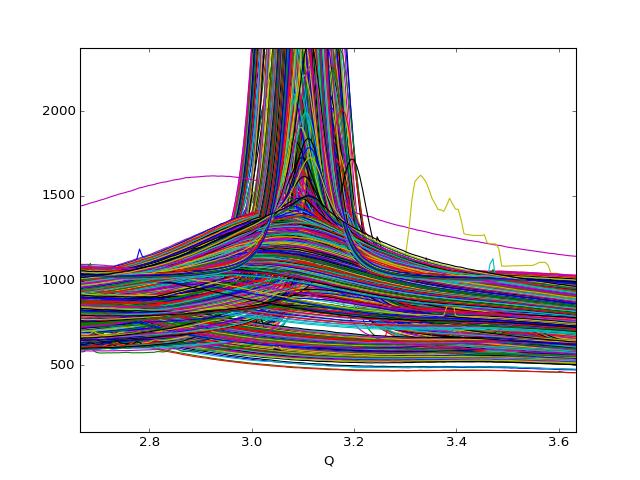

In [93]:
signals.transpose()[
    X.predict(modified.transpose().values)==0
].transpose().plot(legend=False)

<IPython.core.display.Javascript object>


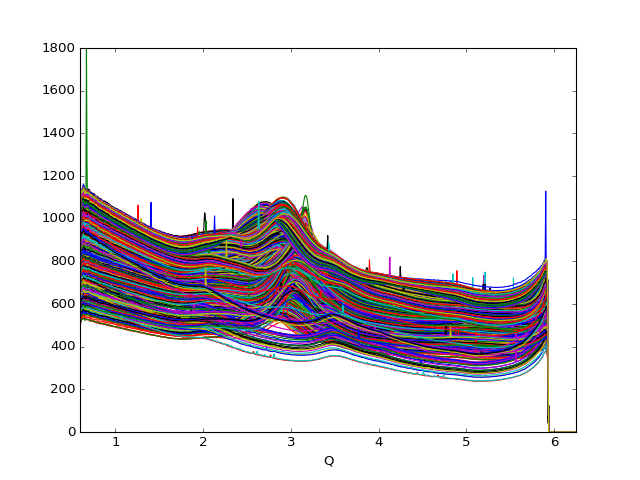

In [95]:
signals.transpose()[X.predict(modified.transpose().values)==1].transpose().plot(legend=False)